# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Crime Against Category                                      Offense  \
0                       2  Theft of Motor Vehicle Parts or Accessories   
1                       2                                      Robbery   
2                       2     Destruction/Damage/Vandalism of Property   
3                       2                                  Shoplifting   
4                       2     Destruction/Damage/Vandalism of Property   

   Sector  Beat  MCPP  Time  Day  Year  
0      11    22    50   661    0     0  
1      22    50    50  1753    6     0  
2      18    39    33   124    2     0  
3      14    29    16  2005    1     0  
4      11    22    44  1753    1     0

In [4]:
# Make a copy of the df for future models
#df2 = df

In [5]:
#df.info()

## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [6]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [8]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

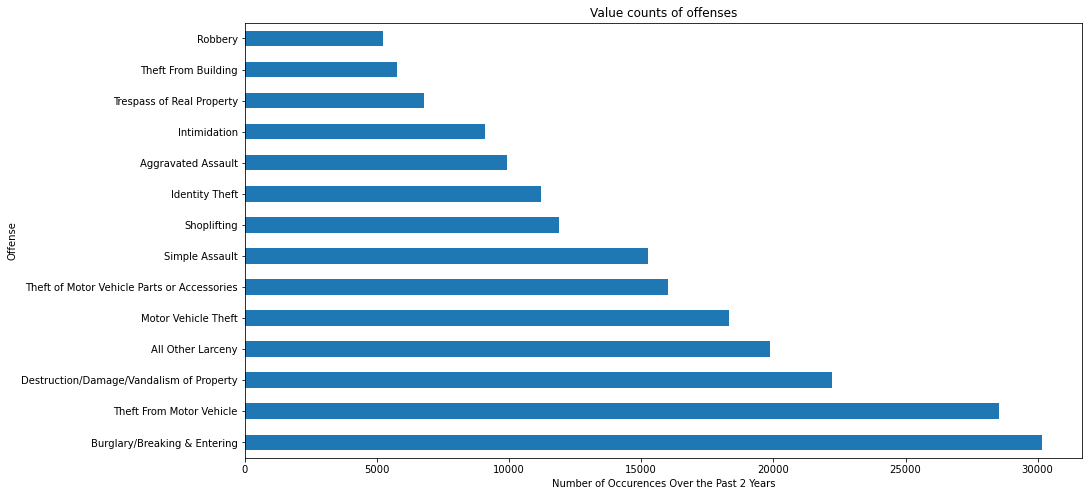

In [9]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [10]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [11]:
#rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

#rf.fit(X_train, y_train)
#rf_train_pred = rf.predict(X_train)
#rf_test_pred = rf.predict(X_test)

In [12]:
#print(classification_report(y_train, rf_train_pred))

In [13]:
#print(classification_report(y_test, rf_test_pred))

In [14]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

#cm = confusion_matrix(y_test, rf_test_pred);
#cmp = ConfusionMatrixDisplay(cm);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp.plot(ax=ax);
#cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


## Random Forest Tuning ##

In [15]:
#rf2 = RandomForestClassifier()

#param_grid = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [1, 2, 3, 4, 5],
   # 'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
   # 'min_samples_leaf': [0.1, 0.2, 0.3]
#}


#gs_rf = GridSearchCV(rf2, param_grid)
#gs_rf.fit(X_train, y_train)
#gs_rf.best_params_

In [16]:
#gs_forest_train_pred = gs_rf.predict(X_train)
#print(classification_report(y_train, gs_forest_train_pred))

In [17]:
#gs_forest_test_pred = gs_rf.predict(X_test)
#print(classification_report(y_test, gs_forest_test_pred))

In [18]:
#rf3 = RandomForestClassifier()

#param_grid2 = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [2, 3, 4],
    #'min_samples_split': [0.24, 0.25, 0.26],
   # 'min_samples_leaf': [0.1, 0.12, 0.13]
#}


#gs_rf2 = GridSearchCV(rf2, param_grid)
#gs_rf2.fit(X_train, y_train)
#gs_rf2.best_params_

In [19]:
#rf4 = RandomForestClassifier(criterion= "entropy", random_state = 1,  max_depth = 3, min_samples_split= 0.2, min_samples_leaf = 0.1,  )

#rf4.fit(X_train, y_train)
#rf_train_pred2 = rf4.predict(X_train)
#rf_test_pred2 = rf4.predict(X_test)

In [20]:
#cm2 = confusion_matrix(y_test, rf_test_pred2);
#cmp2 = ConfusionMatrixDisplay(cm2);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp2.plot(ax=ax);
#cmp2.ax_.set_title("Confusion Matrix");

In [21]:
#print(classification_report(y_train, rf_train_pred2))

In [22]:
#print(classification_report(y_test, rf_test_pred2))

In [23]:
#print ("My program took", time.time() - start_time, "to run")

## CatBoost Model ##

In [24]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [25]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.4152795	total: 428ms	remaining: 7m 7s
1:	learn: 2.2999611	total: 691ms	remaining: 5m 44s
2:	learn: 2.2194601	total: 941ms	remaining: 5m 12s
3:	learn: 2.1546015	total: 1.17s	remaining: 4m 51s
4:	learn: 2.1023865	total: 1.4s	remaining: 4m 38s
5:	learn: 2.0583486	total: 1.62s	remaining: 4m 27s
6:	learn: 2.0212087	total: 1.84s	remaining: 4m 21s
7:	learn: 1.9898034	total: 2.07s	remaining: 4m 16s
8:	learn: 1.9629609	total: 2.29s	remaining: 4m 12s
9:	learn: 1.9385266	total: 2.52s	remaining: 4m 9s
10:	learn: 1.9170486	total: 2.73s	remaining: 4m 5s
11:	learn: 1.8977704	total: 2.96s	remaining: 4m 3s
12:	learn: 1.8810050	total: 3.18s	remaining: 4m 1s
13:	learn: 1.8659622	total: 3.4s	remaining: 3m 59s
14:	learn: 1.8528057	total: 3.62s	remaining: 3m 57s
15:	learn: 1.8413095	total: 3.84s	remaining: 3m 55s
16:	learn: 1.8304887	total: 4.06s	remaining: 3m 54s
17:	learn: 1.8207193	total: 4.27s	remaining: 3m 52s
18:	learn: 1.8118833	total: 4.48s	remaining: 3m 51s

158:	learn: 1.6251733	total: 34.7s	remaining: 3m 3s
159:	learn: 1.6246682	total: 34.9s	remaining: 3m 3s
160:	learn: 1.6240814	total: 35.2s	remaining: 3m 3s
161:	learn: 1.6234912	total: 35.4s	remaining: 3m 2s
162:	learn: 1.6227072	total: 35.6s	remaining: 3m 2s
163:	learn: 1.6221519	total: 35.8s	remaining: 3m 2s
164:	learn: 1.6218260	total: 36s	remaining: 3m 2s
165:	learn: 1.6211820	total: 36.2s	remaining: 3m 2s
166:	learn: 1.6204335	total: 36.5s	remaining: 3m 1s
167:	learn: 1.6199455	total: 36.7s	remaining: 3m 1s
168:	learn: 1.6193922	total: 36.9s	remaining: 3m 1s
169:	learn: 1.6187407	total: 37.1s	remaining: 3m 1s
170:	learn: 1.6180585	total: 37.3s	remaining: 3m 1s
171:	learn: 1.6176398	total: 37.6s	remaining: 3m
172:	learn: 1.6170568	total: 37.8s	remaining: 3m
173:	learn: 1.6165132	total: 38s	remaining: 3m
174:	learn: 1.6159495	total: 38.2s	remaining: 3m
175:	learn: 1.6153028	total: 38.4s	remaining: 2m 59s
176:	learn: 1.6146298	total: 38.6s	remaining: 2m 59s
177:	learn: 1.6140325	tota

314:	learn: 1.5649341	total: 1m 8s	remaining: 2m 29s
315:	learn: 1.5647062	total: 1m 8s	remaining: 2m 28s
316:	learn: 1.5645829	total: 1m 9s	remaining: 2m 28s
317:	learn: 1.5642024	total: 1m 9s	remaining: 2m 28s
318:	learn: 1.5640665	total: 1m 9s	remaining: 2m 28s
319:	learn: 1.5637100	total: 1m 9s	remaining: 2m 28s
320:	learn: 1.5633905	total: 1m 9s	remaining: 2m 27s
321:	learn: 1.5631116	total: 1m 10s	remaining: 2m 27s
322:	learn: 1.5627410	total: 1m 10s	remaining: 2m 27s
323:	learn: 1.5624283	total: 1m 10s	remaining: 2m 27s
324:	learn: 1.5621756	total: 1m 10s	remaining: 2m 26s
325:	learn: 1.5618323	total: 1m 10s	remaining: 2m 26s
326:	learn: 1.5616583	total: 1m 11s	remaining: 2m 26s
327:	learn: 1.5613896	total: 1m 11s	remaining: 2m 26s
328:	learn: 1.5609458	total: 1m 11s	remaining: 2m 26s
329:	learn: 1.5606630	total: 1m 11s	remaining: 2m 25s
330:	learn: 1.5603782	total: 1m 12s	remaining: 2m 25s
331:	learn: 1.5601729	total: 1m 12s	remaining: 2m 25s
332:	learn: 1.5598859	total: 1m 12s

467:	learn: 1.5305525	total: 1m 41s	remaining: 1m 55s
468:	learn: 1.5303809	total: 1m 41s	remaining: 1m 55s
469:	learn: 1.5302180	total: 1m 42s	remaining: 1m 55s
470:	learn: 1.5299901	total: 1m 42s	remaining: 1m 55s
471:	learn: 1.5297455	total: 1m 42s	remaining: 1m 54s
472:	learn: 1.5295825	total: 1m 42s	remaining: 1m 54s
473:	learn: 1.5294413	total: 1m 43s	remaining: 1m 54s
474:	learn: 1.5292287	total: 1m 43s	remaining: 1m 54s
475:	learn: 1.5289551	total: 1m 43s	remaining: 1m 53s
476:	learn: 1.5286701	total: 1m 43s	remaining: 1m 53s
477:	learn: 1.5285735	total: 1m 43s	remaining: 1m 53s
478:	learn: 1.5283585	total: 1m 44s	remaining: 1m 53s
479:	learn: 1.5281016	total: 1m 44s	remaining: 1m 53s
480:	learn: 1.5279492	total: 1m 44s	remaining: 1m 52s
481:	learn: 1.5278739	total: 1m 44s	remaining: 1m 52s
482:	learn: 1.5277657	total: 1m 45s	remaining: 1m 52s
483:	learn: 1.5276349	total: 1m 45s	remaining: 1m 52s
484:	learn: 1.5274693	total: 1m 45s	remaining: 1m 52s
485:	learn: 1.5272937	total:

620:	learn: 1.5061325	total: 2m 15s	remaining: 1m 22s
621:	learn: 1.5060006	total: 2m 15s	remaining: 1m 22s
622:	learn: 1.5058894	total: 2m 15s	remaining: 1m 22s
623:	learn: 1.5057118	total: 2m 16s	remaining: 1m 22s
624:	learn: 1.5056597	total: 2m 16s	remaining: 1m 21s
625:	learn: 1.5055096	total: 2m 16s	remaining: 1m 21s
626:	learn: 1.5053330	total: 2m 16s	remaining: 1m 21s
627:	learn: 1.5051102	total: 2m 17s	remaining: 1m 21s
628:	learn: 1.5049670	total: 2m 17s	remaining: 1m 20s
629:	learn: 1.5048555	total: 2m 17s	remaining: 1m 20s
630:	learn: 1.5047674	total: 2m 17s	remaining: 1m 20s
631:	learn: 1.5045301	total: 2m 17s	remaining: 1m 20s
632:	learn: 1.5044772	total: 2m 18s	remaining: 1m 20s
633:	learn: 1.5043542	total: 2m 18s	remaining: 1m 19s
634:	learn: 1.5042600	total: 2m 18s	remaining: 1m 19s
635:	learn: 1.5040910	total: 2m 18s	remaining: 1m 19s
636:	learn: 1.5039614	total: 2m 19s	remaining: 1m 19s
637:	learn: 1.5037723	total: 2m 19s	remaining: 1m 19s
638:	learn: 1.5036974	total:

774:	learn: 1.4857664	total: 2m 49s	remaining: 49.1s
775:	learn: 1.4856603	total: 2m 49s	remaining: 48.9s
776:	learn: 1.4854434	total: 2m 49s	remaining: 48.7s
777:	learn: 1.4853740	total: 2m 49s	remaining: 48.5s
778:	learn: 1.4852877	total: 2m 50s	remaining: 48.3s
779:	learn: 1.4851963	total: 2m 50s	remaining: 48s
780:	learn: 1.4849726	total: 2m 50s	remaining: 47.8s
781:	learn: 1.4849048	total: 2m 50s	remaining: 47.6s
782:	learn: 1.4848062	total: 2m 50s	remaining: 47.4s
783:	learn: 1.4847028	total: 2m 51s	remaining: 47.2s
784:	learn: 1.4846536	total: 2m 51s	remaining: 47s
785:	learn: 1.4843678	total: 2m 51s	remaining: 46.7s
786:	learn: 1.4842474	total: 2m 51s	remaining: 46.5s
787:	learn: 1.4841990	total: 2m 52s	remaining: 46.3s
788:	learn: 1.4840352	total: 2m 52s	remaining: 46.1s
789:	learn: 1.4838728	total: 2m 52s	remaining: 45.9s
790:	learn: 1.4837988	total: 2m 52s	remaining: 45.6s
791:	learn: 1.4836912	total: 2m 52s	remaining: 45.4s
792:	learn: 1.4835674	total: 2m 53s	remaining: 45.

931:	learn: 1.4691138	total: 3m 23s	remaining: 14.9s
932:	learn: 1.4690048	total: 3m 23s	remaining: 14.6s
933:	learn: 1.4689267	total: 3m 24s	remaining: 14.4s
934:	learn: 1.4688580	total: 3m 24s	remaining: 14.2s
935:	learn: 1.4688009	total: 3m 24s	remaining: 14s
936:	learn: 1.4687425	total: 3m 24s	remaining: 13.8s
937:	learn: 1.4686443	total: 3m 24s	remaining: 13.5s
938:	learn: 1.4685779	total: 3m 25s	remaining: 13.3s
939:	learn: 1.4685203	total: 3m 25s	remaining: 13.1s
940:	learn: 1.4683926	total: 3m 25s	remaining: 12.9s
941:	learn: 1.4682419	total: 3m 25s	remaining: 12.7s
942:	learn: 1.4681218	total: 3m 26s	remaining: 12.5s
943:	learn: 1.4680295	total: 3m 26s	remaining: 12.2s
944:	learn: 1.4679649	total: 3m 26s	remaining: 12s
945:	learn: 1.4678936	total: 3m 26s	remaining: 11.8s
946:	learn: 1.4678353	total: 3m 26s	remaining: 11.6s
947:	learn: 1.4677239	total: 3m 27s	remaining: 11.4s
948:	learn: 1.4676501	total: 3m 27s	remaining: 11.1s
949:	learn: 1.4675029	total: 3m 27s	remaining: 10.

In [26]:
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)

In [27]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.54      0.50      0.52     22703
                          All Other Larceny       0.27      0.13      0.17     22703
               Burglary/Breaking & Entering       0.31      0.35      0.33     22703
   Destruction/Damage/Vandalism of Property       0.28      0.13      0.18     22703
                             Identity Theft       0.51      0.76      0.61     22703
                               Intimidation       0.55      0.58      0.56     22703
                        Motor Vehicle Theft       0.31      0.28      0.29     22703
                                    Robbery       0.44      0.49      0.46     22703
                                Shoplifting       0.43      0.66      0.52     22703
                             Simple Assault       0.52      0.53      0.52     22703
                        Theft From Building       0.40      0.45

In [28]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.10      0.14      4879
               Burglary/Breaking & Entering       0.32      0.33      0.32      7460
   Destruction/Damage/Vandalism of Property       0.22      0.10      0.14      5540
                             Identity Theft       0.36      0.73      0.48      2921
                               Intimidation       0.35      0.32      0.33      2250
                        Motor Vehicle Theft       0.24      0.29      0.26      4563
                                    Robbery       0.12      0.08      0.10      1319
                                Shoplifting       0.32      0.62      0.42      2975
                             Simple Assault       0.47      0.56      0.51      3790
                        Theft From Building       0.09      0.09

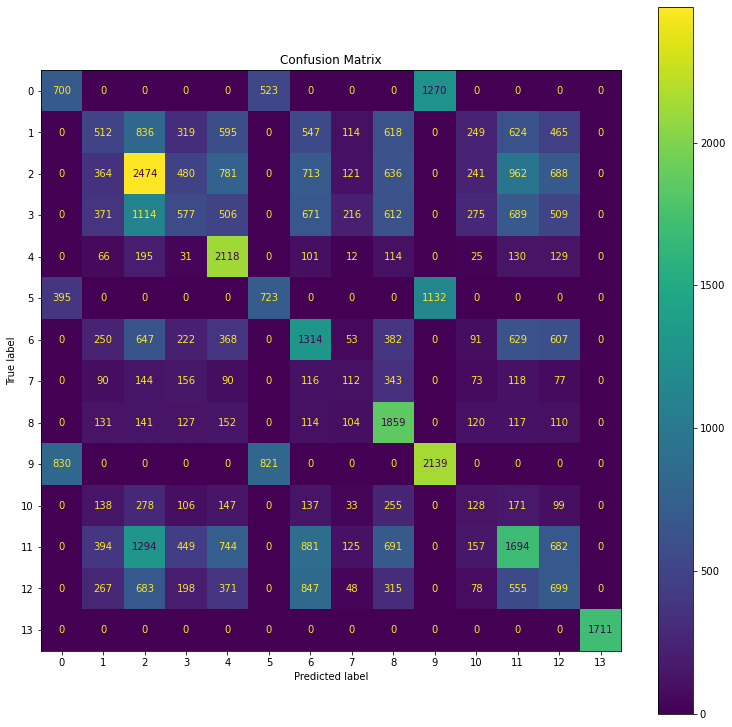

In [29]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

### Crime Key ###

**To make our confusion matrix more readable, we represented the crimes as numeric values. Below is a key that matches the numeric value to the crime**

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Identity Theft

5) Intimidation

6) Motor Vehicle Theft

7) Robbery

8) Shoplifting

9) Simple Assault

10) Theft From Building

11) Theft From Motor Vehicle

12) Theft of Motor Vehicle Parts or Accessories

13) Trespass of Real Property 

### Classification Report ###

Let's take a look at our test model classification report results for each crime:

**0) Aggravated Assault**

For our test model aggravated assault results, we have a precision score of .28, a recall score of .71, and an f1 score of .40. This means that:

For our "Aggravated Assault" results, we have a precision score of .36, a recall score of .28, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 36% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 28% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .20, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 20% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .32, a recall score of .33, and an f1 score of .32. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 32% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 33% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .22, a recall score of .10, and an f1 score of .14. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 22% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 10% of them.
* There is an f1 score of .14, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .36, a recall score of .73, and an f1 score of .48. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 36% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 73% of them.
* There is an f1 score of .48, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .35, a recall score of .32, and an f1 score of .33. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 35% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 32% of them.
* There is an f1 score of .33, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .24, a recall score of .29, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 24% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 29% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .12, a recall score of .08, and an f1 score of .10. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 12% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .10, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .32, a recall score of .62, and an f1 score of .42. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 32% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 62% of them.
* There is an f1 score of .42, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .47, a recall score of .56, and an f1 score of .51. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 47% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 56% of them.
* There is an f1 score of .51, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .09, a recall score of .09, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 9% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 9% of them.
* There is an f1 score of .09, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .30, a recall score of .24, and an f1 score of .26. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 30% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 24% of them.
* There is an f1 score of .26, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .17, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 17% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 700 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,793 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,225 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,252 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 512 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,367 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,071 crimes were wrongly predicted as being "All Other Larceny" crimes
* 44,863 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,474 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 4,986 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,332 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 40,973 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 577 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,963 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,088 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 47,221 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 2,118 crimes were correctly predicted as being "Identity Theft" crimes
* 803 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,754 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,064 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 723 crimes were correctly predicted as being "Intimidation" crimes
* 1,527 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,344 crimes were wrongly predicted as being "Intimidation" crimes
* 49,889 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,314 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,249 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 4,127 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,531 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 112 crimes were correctly predicted as being "Robbery" crimes
* 1,207 crimes were wrongly predicted as not being "Robbery" crimes
* 826 crimes were wrongly predicted as being "Robbery" crimes
* 51,532 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting**

* 1,859 crimes were correctly predicted as being "Shoplifting" crimes
* 1,116 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,966 crimes were wrongly predicted as being "Shoplifting" crimes
* 49,098 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 2,139 crimes were correctly predicted as being "Simple Assault" crimes
* 1,651 crimes were wrongly predicted as not being "Simple Assault" crimes
* 3,409 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,423 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 128 crimes were correctly predicted as being "Theft From Building" crimes
* 1,364 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,309 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,929 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,694 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 7,111 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 3,995 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,631 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 699 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,362 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,366 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,863 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes

In [30]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'loss_function': ['MultiClass'],
          'task_type': ['GPU'],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [31]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 26.8ms	remaining: 2.65s
1:	learn: 2.4762514	total: 41.5ms	remaining: 2.03s
2:	learn: 2.4237441	total: 56ms	remaining: 1.81s
3:	learn: 2.3795726	total: 71.3ms	remaining: 1.71s
4:	learn: 2.3414035	total: 86.2ms	remaining: 1.64s
5:	learn: 2.3078011	total: 101ms	remaining: 1.58s
6:	learn: 2.2778566	total: 116ms	remaining: 1.54s
7:	learn: 2.2509264	total: 131ms	remaining: 1.5s
8:	learn: 2.2265149	total: 145ms	remaining: 1.47s
9:	learn: 2.2043153	total: 161ms	remaining: 1.45s
10:	learn: 2.1839448	total: 176ms	remaining: 1.42s
11:	learn: 2.1652505	total: 191ms	remaining: 1.4s
12:	learn: 2.1480046	total: 206ms	remaining: 1.38s
13:	learn: 2.1320227	total: 223ms	remaining: 1.37s
14:	learn: 2.1172352	total: 238ms	remaining: 1.35s
15:	learn: 2.1034798	total: 253ms	remaining: 1.33s
16:	learn: 2.0906592	total: 269ms	remaining: 1.31s
17:	learn: 2.0787237	total: 285ms	remaining: 1.3s
18:	learn: 2.0675539	total: 299ms	remaining: 1.27s
19:	learn: 2.0571036	total: 314ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419861	total: 16.1ms	remaining: 1.6s
1:	learn: 2.4762573	total: 30.7ms	remaining: 1.5s
2:	learn: 2.4237358	total: 45.2ms	remaining: 1.46s
3:	learn: 2.3795672	total: 59.8ms	remaining: 1.43s
4:	learn: 2.3413907	total: 75.1ms	remaining: 1.43s
5:	learn: 2.3077991	total: 89.7ms	remaining: 1.41s
6:	learn: 2.2778537	total: 105ms	remaining: 1.39s
7:	learn: 2.2509244	total: 120ms	remaining: 1.38s
8:	learn: 2.2265174	total: 135ms	remaining: 1.36s
9:	learn: 2.2043126	total: 150ms	remaining: 1.35s
10:	learn: 2.1839418	total: 165ms	remaining: 1.34s
11:	learn: 2.1652518	total: 180ms	remaining: 1.32s
12:	learn: 2.1479991	total: 195ms	remaining: 1.3s
13:	learn: 2.1320212	total: 209ms	remaining: 1.28s
14:	learn: 2.1172271	total: 224ms	remaining: 1.27s
15:	learn: 2.1034695	total: 239ms	remaining: 1.26s
16:	learn: 2.0906572	total: 254ms	remaining: 1.24s
17:	learn: 2.0787215	total: 269ms	remaining: 1.23s
18:	learn: 2.0675514	total: 285ms	remaining: 1.21s
19:	learn: 2.0571039	total: 299ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419887	total: 15.8ms	remaining: 1.56s
1:	learn: 2.4762640	total: 29.5ms	remaining: 1.44s
2:	learn: 2.4237410	total: 44ms	remaining: 1.42s
3:	learn: 2.3795755	total: 57.4ms	remaining: 1.38s
4:	learn: 2.3413940	total: 71.6ms	remaining: 1.36s
5:	learn: 2.3077920	total: 86.3ms	remaining: 1.35s
6:	learn: 2.2778548	total: 100ms	remaining: 1.33s
7:	learn: 2.2509154	total: 115ms	remaining: 1.32s
8:	learn: 2.2265219	total: 129ms	remaining: 1.3s
9:	learn: 2.2043303	total: 144ms	remaining: 1.29s
10:	learn: 2.1839467	total: 157ms	remaining: 1.27s
11:	learn: 2.1652457	total: 172ms	remaining: 1.26s
12:	learn: 2.1480037	total: 186ms	remaining: 1.25s
13:	learn: 2.1320178	total: 201ms	remaining: 1.23s
14:	learn: 2.1172227	total: 214ms	remaining: 1.22s
15:	learn: 2.1034703	total: 229ms	remaining: 1.2s
16:	learn: 2.0906613	total: 243ms	remaining: 1.18s
17:	learn: 2.0787261	total: 257ms	remaining: 1.17s
18:	learn: 2.0675762	total: 271ms	remaining: 1.15s
19:	learn: 2.0571256	total: 285ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 16ms	remaining: 1.58s
1:	learn: 2.4762682	total: 30.5ms	remaining: 1.49s
2:	learn: 2.4237449	total: 44.8ms	remaining: 1.45s
3:	learn: 2.3795782	total: 59.5ms	remaining: 1.43s
4:	learn: 2.3413950	total: 74ms	remaining: 1.41s
5:	learn: 2.3078053	total: 87.9ms	remaining: 1.38s
6:	learn: 2.2778563	total: 102ms	remaining: 1.35s
7:	learn: 2.2509227	total: 116ms	remaining: 1.34s
8:	learn: 2.2265251	total: 130ms	remaining: 1.32s
9:	learn: 2.2043273	total: 145ms	remaining: 1.3s
10:	learn: 2.1839504	total: 159ms	remaining: 1.29s
11:	learn: 2.1652580	total: 173ms	remaining: 1.27s
12:	learn: 2.1480047	total: 188ms	remaining: 1.26s
13:	learn: 2.1320323	total: 202ms	remaining: 1.24s
14:	learn: 2.1172284	total: 216ms	remaining: 1.23s
15:	learn: 2.1034730	total: 231ms	remaining: 1.21s
16:	learn: 2.0906643	total: 244ms	remaining: 1.19s
17:	learn: 2.0787273	total: 258ms	remaining: 1.18s
18:	learn: 2.0675735	total: 271ms	remaining: 1.15s
19:	learn: 2.0571302	total: 284ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 14.9ms	remaining: 1.47s
1:	learn: 2.4762635	total: 28.2ms	remaining: 1.38s
2:	learn: 2.4237493	total: 41.4ms	remaining: 1.34s
3:	learn: 2.3795777	total: 54.8ms	remaining: 1.31s
4:	learn: 2.3413980	total: 68.5ms	remaining: 1.3s
5:	learn: 2.3077954	total: 81.9ms	remaining: 1.28s
6:	learn: 2.2778528	total: 95.3ms	remaining: 1.27s
7:	learn: 2.2509232	total: 109ms	remaining: 1.25s
8:	learn: 2.2265221	total: 122ms	remaining: 1.24s
9:	learn: 2.2043106	total: 136ms	remaining: 1.23s
10:	learn: 2.1839470	total: 150ms	remaining: 1.22s
11:	learn: 2.1652482	total: 164ms	remaining: 1.2s
12:	learn: 2.1479995	total: 178ms	remaining: 1.19s
13:	learn: 2.1320242	total: 192ms	remaining: 1.18s
14:	learn: 2.1172318	total: 206ms	remaining: 1.17s
15:	learn: 2.1034804	total: 220ms	remaining: 1.16s
16:	learn: 2.0906601	total: 234ms	remaining: 1.14s
17:	learn: 2.0787219	total: 249ms	remaining: 1.13s
18:	learn: 2.0675553	total: 263ms	remaining: 1.12s
19:	learn: 2.0571095	total: 278ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 13.2ms	remaining: 1.3s
1:	learn: 2.3598895	total: 25.6ms	remaining: 1.25s
2:	learn: 2.2913397	total: 38.9ms	remaining: 1.26s
3:	learn: 2.2369277	total: 53.3ms	remaining: 1.28s
4:	learn: 2.1922569	total: 67.3ms	remaining: 1.28s
5:	learn: 2.1547724	total: 80.5ms	remaining: 1.26s
6:	learn: 2.1228987	total: 94ms	remaining: 1.25s
7:	learn: 2.0954139	total: 107ms	remaining: 1.23s
8:	learn: 2.0716174	total: 120ms	remaining: 1.21s
9:	learn: 2.0508296	total: 133ms	remaining: 1.2s
10:	learn: 2.0271508	total: 146ms	remaining: 1.19s
11:	learn: 2.0081884	total: 159ms	remaining: 1.17s
12:	learn: 1.9930108	total: 172ms	remaining: 1.15s
13:	learn: 1.9817104	total: 185ms	remaining: 1.14s
14:	learn: 1.9679395	total: 199ms	remaining: 1.13s
15:	learn: 1.9588124	total: 212ms	remaining: 1.11s
16:	learn: 1.9460533	total: 226ms	remaining: 1.1s
17:	learn: 1.9355643	total: 239ms	remaining: 1.09s
18:	learn: 1.9294893	total: 253ms	remaining: 1.08s
19:	learn: 1.9230229	total: 266ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519399	total: 14.2ms	remaining: 1.41s
1:	learn: 2.3598792	total: 28.1ms	remaining: 1.37s
2:	learn: 2.2913392	total: 40.8ms	remaining: 1.32s
3:	learn: 2.2369233	total: 53.1ms	remaining: 1.27s
4:	learn: 2.1922464	total: 66.7ms	remaining: 1.27s
5:	learn: 2.1547680	total: 81ms	remaining: 1.27s
6:	learn: 2.1228947	total: 94.4ms	remaining: 1.25s
7:	learn: 2.0954127	total: 108ms	remaining: 1.24s
8:	learn: 2.0716164	total: 121ms	remaining: 1.22s
9:	learn: 2.0508223	total: 134ms	remaining: 1.2s
10:	learn: 2.0270751	total: 147ms	remaining: 1.19s
11:	learn: 2.0104775	total: 160ms	remaining: 1.17s
12:	learn: 1.9988608	total: 173ms	remaining: 1.16s
13:	learn: 1.9820011	total: 187ms	remaining: 1.15s
14:	learn: 1.9669209	total: 201ms	remaining: 1.14s
15:	learn: 1.9591943	total: 215ms	remaining: 1.13s
16:	learn: 1.9464718	total: 228ms	remaining: 1.11s
17:	learn: 1.9359812	total: 241ms	remaining: 1.1s
18:	learn: 1.9264024	total: 254ms	remaining: 1.08s
19:	learn: 1.9200552	total: 268ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519377	total: 13.6ms	remaining: 1.35s
1:	learn: 2.3598852	total: 27ms	remaining: 1.32s
2:	learn: 2.2913316	total: 39.3ms	remaining: 1.27s
3:	learn: 2.2369270	total: 52.5ms	remaining: 1.26s
4:	learn: 2.1922604	total: 65.9ms	remaining: 1.25s
5:	learn: 2.1547794	total: 79.2ms	remaining: 1.24s
6:	learn: 2.1228896	total: 92.2ms	remaining: 1.22s
7:	learn: 2.0954113	total: 106ms	remaining: 1.22s
8:	learn: 2.0716289	total: 119ms	remaining: 1.2s
9:	learn: 2.0508357	total: 133ms	remaining: 1.2s
10:	learn: 2.0271104	total: 147ms	remaining: 1.19s
11:	learn: 2.0105114	total: 160ms	remaining: 1.17s
12:	learn: 1.9924270	total: 174ms	remaining: 1.16s
13:	learn: 1.9822248	total: 188ms	remaining: 1.16s
14:	learn: 1.9684886	total: 201ms	remaining: 1.14s
15:	learn: 1.9593069	total: 215ms	remaining: 1.13s
16:	learn: 1.9465944	total: 228ms	remaining: 1.11s
17:	learn: 1.9361021	total: 241ms	remaining: 1.1s
18:	learn: 1.9296533	total: 256ms	remaining: 1.09s
19:	learn: 1.9202075	total: 269ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519389	total: 18.2ms	remaining: 1.8s
1:	learn: 2.3598864	total: 35.1ms	remaining: 1.72s
2:	learn: 2.2913452	total: 52ms	remaining: 1.68s
3:	learn: 2.2369309	total: 67.2ms	remaining: 1.61s
4:	learn: 2.1922601	total: 82.6ms	remaining: 1.57s
5:	learn: 2.1547794	total: 100ms	remaining: 1.57s
6:	learn: 2.1229024	total: 116ms	remaining: 1.54s
7:	learn: 2.0954268	total: 131ms	remaining: 1.5s
8:	learn: 2.0716272	total: 146ms	remaining: 1.48s
9:	learn: 2.0508480	total: 161ms	remaining: 1.45s
10:	learn: 2.0271351	total: 177ms	remaining: 1.43s
11:	learn: 2.0105356	total: 192ms	remaining: 1.41s
12:	learn: 1.9924694	total: 207ms	remaining: 1.39s
13:	learn: 1.9823055	total: 222ms	remaining: 1.37s
14:	learn: 1.9673154	total: 239ms	remaining: 1.35s
15:	learn: 1.9591126	total: 254ms	remaining: 1.33s
16:	learn: 1.9467486	total: 270ms	remaining: 1.32s
17:	learn: 1.9362571	total: 286ms	remaining: 1.3s
18:	learn: 1.9302153	total: 301ms	remaining: 1.28s
19:	learn: 1.9237626	total: 317ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 16.6ms	remaining: 1.64s
1:	learn: 2.3598852	total: 31.1ms	remaining: 1.52s
2:	learn: 2.2913371	total: 45ms	remaining: 1.46s
3:	learn: 2.2369275	total: 59.8ms	remaining: 1.44s
4:	learn: 2.1922648	total: 74.3ms	remaining: 1.41s
5:	learn: 2.1547779	total: 88.4ms	remaining: 1.38s
6:	learn: 2.1228920	total: 102ms	remaining: 1.35s
7:	learn: 2.0954175	total: 116ms	remaining: 1.33s
8:	learn: 2.0716157	total: 129ms	remaining: 1.3s
9:	learn: 2.0508375	total: 143ms	remaining: 1.29s
10:	learn: 2.0270725	total: 158ms	remaining: 1.28s
11:	learn: 2.0104720	total: 172ms	remaining: 1.26s
12:	learn: 1.9988465	total: 187ms	remaining: 1.25s
13:	learn: 1.9821268	total: 202ms	remaining: 1.24s
14:	learn: 1.9670319	total: 217ms	remaining: 1.23s
15:	learn: 1.9588431	total: 232ms	remaining: 1.22s
16:	learn: 1.9465869	total: 246ms	remaining: 1.2s
17:	learn: 1.9360988	total: 260ms	remaining: 1.19s
18:	learn: 1.9296688	total: 274ms	remaining: 1.17s
19:	learn: 1.9202299	total: 289ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756886	total: 16.5ms	remaining: 1.63s
1:	learn: 1.9520626	total: 31.9ms	remaining: 1.56s
2:	learn: 1.8880726	total: 46.1ms	remaining: 1.49s
3:	learn: 1.8521886	total: 60.5ms	remaining: 1.45s
4:	learn: 1.8356852	total: 75.4ms	remaining: 1.43s
5:	learn: 1.8255546	total: 89.9ms	remaining: 1.41s
6:	learn: 1.8101048	total: 105ms	remaining: 1.39s
7:	learn: 1.8011888	total: 120ms	remaining: 1.38s
8:	learn: 1.7935489	total: 136ms	remaining: 1.37s
9:	learn: 1.7872375	total: 151ms	remaining: 1.36s
10:	learn: 1.7818155	total: 166ms	remaining: 1.34s
11:	learn: 1.7774933	total: 181ms	remaining: 1.33s
12:	learn: 1.7720439	total: 197ms	remaining: 1.32s
13:	learn: 1.7672704	total: 214ms	remaining: 1.31s
14:	learn: 1.7647358	total: 230ms	remaining: 1.3s
15:	learn: 1.7584610	total: 245ms	remaining: 1.29s
16:	learn: 1.7548140	total: 261ms	remaining: 1.28s
17:	learn: 1.7523385	total: 277ms	remaining: 1.26s
18:	learn: 1.7449283	total: 291ms	remaining: 1.24s
19:	learn: 1.7430138	total: 306ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 13.9ms	remaining: 1.37s
1:	learn: 1.9517887	total: 27.2ms	remaining: 1.33s
2:	learn: 1.8886577	total: 40.6ms	remaining: 1.31s
3:	learn: 1.8529391	total: 54.3ms	remaining: 1.3s
4:	learn: 1.8330485	total: 68.4ms	remaining: 1.3s
5:	learn: 1.8228297	total: 81.6ms	remaining: 1.28s
6:	learn: 1.8124494	total: 95.6ms	remaining: 1.27s
7:	learn: 1.7977723	total: 110ms	remaining: 1.26s
8:	learn: 1.7908950	total: 124ms	remaining: 1.25s
9:	learn: 1.7853127	total: 137ms	remaining: 1.23s
10:	learn: 1.7791104	total: 151ms	remaining: 1.23s
11:	learn: 1.7754520	total: 165ms	remaining: 1.21s
12:	learn: 1.7716681	total: 178ms	remaining: 1.19s
13:	learn: 1.7686969	total: 192ms	remaining: 1.18s
14:	learn: 1.7658100	total: 206ms	remaining: 1.17s
15:	learn: 1.7577359	total: 220ms	remaining: 1.16s
16:	learn: 1.7550343	total: 234ms	remaining: 1.14s
17:	learn: 1.7534943	total: 247ms	remaining: 1.13s
18:	learn: 1.7500032	total: 262ms	remaining: 1.12s
19:	learn: 1.7469650	total: 276ms	re

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 15ms	remaining: 1.48s
1:	learn: 1.9519061	total: 28.5ms	remaining: 1.4s
2:	learn: 1.8888380	total: 40.8ms	remaining: 1.32s
3:	learn: 1.8532654	total: 54ms	remaining: 1.3s
4:	learn: 1.8370752	total: 67.4ms	remaining: 1.28s
5:	learn: 1.8272525	total: 80.8ms	remaining: 1.26s
6:	learn: 1.8181761	total: 95.1ms	remaining: 1.26s
7:	learn: 1.8077453	total: 110ms	remaining: 1.27s
8:	learn: 1.7947341	total: 125ms	remaining: 1.26s
9:	learn: 1.7880572	total: 140ms	remaining: 1.26s
10:	learn: 1.7825848	total: 154ms	remaining: 1.25s
11:	learn: 1.7740260	total: 169ms	remaining: 1.24s
12:	learn: 1.7695075	total: 184ms	remaining: 1.23s
13:	learn: 1.7663956	total: 198ms	remaining: 1.22s
14:	learn: 1.7627022	total: 212ms	remaining: 1.2s
15:	learn: 1.7594748	total: 226ms	remaining: 1.19s
16:	learn: 1.7548248	total: 241ms	remaining: 1.18s
17:	learn: 1.7527021	total: 256ms	remaining: 1.17s
18:	learn: 1.7499505	total: 271ms	remaining: 1.15s
19:	learn: 1.7461350	total: 285ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 14.6ms	remaining: 1.45s
1:	learn: 1.9519927	total: 29.4ms	remaining: 1.44s
2:	learn: 1.8889248	total: 43.4ms	remaining: 1.4s
3:	learn: 1.8535364	total: 58.4ms	remaining: 1.4s
4:	learn: 1.8340450	total: 72.7ms	remaining: 1.38s
5:	learn: 1.8238953	total: 86.9ms	remaining: 1.36s
6:	learn: 1.8162299	total: 101ms	remaining: 1.34s
7:	learn: 1.8014081	total: 115ms	remaining: 1.32s
8:	learn: 1.7950080	total: 130ms	remaining: 1.31s
9:	learn: 1.7892779	total: 144ms	remaining: 1.29s
10:	learn: 1.7836330	total: 158ms	remaining: 1.28s
11:	learn: 1.7789930	total: 173ms	remaining: 1.26s
12:	learn: 1.7714940	total: 186ms	remaining: 1.25s
13:	learn: 1.7681402	total: 200ms	remaining: 1.23s
14:	learn: 1.7653018	total: 215ms	remaining: 1.22s
15:	learn: 1.7573030	total: 228ms	remaining: 1.2s
16:	learn: 1.7539602	total: 242ms	remaining: 1.18s
17:	learn: 1.7508532	total: 256ms	remaining: 1.16s
18:	learn: 1.7481671	total: 270ms	remaining: 1.15s
19:	learn: 1.7448733	total: 284ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756927	total: 15.6ms	remaining: 1.54s
1:	learn: 1.9517452	total: 30.2ms	remaining: 1.48s
2:	learn: 1.8888390	total: 44.4ms	remaining: 1.44s
3:	learn: 1.8531955	total: 59.3ms	remaining: 1.42s
4:	learn: 1.8335319	total: 73.9ms	remaining: 1.4s
5:	learn: 1.8233262	total: 88ms	remaining: 1.38s
6:	learn: 1.8157680	total: 103ms	remaining: 1.37s
7:	learn: 1.8008697	total: 117ms	remaining: 1.35s
8:	learn: 1.7944986	total: 132ms	remaining: 1.33s
9:	learn: 1.7897199	total: 146ms	remaining: 1.31s
10:	learn: 1.7810921	total: 160ms	remaining: 1.29s
11:	learn: 1.7755224	total: 174ms	remaining: 1.27s
12:	learn: 1.7681779	total: 188ms	remaining: 1.26s
13:	learn: 1.7640497	total: 202ms	remaining: 1.24s
14:	learn: 1.7611053	total: 216ms	remaining: 1.23s
15:	learn: 1.7569325	total: 230ms	remaining: 1.21s
16:	learn: 1.7515370	total: 244ms	remaining: 1.19s
17:	learn: 1.7484703	total: 257ms	remaining: 1.17s
18:	learn: 1.7450675	total: 270ms	remaining: 1.15s
19:	learn: 1.7421793	total: 285ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419846	total: 15.3ms	remaining: 7.61s
1:	learn: 2.4762514	total: 29.2ms	remaining: 7.27s
2:	learn: 2.4237441	total: 43.6ms	remaining: 7.22s
3:	learn: 2.3795726	total: 57.9ms	remaining: 7.18s
4:	learn: 2.3414035	total: 72.2ms	remaining: 7.15s
5:	learn: 2.3078011	total: 86.8ms	remaining: 7.14s
6:	learn: 2.2778569	total: 101ms	remaining: 7.09s
7:	learn: 2.2509267	total: 114ms	remaining: 7.04s
8:	learn: 2.2265149	total: 128ms	remaining: 7s
9:	learn: 2.2043153	total: 142ms	remaining: 6.97s
10:	learn: 2.1839448	total: 156ms	remaining: 6.93s
11:	learn: 2.1652505	total: 170ms	remaining: 6.91s
12:	learn: 2.1480043	total: 184ms	remaining: 6.91s
13:	learn: 2.1320227	total: 198ms	remaining: 6.89s
14:	learn: 2.1172352	total: 213ms	remaining: 6.89s
15:	learn: 2.1034801	total: 226ms	remaining: 6.85s
16:	learn: 2.0906594	total: 240ms	remaining: 6.8s
17:	learn: 2.0787237	total: 253ms	remaining: 6.76s
18:	learn: 2.0675539	total: 266ms	remaining: 6.73s
19:	learn: 2.0571036	total: 279ms	remai

168:	learn: 1.7697907	total: 2.31s	remaining: 4.52s
169:	learn: 1.7693402	total: 2.32s	remaining: 4.51s
170:	learn: 1.7689921	total: 2.34s	remaining: 4.5s
171:	learn: 1.7685852	total: 2.35s	remaining: 4.48s
172:	learn: 1.7681787	total: 2.36s	remaining: 4.47s
173:	learn: 1.7678958	total: 2.38s	remaining: 4.46s
174:	learn: 1.7672912	total: 2.39s	remaining: 4.44s
175:	learn: 1.7668747	total: 2.4s	remaining: 4.42s
176:	learn: 1.7659994	total: 2.42s	remaining: 4.41s
177:	learn: 1.7655905	total: 2.43s	remaining: 4.4s
178:	learn: 1.7653113	total: 2.44s	remaining: 4.38s
179:	learn: 1.7649126	total: 2.46s	remaining: 4.37s
180:	learn: 1.7645240	total: 2.47s	remaining: 4.36s
181:	learn: 1.7642733	total: 2.48s	remaining: 4.34s
182:	learn: 1.7639449	total: 2.5s	remaining: 4.33s
183:	learn: 1.7630630	total: 2.51s	remaining: 4.32s
184:	learn: 1.7627944	total: 2.53s	remaining: 4.3s
185:	learn: 1.7621815	total: 2.54s	remaining: 4.29s
186:	learn: 1.7618503	total: 2.55s	remaining: 4.27s
187:	learn: 1.761

335:	learn: 1.7176064	total: 4.58s	remaining: 2.24s
336:	learn: 1.7174254	total: 4.6s	remaining: 2.22s
337:	learn: 1.7172929	total: 4.61s	remaining: 2.21s
338:	learn: 1.7171862	total: 4.62s	remaining: 2.2s
339:	learn: 1.7169289	total: 4.64s	remaining: 2.18s
340:	learn: 1.7167702	total: 4.65s	remaining: 2.17s
341:	learn: 1.7165617	total: 4.67s	remaining: 2.15s
342:	learn: 1.7164299	total: 4.68s	remaining: 2.14s
343:	learn: 1.7162823	total: 4.69s	remaining: 2.13s
344:	learn: 1.7160441	total: 4.71s	remaining: 2.11s
345:	learn: 1.7155440	total: 4.72s	remaining: 2.1s
346:	learn: 1.7151150	total: 4.73s	remaining: 2.09s
347:	learn: 1.7148387	total: 4.75s	remaining: 2.07s
348:	learn: 1.7146480	total: 4.76s	remaining: 2.06s
349:	learn: 1.7144625	total: 4.78s	remaining: 2.05s
350:	learn: 1.7140464	total: 4.79s	remaining: 2.03s
351:	learn: 1.7139348	total: 4.8s	remaining: 2.02s
352:	learn: 1.7137132	total: 4.82s	remaining: 2.01s
353:	learn: 1.7136033	total: 4.83s	remaining: 1.99s
354:	learn: 1.71

496:	learn: 1.6873186	total: 6.82s	remaining: 41.2ms
497:	learn: 1.6871367	total: 6.83s	remaining: 27.4ms
498:	learn: 1.6869941	total: 6.85s	remaining: 13.7ms
499:	learn: 1.6868303	total: 6.87s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 16ms	remaining: 8s
1:	learn: 2.4762573	total: 30.2ms	remaining: 7.53s
2:	learn: 2.4237358	total: 44.7ms	remaining: 7.4s
3:	learn: 2.3795674	total: 59.7ms	remaining: 7.4s
4:	learn: 2.3413909	total: 74ms	remaining: 7.33s
5:	learn: 2.3077991	total: 88.5ms	remaining: 7.29s
6:	learn: 2.2778537	total: 103ms	remaining: 7.23s
7:	learn: 2.2509244	total: 118ms	remaining: 7.23s
8:	learn: 2.2265174	total: 132ms	remaining: 7.2s
9:	learn: 2.2043126	total: 145ms	remaining: 7.13s
10:	learn: 2.1839418	total: 160ms	remaining: 7.1s
11:	learn: 2.1652518	total: 174ms	remaining: 7.07s
12:	learn: 2.1479989	total: 188ms	remaining: 7.04s
13:	learn: 2.1320215	total: 202ms	remaining: 7.02s
14:	learn: 2.1172271	total: 216ms	remaining: 7s
15:	learn: 2.1034695	total: 231ms	remaining: 6.98s
16:	learn: 2.0906570	total: 245ms	remaining: 6.95s
17:	learn: 2.0787215	total: 258ms	remaining: 6.91s
18:	learn: 2.0675514	total: 272ms	remaining: 6.88s
19:	learn: 2.0571039	total: 286ms	remaining: 6.86

168:	learn: 1.7720955	total: 2.33s	remaining: 4.57s
169:	learn: 1.7717654	total: 2.35s	remaining: 4.56s
170:	learn: 1.7715257	total: 2.36s	remaining: 4.55s
171:	learn: 1.7711416	total: 2.38s	remaining: 4.53s
172:	learn: 1.7702930	total: 2.39s	remaining: 4.52s
173:	learn: 1.7699677	total: 2.4s	remaining: 4.5s
174:	learn: 1.7696163	total: 2.42s	remaining: 4.49s
175:	learn: 1.7692862	total: 2.43s	remaining: 4.48s
176:	learn: 1.7688966	total: 2.44s	remaining: 4.46s
177:	learn: 1.7684585	total: 2.46s	remaining: 4.45s
178:	learn: 1.7680452	total: 2.47s	remaining: 4.43s
179:	learn: 1.7677043	total: 2.49s	remaining: 4.42s
180:	learn: 1.7673412	total: 2.5s	remaining: 4.41s
181:	learn: 1.7669489	total: 2.51s	remaining: 4.39s
182:	learn: 1.7663632	total: 2.53s	remaining: 4.38s
183:	learn: 1.7660971	total: 2.54s	remaining: 4.37s
184:	learn: 1.7656888	total: 2.56s	remaining: 4.35s
185:	learn: 1.7654498	total: 2.57s	remaining: 4.33s
186:	learn: 1.7651064	total: 2.58s	remaining: 4.32s
187:	learn: 1.7

334:	learn: 1.7264050	total: 4.62s	remaining: 2.27s
335:	learn: 1.7259191	total: 4.63s	remaining: 2.26s
336:	learn: 1.7254813	total: 4.65s	remaining: 2.25s
337:	learn: 1.7252266	total: 4.66s	remaining: 2.23s
338:	learn: 1.7249981	total: 4.67s	remaining: 2.22s
339:	learn: 1.7248175	total: 4.69s	remaining: 2.21s
340:	learn: 1.7246848	total: 4.7s	remaining: 2.19s
341:	learn: 1.7245671	total: 4.72s	remaining: 2.18s
342:	learn: 1.7244357	total: 4.73s	remaining: 2.17s
343:	learn: 1.7241503	total: 4.75s	remaining: 2.15s
344:	learn: 1.7240548	total: 4.76s	remaining: 2.14s
345:	learn: 1.7238325	total: 4.78s	remaining: 2.13s
346:	learn: 1.7237444	total: 4.79s	remaining: 2.11s
347:	learn: 1.7235688	total: 4.8s	remaining: 2.1s
348:	learn: 1.7234317	total: 4.82s	remaining: 2.08s
349:	learn: 1.7232609	total: 4.83s	remaining: 2.07s
350:	learn: 1.7230726	total: 4.85s	remaining: 2.06s
351:	learn: 1.7229635	total: 4.86s	remaining: 2.04s
352:	learn: 1.7227547	total: 4.88s	remaining: 2.03s
353:	learn: 1.7

495:	learn: 1.7000611	total: 6.88s	remaining: 55.5ms
496:	learn: 1.6999353	total: 6.9s	remaining: 41.6ms
497:	learn: 1.6997786	total: 6.91s	remaining: 27.8ms
498:	learn: 1.6997180	total: 6.92s	remaining: 13.9ms
499:	learn: 1.6993582	total: 6.94s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 15.3ms	remaining: 7.65s
1:	learn: 2.4762643	total: 28.6ms	remaining: 7.11s
2:	learn: 2.4237410	total: 41.7ms	remaining: 6.9s
3:	learn: 2.3795753	total: 54.8ms	remaining: 6.8s
4:	learn: 2.3413938	total: 68.4ms	remaining: 6.77s
5:	learn: 2.3077917	total: 82.3ms	remaining: 6.78s
6:	learn: 2.2778548	total: 95.4ms	remaining: 6.72s
7:	learn: 2.2509156	total: 109ms	remaining: 6.72s
8:	learn: 2.2265219	total: 124ms	remaining: 6.74s
9:	learn: 2.2043303	total: 137ms	remaining: 6.71s
10:	learn: 2.1839467	total: 150ms	remaining: 6.67s
11:	learn: 2.1652460	total: 163ms	remaining: 6.63s
12:	learn: 2.1480037	total: 176ms	remaining: 6.61s
13:	learn: 2.1320178	total: 189ms	remaining: 6.57s
14:	learn: 2.1172227	total: 203ms	remaining: 6.56s
15:	learn: 2.1034706	total: 216ms	remaining: 6.54s
16:	learn: 2.0906616	total: 229ms	remaining: 6.52s
17:	learn: 2.0787261	total: 243ms	remaining: 6.5s
18:	learn: 2.0675762	total: 257ms	remaining: 6.51s
19:	learn: 2.0571256	total: 272ms	rem

166:	learn: 1.7730079	total: 2.3s	remaining: 4.59s
167:	learn: 1.7725896	total: 2.32s	remaining: 4.58s
168:	learn: 1.7721759	total: 2.33s	remaining: 4.57s
169:	learn: 1.7719296	total: 2.35s	remaining: 4.55s
170:	learn: 1.7716182	total: 2.36s	remaining: 4.54s
171:	learn: 1.7712591	total: 2.37s	remaining: 4.52s
172:	learn: 1.7709824	total: 2.38s	remaining: 4.51s
173:	learn: 1.7705022	total: 2.4s	remaining: 4.49s
174:	learn: 1.7701279	total: 2.41s	remaining: 4.48s
175:	learn: 1.7692790	total: 2.42s	remaining: 4.46s
176:	learn: 1.7689649	total: 2.44s	remaining: 4.45s
177:	learn: 1.7687205	total: 2.45s	remaining: 4.44s
178:	learn: 1.7684487	total: 2.47s	remaining: 4.42s
179:	learn: 1.7680290	total: 2.48s	remaining: 4.41s
180:	learn: 1.7676242	total: 2.49s	remaining: 4.39s
181:	learn: 1.7668321	total: 2.51s	remaining: 4.38s
182:	learn: 1.7664578	total: 2.52s	remaining: 4.37s
183:	learn: 1.7661542	total: 2.54s	remaining: 4.35s
184:	learn: 1.7658439	total: 2.55s	remaining: 4.34s
185:	learn: 1.

332:	learn: 1.7275034	total: 4.6s	remaining: 2.31s
333:	learn: 1.7272855	total: 4.61s	remaining: 2.29s
334:	learn: 1.7270892	total: 4.63s	remaining: 2.28s
335:	learn: 1.7269902	total: 4.64s	remaining: 2.26s
336:	learn: 1.7268755	total: 4.65s	remaining: 2.25s
337:	learn: 1.7264113	total: 4.67s	remaining: 2.24s
338:	learn: 1.7261628	total: 4.68s	remaining: 2.22s
339:	learn: 1.7260437	total: 4.69s	remaining: 2.21s
340:	learn: 1.7258121	total: 4.71s	remaining: 2.19s
341:	learn: 1.7257229	total: 4.72s	remaining: 2.18s
342:	learn: 1.7255733	total: 4.73s	remaining: 2.17s
343:	learn: 1.7254245	total: 4.75s	remaining: 2.15s
344:	learn: 1.7251685	total: 4.76s	remaining: 2.14s
345:	learn: 1.7249526	total: 4.77s	remaining: 2.12s
346:	learn: 1.7247322	total: 4.79s	remaining: 2.11s
347:	learn: 1.7245129	total: 4.8s	remaining: 2.1s
348:	learn: 1.7244127	total: 4.82s	remaining: 2.08s
349:	learn: 1.7239393	total: 4.83s	remaining: 2.07s
350:	learn: 1.7237591	total: 4.84s	remaining: 2.06s
351:	learn: 1.7

497:	learn: 1.7011029	total: 6.85s	remaining: 27.5ms
498:	learn: 1.7009453	total: 6.87s	remaining: 13.8ms
499:	learn: 1.7008670	total: 6.88s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 16ms	remaining: 7.97s
1:	learn: 2.4762685	total: 29.4ms	remaining: 7.32s
2:	learn: 2.4237449	total: 42.7ms	remaining: 7.07s
3:	learn: 2.3795782	total: 56ms	remaining: 6.94s
4:	learn: 2.3413950	total: 69.4ms	remaining: 6.87s
5:	learn: 2.3078053	total: 82.7ms	remaining: 6.81s
6:	learn: 2.2778565	total: 95.8ms	remaining: 6.75s
7:	learn: 2.2509227	total: 109ms	remaining: 6.71s
8:	learn: 2.2265251	total: 122ms	remaining: 6.67s
9:	learn: 2.2043276	total: 136ms	remaining: 6.64s
10:	learn: 2.1839504	total: 149ms	remaining: 6.61s
11:	learn: 2.1652580	total: 162ms	remaining: 6.58s
12:	learn: 2.1480047	total: 175ms	remaining: 6.54s
13:	learn: 2.1320323	total: 188ms	remaining: 6.52s
14:	learn: 2.1172286	total: 201ms	remaining: 6.5s
15:	learn: 2.1034728	total: 214ms	remaining: 6.48s
16:	learn: 2.0906643	total: 227ms	remaining: 6.46s
17:	learn: 2.0787273	total: 241ms	remaining: 6.46s
18:	learn: 2.0675735	total: 255ms	remaining: 6.45s
19:	learn: 2.0571303	total: 268ms	remai

168:	learn: 1.7723058	total: 2.33s	remaining: 4.56s
169:	learn: 1.7720014	total: 2.34s	remaining: 4.55s
170:	learn: 1.7716882	total: 2.36s	remaining: 4.53s
171:	learn: 1.7713322	total: 2.37s	remaining: 4.52s
172:	learn: 1.7707777	total: 2.38s	remaining: 4.5s
173:	learn: 1.7704597	total: 2.4s	remaining: 4.49s
174:	learn: 1.7700672	total: 2.41s	remaining: 4.48s
175:	learn: 1.7697453	total: 2.42s	remaining: 4.46s
176:	learn: 1.7693540	total: 2.44s	remaining: 4.45s
177:	learn: 1.7691083	total: 2.45s	remaining: 4.43s
178:	learn: 1.7687765	total: 2.46s	remaining: 4.42s
179:	learn: 1.7685007	total: 2.48s	remaining: 4.4s
180:	learn: 1.7681099	total: 2.49s	remaining: 4.39s
181:	learn: 1.7677545	total: 2.5s	remaining: 4.37s
182:	learn: 1.7669137	total: 2.52s	remaining: 4.36s
183:	learn: 1.7666118	total: 2.53s	remaining: 4.34s
184:	learn: 1.7662322	total: 2.54s	remaining: 4.33s
185:	learn: 1.7659428	total: 2.56s	remaining: 4.32s
186:	learn: 1.7656413	total: 2.57s	remaining: 4.3s
187:	learn: 1.765

332:	learn: 1.7253687	total: 4.6s	remaining: 2.31s
333:	learn: 1.7251813	total: 4.61s	remaining: 2.29s
334:	learn: 1.7250300	total: 4.63s	remaining: 2.28s
335:	learn: 1.7247611	total: 4.64s	remaining: 2.27s
336:	learn: 1.7245760	total: 4.66s	remaining: 2.25s
337:	learn: 1.7244253	total: 4.67s	remaining: 2.24s
338:	learn: 1.7242546	total: 4.68s	remaining: 2.22s
339:	learn: 1.7240798	total: 4.7s	remaining: 2.21s
340:	learn: 1.7235884	total: 4.71s	remaining: 2.2s
341:	learn: 1.7233628	total: 4.72s	remaining: 2.18s
342:	learn: 1.7231854	total: 4.74s	remaining: 2.17s
343:	learn: 1.7227291	total: 4.75s	remaining: 2.15s
344:	learn: 1.7225508	total: 4.76s	remaining: 2.14s
345:	learn: 1.7224264	total: 4.78s	remaining: 2.13s
346:	learn: 1.7223346	total: 4.79s	remaining: 2.11s
347:	learn: 1.7221957	total: 4.81s	remaining: 2.1s
348:	learn: 1.7220570	total: 4.82s	remaining: 2.08s
349:	learn: 1.7219128	total: 4.83s	remaining: 2.07s
350:	learn: 1.7216908	total: 4.85s	remaining: 2.06s
351:	learn: 1.72

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419936	total: 16.1ms	remaining: 8.02s
1:	learn: 2.4762633	total: 30.7ms	remaining: 7.65s
2:	learn: 2.4237493	total: 45.5ms	remaining: 7.53s
3:	learn: 2.3795777	total: 59.6ms	remaining: 7.38s
4:	learn: 2.3413980	total: 74.1ms	remaining: 7.33s
5:	learn: 2.3077954	total: 88.9ms	remaining: 7.32s
6:	learn: 2.2778531	total: 103ms	remaining: 7.27s
7:	learn: 2.2509232	total: 117ms	remaining: 7.2s
8:	learn: 2.2265224	total: 131ms	remaining: 7.16s
9:	learn: 2.2043106	total: 146ms	remaining: 7.15s
10:	learn: 2.1839470	total: 160ms	remaining: 7.11s
11:	learn: 2.1652482	total: 174ms	remaining: 7.06s
12:	learn: 2.1479995	total: 187ms	remaining: 7.02s
13:	learn: 2.1320239	total: 202ms	remaining: 7s
14:	learn: 2.1172318	total: 215ms	remaining: 6.94s
15:	learn: 2.1034802	total: 229ms	remaining: 6.92s
16:	learn: 2.0906601	total: 243ms	remaining: 6.9s
17:	learn: 2.0787219	total: 256ms	remaining: 6.86s
18:	learn: 2.0675553	total: 270ms	remaining: 6.84s
19:	learn: 2.0571097	total: 283ms	remain

166:	learn: 1.7740855	total: 2.32s	remaining: 4.62s
167:	learn: 1.7731932	total: 2.33s	remaining: 4.61s
168:	learn: 1.7727707	total: 2.34s	remaining: 4.59s
169:	learn: 1.7723728	total: 2.36s	remaining: 4.58s
170:	learn: 1.7719634	total: 2.37s	remaining: 4.57s
171:	learn: 1.7716732	total: 2.39s	remaining: 4.55s
172:	learn: 1.7713384	total: 2.4s	remaining: 4.54s
173:	learn: 1.7709524	total: 2.41s	remaining: 4.52s
174:	learn: 1.7701136	total: 2.43s	remaining: 4.51s
175:	learn: 1.7693696	total: 2.44s	remaining: 4.49s
176:	learn: 1.7688445	total: 2.45s	remaining: 4.48s
177:	learn: 1.7684078	total: 2.47s	remaining: 4.46s
178:	learn: 1.7680523	total: 2.48s	remaining: 4.45s
179:	learn: 1.7677713	total: 2.5s	remaining: 4.44s
180:	learn: 1.7674186	total: 2.51s	remaining: 4.42s
181:	learn: 1.7670811	total: 2.52s	remaining: 4.41s
182:	learn: 1.7666790	total: 2.54s	remaining: 4.39s
183:	learn: 1.7664473	total: 2.55s	remaining: 4.38s
184:	learn: 1.7660730	total: 2.56s	remaining: 4.37s
185:	learn: 1.

331:	learn: 1.7259536	total: 4.6s	remaining: 2.33s
332:	learn: 1.7258512	total: 4.63s	remaining: 2.32s
333:	learn: 1.7255730	total: 4.64s	remaining: 2.31s
334:	learn: 1.7253401	total: 4.66s	remaining: 2.29s
335:	learn: 1.7251089	total: 4.67s	remaining: 2.28s
336:	learn: 1.7247370	total: 4.68s	remaining: 2.26s
337:	learn: 1.7246042	total: 4.69s	remaining: 2.25s
338:	learn: 1.7243865	total: 4.71s	remaining: 2.24s
339:	learn: 1.7238979	total: 4.72s	remaining: 2.22s
340:	learn: 1.7237975	total: 4.73s	remaining: 2.21s
341:	learn: 1.7236947	total: 4.75s	remaining: 2.19s
342:	learn: 1.7234521	total: 4.76s	remaining: 2.18s
343:	learn: 1.7233017	total: 4.77s	remaining: 2.17s
344:	learn: 1.7230030	total: 4.79s	remaining: 2.15s
345:	learn: 1.7228821	total: 4.8s	remaining: 2.14s
346:	learn: 1.7227549	total: 4.82s	remaining: 2.12s
347:	learn: 1.7225245	total: 4.83s	remaining: 2.11s
348:	learn: 1.7223239	total: 4.85s	remaining: 2.1s
349:	learn: 1.7220893	total: 4.86s	remaining: 2.08s
350:	learn: 1.7

492:	learn: 1.6975743	total: 6.85s	remaining: 97.2ms
493:	learn: 1.6974442	total: 6.86s	remaining: 83.3ms
494:	learn: 1.6969802	total: 6.88s	remaining: 69.4ms
495:	learn: 1.6967829	total: 6.89s	remaining: 55.6ms
496:	learn: 1.6967290	total: 6.9s	remaining: 41.7ms
497:	learn: 1.6966305	total: 6.92s	remaining: 27.8ms
498:	learn: 1.6965342	total: 6.93s	remaining: 13.9ms
499:	learn: 1.6963570	total: 6.94s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 16.1ms	remaining: 8.02s
1:	learn: 2.3598895	total: 29.6ms	remaining: 7.38s
2:	learn: 2.2913399	total: 43.2ms	remaining: 7.15s
3:	learn: 2.2369279	total: 61.8ms	remaining: 7.67s
4:	learn: 2.1922569	total: 76.1ms	remaining: 7.53s
5:	learn: 2.1547724	total: 89.7ms	remaining: 7.39s
6:	learn: 2.1228987	total: 104ms	remaining: 7.31s
7:	learn: 2.0954139	total: 118ms	remaining: 7.26s
8:	learn: 2.0716177	total: 132ms	remaining: 7.21s
9:	learn: 2.0508295	total: 146ms	remaining: 7.16s
10:	learn: 2.0271503	total: 159ms	remaining: 7.09s
11:	learn: 2.0081885	total: 173ms	remaining: 7.02s
12:	learn: 1.9930107	total: 186ms	remaining: 6.96s
13:	learn: 1.9817105	total: 199ms	remaining: 6.92s
14:	learn: 1.9679396	total: 215ms	remaining: 6.95s
15:	learn: 1.9588121	total: 229ms	remaining: 6.93s
16:	learn: 1.9460533	total: 243ms	remaining: 6.91s
17:	learn: 1.9355643	total: 257ms	remaining: 6.87s
18:	learn: 1.9294894	total: 271ms	remaining: 6.86s
19:	learn: 1.9230229	total: 284ms	r

164:	learn: 1.7187499	total: 2.31s	remaining: 4.7s
165:	learn: 1.7181770	total: 2.33s	remaining: 4.69s
166:	learn: 1.7177694	total: 2.35s	remaining: 4.68s
167:	learn: 1.7174346	total: 2.36s	remaining: 4.66s
168:	learn: 1.7170583	total: 2.37s	remaining: 4.65s
169:	learn: 1.7168361	total: 2.38s	remaining: 4.63s
170:	learn: 1.7159008	total: 2.4s	remaining: 4.62s
171:	learn: 1.7155939	total: 2.41s	remaining: 4.6s
172:	learn: 1.7153971	total: 2.43s	remaining: 4.59s
173:	learn: 1.7150501	total: 2.44s	remaining: 4.57s
174:	learn: 1.7146614	total: 2.45s	remaining: 4.56s
175:	learn: 1.7138392	total: 2.47s	remaining: 4.54s
176:	learn: 1.7133016	total: 2.48s	remaining: 4.53s
177:	learn: 1.7129843	total: 2.5s	remaining: 4.51s
178:	learn: 1.7124142	total: 2.51s	remaining: 4.5s
179:	learn: 1.7119135	total: 2.52s	remaining: 4.48s
180:	learn: 1.7117450	total: 2.54s	remaining: 4.47s
181:	learn: 1.7113050	total: 2.55s	remaining: 4.45s
182:	learn: 1.7109581	total: 2.56s	remaining: 4.44s
183:	learn: 1.710

325:	learn: 1.6636649	total: 4.56s	remaining: 2.44s
326:	learn: 1.6634177	total: 4.58s	remaining: 2.42s
327:	learn: 1.6632441	total: 4.59s	remaining: 2.41s
328:	learn: 1.6626014	total: 4.6s	remaining: 2.39s
329:	learn: 1.6622590	total: 4.62s	remaining: 2.38s
330:	learn: 1.6619347	total: 4.63s	remaining: 2.37s
331:	learn: 1.6616604	total: 4.64s	remaining: 2.35s
332:	learn: 1.6615620	total: 4.66s	remaining: 2.34s
333:	learn: 1.6614281	total: 4.67s	remaining: 2.32s
334:	learn: 1.6612659	total: 4.69s	remaining: 2.31s
335:	learn: 1.6609626	total: 4.7s	remaining: 2.29s
336:	learn: 1.6606539	total: 4.71s	remaining: 2.28s
337:	learn: 1.6603123	total: 4.73s	remaining: 2.27s
338:	learn: 1.6600521	total: 4.74s	remaining: 2.25s
339:	learn: 1.6597711	total: 4.75s	remaining: 2.24s
340:	learn: 1.6596044	total: 4.77s	remaining: 2.22s
341:	learn: 1.6592688	total: 4.78s	remaining: 2.21s
342:	learn: 1.6590173	total: 4.8s	remaining: 2.19s
343:	learn: 1.6588410	total: 4.81s	remaining: 2.18s
344:	learn: 1.6

488:	learn: 1.6308645	total: 6.86s	remaining: 154ms
489:	learn: 1.6303837	total: 6.87s	remaining: 140ms
490:	learn: 1.6302831	total: 6.88s	remaining: 126ms
491:	learn: 1.6301330	total: 6.9s	remaining: 112ms
492:	learn: 1.6300689	total: 6.91s	remaining: 98.2ms
493:	learn: 1.6298468	total: 6.93s	remaining: 84.1ms
494:	learn: 1.6295510	total: 6.94s	remaining: 70.1ms
495:	learn: 1.6293662	total: 6.95s	remaining: 56.1ms
496:	learn: 1.6291220	total: 6.97s	remaining: 42ms
497:	learn: 1.6288665	total: 6.98s	remaining: 28ms
498:	learn: 1.6287193	total: 6.99s	remaining: 14ms
499:	learn: 1.6285181	total: 7.01s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 15.7ms	remaining: 7.82s
1:	learn: 2.3598792	total: 29.1ms	remaining: 7.26s
2:	learn: 2.2913389	total: 42.3ms	remaining: 7s
3:	learn: 2.2369233	total: 55.8ms	remaining: 6.92s
4:	learn: 2.1922464	total: 70ms	remaining: 6.93s
5:	learn: 2.1547680	total: 83.2ms	remaining: 6.85s
6:	learn: 2.1228947	total: 96.2ms	remaining: 6.78s
7:	learn: 2.0954127	total: 110ms	remaining: 6.78s
8:	learn: 2.0716164	total: 124ms	remaining: 6.78s
9:	learn: 2.0508223	total: 138ms	remaining: 6.78s
10:	learn: 2.0270754	total: 152ms	remaining: 6.77s
11:	learn: 2.0104778	total: 166ms	remaining: 6.75s
12:	learn: 1.9988608	total: 180ms	remaining: 6.75s
13:	learn: 1.9820014	total: 195ms	remaining: 6.76s
14:	learn: 1.9669209	total: 209ms	remaining: 6.77s
15:	learn: 1.9591943	total: 225ms	remaining: 6.82s
16:	learn: 1.9464717	total: 239ms	remaining: 6.8s
17:	learn: 1.9359811	total: 253ms	remaining: 6.76s
18:	learn: 1.9264026	total: 266ms	remaining: 6.73s
19:	learn: 1.9200552	total: 279ms	remain

168:	learn: 1.7219292	total: 2.35s	remaining: 4.6s
169:	learn: 1.7216966	total: 2.36s	remaining: 4.58s
170:	learn: 1.7215226	total: 2.38s	remaining: 4.57s
171:	learn: 1.7212689	total: 2.39s	remaining: 4.55s
172:	learn: 1.7210342	total: 2.4s	remaining: 4.54s
173:	learn: 1.7207305	total: 2.42s	remaining: 4.53s
174:	learn: 1.7205421	total: 2.43s	remaining: 4.52s
175:	learn: 1.7202878	total: 2.44s	remaining: 4.5s
176:	learn: 1.7200973	total: 2.46s	remaining: 4.49s
177:	learn: 1.7196662	total: 2.48s	remaining: 4.48s
178:	learn: 1.7193971	total: 2.49s	remaining: 4.46s
179:	learn: 1.7190078	total: 2.5s	remaining: 4.45s
180:	learn: 1.7187616	total: 2.52s	remaining: 4.44s
181:	learn: 1.7182856	total: 2.53s	remaining: 4.42s
182:	learn: 1.7180233	total: 2.55s	remaining: 4.41s
183:	learn: 1.7177865	total: 2.56s	remaining: 4.4s
184:	learn: 1.7170455	total: 2.57s	remaining: 4.38s
185:	learn: 1.7168878	total: 2.59s	remaining: 4.37s
186:	learn: 1.7165306	total: 2.6s	remaining: 4.35s
187:	learn: 1.7161

329:	learn: 1.6785417	total: 4.59s	remaining: 2.36s
330:	learn: 1.6784605	total: 4.6s	remaining: 2.35s
331:	learn: 1.6782618	total: 4.62s	remaining: 2.34s
332:	learn: 1.6780752	total: 4.63s	remaining: 2.32s
333:	learn: 1.6778389	total: 4.64s	remaining: 2.31s
334:	learn: 1.6775781	total: 4.66s	remaining: 2.29s
335:	learn: 1.6769882	total: 4.67s	remaining: 2.28s
336:	learn: 1.6764733	total: 4.68s	remaining: 2.27s
337:	learn: 1.6762859	total: 4.7s	remaining: 2.25s
338:	learn: 1.6760652	total: 4.71s	remaining: 2.24s
339:	learn: 1.6758199	total: 4.72s	remaining: 2.22s
340:	learn: 1.6756681	total: 4.74s	remaining: 2.21s
341:	learn: 1.6755526	total: 4.75s	remaining: 2.2s
342:	learn: 1.6753201	total: 4.77s	remaining: 2.18s
343:	learn: 1.6750857	total: 4.78s	remaining: 2.17s
344:	learn: 1.6748447	total: 4.8s	remaining: 2.15s
345:	learn: 1.6746396	total: 4.81s	remaining: 2.14s
346:	learn: 1.6745183	total: 4.83s	remaining: 2.13s
347:	learn: 1.6743612	total: 4.84s	remaining: 2.12s
348:	learn: 1.67

490:	learn: 1.6523615	total: 6.84s	remaining: 125ms
491:	learn: 1.6522969	total: 6.85s	remaining: 111ms
492:	learn: 1.6520756	total: 6.87s	remaining: 97.5ms
493:	learn: 1.6520143	total: 6.88s	remaining: 83.6ms
494:	learn: 1.6519657	total: 6.89s	remaining: 69.6ms
495:	learn: 1.6519064	total: 6.91s	remaining: 55.7ms
496:	learn: 1.6518464	total: 6.92s	remaining: 41.8ms
497:	learn: 1.6516965	total: 6.93s	remaining: 27.9ms
498:	learn: 1.6516316	total: 6.95s	remaining: 13.9ms
499:	learn: 1.6513471	total: 6.96s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 14.8ms	remaining: 7.39s
1:	learn: 2.3598854	total: 28ms	remaining: 6.97s
2:	learn: 2.2913316	total: 40.7ms	remaining: 6.75s
3:	learn: 2.2369270	total: 54.5ms	remaining: 6.76s
4:	learn: 2.1922604	total: 68.4ms	remaining: 6.78s
5:	learn: 2.1547794	total: 81.8ms	remaining: 6.73s
6:	learn: 2.1228893	total: 95ms	remaining: 6.69s
7:	learn: 2.0954111	total: 108ms	remaining: 6.65s
8:	learn: 2.0716292	total: 122ms	remaining: 6.67s
9:	learn: 2.0508357	total: 137ms	remaining: 6.7s
10:	learn: 2.0271108	total: 152ms	remaining: 6.74s
11:	learn: 2.0105111	total: 166ms	remaining: 6.74s
12:	learn: 1.9924271	total: 181ms	remaining: 6.77s
13:	learn: 1.9822250	total: 195ms	remaining: 6.77s
14:	learn: 1.9684885	total: 209ms	remaining: 6.75s
15:	learn: 1.9593071	total: 224ms	remaining: 6.77s
16:	learn: 1.9465944	total: 238ms	remaining: 6.77s
17:	learn: 1.9361021	total: 252ms	remaining: 6.75s
18:	learn: 1.9296533	total: 266ms	remaining: 6.72s
19:	learn: 1.9202075	total: 279ms	remai

165:	learn: 1.7263907	total: 2.31s	remaining: 4.65s
166:	learn: 1.7259140	total: 2.32s	remaining: 4.63s
167:	learn: 1.7256051	total: 2.34s	remaining: 4.62s
168:	learn: 1.7252553	total: 2.35s	remaining: 4.61s
169:	learn: 1.7247660	total: 2.37s	remaining: 4.59s
170:	learn: 1.7245980	total: 2.38s	remaining: 4.58s
171:	learn: 1.7243725	total: 2.39s	remaining: 4.56s
172:	learn: 1.7235926	total: 2.41s	remaining: 4.55s
173:	learn: 1.7226712	total: 2.42s	remaining: 4.53s
174:	learn: 1.7224598	total: 2.43s	remaining: 4.52s
175:	learn: 1.7222859	total: 2.44s	remaining: 4.5s
176:	learn: 1.7220748	total: 2.46s	remaining: 4.49s
177:	learn: 1.7219106	total: 2.47s	remaining: 4.47s
178:	learn: 1.7215324	total: 2.48s	remaining: 4.46s
179:	learn: 1.7212230	total: 2.5s	remaining: 4.44s
180:	learn: 1.7208163	total: 2.51s	remaining: 4.43s
181:	learn: 1.7202948	total: 2.53s	remaining: 4.41s
182:	learn: 1.7199875	total: 2.54s	remaining: 4.4s
183:	learn: 1.7197923	total: 2.55s	remaining: 4.38s
184:	learn: 1.7

333:	learn: 1.6815115	total: 4.62s	remaining: 2.3s
334:	learn: 1.6814381	total: 4.64s	remaining: 2.28s
335:	learn: 1.6812436	total: 4.65s	remaining: 2.27s
336:	learn: 1.6810122	total: 4.67s	remaining: 2.26s
337:	learn: 1.6807434	total: 4.68s	remaining: 2.24s
338:	learn: 1.6805969	total: 4.69s	remaining: 2.23s
339:	learn: 1.6804718	total: 4.71s	remaining: 2.21s
340:	learn: 1.6802866	total: 4.72s	remaining: 2.2s
341:	learn: 1.6800377	total: 4.74s	remaining: 2.19s
342:	learn: 1.6798988	total: 4.75s	remaining: 2.17s
343:	learn: 1.6798058	total: 4.76s	remaining: 2.16s
344:	learn: 1.6789722	total: 4.78s	remaining: 2.15s
345:	learn: 1.6787046	total: 4.79s	remaining: 2.13s
346:	learn: 1.6781585	total: 4.81s	remaining: 2.12s
347:	learn: 1.6780088	total: 4.82s	remaining: 2.1s
348:	learn: 1.6779394	total: 4.83s	remaining: 2.09s
349:	learn: 1.6776866	total: 4.85s	remaining: 2.08s
350:	learn: 1.6775527	total: 4.87s	remaining: 2.06s
351:	learn: 1.6774716	total: 4.88s	remaining: 2.05s
352:	learn: 1.6

498:	learn: 1.6557428	total: 6.92s	remaining: 13.9ms
499:	learn: 1.6553361	total: 6.93s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519387	total: 15.7ms	remaining: 7.84s
1:	learn: 2.3598864	total: 28.7ms	remaining: 7.15s
2:	learn: 2.2913449	total: 41.6ms	remaining: 6.89s
3:	learn: 2.2369309	total: 54.7ms	remaining: 6.78s
4:	learn: 2.1922601	total: 68ms	remaining: 6.73s
5:	learn: 2.1547794	total: 81.3ms	remaining: 6.7s
6:	learn: 2.1229024	total: 94.5ms	remaining: 6.66s
7:	learn: 2.0954268	total: 107ms	remaining: 6.61s
8:	learn: 2.0716272	total: 121ms	remaining: 6.59s
9:	learn: 2.0508480	total: 134ms	remaining: 6.57s
10:	learn: 2.0271346	total: 147ms	remaining: 6.55s
11:	learn: 2.0105356	total: 160ms	remaining: 6.52s
12:	learn: 1.9924691	total: 174ms	remaining: 6.51s
13:	learn: 1.9823056	total: 187ms	remaining: 6.48s
14:	learn: 1.9673153	total: 201ms	remaining: 6.5s
15:	learn: 1.9591126	total: 215ms	remaining: 6.5s
16:	learn: 1.9467489	total: 229ms	remaining: 6.51s
17:	learn: 1.9362571	total: 242ms	remaining: 6.49s
18:	learn: 1.9302154	total: 256ms	remaining: 6.47s
19:	learn: 1.9237625	total: 269ms	remai

166:	learn: 1.7245983	total: 2.34s	remaining: 4.67s
167:	learn: 1.7241207	total: 2.36s	remaining: 4.66s
168:	learn: 1.7231386	total: 2.37s	remaining: 4.64s
169:	learn: 1.7229277	total: 2.38s	remaining: 4.63s
170:	learn: 1.7226030	total: 2.4s	remaining: 4.61s
171:	learn: 1.7217335	total: 2.41s	remaining: 4.6s
172:	learn: 1.7212977	total: 2.42s	remaining: 4.58s
173:	learn: 1.7210905	total: 2.44s	remaining: 4.57s
174:	learn: 1.7201573	total: 2.45s	remaining: 4.55s
175:	learn: 1.7198213	total: 2.46s	remaining: 4.54s
176:	learn: 1.7194424	total: 2.48s	remaining: 4.52s
177:	learn: 1.7188315	total: 2.49s	remaining: 4.51s
178:	learn: 1.7185171	total: 2.51s	remaining: 4.49s
179:	learn: 1.7181448	total: 2.52s	remaining: 4.48s
180:	learn: 1.7178310	total: 2.54s	remaining: 4.47s
181:	learn: 1.7174286	total: 2.55s	remaining: 4.45s
182:	learn: 1.7171964	total: 2.56s	remaining: 4.44s
183:	learn: 1.7167637	total: 2.58s	remaining: 4.42s
184:	learn: 1.7165330	total: 2.59s	remaining: 4.41s
185:	learn: 1.

331:	learn: 1.6751344	total: 4.62s	remaining: 2.33s
332:	learn: 1.6749313	total: 4.63s	remaining: 2.32s
333:	learn: 1.6747644	total: 4.64s	remaining: 2.31s
334:	learn: 1.6746386	total: 4.66s	remaining: 2.29s
335:	learn: 1.6744854	total: 4.67s	remaining: 2.28s
336:	learn: 1.6743959	total: 4.68s	remaining: 2.27s
337:	learn: 1.6741425	total: 4.7s	remaining: 2.25s
338:	learn: 1.6737994	total: 4.71s	remaining: 2.24s
339:	learn: 1.6736575	total: 4.72s	remaining: 2.22s
340:	learn: 1.6735304	total: 4.74s	remaining: 2.21s
341:	learn: 1.6734512	total: 4.75s	remaining: 2.19s
342:	learn: 1.6732512	total: 4.76s	remaining: 2.18s
343:	learn: 1.6731459	total: 4.78s	remaining: 2.17s
344:	learn: 1.6730526	total: 4.79s	remaining: 2.15s
345:	learn: 1.6726683	total: 4.81s	remaining: 2.14s
346:	learn: 1.6725228	total: 4.82s	remaining: 2.13s
347:	learn: 1.6724070	total: 4.83s	remaining: 2.11s
348:	learn: 1.6722124	total: 4.85s	remaining: 2.1s
349:	learn: 1.6720259	total: 4.86s	remaining: 2.08s
350:	learn: 1.

495:	learn: 1.6476191	total: 6.89s	remaining: 55.6ms
496:	learn: 1.6475037	total: 6.91s	remaining: 41.7ms
497:	learn: 1.6474327	total: 6.92s	remaining: 27.8ms
498:	learn: 1.6473401	total: 6.93s	remaining: 13.9ms
499:	learn: 1.6468919	total: 6.95s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 14ms	remaining: 6.97s
1:	learn: 2.3598852	total: 27.2ms	remaining: 6.77s
2:	learn: 2.2913371	total: 40.1ms	remaining: 6.65s
3:	learn: 2.2369277	total: 53.3ms	remaining: 6.61s
4:	learn: 2.1922650	total: 66.9ms	remaining: 6.62s
5:	learn: 2.1547782	total: 80.3ms	remaining: 6.61s
6:	learn: 2.1228920	total: 93.5ms	remaining: 6.58s
7:	learn: 2.0954177	total: 107ms	remaining: 6.58s
8:	learn: 2.0716157	total: 121ms	remaining: 6.58s
9:	learn: 2.0508376	total: 134ms	remaining: 6.59s
10:	learn: 2.0270724	total: 148ms	remaining: 6.6s
11:	learn: 2.0104721	total: 162ms	remaining: 6.57s
12:	learn: 1.9988462	total: 175ms	remaining: 6.55s
13:	learn: 1.9821268	total: 188ms	remaining: 6.54s
14:	learn: 1.9670319	total: 203ms	remaining: 6.57s
15:	learn: 1.9588434	total: 218ms	remaining: 6.6s
16:	learn: 1.9465869	total: 232ms	remaining: 6.59s
17:	learn: 1.9360987	total: 246ms	remaining: 6.57s
18:	learn: 1.9296689	total: 258ms	remaining: 6.54s
19:	learn: 1.9202299	total: 272ms	rema

162:	learn: 1.7240635	total: 2.29s	remaining: 4.73s
163:	learn: 1.7237333	total: 2.3s	remaining: 4.72s
164:	learn: 1.7235191	total: 2.32s	remaining: 4.71s
165:	learn: 1.7233007	total: 2.33s	remaining: 4.69s
166:	learn: 1.7228091	total: 2.35s	remaining: 4.68s
167:	learn: 1.7224424	total: 2.36s	remaining: 4.66s
168:	learn: 1.7220272	total: 2.37s	remaining: 4.65s
169:	learn: 1.7216310	total: 2.39s	remaining: 4.63s
170:	learn: 1.7211813	total: 2.4s	remaining: 4.62s
171:	learn: 1.7208808	total: 2.41s	remaining: 4.6s
172:	learn: 1.7205871	total: 2.43s	remaining: 4.59s
173:	learn: 1.7203054	total: 2.44s	remaining: 4.58s
174:	learn: 1.7198839	total: 2.46s	remaining: 4.56s
175:	learn: 1.7195342	total: 2.49s	remaining: 4.59s
176:	learn: 1.7192069	total: 2.51s	remaining: 4.58s
177:	learn: 1.7189187	total: 2.52s	remaining: 4.56s
178:	learn: 1.7184166	total: 2.54s	remaining: 4.55s
179:	learn: 1.7181045	total: 2.55s	remaining: 4.53s
180:	learn: 1.7179263	total: 2.56s	remaining: 4.52s
181:	learn: 1.7

335:	learn: 1.6733165	total: 4.72s	remaining: 2.3s
336:	learn: 1.6731764	total: 4.73s	remaining: 2.29s
337:	learn: 1.6729070	total: 4.75s	remaining: 2.28s
338:	learn: 1.6726501	total: 4.76s	remaining: 2.26s
339:	learn: 1.6724731	total: 4.78s	remaining: 2.25s
340:	learn: 1.6719865	total: 4.79s	remaining: 2.23s
341:	learn: 1.6718519	total: 4.8s	remaining: 2.22s
342:	learn: 1.6716498	total: 4.82s	remaining: 2.21s
343:	learn: 1.6715671	total: 4.83s	remaining: 2.19s
344:	learn: 1.6713152	total: 4.84s	remaining: 2.18s
345:	learn: 1.6710733	total: 4.86s	remaining: 2.16s
346:	learn: 1.6706303	total: 4.87s	remaining: 2.15s
347:	learn: 1.6705108	total: 4.88s	remaining: 2.13s
348:	learn: 1.6704328	total: 4.9s	remaining: 2.12s
349:	learn: 1.6700916	total: 4.91s	remaining: 2.1s
350:	learn: 1.6700217	total: 4.92s	remaining: 2.09s
351:	learn: 1.6698420	total: 4.94s	remaining: 2.08s
352:	learn: 1.6696711	total: 4.95s	remaining: 2.06s
353:	learn: 1.6695235	total: 4.97s	remaining: 2.05s
354:	learn: 1.66

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 15.9ms	remaining: 7.94s
1:	learn: 1.9520627	total: 30.6ms	remaining: 7.62s
2:	learn: 1.8880724	total: 44.6ms	remaining: 7.38s
3:	learn: 1.8521886	total: 59.3ms	remaining: 7.36s
4:	learn: 1.8356851	total: 74.2ms	remaining: 7.35s
5:	learn: 1.8255546	total: 87.7ms	remaining: 7.22s
6:	learn: 1.8101046	total: 102ms	remaining: 7.21s
7:	learn: 1.8011890	total: 117ms	remaining: 7.2s
8:	learn: 1.7935490	total: 132ms	remaining: 7.17s
9:	learn: 1.7872374	total: 146ms	remaining: 7.17s
10:	learn: 1.7818157	total: 160ms	remaining: 7.13s
11:	learn: 1.7774933	total: 175ms	remaining: 7.13s
12:	learn: 1.7720435	total: 190ms	remaining: 7.12s
13:	learn: 1.7672707	total: 204ms	remaining: 7.07s
14:	learn: 1.7647359	total: 217ms	remaining: 7.03s
15:	learn: 1.7584613	total: 232ms	remaining: 7s
16:	learn: 1.7548140	total: 246ms	remaining: 7s
17:	learn: 1.7523384	total: 261ms	remaining: 7s
18:	learn: 1.7449282	total: 275ms	remaining: 6.97s
19:	learn: 1.7430138	total: 290ms	remaining: 

163:	learn: 1.5790952	total: 2.31s	remaining: 4.74s
164:	learn: 1.5788049	total: 2.33s	remaining: 4.72s
165:	learn: 1.5783002	total: 2.34s	remaining: 4.71s
166:	learn: 1.5774336	total: 2.35s	remaining: 4.69s
167:	learn: 1.5768193	total: 2.37s	remaining: 4.68s
168:	learn: 1.5766273	total: 2.38s	remaining: 4.66s
169:	learn: 1.5760376	total: 2.4s	remaining: 4.65s
170:	learn: 1.5751507	total: 2.41s	remaining: 4.64s
171:	learn: 1.5748934	total: 2.42s	remaining: 4.62s
172:	learn: 1.5743551	total: 2.44s	remaining: 4.61s
173:	learn: 1.5741339	total: 2.45s	remaining: 4.59s
174:	learn: 1.5734886	total: 2.46s	remaining: 4.58s
175:	learn: 1.5728537	total: 2.48s	remaining: 4.56s
176:	learn: 1.5714616	total: 2.49s	remaining: 4.55s
177:	learn: 1.5712570	total: 2.5s	remaining: 4.53s
178:	learn: 1.5706557	total: 2.52s	remaining: 4.52s
179:	learn: 1.5696051	total: 2.53s	remaining: 4.5s
180:	learn: 1.5692619	total: 2.55s	remaining: 4.49s
181:	learn: 1.5686423	total: 2.56s	remaining: 4.47s
182:	learn: 1.5

327:	learn: 1.5288041	total: 4.6s	remaining: 2.41s
328:	learn: 1.5287454	total: 4.61s	remaining: 2.4s
329:	learn: 1.5286395	total: 4.62s	remaining: 2.38s
330:	learn: 1.5284371	total: 4.64s	remaining: 2.37s
331:	learn: 1.5282499	total: 4.65s	remaining: 2.35s
332:	learn: 1.5281779	total: 4.67s	remaining: 2.34s
333:	learn: 1.5280567	total: 4.68s	remaining: 2.33s
334:	learn: 1.5279521	total: 4.69s	remaining: 2.31s
335:	learn: 1.5278399	total: 4.71s	remaining: 2.3s
336:	learn: 1.5277388	total: 4.72s	remaining: 2.28s
337:	learn: 1.5275644	total: 4.74s	remaining: 2.27s
338:	learn: 1.5274896	total: 4.75s	remaining: 2.25s
339:	learn: 1.5273599	total: 4.76s	remaining: 2.24s
340:	learn: 1.5272593	total: 4.78s	remaining: 2.23s
341:	learn: 1.5270815	total: 4.79s	remaining: 2.21s
342:	learn: 1.5269838	total: 4.8s	remaining: 2.2s
343:	learn: 1.5267462	total: 4.82s	remaining: 2.19s
344:	learn: 1.5266049	total: 4.83s	remaining: 2.17s
345:	learn: 1.5265185	total: 4.85s	remaining: 2.16s
346:	learn: 1.526

493:	learn: 1.5087920	total: 6.92s	remaining: 84.1ms
494:	learn: 1.5086128	total: 6.94s	remaining: 70.1ms
495:	learn: 1.5085408	total: 6.95s	remaining: 56.1ms
496:	learn: 1.5084567	total: 6.97s	remaining: 42ms
497:	learn: 1.5084085	total: 6.98s	remaining: 28ms
498:	learn: 1.5083504	total: 6.99s	remaining: 14ms
499:	learn: 1.5082773	total: 7.01s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 15.1ms	remaining: 7.55s
1:	learn: 1.9517885	total: 28.6ms	remaining: 7.12s
2:	learn: 1.8886577	total: 41.8ms	remaining: 6.92s
3:	learn: 1.8529388	total: 55.8ms	remaining: 6.92s
4:	learn: 1.8330488	total: 70.6ms	remaining: 6.99s
5:	learn: 1.8228297	total: 83.8ms	remaining: 6.9s
6:	learn: 1.8124495	total: 97.7ms	remaining: 6.88s
7:	learn: 1.7977722	total: 111ms	remaining: 6.82s
8:	learn: 1.7908951	total: 125ms	remaining: 6.82s
9:	learn: 1.7853128	total: 139ms	remaining: 6.79s
10:	learn: 1.7791104	total: 152ms	remaining: 6.76s
11:	learn: 1.7754519	total: 165ms	remaining: 6.69s
12:	learn: 1.7716681	total: 178ms	remaining: 6.68s
13:	learn: 1.7686971	total: 192ms	remaining: 6.68s
14:	learn: 1.7658098	total: 207ms	remaining: 6.68s
15:	learn: 1.7577360	total: 220ms	remaining: 6.66s
16:	learn: 1.7550342	total: 234ms	remaining: 6.64s
17:	learn: 1.7534942	total: 250ms	remaining: 6.71s
18:	learn: 1.7500033	total: 264ms	remaining: 6.68s
19:	learn: 1.7469649	total: 277ms	r

167:	learn: 1.6106826	total: 2.35s	remaining: 4.65s
168:	learn: 1.6105290	total: 2.37s	remaining: 4.63s
169:	learn: 1.6099709	total: 2.38s	remaining: 4.62s
170:	learn: 1.6092673	total: 2.39s	remaining: 4.61s
171:	learn: 1.6090180	total: 2.41s	remaining: 4.59s
172:	learn: 1.6087497	total: 2.42s	remaining: 4.58s
173:	learn: 1.6081736	total: 2.43s	remaining: 4.56s
174:	learn: 1.6080462	total: 2.45s	remaining: 4.54s
175:	learn: 1.6078584	total: 2.46s	remaining: 4.53s
176:	learn: 1.6076381	total: 2.48s	remaining: 4.52s
177:	learn: 1.6069633	total: 2.49s	remaining: 4.5s
178:	learn: 1.6066541	total: 2.5s	remaining: 4.49s
179:	learn: 1.6065356	total: 2.52s	remaining: 4.47s
180:	learn: 1.6062220	total: 2.53s	remaining: 4.46s
181:	learn: 1.6060079	total: 2.54s	remaining: 4.44s
182:	learn: 1.6058207	total: 2.56s	remaining: 4.43s
183:	learn: 1.6055254	total: 2.57s	remaining: 4.42s
184:	learn: 1.6052174	total: 2.58s	remaining: 4.4s
185:	learn: 1.6049207	total: 2.6s	remaining: 4.38s
186:	learn: 1.60

334:	learn: 1.5718973	total: 4.65s	remaining: 2.29s
335:	learn: 1.5717901	total: 4.66s	remaining: 2.27s
336:	learn: 1.5716700	total: 4.68s	remaining: 2.26s
337:	learn: 1.5715756	total: 4.69s	remaining: 2.25s
338:	learn: 1.5714242	total: 4.7s	remaining: 2.23s
339:	learn: 1.5712195	total: 4.72s	remaining: 2.22s
340:	learn: 1.5709074	total: 4.73s	remaining: 2.21s
341:	learn: 1.5707494	total: 4.74s	remaining: 2.19s
342:	learn: 1.5706524	total: 4.76s	remaining: 2.18s
343:	learn: 1.5705772	total: 4.77s	remaining: 2.16s
344:	learn: 1.5703991	total: 4.79s	remaining: 2.15s
345:	learn: 1.5702867	total: 4.8s	remaining: 2.14s
346:	learn: 1.5702259	total: 4.81s	remaining: 2.12s
347:	learn: 1.5700367	total: 4.83s	remaining: 2.11s
348:	learn: 1.5698135	total: 4.85s	remaining: 2.1s
349:	learn: 1.5696091	total: 4.86s	remaining: 2.08s
350:	learn: 1.5694737	total: 4.87s	remaining: 2.07s
351:	learn: 1.5693802	total: 4.89s	remaining: 2.06s
352:	learn: 1.5693072	total: 4.9s	remaining: 2.04s
353:	learn: 1.56

499:	learn: 1.5546730	total: 6.95s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 16ms	remaining: 8s
1:	learn: 1.9519060	total: 30.1ms	remaining: 7.49s
2:	learn: 1.8888380	total: 44.6ms	remaining: 7.39s
3:	learn: 1.8532656	total: 59.1ms	remaining: 7.33s
4:	learn: 1.8370752	total: 74.1ms	remaining: 7.34s
5:	learn: 1.8272525	total: 88.3ms	remaining: 7.27s
6:	learn: 1.8181761	total: 102ms	remaining: 7.18s
7:	learn: 1.8077452	total: 115ms	remaining: 7.09s
8:	learn: 1.7947341	total: 129ms	remaining: 7.05s
9:	learn: 1.7880574	total: 143ms	remaining: 7.03s
10:	learn: 1.7825849	total: 158ms	remaining: 7.03s
11:	learn: 1.7740260	total: 173ms	remaining: 7.03s
12:	learn: 1.7695077	total: 187ms	remaining: 7.02s
13:	learn: 1.7663957	total: 202ms	remaining: 7s
14:	learn: 1.7627022	total: 215ms	remaining: 6.96s
15:	learn: 1.7594750	total: 230ms	remaining: 6.95s
16:	learn: 1.7548249	total: 244ms	remaining: 6.94s
17:	learn: 1.7527021	total: 258ms	remaining: 6.91s
18:	learn: 1.7499503	total: 273ms	remaining: 6.91s
19:	learn: 1.7461351	total: 287ms	remaining

173:	learn: 1.6126624	total: 2.47s	remaining: 4.62s
174:	learn: 1.6125451	total: 2.48s	remaining: 4.6s
175:	learn: 1.6121852	total: 2.49s	remaining: 4.59s
176:	learn: 1.6115141	total: 2.51s	remaining: 4.58s
177:	learn: 1.6111772	total: 2.52s	remaining: 4.56s
178:	learn: 1.6106512	total: 2.53s	remaining: 4.54s
179:	learn: 1.6101409	total: 2.55s	remaining: 4.53s
180:	learn: 1.6099228	total: 2.56s	remaining: 4.51s
181:	learn: 1.6098248	total: 2.58s	remaining: 4.5s
182:	learn: 1.6096121	total: 2.59s	remaining: 4.49s
183:	learn: 1.6092812	total: 2.6s	remaining: 4.47s
184:	learn: 1.6090152	total: 2.62s	remaining: 4.46s
185:	learn: 1.6088490	total: 2.63s	remaining: 4.44s
186:	learn: 1.6085910	total: 2.65s	remaining: 4.43s
187:	learn: 1.6081783	total: 2.66s	remaining: 4.41s
188:	learn: 1.6079195	total: 2.67s	remaining: 4.4s
189:	learn: 1.6076864	total: 2.69s	remaining: 4.38s
190:	learn: 1.6074473	total: 2.7s	remaining: 4.37s
191:	learn: 1.6067318	total: 2.71s	remaining: 4.35s
192:	learn: 1.606

335:	learn: 1.5788690	total: 4.72s	remaining: 2.3s
336:	learn: 1.5787624	total: 4.74s	remaining: 2.29s
337:	learn: 1.5786134	total: 4.75s	remaining: 2.28s
338:	learn: 1.5784867	total: 4.76s	remaining: 2.26s
339:	learn: 1.5783922	total: 4.78s	remaining: 2.25s
340:	learn: 1.5783111	total: 4.79s	remaining: 2.23s
341:	learn: 1.5782108	total: 4.8s	remaining: 2.22s
342:	learn: 1.5781082	total: 4.82s	remaining: 2.21s
343:	learn: 1.5778646	total: 4.83s	remaining: 2.19s
344:	learn: 1.5777749	total: 4.85s	remaining: 2.18s
345:	learn: 1.5775386	total: 4.86s	remaining: 2.16s
346:	learn: 1.5769679	total: 4.88s	remaining: 2.15s
347:	learn: 1.5768991	total: 4.89s	remaining: 2.13s
348:	learn: 1.5768312	total: 4.91s	remaining: 2.12s
349:	learn: 1.5767286	total: 4.92s	remaining: 2.11s
350:	learn: 1.5766511	total: 4.93s	remaining: 2.09s
351:	learn: 1.5765434	total: 4.95s	remaining: 2.08s
352:	learn: 1.5764517	total: 4.96s	remaining: 2.06s
353:	learn: 1.5761906	total: 4.97s	remaining: 2.05s
354:	learn: 1.

497:	learn: 1.5615685	total: 6.97s	remaining: 28ms
498:	learn: 1.5615190	total: 6.99s	remaining: 14ms
499:	learn: 1.5613272	total: 7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 16.2ms	remaining: 8.06s
1:	learn: 1.9519927	total: 30.7ms	remaining: 7.64s
2:	learn: 1.8889246	total: 45ms	remaining: 7.45s
3:	learn: 1.8535364	total: 60.3ms	remaining: 7.48s
4:	learn: 1.8340449	total: 74.9ms	remaining: 7.42s
5:	learn: 1.8238952	total: 89.7ms	remaining: 7.38s
6:	learn: 1.8162300	total: 105ms	remaining: 7.37s
7:	learn: 1.8014081	total: 120ms	remaining: 7.35s
8:	learn: 1.7950082	total: 134ms	remaining: 7.32s
9:	learn: 1.7892780	total: 149ms	remaining: 7.29s
10:	learn: 1.7836331	total: 164ms	remaining: 7.27s
11:	learn: 1.7789927	total: 178ms	remaining: 7.24s
12:	learn: 1.7714939	total: 193ms	remaining: 7.24s
13:	learn: 1.7681401	total: 207ms	remaining: 7.18s
14:	learn: 1.7653015	total: 222ms	remaining: 7.17s
15:	learn: 1.7573031	total: 236ms	remaining: 7.15s
16:	learn: 1.7539603	total: 251ms	remaining: 7.13s
17:	learn: 1.7508535	total: 266ms	remaining: 7.12s
18:	learn: 1.7481671	total: 280ms	remaining: 7.1s
19:	learn: 1.7448730	total: 295ms	rema

172:	learn: 1.6042822	total: 2.48s	remaining: 4.68s
173:	learn: 1.6041088	total: 2.49s	remaining: 4.67s
174:	learn: 1.6037325	total: 2.5s	remaining: 4.65s
175:	learn: 1.6035544	total: 2.52s	remaining: 4.63s
176:	learn: 1.6030114	total: 2.53s	remaining: 4.62s
177:	learn: 1.6024799	total: 2.54s	remaining: 4.6s
178:	learn: 1.6022630	total: 2.56s	remaining: 4.59s
179:	learn: 1.6019871	total: 2.57s	remaining: 4.57s
180:	learn: 1.6013801	total: 2.59s	remaining: 4.56s
181:	learn: 1.6011129	total: 2.6s	remaining: 4.54s
182:	learn: 1.6008867	total: 2.61s	remaining: 4.53s
183:	learn: 1.6007517	total: 2.63s	remaining: 4.51s
184:	learn: 1.6002667	total: 2.64s	remaining: 4.5s
185:	learn: 1.6000745	total: 2.66s	remaining: 4.48s
186:	learn: 1.5998249	total: 2.67s	remaining: 4.47s
187:	learn: 1.5996029	total: 2.68s	remaining: 4.46s
188:	learn: 1.5992019	total: 2.7s	remaining: 4.44s
189:	learn: 1.5990715	total: 2.71s	remaining: 4.42s
190:	learn: 1.5989193	total: 2.73s	remaining: 4.41s
191:	learn: 1.598

337:	learn: 1.5678878	total: 4.78s	remaining: 2.29s
338:	learn: 1.5677999	total: 4.79s	remaining: 2.28s
339:	learn: 1.5675741	total: 4.81s	remaining: 2.26s
340:	learn: 1.5673654	total: 4.82s	remaining: 2.25s
341:	learn: 1.5672948	total: 4.84s	remaining: 2.23s
342:	learn: 1.5671224	total: 4.85s	remaining: 2.22s
343:	learn: 1.5669643	total: 4.86s	remaining: 2.21s
344:	learn: 1.5668698	total: 4.88s	remaining: 2.19s
345:	learn: 1.5667455	total: 4.89s	remaining: 2.18s
346:	learn: 1.5666128	total: 4.91s	remaining: 2.16s
347:	learn: 1.5663837	total: 4.92s	remaining: 2.15s
348:	learn: 1.5662791	total: 4.93s	remaining: 2.13s
349:	learn: 1.5661296	total: 4.95s	remaining: 2.12s
350:	learn: 1.5660925	total: 4.96s	remaining: 2.11s
351:	learn: 1.5660518	total: 4.98s	remaining: 2.09s
352:	learn: 1.5658050	total: 4.99s	remaining: 2.08s
353:	learn: 1.5657035	total: 5.01s	remaining: 2.06s
354:	learn: 1.5655227	total: 5.02s	remaining: 2.05s
355:	learn: 1.5654099	total: 5.03s	remaining: 2.04s
356:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 16.6ms	remaining: 8.26s
1:	learn: 1.9517451	total: 31.1ms	remaining: 7.73s
2:	learn: 1.8888390	total: 43.7ms	remaining: 7.25s
3:	learn: 1.8531955	total: 57.9ms	remaining: 7.18s
4:	learn: 1.8335319	total: 71.8ms	remaining: 7.1s
5:	learn: 1.8233263	total: 86.2ms	remaining: 7.09s
6:	learn: 1.8157680	total: 101ms	remaining: 7.09s
7:	learn: 1.8008700	total: 115ms	remaining: 7.08s
8:	learn: 1.7944984	total: 130ms	remaining: 7.08s
9:	learn: 1.7897201	total: 145ms	remaining: 7.08s
10:	learn: 1.7810923	total: 159ms	remaining: 7.06s
11:	learn: 1.7755225	total: 174ms	remaining: 7.06s
12:	learn: 1.7681780	total: 189ms	remaining: 7.06s
13:	learn: 1.7640494	total: 203ms	remaining: 7.04s
14:	learn: 1.7611051	total: 217ms	remaining: 7.03s
15:	learn: 1.7569325	total: 232ms	remaining: 7.01s
16:	learn: 1.7515369	total: 245ms	remaining: 6.97s
17:	learn: 1.7484705	total: 258ms	remaining: 6.9s
18:	learn: 1.7450672	total: 270ms	remaining: 6.84s
19:	learn: 1.7421793	total: 283ms	rem

163:	learn: 1.5973484	total: 2.35s	remaining: 4.81s
164:	learn: 1.5970879	total: 2.36s	remaining: 4.8s
165:	learn: 1.5969178	total: 2.38s	remaining: 4.78s
166:	learn: 1.5967677	total: 2.39s	remaining: 4.76s
167:	learn: 1.5964036	total: 2.4s	remaining: 4.75s
168:	learn: 1.5957187	total: 2.42s	remaining: 4.74s
169:	learn: 1.5953983	total: 2.43s	remaining: 4.72s
170:	learn: 1.5950336	total: 2.45s	remaining: 4.71s
171:	learn: 1.5947871	total: 2.46s	remaining: 4.69s
172:	learn: 1.5942186	total: 2.48s	remaining: 4.68s
173:	learn: 1.5940953	total: 2.49s	remaining: 4.66s
174:	learn: 1.5938096	total: 2.5s	remaining: 4.65s
175:	learn: 1.5936053	total: 2.52s	remaining: 4.63s
176:	learn: 1.5933141	total: 2.53s	remaining: 4.62s
177:	learn: 1.5932482	total: 2.54s	remaining: 4.6s
178:	learn: 1.5930485	total: 2.56s	remaining: 4.59s
179:	learn: 1.5928351	total: 2.57s	remaining: 4.58s
180:	learn: 1.5925929	total: 2.59s	remaining: 4.56s
181:	learn: 1.5924215	total: 2.6s	remaining: 4.54s
182:	learn: 1.592

328:	learn: 1.5594001	total: 4.64s	remaining: 2.41s
329:	learn: 1.5589005	total: 4.65s	remaining: 2.4s
330:	learn: 1.5588261	total: 4.67s	remaining: 2.38s
331:	learn: 1.5586805	total: 4.68s	remaining: 2.37s
332:	learn: 1.5586083	total: 4.69s	remaining: 2.35s
333:	learn: 1.5582476	total: 4.71s	remaining: 2.34s
334:	learn: 1.5578896	total: 4.72s	remaining: 2.33s
335:	learn: 1.5576799	total: 4.74s	remaining: 2.31s
336:	learn: 1.5575002	total: 4.75s	remaining: 2.3s
337:	learn: 1.5572004	total: 4.76s	remaining: 2.28s
338:	learn: 1.5570942	total: 4.78s	remaining: 2.27s
339:	learn: 1.5569713	total: 4.79s	remaining: 2.25s
340:	learn: 1.5568797	total: 4.81s	remaining: 2.24s
341:	learn: 1.5567937	total: 4.82s	remaining: 2.23s
342:	learn: 1.5567019	total: 4.84s	remaining: 2.21s
343:	learn: 1.5566189	total: 4.85s	remaining: 2.2s
344:	learn: 1.5564765	total: 4.86s	remaining: 2.18s
345:	learn: 1.5563970	total: 4.88s	remaining: 2.17s
346:	learn: 1.5562675	total: 4.89s	remaining: 2.16s
347:	learn: 1.5

498:	learn: 1.5411211	total: 7.04s	remaining: 14.1ms
499:	learn: 1.5410581	total: 7.06s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419844	total: 15.1ms	remaining: 15.1s
1:	learn: 2.4762514	total: 28.7ms	remaining: 14.3s
2:	learn: 2.4237441	total: 42.4ms	remaining: 14.1s
3:	learn: 2.3795726	total: 56.5ms	remaining: 14.1s
4:	learn: 2.3414035	total: 70.5ms	remaining: 14s
5:	learn: 2.3078013	total: 84.5ms	remaining: 14s
6:	learn: 2.2778569	total: 98.8ms	remaining: 14s
7:	learn: 2.2509264	total: 113ms	remaining: 14s
8:	learn: 2.2265152	total: 127ms	remaining: 14s
9:	learn: 2.2043153	total: 142ms	remaining: 14s
10:	learn: 2.1839448	total: 156ms	remaining: 14s
11:	learn: 2.1652505	total: 171ms	remaining: 14s
12:	learn: 2.1480046	total: 185ms	remaining: 14s
13:	learn: 2.1320227	total: 198ms	remaining: 14s
14:	learn: 2.1172352	total: 213ms	remaining: 14s
15:	learn: 2.1034803	total: 228ms	remaining: 14s
16:	learn: 2.0906594	total: 242ms	remaining: 14s
17:	learn: 2.0787237	total: 255ms	remaining: 13.9s
18:	learn: 2.0675539	total: 268ms	remaining: 13.8s
19:	learn: 2.0571036	total: 282ms	remaining: 13.8s
20:	learn

163:	learn: 1.7720914	total: 2.31s	remaining: 11.8s
164:	learn: 1.7717430	total: 2.33s	remaining: 11.8s
165:	learn: 1.7712600	total: 2.34s	remaining: 11.8s
166:	learn: 1.7705517	total: 2.35s	remaining: 11.7s
167:	learn: 1.7701779	total: 2.37s	remaining: 11.7s
168:	learn: 1.7697909	total: 2.38s	remaining: 11.7s
169:	learn: 1.7693403	total: 2.4s	remaining: 11.7s
170:	learn: 1.7689924	total: 2.41s	remaining: 11.7s
171:	learn: 1.7685853	total: 2.42s	remaining: 11.7s
172:	learn: 1.7681785	total: 2.44s	remaining: 11.7s
173:	learn: 1.7678956	total: 2.45s	remaining: 11.6s
174:	learn: 1.7672910	total: 2.47s	remaining: 11.6s
175:	learn: 1.7668746	total: 2.48s	remaining: 11.6s
176:	learn: 1.7659997	total: 2.5s	remaining: 11.6s
177:	learn: 1.7655906	total: 2.51s	remaining: 11.6s
178:	learn: 1.7653113	total: 2.52s	remaining: 11.6s
179:	learn: 1.7649129	total: 2.54s	remaining: 11.6s
180:	learn: 1.7645240	total: 2.55s	remaining: 11.5s
181:	learn: 1.7642732	total: 2.56s	remaining: 11.5s
182:	learn: 1.

328:	learn: 1.7190725	total: 4.61s	remaining: 9.39s
329:	learn: 1.7189545	total: 4.62s	remaining: 9.38s
330:	learn: 1.7188161	total: 4.63s	remaining: 9.37s
331:	learn: 1.7185500	total: 4.65s	remaining: 9.35s
332:	learn: 1.7183608	total: 4.66s	remaining: 9.34s
333:	learn: 1.7180190	total: 4.68s	remaining: 9.32s
334:	learn: 1.7178440	total: 4.69s	remaining: 9.31s
335:	learn: 1.7176068	total: 4.7s	remaining: 9.29s
336:	learn: 1.7174255	total: 4.72s	remaining: 9.28s
337:	learn: 1.7172929	total: 4.73s	remaining: 9.27s
338:	learn: 1.7171864	total: 4.75s	remaining: 9.26s
339:	learn: 1.7169289	total: 4.76s	remaining: 9.24s
340:	learn: 1.7167702	total: 4.78s	remaining: 9.23s
341:	learn: 1.7165617	total: 4.79s	remaining: 9.22s
342:	learn: 1.7164298	total: 4.8s	remaining: 9.2s
343:	learn: 1.7162823	total: 4.82s	remaining: 9.19s
344:	learn: 1.7160444	total: 4.83s	remaining: 9.17s
345:	learn: 1.7155439	total: 4.85s	remaining: 9.16s
346:	learn: 1.7151151	total: 4.86s	remaining: 9.15s
347:	learn: 1.7

493:	learn: 1.6876845	total: 6.91s	remaining: 7.08s
494:	learn: 1.6874998	total: 6.92s	remaining: 7.06s
495:	learn: 1.6873829	total: 6.93s	remaining: 7.05s
496:	learn: 1.6873186	total: 6.95s	remaining: 7.03s
497:	learn: 1.6871367	total: 6.96s	remaining: 7.02s
498:	learn: 1.6869944	total: 6.98s	remaining: 7s
499:	learn: 1.6868304	total: 6.99s	remaining: 6.99s
500:	learn: 1.6866139	total: 7s	remaining: 6.98s
501:	learn: 1.6864794	total: 7.02s	remaining: 6.96s
502:	learn: 1.6864055	total: 7.03s	remaining: 6.95s
503:	learn: 1.6863275	total: 7.04s	remaining: 6.93s
504:	learn: 1.6858271	total: 7.06s	remaining: 6.92s
505:	learn: 1.6856099	total: 7.07s	remaining: 6.9s
506:	learn: 1.6855130	total: 7.09s	remaining: 6.89s
507:	learn: 1.6853448	total: 7.1s	remaining: 6.88s
508:	learn: 1.6850678	total: 7.12s	remaining: 6.86s
509:	learn: 1.6849583	total: 7.13s	remaining: 6.85s
510:	learn: 1.6848413	total: 7.14s	remaining: 6.84s
511:	learn: 1.6846812	total: 7.16s	remaining: 6.82s
512:	learn: 1.684520

656:	learn: 1.6642076	total: 9.19s	remaining: 4.8s
657:	learn: 1.6640993	total: 9.2s	remaining: 4.78s
658:	learn: 1.6640256	total: 9.22s	remaining: 4.77s
659:	learn: 1.6636002	total: 9.23s	remaining: 4.75s
660:	learn: 1.6635073	total: 9.24s	remaining: 4.74s
661:	learn: 1.6634015	total: 9.26s	remaining: 4.73s
662:	learn: 1.6632786	total: 9.27s	remaining: 4.71s
663:	learn: 1.6632017	total: 9.29s	remaining: 4.7s
664:	learn: 1.6631422	total: 9.3s	remaining: 4.68s
665:	learn: 1.6630447	total: 9.31s	remaining: 4.67s
666:	learn: 1.6629260	total: 9.33s	remaining: 4.66s
667:	learn: 1.6628488	total: 9.34s	remaining: 4.64s
668:	learn: 1.6625455	total: 9.36s	remaining: 4.63s
669:	learn: 1.6622985	total: 9.37s	remaining: 4.62s
670:	learn: 1.6622061	total: 9.39s	remaining: 4.6s
671:	learn: 1.6620257	total: 9.4s	remaining: 4.59s
672:	learn: 1.6618444	total: 9.41s	remaining: 4.57s
673:	learn: 1.6616983	total: 9.43s	remaining: 4.56s
674:	learn: 1.6616511	total: 9.44s	remaining: 4.55s
675:	learn: 1.6613

828:	learn: 1.6450658	total: 11.6s	remaining: 2.4s
829:	learn: 1.6449501	total: 11.6s	remaining: 2.38s
830:	learn: 1.6448245	total: 11.7s	remaining: 2.37s
831:	learn: 1.6447778	total: 11.7s	remaining: 2.36s
832:	learn: 1.6447155	total: 11.7s	remaining: 2.34s
833:	learn: 1.6444507	total: 11.7s	remaining: 2.33s
834:	learn: 1.6444170	total: 11.7s	remaining: 2.31s
835:	learn: 1.6443481	total: 11.7s	remaining: 2.3s
836:	learn: 1.6442861	total: 11.7s	remaining: 2.29s
837:	learn: 1.6440358	total: 11.8s	remaining: 2.27s
838:	learn: 1.6439977	total: 11.8s	remaining: 2.26s
839:	learn: 1.6439472	total: 11.8s	remaining: 2.24s
840:	learn: 1.6439105	total: 11.8s	remaining: 2.23s
841:	learn: 1.6437946	total: 11.8s	remaining: 2.21s
842:	learn: 1.6437327	total: 11.8s	remaining: 2.2s
843:	learn: 1.6433893	total: 11.8s	remaining: 2.19s
844:	learn: 1.6433185	total: 11.8s	remaining: 2.17s
845:	learn: 1.6432562	total: 11.9s	remaining: 2.16s
846:	learn: 1.6429442	total: 11.9s	remaining: 2.15s
847:	learn: 1.6

989:	learn: 1.6308365	total: 13.9s	remaining: 140ms
990:	learn: 1.6307793	total: 13.9s	remaining: 126ms
991:	learn: 1.6306768	total: 13.9s	remaining: 112ms
992:	learn: 1.6306247	total: 13.9s	remaining: 98.1ms
993:	learn: 1.6305557	total: 13.9s	remaining: 84.1ms
994:	learn: 1.6303288	total: 13.9s	remaining: 70ms
995:	learn: 1.6302064	total: 14s	remaining: 56ms
996:	learn: 1.6301265	total: 14s	remaining: 42ms
997:	learn: 1.6300603	total: 14s	remaining: 28ms
998:	learn: 1.6300305	total: 14s	remaining: 14ms
999:	learn: 1.6298968	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419856	total: 15.3ms	remaining: 15.3s
1:	learn: 2.4762573	total: 29.3ms	remaining: 14.6s
2:	learn: 2.4237358	total: 43.4ms	remaining: 14.4s
3:	learn: 2.3795672	total: 57.1ms	remaining: 14.2s
4:	learn: 2.3413907	total: 71.1ms	remaining: 14.1s
5:	learn: 2.3077991	total: 85.2ms	remaining: 14.1s
6:	learn: 2.2778537	total: 99.8ms	remaining: 14.2s
7:	learn: 2.2509244	total: 114ms	remaining: 14.1s
8:	learn: 2.2265171	total: 129ms	remaining: 14.2s
9:	learn: 2.2043129	total: 143ms	remaining: 14.2s
10:	learn: 2.1839418	total: 158ms	remaining: 14.2s
11:	learn: 2.1652518	total: 172ms	remaining: 14.2s
12:	learn: 2.1479991	total: 186ms	remaining: 14.1s
13:	learn: 2.1320212	total: 200ms	remaining: 14.1s
14:	learn: 2.1172271	total: 214ms	remaining: 14.1s
15:	learn: 2.1034693	total: 229ms	remaining: 14.1s
16:	learn: 2.0906570	total: 243ms	remaining: 14s
17:	learn: 2.0787215	total: 256ms	remaining: 14s
18:	learn: 2.0675512	total: 269ms	remaining: 13.9s
19:	learn: 2.0571039	total: 284ms	rema

167:	learn: 1.7725445	total: 2.34s	remaining: 11.6s
168:	learn: 1.7720955	total: 2.35s	remaining: 11.6s
169:	learn: 1.7717654	total: 2.37s	remaining: 11.6s
170:	learn: 1.7715257	total: 2.38s	remaining: 11.6s
171:	learn: 1.7711416	total: 2.4s	remaining: 11.5s
172:	learn: 1.7702931	total: 2.41s	remaining: 11.5s
173:	learn: 1.7699678	total: 2.42s	remaining: 11.5s
174:	learn: 1.7696166	total: 2.44s	remaining: 11.5s
175:	learn: 1.7692865	total: 2.45s	remaining: 11.5s
176:	learn: 1.7688970	total: 2.47s	remaining: 11.5s
177:	learn: 1.7684586	total: 2.48s	remaining: 11.5s
178:	learn: 1.7680450	total: 2.49s	remaining: 11.4s
179:	learn: 1.7677043	total: 2.51s	remaining: 11.4s
180:	learn: 1.7673412	total: 2.52s	remaining: 11.4s
181:	learn: 1.7669492	total: 2.54s	remaining: 11.4s
182:	learn: 1.7663632	total: 2.55s	remaining: 11.4s
183:	learn: 1.7660972	total: 2.57s	remaining: 11.4s
184:	learn: 1.7656890	total: 2.58s	remaining: 11.4s
185:	learn: 1.7654497	total: 2.59s	remaining: 11.4s
186:	learn: 1

327:	learn: 1.7277614	total: 4.6s	remaining: 9.43s
328:	learn: 1.7275545	total: 4.62s	remaining: 9.42s
329:	learn: 1.7274017	total: 4.63s	remaining: 9.4s
330:	learn: 1.7271508	total: 4.64s	remaining: 9.39s
331:	learn: 1.7269702	total: 4.66s	remaining: 9.38s
332:	learn: 1.7267501	total: 4.67s	remaining: 9.36s
333:	learn: 1.7265649	total: 4.69s	remaining: 9.35s
334:	learn: 1.7264052	total: 4.7s	remaining: 9.33s
335:	learn: 1.7259190	total: 4.71s	remaining: 9.31s
336:	learn: 1.7254810	total: 4.73s	remaining: 9.3s
337:	learn: 1.7252267	total: 4.74s	remaining: 9.29s
338:	learn: 1.7249981	total: 4.75s	remaining: 9.27s
339:	learn: 1.7248177	total: 4.77s	remaining: 9.26s
340:	learn: 1.7246847	total: 4.78s	remaining: 9.24s
341:	learn: 1.7245672	total: 4.8s	remaining: 9.23s
342:	learn: 1.7244356	total: 4.81s	remaining: 9.21s
343:	learn: 1.7241501	total: 4.83s	remaining: 9.2s
344:	learn: 1.7240548	total: 4.84s	remaining: 9.19s
345:	learn: 1.7238328	total: 4.85s	remaining: 9.17s
346:	learn: 1.7237

493:	learn: 1.7004219	total: 6.93s	remaining: 7.1s
494:	learn: 1.7001418	total: 6.95s	remaining: 7.09s
495:	learn: 1.7000608	total: 6.96s	remaining: 7.07s
496:	learn: 1.6999352	total: 6.97s	remaining: 7.06s
497:	learn: 1.6997788	total: 6.99s	remaining: 7.04s
498:	learn: 1.6997182	total: 7s	remaining: 7.03s
499:	learn: 1.6993582	total: 7.02s	remaining: 7.02s
500:	learn: 1.6993042	total: 7.03s	remaining: 7s
501:	learn: 1.6991950	total: 7.04s	remaining: 6.99s
502:	learn: 1.6990584	total: 7.05s	remaining: 6.97s
503:	learn: 1.6988930	total: 7.07s	remaining: 6.96s
504:	learn: 1.6987130	total: 7.08s	remaining: 6.94s
505:	learn: 1.6986267	total: 7.1s	remaining: 6.93s
506:	learn: 1.6982303	total: 7.11s	remaining: 6.92s
507:	learn: 1.6980621	total: 7.13s	remaining: 6.9s
508:	learn: 1.6980006	total: 7.14s	remaining: 6.89s
509:	learn: 1.6979371	total: 7.15s	remaining: 6.87s
510:	learn: 1.6977843	total: 7.17s	remaining: 6.86s
511:	learn: 1.6976794	total: 7.18s	remaining: 6.84s
512:	learn: 1.6976243

656:	learn: 1.6810756	total: 9.22s	remaining: 4.81s
657:	learn: 1.6809836	total: 9.23s	remaining: 4.8s
658:	learn: 1.6809273	total: 9.25s	remaining: 4.79s
659:	learn: 1.6808010	total: 9.26s	remaining: 4.77s
660:	learn: 1.6807211	total: 9.28s	remaining: 4.76s
661:	learn: 1.6806430	total: 9.29s	remaining: 4.74s
662:	learn: 1.6805975	total: 9.3s	remaining: 4.73s
663:	learn: 1.6803206	total: 9.32s	remaining: 4.71s
664:	learn: 1.6801902	total: 9.33s	remaining: 4.7s
665:	learn: 1.6800071	total: 9.35s	remaining: 4.69s
666:	learn: 1.6799212	total: 9.36s	remaining: 4.67s
667:	learn: 1.6798383	total: 9.38s	remaining: 4.66s
668:	learn: 1.6795471	total: 9.39s	remaining: 4.65s
669:	learn: 1.6794977	total: 9.4s	remaining: 4.63s
670:	learn: 1.6793335	total: 9.42s	remaining: 4.62s
671:	learn: 1.6791731	total: 9.43s	remaining: 4.6s
672:	learn: 1.6790948	total: 9.45s	remaining: 4.59s
673:	learn: 1.6789653	total: 9.46s	remaining: 4.58s
674:	learn: 1.6788607	total: 9.47s	remaining: 4.56s
675:	learn: 1.678

816:	learn: 1.6660949	total: 11.5s	remaining: 2.57s
817:	learn: 1.6659598	total: 11.5s	remaining: 2.55s
818:	learn: 1.6658675	total: 11.5s	remaining: 2.54s
819:	learn: 1.6657312	total: 11.5s	remaining: 2.52s
820:	learn: 1.6656228	total: 11.5s	remaining: 2.51s
821:	learn: 1.6655535	total: 11.5s	remaining: 2.5s
822:	learn: 1.6654902	total: 11.5s	remaining: 2.48s
823:	learn: 1.6653947	total: 11.6s	remaining: 2.47s
824:	learn: 1.6653015	total: 11.6s	remaining: 2.45s
825:	learn: 1.6652041	total: 11.6s	remaining: 2.44s
826:	learn: 1.6650798	total: 11.6s	remaining: 2.42s
827:	learn: 1.6648070	total: 11.6s	remaining: 2.41s
828:	learn: 1.6647050	total: 11.6s	remaining: 2.4s
829:	learn: 1.6646557	total: 11.6s	remaining: 2.38s
830:	learn: 1.6646224	total: 11.7s	remaining: 2.37s
831:	learn: 1.6645257	total: 11.7s	remaining: 2.35s
832:	learn: 1.6644782	total: 11.7s	remaining: 2.34s
833:	learn: 1.6643768	total: 11.7s	remaining: 2.33s
834:	learn: 1.6643364	total: 11.7s	remaining: 2.31s
835:	learn: 1.

979:	learn: 1.6539723	total: 13.8s	remaining: 281ms
980:	learn: 1.6538929	total: 13.8s	remaining: 267ms
981:	learn: 1.6538359	total: 13.8s	remaining: 253ms
982:	learn: 1.6537936	total: 13.8s	remaining: 239ms
983:	learn: 1.6537608	total: 13.8s	remaining: 225ms
984:	learn: 1.6536745	total: 13.8s	remaining: 211ms
985:	learn: 1.6536335	total: 13.8s	remaining: 197ms
986:	learn: 1.6535833	total: 13.9s	remaining: 182ms
987:	learn: 1.6535470	total: 13.9s	remaining: 168ms
988:	learn: 1.6534435	total: 13.9s	remaining: 154ms
989:	learn: 1.6533631	total: 13.9s	remaining: 140ms
990:	learn: 1.6532525	total: 13.9s	remaining: 126ms
991:	learn: 1.6532262	total: 13.9s	remaining: 112ms
992:	learn: 1.6531211	total: 13.9s	remaining: 98.3ms
993:	learn: 1.6530354	total: 14s	remaining: 84.2ms
994:	learn: 1.6530025	total: 14s	remaining: 70.2ms
995:	learn: 1.6529326	total: 14s	remaining: 56.1ms
996:	learn: 1.6528973	total: 14s	remaining: 42.1ms
997:	learn: 1.6528784	total: 14s	remaining: 28.1ms
998:	learn: 1.65

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419884	total: 15.7ms	remaining: 15.7s
1:	learn: 2.4762643	total: 29.3ms	remaining: 14.6s
2:	learn: 2.4237412	total: 42.6ms	remaining: 14.2s
3:	learn: 2.3795753	total: 56.2ms	remaining: 14s
4:	learn: 2.3413940	total: 70.7ms	remaining: 14.1s
5:	learn: 2.3077920	total: 84.8ms	remaining: 14s
6:	learn: 2.2778548	total: 98.1ms	remaining: 13.9s
7:	learn: 2.2509156	total: 112ms	remaining: 13.9s
8:	learn: 2.2265219	total: 126ms	remaining: 13.9s
9:	learn: 2.2043303	total: 140ms	remaining: 13.9s
10:	learn: 2.1839467	total: 153ms	remaining: 13.8s
11:	learn: 2.1652457	total: 167ms	remaining: 13.7s
12:	learn: 2.1480040	total: 180ms	remaining: 13.6s
13:	learn: 2.1320178	total: 193ms	remaining: 13.6s
14:	learn: 2.1172225	total: 207ms	remaining: 13.6s
15:	learn: 2.1034706	total: 221ms	remaining: 13.6s
16:	learn: 2.0906616	total: 234ms	remaining: 13.6s
17:	learn: 2.0787261	total: 248ms	remaining: 13.5s
18:	learn: 2.0675762	total: 261ms	remaining: 13.5s
19:	learn: 2.0571256	total: 274ms	rema

174:	learn: 1.7701281	total: 2.47s	remaining: 11.7s
175:	learn: 1.7692790	total: 2.49s	remaining: 11.6s
176:	learn: 1.7689648	total: 2.5s	remaining: 11.6s
177:	learn: 1.7687203	total: 2.52s	remaining: 11.6s
178:	learn: 1.7684490	total: 2.53s	remaining: 11.6s
179:	learn: 1.7680290	total: 2.54s	remaining: 11.6s
180:	learn: 1.7676243	total: 2.56s	remaining: 11.6s
181:	learn: 1.7668322	total: 2.57s	remaining: 11.6s
182:	learn: 1.7664578	total: 2.58s	remaining: 11.5s
183:	learn: 1.7661543	total: 2.6s	remaining: 11.5s
184:	learn: 1.7658441	total: 2.61s	remaining: 11.5s
185:	learn: 1.7654211	total: 2.63s	remaining: 11.5s
186:	learn: 1.7652019	total: 2.64s	remaining: 11.5s
187:	learn: 1.7648604	total: 2.65s	remaining: 11.5s
188:	learn: 1.7645134	total: 2.67s	remaining: 11.5s
189:	learn: 1.7643172	total: 2.68s	remaining: 11.4s
190:	learn: 1.7639160	total: 2.69s	remaining: 11.4s
191:	learn: 1.7636378	total: 2.71s	remaining: 11.4s
192:	learn: 1.7633186	total: 2.72s	remaining: 11.4s
193:	learn: 1.

337:	learn: 1.7264113	total: 4.76s	remaining: 9.33s
338:	learn: 1.7261626	total: 4.78s	remaining: 9.32s
339:	learn: 1.7260437	total: 4.79s	remaining: 9.3s
340:	learn: 1.7258121	total: 4.81s	remaining: 9.29s
341:	learn: 1.7257232	total: 4.82s	remaining: 9.27s
342:	learn: 1.7255732	total: 4.83s	remaining: 9.26s
343:	learn: 1.7254246	total: 4.85s	remaining: 9.24s
344:	learn: 1.7251685	total: 4.86s	remaining: 9.23s
345:	learn: 1.7249526	total: 4.88s	remaining: 9.22s
346:	learn: 1.7247322	total: 4.89s	remaining: 9.2s
347:	learn: 1.7245129	total: 4.9s	remaining: 9.19s
348:	learn: 1.7244126	total: 4.92s	remaining: 9.17s
349:	learn: 1.7239393	total: 4.93s	remaining: 9.16s
350:	learn: 1.7237592	total: 4.95s	remaining: 9.14s
351:	learn: 1.7236531	total: 4.96s	remaining: 9.13s
352:	learn: 1.7232509	total: 4.97s	remaining: 9.11s
353:	learn: 1.7231655	total: 4.99s	remaining: 9.1s
354:	learn: 1.7229577	total: 5s	remaining: 9.09s
355:	learn: 1.7228023	total: 5.01s	remaining: 9.07s
356:	learn: 1.72272

499:	learn: 1.7008669	total: 7.05s	remaining: 7.05s
500:	learn: 1.7008058	total: 7.07s	remaining: 7.04s
501:	learn: 1.7007027	total: 7.08s	remaining: 7.03s
502:	learn: 1.7006381	total: 7.1s	remaining: 7.01s
503:	learn: 1.7004940	total: 7.11s	remaining: 7s
504:	learn: 1.7004403	total: 7.12s	remaining: 6.98s
505:	learn: 1.7003334	total: 7.14s	remaining: 6.97s
506:	learn: 1.7002777	total: 7.15s	remaining: 6.96s
507:	learn: 1.7001473	total: 7.17s	remaining: 6.94s
508:	learn: 1.6999704	total: 7.18s	remaining: 6.93s
509:	learn: 1.6998415	total: 7.2s	remaining: 6.91s
510:	learn: 1.6997660	total: 7.21s	remaining: 6.9s
511:	learn: 1.6996754	total: 7.22s	remaining: 6.88s
512:	learn: 1.6995824	total: 7.24s	remaining: 6.87s
513:	learn: 1.6994278	total: 7.25s	remaining: 6.86s
514:	learn: 1.6993028	total: 7.27s	remaining: 6.84s
515:	learn: 1.6991638	total: 7.28s	remaining: 6.83s
516:	learn: 1.6991181	total: 7.29s	remaining: 6.81s
517:	learn: 1.6989606	total: 7.31s	remaining: 6.8s
518:	learn: 1.69885

660:	learn: 1.6831129	total: 9.3s	remaining: 4.77s
661:	learn: 1.6830420	total: 9.32s	remaining: 4.76s
662:	learn: 1.6829197	total: 9.33s	remaining: 4.74s
663:	learn: 1.6828003	total: 9.35s	remaining: 4.73s
664:	learn: 1.6827520	total: 9.36s	remaining: 4.71s
665:	learn: 1.6826772	total: 9.37s	remaining: 4.7s
666:	learn: 1.6826368	total: 9.39s	remaining: 4.69s
667:	learn: 1.6823476	total: 9.4s	remaining: 4.67s
668:	learn: 1.6822459	total: 9.41s	remaining: 4.66s
669:	learn: 1.6821101	total: 9.43s	remaining: 4.64s
670:	learn: 1.6820161	total: 9.44s	remaining: 4.63s
671:	learn: 1.6819435	total: 9.46s	remaining: 4.62s
672:	learn: 1.6818732	total: 9.47s	remaining: 4.6s
673:	learn: 1.6817721	total: 9.49s	remaining: 4.59s
674:	learn: 1.6817153	total: 9.5s	remaining: 4.57s
675:	learn: 1.6816253	total: 9.51s	remaining: 4.56s
676:	learn: 1.6815181	total: 9.53s	remaining: 4.54s
677:	learn: 1.6812999	total: 9.54s	remaining: 4.53s
678:	learn: 1.6812122	total: 9.55s	remaining: 4.52s
679:	learn: 1.681

819:	learn: 1.6690244	total: 11.6s	remaining: 2.54s
820:	learn: 1.6689754	total: 11.6s	remaining: 2.52s
821:	learn: 1.6689467	total: 11.6s	remaining: 2.51s
822:	learn: 1.6689181	total: 11.6s	remaining: 2.49s
823:	learn: 1.6688518	total: 11.6s	remaining: 2.48s
824:	learn: 1.6687779	total: 11.6s	remaining: 2.46s
825:	learn: 1.6687284	total: 11.6s	remaining: 2.45s
826:	learn: 1.6686762	total: 11.6s	remaining: 2.44s
827:	learn: 1.6685696	total: 11.7s	remaining: 2.42s
828:	learn: 1.6684815	total: 11.7s	remaining: 2.41s
829:	learn: 1.6684357	total: 11.7s	remaining: 2.39s
830:	learn: 1.6683378	total: 11.7s	remaining: 2.38s
831:	learn: 1.6682389	total: 11.7s	remaining: 2.37s
832:	learn: 1.6681886	total: 11.7s	remaining: 2.35s
833:	learn: 1.6681206	total: 11.7s	remaining: 2.34s
834:	learn: 1.6680583	total: 11.8s	remaining: 2.32s
835:	learn: 1.6679473	total: 11.8s	remaining: 2.31s
836:	learn: 1.6678322	total: 11.8s	remaining: 2.29s
837:	learn: 1.6678039	total: 11.8s	remaining: 2.28s
838:	learn: 

983:	learn: 1.6575473	total: 13.9s	remaining: 225ms
984:	learn: 1.6574930	total: 13.9s	remaining: 211ms
985:	learn: 1.6574510	total: 13.9s	remaining: 197ms
986:	learn: 1.6574045	total: 13.9s	remaining: 183ms
987:	learn: 1.6573452	total: 13.9s	remaining: 169ms
988:	learn: 1.6573104	total: 13.9s	remaining: 155ms
989:	learn: 1.6572388	total: 13.9s	remaining: 141ms
990:	learn: 1.6571687	total: 14s	remaining: 127ms
991:	learn: 1.6570946	total: 14s	remaining: 113ms
992:	learn: 1.6570340	total: 14s	remaining: 98.6ms
993:	learn: 1.6567595	total: 14s	remaining: 84.5ms
994:	learn: 1.6566291	total: 14s	remaining: 70.4ms
995:	learn: 1.6565227	total: 14s	remaining: 56.3ms
996:	learn: 1.6564353	total: 14s	remaining: 42.3ms
997:	learn: 1.6563845	total: 14.1s	remaining: 28.2ms
998:	learn: 1.6562997	total: 14.1s	remaining: 14.1ms
999:	learn: 1.6562258	total: 14.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419926	total: 13.6ms	remaining: 13.6s
1:	learn: 2.4762685	total: 25.6ms	remaining: 12.8s
2:	learn: 2.4237447	total: 38.2ms	remaining: 12.7s
3:	learn: 2.3795785	total: 51.8ms	remaining: 12.9s
4:	learn: 2.3413953	total: 65.8ms	remaining: 13.1s
5:	learn: 2.3078053	total: 79.3ms	remaining: 13.1s
6:	learn: 2.2778565	total: 92.7ms	remaining: 13.2s
7:	learn: 2.2509227	total: 106ms	remaining: 13.2s
8:	learn: 2.2265253	total: 120ms	remaining: 13.2s
9:	learn: 2.2043273	total: 133ms	remaining: 13.2s
10:	learn: 2.1839504	total: 147ms	remaining: 13.2s
11:	learn: 2.1652582	total: 160ms	remaining: 13.2s
12:	learn: 2.1480047	total: 174ms	remaining: 13.2s
13:	learn: 2.1320323	total: 187ms	remaining: 13.2s
14:	learn: 2.1172286	total: 202ms	remaining: 13.2s
15:	learn: 2.1034730	total: 216ms	remaining: 13.3s
16:	learn: 2.0906645	total: 230ms	remaining: 13.3s
17:	learn: 2.0787273	total: 243ms	remaining: 13.3s
18:	learn: 2.0675735	total: 257ms	remaining: 13.3s
19:	learn: 2.0571302	total: 271ms	

163:	learn: 1.7748177	total: 2.3s	remaining: 11.7s
164:	learn: 1.7745178	total: 2.32s	remaining: 11.7s
165:	learn: 1.7740511	total: 2.33s	remaining: 11.7s
166:	learn: 1.7736934	total: 2.35s	remaining: 11.7s
167:	learn: 1.7727561	total: 2.36s	remaining: 11.7s
168:	learn: 1.7723058	total: 2.38s	remaining: 11.7s
169:	learn: 1.7720011	total: 2.39s	remaining: 11.7s
170:	learn: 1.7716883	total: 2.4s	remaining: 11.6s
171:	learn: 1.7713321	total: 2.42s	remaining: 11.6s
172:	learn: 1.7707778	total: 2.43s	remaining: 11.6s
173:	learn: 1.7704596	total: 2.44s	remaining: 11.6s
174:	learn: 1.7700671	total: 2.46s	remaining: 11.6s
175:	learn: 1.7697453	total: 2.47s	remaining: 11.6s
176:	learn: 1.7693540	total: 2.49s	remaining: 11.6s
177:	learn: 1.7691083	total: 2.5s	remaining: 11.5s
178:	learn: 1.7687765	total: 2.51s	remaining: 11.5s
179:	learn: 1.7685007	total: 2.53s	remaining: 11.5s
180:	learn: 1.7681100	total: 2.54s	remaining: 11.5s
181:	learn: 1.7677542	total: 2.56s	remaining: 11.5s
182:	learn: 1.7

325:	learn: 1.7268884	total: 4.58s	remaining: 9.47s
326:	learn: 1.7267347	total: 4.59s	remaining: 9.46s
327:	learn: 1.7262101	total: 4.61s	remaining: 9.44s
328:	learn: 1.7260413	total: 4.63s	remaining: 9.44s
329:	learn: 1.7259304	total: 4.64s	remaining: 9.42s
330:	learn: 1.7257394	total: 4.66s	remaining: 9.41s
331:	learn: 1.7255812	total: 4.67s	remaining: 9.39s
332:	learn: 1.7253688	total: 4.68s	remaining: 9.38s
333:	learn: 1.7251812	total: 4.7s	remaining: 9.37s
334:	learn: 1.7250303	total: 4.71s	remaining: 9.35s
335:	learn: 1.7247609	total: 4.72s	remaining: 9.34s
336:	learn: 1.7245760	total: 4.74s	remaining: 9.32s
337:	learn: 1.7244251	total: 4.75s	remaining: 9.31s
338:	learn: 1.7242548	total: 4.77s	remaining: 9.29s
339:	learn: 1.7240795	total: 4.78s	remaining: 9.28s
340:	learn: 1.7235884	total: 4.8s	remaining: 9.27s
341:	learn: 1.7233628	total: 4.81s	remaining: 9.25s
342:	learn: 1.7231854	total: 4.82s	remaining: 9.24s
343:	learn: 1.7227291	total: 4.84s	remaining: 9.22s
344:	learn: 1.

487:	learn: 1.6992434	total: 6.86s	remaining: 7.2s
488:	learn: 1.6991791	total: 6.87s	remaining: 7.18s
489:	learn: 1.6990824	total: 6.89s	remaining: 7.17s
490:	learn: 1.6989660	total: 6.9s	remaining: 7.15s
491:	learn: 1.6984853	total: 6.92s	remaining: 7.14s
492:	learn: 1.6983067	total: 6.93s	remaining: 7.13s
493:	learn: 1.6982400	total: 6.94s	remaining: 7.11s
494:	learn: 1.6981446	total: 6.96s	remaining: 7.1s
495:	learn: 1.6979555	total: 6.97s	remaining: 7.08s
496:	learn: 1.6978442	total: 6.99s	remaining: 7.07s
497:	learn: 1.6976744	total: 7s	remaining: 7.06s
498:	learn: 1.6975126	total: 7.01s	remaining: 7.04s
499:	learn: 1.6973562	total: 7.03s	remaining: 7.03s
500:	learn: 1.6972982	total: 7.05s	remaining: 7.02s
501:	learn: 1.6970550	total: 7.06s	remaining: 7s
502:	learn: 1.6968785	total: 7.08s	remaining: 6.99s
503:	learn: 1.6967763	total: 7.09s	remaining: 6.98s
504:	learn: 1.6966048	total: 7.1s	remaining: 6.96s
505:	learn: 1.6965315	total: 7.12s	remaining: 6.95s
506:	learn: 1.6964805	

647:	learn: 1.6786395	total: 9.12s	remaining: 4.96s
648:	learn: 1.6785992	total: 9.14s	remaining: 4.94s
649:	learn: 1.6785359	total: 9.15s	remaining: 4.93s
650:	learn: 1.6784950	total: 9.16s	remaining: 4.91s
651:	learn: 1.6782924	total: 9.18s	remaining: 4.9s
652:	learn: 1.6781936	total: 9.19s	remaining: 4.88s
653:	learn: 1.6780303	total: 9.21s	remaining: 4.87s
654:	learn: 1.6779295	total: 9.23s	remaining: 4.86s
655:	learn: 1.6777891	total: 9.25s	remaining: 4.85s
656:	learn: 1.6776761	total: 9.26s	remaining: 4.84s
657:	learn: 1.6775298	total: 9.28s	remaining: 4.82s
658:	learn: 1.6774464	total: 9.29s	remaining: 4.81s
659:	learn: 1.6772679	total: 9.31s	remaining: 4.79s
660:	learn: 1.6771912	total: 9.32s	remaining: 4.78s
661:	learn: 1.6771472	total: 9.34s	remaining: 4.77s
662:	learn: 1.6770983	total: 9.35s	remaining: 4.75s
663:	learn: 1.6770203	total: 9.36s	remaining: 4.74s
664:	learn: 1.6768739	total: 9.38s	remaining: 4.72s
665:	learn: 1.6767977	total: 9.39s	remaining: 4.71s
666:	learn: 1

806:	learn: 1.6630894	total: 11.4s	remaining: 2.72s
807:	learn: 1.6630308	total: 11.4s	remaining: 2.71s
808:	learn: 1.6629217	total: 11.4s	remaining: 2.69s
809:	learn: 1.6627478	total: 11.4s	remaining: 2.68s
810:	learn: 1.6627031	total: 11.4s	remaining: 2.67s
811:	learn: 1.6625846	total: 11.5s	remaining: 2.65s
812:	learn: 1.6624769	total: 11.5s	remaining: 2.64s
813:	learn: 1.6623519	total: 11.5s	remaining: 2.62s
814:	learn: 1.6623116	total: 11.5s	remaining: 2.61s
815:	learn: 1.6622322	total: 11.5s	remaining: 2.6s
816:	learn: 1.6621248	total: 11.5s	remaining: 2.58s
817:	learn: 1.6620489	total: 11.5s	remaining: 2.57s
818:	learn: 1.6619773	total: 11.6s	remaining: 2.55s
819:	learn: 1.6618591	total: 11.6s	remaining: 2.54s
820:	learn: 1.6618278	total: 11.6s	remaining: 2.52s
821:	learn: 1.6617464	total: 11.6s	remaining: 2.51s
822:	learn: 1.6616770	total: 11.6s	remaining: 2.5s
823:	learn: 1.6616402	total: 11.6s	remaining: 2.48s
824:	learn: 1.6615264	total: 11.6s	remaining: 2.47s
825:	learn: 1.

969:	learn: 1.6507957	total: 13.7s	remaining: 423ms
970:	learn: 1.6507462	total: 13.7s	remaining: 408ms
971:	learn: 1.6507090	total: 13.7s	remaining: 394ms
972:	learn: 1.6506802	total: 13.7s	remaining: 380ms
973:	learn: 1.6506475	total: 13.7s	remaining: 366ms
974:	learn: 1.6505577	total: 13.7s	remaining: 352ms
975:	learn: 1.6505356	total: 13.7s	remaining: 338ms
976:	learn: 1.6504843	total: 13.8s	remaining: 324ms
977:	learn: 1.6503905	total: 13.8s	remaining: 310ms
978:	learn: 1.6503280	total: 13.8s	remaining: 296ms
979:	learn: 1.6502674	total: 13.8s	remaining: 282ms
980:	learn: 1.6502008	total: 13.8s	remaining: 268ms
981:	learn: 1.6501171	total: 13.8s	remaining: 254ms
982:	learn: 1.6500758	total: 13.8s	remaining: 239ms
983:	learn: 1.6500103	total: 13.9s	remaining: 225ms
984:	learn: 1.6498572	total: 13.9s	remaining: 211ms
985:	learn: 1.6495532	total: 13.9s	remaining: 197ms
986:	learn: 1.6494402	total: 13.9s	remaining: 183ms
987:	learn: 1.6494094	total: 13.9s	remaining: 169ms
988:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419933	total: 15.8ms	remaining: 15.8s
1:	learn: 2.4762635	total: 30ms	remaining: 15s
2:	learn: 2.4237493	total: 44.4ms	remaining: 14.8s
3:	learn: 2.3795775	total: 59ms	remaining: 14.7s
4:	learn: 2.3413980	total: 73.3ms	remaining: 14.6s
5:	learn: 2.3077954	total: 88.2ms	remaining: 14.6s
6:	learn: 2.2778531	total: 103ms	remaining: 14.6s
7:	learn: 2.2509235	total: 117ms	remaining: 14.5s
8:	learn: 2.2265221	total: 132ms	remaining: 14.5s
9:	learn: 2.2043106	total: 146ms	remaining: 14.5s
10:	learn: 2.1839470	total: 161ms	remaining: 14.4s
11:	learn: 2.1652482	total: 175ms	remaining: 14.4s
12:	learn: 2.1479995	total: 190ms	remaining: 14.4s
13:	learn: 2.1320242	total: 204ms	remaining: 14.4s
14:	learn: 2.1172318	total: 219ms	remaining: 14.4s
15:	learn: 2.1034802	total: 233ms	remaining: 14.3s
16:	learn: 2.0906598	total: 248ms	remaining: 14.3s
17:	learn: 2.0787219	total: 261ms	remaining: 14.2s
18:	learn: 2.0675551	total: 275ms	remaining: 14.2s
19:	learn: 2.0571095	total: 288ms	remaini

163:	learn: 1.7752053	total: 2.32s	remaining: 11.8s
164:	learn: 1.7747718	total: 2.33s	remaining: 11.8s
165:	learn: 1.7744278	total: 2.35s	remaining: 11.8s
166:	learn: 1.7740855	total: 2.36s	remaining: 11.8s
167:	learn: 1.7731937	total: 2.37s	remaining: 11.8s
168:	learn: 1.7727708	total: 2.39s	remaining: 11.7s
169:	learn: 1.7723726	total: 2.4s	remaining: 11.7s
170:	learn: 1.7719633	total: 2.42s	remaining: 11.7s
171:	learn: 1.7716733	total: 2.43s	remaining: 11.7s
172:	learn: 1.7713381	total: 2.44s	remaining: 11.7s
173:	learn: 1.7709525	total: 2.46s	remaining: 11.7s
174:	learn: 1.7701138	total: 2.47s	remaining: 11.6s
175:	learn: 1.7693700	total: 2.48s	remaining: 11.6s
176:	learn: 1.7688445	total: 2.5s	remaining: 11.6s
177:	learn: 1.7684078	total: 2.51s	remaining: 11.6s
178:	learn: 1.7680524	total: 2.53s	remaining: 11.6s
179:	learn: 1.7677712	total: 2.54s	remaining: 11.6s
180:	learn: 1.7674185	total: 2.56s	remaining: 11.6s
181:	learn: 1.7670811	total: 2.57s	remaining: 11.5s
182:	learn: 1.

322:	learn: 1.7284970	total: 4.56s	remaining: 9.55s
323:	learn: 1.7283080	total: 4.57s	remaining: 9.54s
324:	learn: 1.7282063	total: 4.59s	remaining: 9.53s
325:	learn: 1.7280103	total: 4.6s	remaining: 9.51s
326:	learn: 1.7277124	total: 4.62s	remaining: 9.5s
327:	learn: 1.7274843	total: 4.63s	remaining: 9.48s
328:	learn: 1.7268139	total: 4.64s	remaining: 9.47s
329:	learn: 1.7266546	total: 4.66s	remaining: 9.46s
330:	learn: 1.7260813	total: 4.67s	remaining: 9.45s
331:	learn: 1.7259536	total: 4.69s	remaining: 9.43s
332:	learn: 1.7258511	total: 4.7s	remaining: 9.42s
333:	learn: 1.7255731	total: 4.71s	remaining: 9.4s
334:	learn: 1.7253397	total: 4.73s	remaining: 9.38s
335:	learn: 1.7251089	total: 4.74s	remaining: 9.37s
336:	learn: 1.7247371	total: 4.76s	remaining: 9.36s
337:	learn: 1.7246040	total: 4.77s	remaining: 9.34s
338:	learn: 1.7243864	total: 4.78s	remaining: 9.33s
339:	learn: 1.7238980	total: 4.8s	remaining: 9.31s
340:	learn: 1.7237975	total: 4.81s	remaining: 9.3s
341:	learn: 1.7236

481:	learn: 1.6994340	total: 6.82s	remaining: 7.33s
482:	learn: 1.6992350	total: 6.83s	remaining: 7.31s
483:	learn: 1.6991748	total: 6.84s	remaining: 7.3s
484:	learn: 1.6988577	total: 6.86s	remaining: 7.28s
485:	learn: 1.6987684	total: 6.87s	remaining: 7.27s
486:	learn: 1.6986090	total: 6.88s	remaining: 7.25s
487:	learn: 1.6985039	total: 6.9s	remaining: 7.24s
488:	learn: 1.6983274	total: 6.91s	remaining: 7.22s
489:	learn: 1.6979813	total: 6.93s	remaining: 7.21s
490:	learn: 1.6979122	total: 6.94s	remaining: 7.19s
491:	learn: 1.6977160	total: 6.95s	remaining: 7.18s
492:	learn: 1.6975743	total: 6.97s	remaining: 7.17s
493:	learn: 1.6974442	total: 6.98s	remaining: 7.15s
494:	learn: 1.6969803	total: 7s	remaining: 7.14s
495:	learn: 1.6967829	total: 7.01s	remaining: 7.13s
496:	learn: 1.6967286	total: 7.03s	remaining: 7.11s
497:	learn: 1.6966305	total: 7.04s	remaining: 7.1s
498:	learn: 1.6965341	total: 7.05s	remaining: 7.08s
499:	learn: 1.6963572	total: 7.07s	remaining: 7.07s
500:	learn: 1.6962

643:	learn: 1.6773144	total: 9.09s	remaining: 5.02s
644:	learn: 1.6771751	total: 9.1s	remaining: 5.01s
645:	learn: 1.6770686	total: 9.12s	remaining: 5s
646:	learn: 1.6767663	total: 9.13s	remaining: 4.98s
647:	learn: 1.6765699	total: 9.14s	remaining: 4.97s
648:	learn: 1.6765213	total: 9.16s	remaining: 4.95s
649:	learn: 1.6764331	total: 9.17s	remaining: 4.94s
650:	learn: 1.6763560	total: 9.19s	remaining: 4.92s
651:	learn: 1.6763135	total: 9.2s	remaining: 4.91s
652:	learn: 1.6762383	total: 9.22s	remaining: 4.9s
653:	learn: 1.6760815	total: 9.23s	remaining: 4.88s
654:	learn: 1.6759448	total: 9.24s	remaining: 4.87s
655:	learn: 1.6758208	total: 9.26s	remaining: 4.86s
656:	learn: 1.6757499	total: 9.27s	remaining: 4.84s
657:	learn: 1.6756699	total: 9.29s	remaining: 4.83s
658:	learn: 1.6755419	total: 9.3s	remaining: 4.81s
659:	learn: 1.6753216	total: 9.31s	remaining: 4.8s
660:	learn: 1.6752021	total: 9.33s	remaining: 4.78s
661:	learn: 1.6750824	total: 9.34s	remaining: 4.77s
662:	learn: 1.675012

804:	learn: 1.6608118	total: 11.4s	remaining: 2.75s
805:	learn: 1.6606610	total: 11.4s	remaining: 2.74s
806:	learn: 1.6606154	total: 11.4s	remaining: 2.72s
807:	learn: 1.6602486	total: 11.4s	remaining: 2.71s
808:	learn: 1.6601822	total: 11.4s	remaining: 2.69s
809:	learn: 1.6600772	total: 11.4s	remaining: 2.68s
810:	learn: 1.6599779	total: 11.4s	remaining: 2.67s
811:	learn: 1.6598529	total: 11.5s	remaining: 2.65s
812:	learn: 1.6597827	total: 11.5s	remaining: 2.64s
813:	learn: 1.6597304	total: 11.5s	remaining: 2.62s
814:	learn: 1.6596577	total: 11.5s	remaining: 2.61s
815:	learn: 1.6595625	total: 11.5s	remaining: 2.6s
816:	learn: 1.6595009	total: 11.5s	remaining: 2.58s
817:	learn: 1.6593842	total: 11.5s	remaining: 2.57s
818:	learn: 1.6593044	total: 11.6s	remaining: 2.55s
819:	learn: 1.6592768	total: 11.6s	remaining: 2.54s
820:	learn: 1.6591283	total: 11.6s	remaining: 2.52s
821:	learn: 1.6590023	total: 11.6s	remaining: 2.51s
822:	learn: 1.6589482	total: 11.6s	remaining: 2.5s
823:	learn: 1.

965:	learn: 1.6469273	total: 13.6s	remaining: 480ms
966:	learn: 1.6468807	total: 13.6s	remaining: 466ms
967:	learn: 1.6468232	total: 13.7s	remaining: 452ms
968:	learn: 1.6466945	total: 13.7s	remaining: 437ms
969:	learn: 1.6466682	total: 13.7s	remaining: 423ms
970:	learn: 1.6465653	total: 13.7s	remaining: 409ms
971:	learn: 1.6464939	total: 13.7s	remaining: 395ms
972:	learn: 1.6464508	total: 13.7s	remaining: 381ms
973:	learn: 1.6463607	total: 13.7s	remaining: 367ms
974:	learn: 1.6462686	total: 13.8s	remaining: 353ms
975:	learn: 1.6462434	total: 13.8s	remaining: 339ms
976:	learn: 1.6461401	total: 13.8s	remaining: 325ms
977:	learn: 1.6460955	total: 13.8s	remaining: 310ms
978:	learn: 1.6459991	total: 13.8s	remaining: 297ms
979:	learn: 1.6458523	total: 13.9s	remaining: 283ms
980:	learn: 1.6458239	total: 13.9s	remaining: 269ms
981:	learn: 1.6457645	total: 13.9s	remaining: 254ms
982:	learn: 1.6457297	total: 13.9s	remaining: 240ms
983:	learn: 1.6456564	total: 13.9s	remaining: 226ms
984:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519488	total: 16ms	remaining: 16s
1:	learn: 2.3598895	total: 29.3ms	remaining: 14.6s
2:	learn: 2.2913397	total: 43.5ms	remaining: 14.4s
3:	learn: 2.2369277	total: 58.3ms	remaining: 14.5s
4:	learn: 2.1922569	total: 72.5ms	remaining: 14.4s
5:	learn: 2.1547724	total: 86.8ms	remaining: 14.4s
6:	learn: 2.1228987	total: 101ms	remaining: 14.3s
7:	learn: 2.0954139	total: 115ms	remaining: 14.2s
8:	learn: 2.0716174	total: 128ms	remaining: 14.1s
9:	learn: 2.0508296	total: 142ms	remaining: 14s
10:	learn: 2.0271506	total: 155ms	remaining: 13.9s
11:	learn: 2.0081887	total: 169ms	remaining: 14s
12:	learn: 1.9930111	total: 184ms	remaining: 14s
13:	learn: 1.9817104	total: 197ms	remaining: 13.9s
14:	learn: 1.9679395	total: 211ms	remaining: 13.9s
15:	learn: 1.9588125	total: 224ms	remaining: 13.8s
16:	learn: 1.9460534	total: 239ms	remaining: 13.8s
17:	learn: 1.9355642	total: 253ms	remaining: 13.8s
18:	learn: 1.9294893	total: 268ms	remaining: 13.9s
19:	learn: 1.9230232	total: 283ms	remaining: 

162:	learn: 1.7194239	total: 2.31s	remaining: 11.9s
163:	learn: 1.7191724	total: 2.33s	remaining: 11.9s
164:	learn: 1.7187501	total: 2.34s	remaining: 11.9s
165:	learn: 1.7181770	total: 2.36s	remaining: 11.8s
166:	learn: 1.7177694	total: 2.37s	remaining: 11.8s
167:	learn: 1.7174347	total: 2.39s	remaining: 11.8s
168:	learn: 1.7170584	total: 2.4s	remaining: 11.8s
169:	learn: 1.7168361	total: 2.41s	remaining: 11.8s
170:	learn: 1.7159011	total: 2.43s	remaining: 11.8s
171:	learn: 1.7155937	total: 2.44s	remaining: 11.8s
172:	learn: 1.7153971	total: 2.46s	remaining: 11.7s
173:	learn: 1.7150505	total: 2.47s	remaining: 11.7s
174:	learn: 1.7146614	total: 2.48s	remaining: 11.7s
175:	learn: 1.7138392	total: 2.5s	remaining: 11.7s
176:	learn: 1.7133016	total: 2.51s	remaining: 11.7s
177:	learn: 1.7129843	total: 2.52s	remaining: 11.7s
178:	learn: 1.7124142	total: 2.54s	remaining: 11.6s
179:	learn: 1.7119134	total: 2.55s	remaining: 11.6s
180:	learn: 1.7117449	total: 2.56s	remaining: 11.6s
181:	learn: 1.

326:	learn: 1.6634177	total: 4.61s	remaining: 9.48s
327:	learn: 1.6632441	total: 4.62s	remaining: 9.47s
328:	learn: 1.6626014	total: 4.64s	remaining: 9.46s
329:	learn: 1.6622589	total: 4.65s	remaining: 9.44s
330:	learn: 1.6619348	total: 4.66s	remaining: 9.43s
331:	learn: 1.6616604	total: 4.68s	remaining: 9.41s
332:	learn: 1.6615618	total: 4.69s	remaining: 9.4s
333:	learn: 1.6614280	total: 4.71s	remaining: 9.38s
334:	learn: 1.6612660	total: 4.72s	remaining: 9.37s
335:	learn: 1.6609625	total: 4.73s	remaining: 9.35s
336:	learn: 1.6606541	total: 4.75s	remaining: 9.34s
337:	learn: 1.6603123	total: 4.76s	remaining: 9.32s
338:	learn: 1.6600521	total: 4.77s	remaining: 9.31s
339:	learn: 1.6597711	total: 4.79s	remaining: 9.3s
340:	learn: 1.6596045	total: 4.8s	remaining: 9.28s
341:	learn: 1.6592685	total: 4.82s	remaining: 9.27s
342:	learn: 1.6590173	total: 4.83s	remaining: 9.26s
343:	learn: 1.6588408	total: 4.85s	remaining: 9.24s
344:	learn: 1.6586312	total: 4.86s	remaining: 9.23s
345:	learn: 1.6

486:	learn: 1.6312410	total: 6.9s	remaining: 7.27s
487:	learn: 1.6310757	total: 6.92s	remaining: 7.26s
488:	learn: 1.6308643	total: 6.93s	remaining: 7.24s
489:	learn: 1.6303839	total: 6.95s	remaining: 7.23s
490:	learn: 1.6302831	total: 6.96s	remaining: 7.22s
491:	learn: 1.6301328	total: 6.97s	remaining: 7.2s
492:	learn: 1.6300690	total: 6.99s	remaining: 7.19s
493:	learn: 1.6298472	total: 7s	remaining: 7.17s
494:	learn: 1.6295510	total: 7.02s	remaining: 7.16s
495:	learn: 1.6293664	total: 7.03s	remaining: 7.14s
496:	learn: 1.6291222	total: 7.04s	remaining: 7.13s
497:	learn: 1.6288667	total: 7.06s	remaining: 7.12s
498:	learn: 1.6287196	total: 7.07s	remaining: 7.1s
499:	learn: 1.6285181	total: 7.09s	remaining: 7.09s
500:	learn: 1.6282519	total: 7.1s	remaining: 7.07s
501:	learn: 1.6281100	total: 7.11s	remaining: 7.06s
502:	learn: 1.6279824	total: 7.13s	remaining: 7.04s
503:	learn: 1.6279245	total: 7.14s	remaining: 7.03s
504:	learn: 1.6277398	total: 7.16s	remaining: 7.01s
505:	learn: 1.62764

656:	learn: 1.6073955	total: 9.3s	remaining: 4.86s
657:	learn: 1.6071561	total: 9.32s	remaining: 4.84s
658:	learn: 1.6070526	total: 9.33s	remaining: 4.83s
659:	learn: 1.6070062	total: 9.35s	remaining: 4.82s
660:	learn: 1.6068561	total: 9.36s	remaining: 4.8s
661:	learn: 1.6067183	total: 9.37s	remaining: 4.79s
662:	learn: 1.6065838	total: 9.39s	remaining: 4.77s
663:	learn: 1.6063871	total: 9.4s	remaining: 4.76s
664:	learn: 1.6062215	total: 9.42s	remaining: 4.74s
665:	learn: 1.6060621	total: 9.43s	remaining: 4.73s
666:	learn: 1.6060113	total: 9.44s	remaining: 4.71s
667:	learn: 1.6059658	total: 9.46s	remaining: 4.7s
668:	learn: 1.6059271	total: 9.47s	remaining: 4.69s
669:	learn: 1.6057924	total: 9.49s	remaining: 4.67s
670:	learn: 1.6056854	total: 9.5s	remaining: 4.66s
671:	learn: 1.6055596	total: 9.52s	remaining: 4.64s
672:	learn: 1.6054359	total: 9.53s	remaining: 4.63s
673:	learn: 1.6053699	total: 9.54s	remaining: 4.62s
674:	learn: 1.6052495	total: 9.56s	remaining: 4.6s
675:	learn: 1.6051

816:	learn: 1.5893675	total: 11.6s	remaining: 2.59s
817:	learn: 1.5893130	total: 11.6s	remaining: 2.58s
818:	learn: 1.5892820	total: 11.6s	remaining: 2.56s
819:	learn: 1.5891311	total: 11.6s	remaining: 2.55s
820:	learn: 1.5891037	total: 11.6s	remaining: 2.54s
821:	learn: 1.5890720	total: 11.6s	remaining: 2.52s
822:	learn: 1.5887749	total: 11.7s	remaining: 2.51s
823:	learn: 1.5887328	total: 11.7s	remaining: 2.49s
824:	learn: 1.5886212	total: 11.7s	remaining: 2.48s
825:	learn: 1.5885462	total: 11.7s	remaining: 2.46s
826:	learn: 1.5884297	total: 11.7s	remaining: 2.45s
827:	learn: 1.5882960	total: 11.7s	remaining: 2.44s
828:	learn: 1.5882156	total: 11.7s	remaining: 2.42s
829:	learn: 1.5880209	total: 11.8s	remaining: 2.41s
830:	learn: 1.5879847	total: 11.8s	remaining: 2.39s
831:	learn: 1.5879146	total: 11.8s	remaining: 2.38s
832:	learn: 1.5877773	total: 11.8s	remaining: 2.37s
833:	learn: 1.5877225	total: 11.8s	remaining: 2.35s
834:	learn: 1.5875946	total: 11.8s	remaining: 2.34s
835:	learn: 

975:	learn: 1.5745922	total: 13.8s	remaining: 340ms
976:	learn: 1.5744810	total: 13.8s	remaining: 326ms
977:	learn: 1.5743804	total: 13.9s	remaining: 312ms
978:	learn: 1.5743493	total: 13.9s	remaining: 297ms
979:	learn: 1.5742905	total: 13.9s	remaining: 283ms
980:	learn: 1.5741563	total: 13.9s	remaining: 269ms
981:	learn: 1.5741360	total: 13.9s	remaining: 255ms
982:	learn: 1.5739944	total: 13.9s	remaining: 241ms
983:	learn: 1.5739164	total: 13.9s	remaining: 227ms
984:	learn: 1.5738640	total: 14s	remaining: 213ms
985:	learn: 1.5737959	total: 14s	remaining: 198ms
986:	learn: 1.5736094	total: 14s	remaining: 184ms
987:	learn: 1.5735918	total: 14s	remaining: 170ms
988:	learn: 1.5735548	total: 14s	remaining: 156ms
989:	learn: 1.5734368	total: 14s	remaining: 142ms
990:	learn: 1.5733560	total: 14s	remaining: 128ms
991:	learn: 1.5732548	total: 14.1s	remaining: 113ms
992:	learn: 1.5732217	total: 14.1s	remaining: 99.2ms
993:	learn: 1.5731577	total: 14.1s	remaining: 85ms
994:	learn: 1.5730780	tota

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519402	total: 15.9ms	remaining: 15.9s
1:	learn: 2.3598792	total: 30.1ms	remaining: 15s
2:	learn: 2.2913392	total: 44.5ms	remaining: 14.8s
3:	learn: 2.2369233	total: 58.4ms	remaining: 14.6s
4:	learn: 2.1922464	total: 73.1ms	remaining: 14.5s
5:	learn: 2.1547680	total: 87.6ms	remaining: 14.5s
6:	learn: 2.1228947	total: 102ms	remaining: 14.5s
7:	learn: 2.0954127	total: 117ms	remaining: 14.5s
8:	learn: 2.0716164	total: 132ms	remaining: 14.5s
9:	learn: 2.0508223	total: 145ms	remaining: 14.4s
10:	learn: 2.0270752	total: 160ms	remaining: 14.4s
11:	learn: 2.0104775	total: 178ms	remaining: 14.7s
12:	learn: 1.9988608	total: 193ms	remaining: 14.6s
13:	learn: 1.9820013	total: 207ms	remaining: 14.6s
14:	learn: 1.9669214	total: 222ms	remaining: 14.6s
15:	learn: 1.9591942	total: 236ms	remaining: 14.5s
16:	learn: 1.9464719	total: 251ms	remaining: 14.5s
17:	learn: 1.9359810	total: 266ms	remaining: 14.5s
18:	learn: 1.9264026	total: 280ms	remaining: 14.5s
19:	learn: 1.9200552	total: 295ms	rem

162:	learn: 1.7241225	total: 2.34s	remaining: 12s
163:	learn: 1.7238931	total: 2.35s	remaining: 12s
164:	learn: 1.7234733	total: 2.36s	remaining: 12s
165:	learn: 1.7229809	total: 2.38s	remaining: 11.9s
166:	learn: 1.7226356	total: 2.39s	remaining: 11.9s
167:	learn: 1.7223320	total: 2.41s	remaining: 11.9s
168:	learn: 1.7219292	total: 2.42s	remaining: 11.9s
169:	learn: 1.7216969	total: 2.43s	remaining: 11.9s
170:	learn: 1.7215226	total: 2.45s	remaining: 11.9s
171:	learn: 1.7212688	total: 2.46s	remaining: 11.9s
172:	learn: 1.7210343	total: 2.48s	remaining: 11.8s
173:	learn: 1.7207305	total: 2.49s	remaining: 11.8s
174:	learn: 1.7205421	total: 2.5s	remaining: 11.8s
175:	learn: 1.7202876	total: 2.52s	remaining: 11.8s
176:	learn: 1.7200975	total: 2.53s	remaining: 11.8s
177:	learn: 1.7196662	total: 2.55s	remaining: 11.8s
178:	learn: 1.7193973	total: 2.56s	remaining: 11.7s
179:	learn: 1.7190077	total: 2.57s	remaining: 11.7s
180:	learn: 1.7187617	total: 2.59s	remaining: 11.7s
181:	learn: 1.71828

325:	learn: 1.6796959	total: 4.61s	remaining: 9.53s
326:	learn: 1.6794967	total: 4.62s	remaining: 9.51s
327:	learn: 1.6789315	total: 4.63s	remaining: 9.5s
328:	learn: 1.6786559	total: 4.65s	remaining: 9.48s
329:	learn: 1.6785416	total: 4.66s	remaining: 9.47s
330:	learn: 1.6784604	total: 4.68s	remaining: 9.45s
331:	learn: 1.6782619	total: 4.69s	remaining: 9.44s
332:	learn: 1.6780751	total: 4.71s	remaining: 9.43s
333:	learn: 1.6778389	total: 4.72s	remaining: 9.41s
334:	learn: 1.6775781	total: 4.73s	remaining: 9.4s
335:	learn: 1.6769882	total: 4.75s	remaining: 9.38s
336:	learn: 1.6764735	total: 4.76s	remaining: 9.37s
337:	learn: 1.6762862	total: 4.78s	remaining: 9.35s
338:	learn: 1.6760651	total: 4.79s	remaining: 9.34s
339:	learn: 1.6758199	total: 4.8s	remaining: 9.33s
340:	learn: 1.6756681	total: 4.82s	remaining: 9.31s
341:	learn: 1.6755525	total: 4.83s	remaining: 9.3s
342:	learn: 1.6753198	total: 4.85s	remaining: 9.28s
343:	learn: 1.6750856	total: 4.86s	remaining: 9.27s
344:	learn: 1.67

489:	learn: 1.6524694	total: 6.96s	remaining: 7.24s
490:	learn: 1.6523615	total: 6.97s	remaining: 7.23s
491:	learn: 1.6522972	total: 6.98s	remaining: 7.21s
492:	learn: 1.6520756	total: 7s	remaining: 7.2s
493:	learn: 1.6520144	total: 7.01s	remaining: 7.18s
494:	learn: 1.6519656	total: 7.02s	remaining: 7.17s
495:	learn: 1.6519064	total: 7.04s	remaining: 7.15s
496:	learn: 1.6518465	total: 7.05s	remaining: 7.13s
497:	learn: 1.6516963	total: 7.06s	remaining: 7.12s
498:	learn: 1.6516314	total: 7.08s	remaining: 7.1s
499:	learn: 1.6513472	total: 7.09s	remaining: 7.09s
500:	learn: 1.6511993	total: 7.1s	remaining: 7.08s
501:	learn: 1.6510547	total: 7.12s	remaining: 7.06s
502:	learn: 1.6509924	total: 7.13s	remaining: 7.05s
503:	learn: 1.6509502	total: 7.14s	remaining: 7.03s
504:	learn: 1.6507908	total: 7.16s	remaining: 7.02s
505:	learn: 1.6507532	total: 7.17s	remaining: 7s
506:	learn: 1.6505765	total: 7.19s	remaining: 6.99s
507:	learn: 1.6504829	total: 7.2s	remaining: 6.97s
508:	learn: 1.6503627	

658:	learn: 1.6345347	total: 9.35s	remaining: 4.84s
659:	learn: 1.6342016	total: 9.36s	remaining: 4.82s
660:	learn: 1.6341146	total: 9.38s	remaining: 4.81s
661:	learn: 1.6339943	total: 9.39s	remaining: 4.79s
662:	learn: 1.6339007	total: 9.41s	remaining: 4.78s
663:	learn: 1.6335570	total: 9.43s	remaining: 4.77s
664:	learn: 1.6334468	total: 9.44s	remaining: 4.75s
665:	learn: 1.6333075	total: 9.45s	remaining: 4.74s
666:	learn: 1.6332329	total: 9.47s	remaining: 4.73s
667:	learn: 1.6331475	total: 9.48s	remaining: 4.71s
668:	learn: 1.6331148	total: 9.49s	remaining: 4.7s
669:	learn: 1.6330180	total: 9.51s	remaining: 4.68s
670:	learn: 1.6329477	total: 9.52s	remaining: 4.67s
671:	learn: 1.6328926	total: 9.53s	remaining: 4.65s
672:	learn: 1.6328427	total: 9.55s	remaining: 4.64s
673:	learn: 1.6327945	total: 9.56s	remaining: 4.63s
674:	learn: 1.6327543	total: 9.58s	remaining: 4.61s
675:	learn: 1.6327129	total: 9.59s	remaining: 4.6s
676:	learn: 1.6325411	total: 9.6s	remaining: 4.58s
677:	learn: 1.6

820:	learn: 1.6196024	total: 11.6s	remaining: 2.53s
821:	learn: 1.6195062	total: 11.6s	remaining: 2.52s
822:	learn: 1.6193524	total: 11.6s	remaining: 2.5s
823:	learn: 1.6193165	total: 11.7s	remaining: 2.49s
824:	learn: 1.6192803	total: 11.7s	remaining: 2.48s
825:	learn: 1.6191837	total: 11.7s	remaining: 2.46s
826:	learn: 1.6190550	total: 11.7s	remaining: 2.45s
827:	learn: 1.6189584	total: 11.7s	remaining: 2.43s
828:	learn: 1.6188670	total: 11.7s	remaining: 2.42s
829:	learn: 1.6188332	total: 11.7s	remaining: 2.4s
830:	learn: 1.6188057	total: 11.8s	remaining: 2.39s
831:	learn: 1.6187189	total: 11.8s	remaining: 2.38s
832:	learn: 1.6186773	total: 11.8s	remaining: 2.36s
833:	learn: 1.6185437	total: 11.8s	remaining: 2.35s
834:	learn: 1.6184637	total: 11.8s	remaining: 2.33s
835:	learn: 1.6183462	total: 11.8s	remaining: 2.32s
836:	learn: 1.6182058	total: 11.8s	remaining: 2.31s
837:	learn: 1.6181324	total: 11.9s	remaining: 2.29s
838:	learn: 1.6179348	total: 11.9s	remaining: 2.28s
839:	learn: 1.

980:	learn: 1.6083182	total: 13.9s	remaining: 269ms
981:	learn: 1.6082690	total: 13.9s	remaining: 255ms
982:	learn: 1.6082277	total: 13.9s	remaining: 241ms
983:	learn: 1.6081704	total: 13.9s	remaining: 226ms
984:	learn: 1.6081541	total: 13.9s	remaining: 212ms
985:	learn: 1.6081102	total: 13.9s	remaining: 198ms
986:	learn: 1.6080367	total: 14s	remaining: 184ms
987:	learn: 1.6079524	total: 14s	remaining: 170ms
988:	learn: 1.6078855	total: 14s	remaining: 156ms
989:	learn: 1.6078547	total: 14s	remaining: 141ms
990:	learn: 1.6077975	total: 14s	remaining: 127ms
991:	learn: 1.6077040	total: 14s	remaining: 113ms
992:	learn: 1.6076657	total: 14s	remaining: 99ms
993:	learn: 1.6076164	total: 14.1s	remaining: 84.9ms
994:	learn: 1.6075868	total: 14.1s	remaining: 70.7ms
995:	learn: 1.6075038	total: 14.1s	remaining: 56.6ms
996:	learn: 1.6073894	total: 14.1s	remaining: 42.4ms
997:	learn: 1.6073177	total: 14.1s	remaining: 28.3ms
998:	learn: 1.6072590	total: 14.1s	remaining: 14.1ms
999:	learn: 1.6072189

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519374	total: 13.5ms	remaining: 13.5s
1:	learn: 2.3598854	total: 26.6ms	remaining: 13.3s
2:	learn: 2.2913314	total: 39ms	remaining: 13s
3:	learn: 2.2369270	total: 52.3ms	remaining: 13s
4:	learn: 2.1922604	total: 66.2ms	remaining: 13.2s
5:	learn: 2.1547794	total: 79.9ms	remaining: 13.2s
6:	learn: 2.1228896	total: 93.5ms	remaining: 13.3s
7:	learn: 2.0954113	total: 107ms	remaining: 13.3s
8:	learn: 2.0716292	total: 121ms	remaining: 13.3s
9:	learn: 2.0508359	total: 135ms	remaining: 13.3s
10:	learn: 2.0271106	total: 148ms	remaining: 13.3s
11:	learn: 2.0105111	total: 162ms	remaining: 13.4s
12:	learn: 1.9924267	total: 176ms	remaining: 13.4s
13:	learn: 1.9822251	total: 190ms	remaining: 13.4s
14:	learn: 1.9684886	total: 204ms	remaining: 13.4s
15:	learn: 1.9593069	total: 218ms	remaining: 13.4s
16:	learn: 1.9465943	total: 232ms	remaining: 13.4s
17:	learn: 1.9361020	total: 246ms	remaining: 13.4s
18:	learn: 1.9296533	total: 261ms	remaining: 13.5s
19:	learn: 1.9202075	total: 279ms	remain

162:	learn: 1.7274875	total: 2.35s	remaining: 12s
163:	learn: 1.7272020	total: 2.36s	remaining: 12s
164:	learn: 1.7266742	total: 2.38s	remaining: 12s
165:	learn: 1.7263905	total: 2.39s	remaining: 12s
166:	learn: 1.7259139	total: 2.41s	remaining: 12s
167:	learn: 1.7256051	total: 2.42s	remaining: 12s
168:	learn: 1.7252554	total: 2.44s	remaining: 12s
169:	learn: 1.7247660	total: 2.45s	remaining: 12s
170:	learn: 1.7245980	total: 2.46s	remaining: 11.9s
171:	learn: 1.7243725	total: 2.48s	remaining: 11.9s
172:	learn: 1.7235927	total: 2.5s	remaining: 11.9s
173:	learn: 1.7226713	total: 2.51s	remaining: 11.9s
174:	learn: 1.7224599	total: 2.52s	remaining: 11.9s
175:	learn: 1.7222859	total: 2.54s	remaining: 11.9s
176:	learn: 1.7220748	total: 2.55s	remaining: 11.9s
177:	learn: 1.7219105	total: 2.56s	remaining: 11.8s
178:	learn: 1.7215327	total: 2.58s	remaining: 11.8s
179:	learn: 1.7212228	total: 2.6s	remaining: 11.8s
180:	learn: 1.7208163	total: 2.61s	remaining: 11.8s
181:	learn: 1.7202950	total: 2

322:	learn: 1.6837418	total: 4.6s	remaining: 9.64s
323:	learn: 1.6831661	total: 4.61s	remaining: 9.63s
324:	learn: 1.6830840	total: 4.63s	remaining: 9.61s
325:	learn: 1.6829640	total: 4.64s	remaining: 9.6s
326:	learn: 1.6828695	total: 4.66s	remaining: 9.59s
327:	learn: 1.6827388	total: 4.67s	remaining: 9.57s
328:	learn: 1.6825990	total: 4.68s	remaining: 9.56s
329:	learn: 1.6822963	total: 4.7s	remaining: 9.54s
330:	learn: 1.6820879	total: 4.71s	remaining: 9.53s
331:	learn: 1.6818411	total: 4.73s	remaining: 9.51s
332:	learn: 1.6816279	total: 4.74s	remaining: 9.5s
333:	learn: 1.6815115	total: 4.75s	remaining: 9.48s
334:	learn: 1.6814383	total: 4.77s	remaining: 9.47s
335:	learn: 1.6812437	total: 4.78s	remaining: 9.46s
336:	learn: 1.6810119	total: 4.8s	remaining: 9.44s
337:	learn: 1.6807434	total: 4.81s	remaining: 9.43s
338:	learn: 1.6805969	total: 4.83s	remaining: 9.41s
339:	learn: 1.6804718	total: 4.84s	remaining: 9.4s
340:	learn: 1.6802866	total: 4.86s	remaining: 9.38s
341:	learn: 1.6800

482:	learn: 1.6580578	total: 6.84s	remaining: 7.33s
483:	learn: 1.6579694	total: 6.86s	remaining: 7.31s
484:	learn: 1.6577912	total: 6.87s	remaining: 7.3s
485:	learn: 1.6575736	total: 6.88s	remaining: 7.28s
486:	learn: 1.6575003	total: 6.9s	remaining: 7.27s
487:	learn: 1.6574425	total: 6.91s	remaining: 7.25s
488:	learn: 1.6573676	total: 6.93s	remaining: 7.24s
489:	learn: 1.6572214	total: 6.94s	remaining: 7.22s
490:	learn: 1.6571402	total: 6.95s	remaining: 7.21s
491:	learn: 1.6570143	total: 6.97s	remaining: 7.19s
492:	learn: 1.6568140	total: 6.98s	remaining: 7.18s
493:	learn: 1.6566996	total: 7s	remaining: 7.17s
494:	learn: 1.6566096	total: 7.02s	remaining: 7.16s
495:	learn: 1.6565043	total: 7.03s	remaining: 7.14s
496:	learn: 1.6563948	total: 7.05s	remaining: 7.13s
497:	learn: 1.6559757	total: 7.06s	remaining: 7.12s
498:	learn: 1.6557430	total: 7.08s	remaining: 7.1s
499:	learn: 1.6553362	total: 7.09s	remaining: 7.09s
500:	learn: 1.6552138	total: 7.1s	remaining: 7.07s
501:	learn: 1.65516

643:	learn: 1.6393964	total: 9.1s	remaining: 5.03s
644:	learn: 1.6393371	total: 9.11s	remaining: 5.01s
645:	learn: 1.6392784	total: 9.13s	remaining: 5s
646:	learn: 1.6391969	total: 9.14s	remaining: 4.99s
647:	learn: 1.6391238	total: 9.15s	remaining: 4.97s
648:	learn: 1.6390767	total: 9.17s	remaining: 4.96s
649:	learn: 1.6390078	total: 9.18s	remaining: 4.94s
650:	learn: 1.6389770	total: 9.19s	remaining: 4.93s
651:	learn: 1.6388852	total: 9.21s	remaining: 4.91s
652:	learn: 1.6388362	total: 9.22s	remaining: 4.9s
653:	learn: 1.6386414	total: 9.23s	remaining: 4.88s
654:	learn: 1.6382748	total: 9.25s	remaining: 4.87s
655:	learn: 1.6381984	total: 9.26s	remaining: 4.86s
656:	learn: 1.6381585	total: 9.28s	remaining: 4.84s
657:	learn: 1.6378252	total: 9.29s	remaining: 4.83s
658:	learn: 1.6377680	total: 9.3s	remaining: 4.81s
659:	learn: 1.6376996	total: 9.32s	remaining: 4.8s
660:	learn: 1.6375981	total: 9.33s	remaining: 4.79s
661:	learn: 1.6375163	total: 9.35s	remaining: 4.77s
662:	learn: 1.63743

806:	learn: 1.6255263	total: 11.4s	remaining: 2.72s
807:	learn: 1.6253713	total: 11.4s	remaining: 2.71s
808:	learn: 1.6251573	total: 11.4s	remaining: 2.69s
809:	learn: 1.6250541	total: 11.4s	remaining: 2.68s
810:	learn: 1.6250166	total: 11.4s	remaining: 2.66s
811:	learn: 1.6249505	total: 11.4s	remaining: 2.65s
812:	learn: 1.6249174	total: 11.5s	remaining: 2.64s
813:	learn: 1.6248327	total: 11.5s	remaining: 2.62s
814:	learn: 1.6247957	total: 11.5s	remaining: 2.61s
815:	learn: 1.6246778	total: 11.5s	remaining: 2.59s
816:	learn: 1.6245901	total: 11.5s	remaining: 2.58s
817:	learn: 1.6245045	total: 11.5s	remaining: 2.56s
818:	learn: 1.6244537	total: 11.5s	remaining: 2.55s
819:	learn: 1.6243740	total: 11.6s	remaining: 2.54s
820:	learn: 1.6242915	total: 11.6s	remaining: 2.52s
821:	learn: 1.6242664	total: 11.6s	remaining: 2.51s
822:	learn: 1.6241789	total: 11.6s	remaining: 2.49s
823:	learn: 1.6241342	total: 11.6s	remaining: 2.48s
824:	learn: 1.6241118	total: 11.6s	remaining: 2.47s
825:	learn: 

966:	learn: 1.6137700	total: 13.6s	remaining: 465ms
967:	learn: 1.6137320	total: 13.7s	remaining: 451ms
968:	learn: 1.6136391	total: 13.7s	remaining: 437ms
969:	learn: 1.6135969	total: 13.7s	remaining: 423ms
970:	learn: 1.6133759	total: 13.7s	remaining: 409ms
971:	learn: 1.6132810	total: 13.7s	remaining: 395ms
972:	learn: 1.6132378	total: 13.7s	remaining: 381ms
973:	learn: 1.6131625	total: 13.7s	remaining: 367ms
974:	learn: 1.6130210	total: 13.7s	remaining: 353ms
975:	learn: 1.6129348	total: 13.8s	remaining: 338ms
976:	learn: 1.6128577	total: 13.8s	remaining: 324ms
977:	learn: 1.6128335	total: 13.8s	remaining: 310ms
978:	learn: 1.6127623	total: 13.8s	remaining: 296ms
979:	learn: 1.6127137	total: 13.8s	remaining: 282ms
980:	learn: 1.6126607	total: 13.8s	remaining: 268ms
981:	learn: 1.6126281	total: 13.8s	remaining: 254ms
982:	learn: 1.6125103	total: 13.9s	remaining: 240ms
983:	learn: 1.6124680	total: 13.9s	remaining: 226ms
984:	learn: 1.6124235	total: 13.9s	remaining: 212ms
985:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519384	total: 15.3ms	remaining: 15.3s
1:	learn: 2.3598864	total: 28.7ms	remaining: 14.3s
2:	learn: 2.2913449	total: 42ms	remaining: 14s
3:	learn: 2.2369312	total: 55.2ms	remaining: 13.7s
4:	learn: 2.1922601	total: 68.9ms	remaining: 13.7s
5:	learn: 2.1547794	total: 82.5ms	remaining: 13.7s
6:	learn: 2.1229021	total: 96ms	remaining: 13.6s
7:	learn: 2.0954268	total: 110ms	remaining: 13.6s
8:	learn: 2.0716275	total: 123ms	remaining: 13.5s
9:	learn: 2.0508480	total: 137ms	remaining: 13.5s
10:	learn: 2.0271346	total: 150ms	remaining: 13.5s
11:	learn: 2.0105356	total: 164ms	remaining: 13.5s
12:	learn: 1.9924691	total: 177ms	remaining: 13.5s
13:	learn: 1.9823056	total: 190ms	remaining: 13.4s
14:	learn: 1.9673156	total: 204ms	remaining: 13.4s
15:	learn: 1.9591126	total: 218ms	remaining: 13.4s
16:	learn: 1.9467485	total: 232ms	remaining: 13.4s
17:	learn: 1.9362572	total: 245ms	remaining: 13.4s
18:	learn: 1.9302153	total: 259ms	remaining: 13.4s
19:	learn: 1.9237626	total: 272ms	remain

162:	learn: 1.7264838	total: 2.29s	remaining: 11.8s
163:	learn: 1.7262599	total: 2.3s	remaining: 11.7s
164:	learn: 1.7258340	total: 2.32s	remaining: 11.7s
165:	learn: 1.7250424	total: 2.33s	remaining: 11.7s
166:	learn: 1.7245983	total: 2.35s	remaining: 11.7s
167:	learn: 1.7241208	total: 2.36s	remaining: 11.7s
168:	learn: 1.7231385	total: 2.38s	remaining: 11.7s
169:	learn: 1.7229276	total: 2.39s	remaining: 11.7s
170:	learn: 1.7226031	total: 2.4s	remaining: 11.7s
171:	learn: 1.7217336	total: 2.42s	remaining: 11.6s
172:	learn: 1.7212977	total: 2.43s	remaining: 11.6s
173:	learn: 1.7210907	total: 2.44s	remaining: 11.6s
174:	learn: 1.7201572	total: 2.46s	remaining: 11.6s
175:	learn: 1.7198214	total: 2.47s	remaining: 11.6s
176:	learn: 1.7194423	total: 2.48s	remaining: 11.6s
177:	learn: 1.7188316	total: 2.5s	remaining: 11.5s
178:	learn: 1.7185174	total: 2.51s	remaining: 11.5s
179:	learn: 1.7181447	total: 2.53s	remaining: 11.5s
180:	learn: 1.7178311	total: 2.54s	remaining: 11.5s
181:	learn: 1.7

321:	learn: 1.6769925	total: 4.52s	remaining: 9.51s
322:	learn: 1.6769094	total: 4.53s	remaining: 9.5s
323:	learn: 1.6767361	total: 4.55s	remaining: 9.48s
324:	learn: 1.6766259	total: 4.56s	remaining: 9.47s
325:	learn: 1.6764025	total: 4.57s	remaining: 9.46s
326:	learn: 1.6762103	total: 4.59s	remaining: 9.44s
327:	learn: 1.6758028	total: 4.6s	remaining: 9.43s
328:	learn: 1.6755483	total: 4.61s	remaining: 9.41s
329:	learn: 1.6754442	total: 4.63s	remaining: 9.4s
330:	learn: 1.6753029	total: 4.64s	remaining: 9.38s
331:	learn: 1.6751344	total: 4.66s	remaining: 9.37s
332:	learn: 1.6749313	total: 4.67s	remaining: 9.36s
333:	learn: 1.6747644	total: 4.68s	remaining: 9.34s
334:	learn: 1.6746388	total: 4.7s	remaining: 9.33s
335:	learn: 1.6744854	total: 4.71s	remaining: 9.31s
336:	learn: 1.6743960	total: 4.73s	remaining: 9.3s
337:	learn: 1.6741424	total: 4.74s	remaining: 9.29s
338:	learn: 1.6737995	total: 4.75s	remaining: 9.27s
339:	learn: 1.6736575	total: 4.77s	remaining: 9.26s
340:	learn: 1.673

480:	learn: 1.6495921	total: 7.21s	remaining: 7.8s
481:	learn: 1.6493975	total: 7.23s	remaining: 7.78s
482:	learn: 1.6492711	total: 7.25s	remaining: 7.77s
483:	learn: 1.6492282	total: 7.26s	remaining: 7.76s
484:	learn: 1.6491295	total: 7.28s	remaining: 7.74s
485:	learn: 1.6490170	total: 7.29s	remaining: 7.73s
486:	learn: 1.6489320	total: 7.3s	remaining: 7.71s
487:	learn: 1.6488877	total: 7.32s	remaining: 7.69s
488:	learn: 1.6487309	total: 7.33s	remaining: 7.68s
489:	learn: 1.6486105	total: 7.35s	remaining: 7.66s
490:	learn: 1.6483537	total: 7.36s	remaining: 7.65s
491:	learn: 1.6479414	total: 7.38s	remaining: 7.63s
492:	learn: 1.6478352	total: 7.39s	remaining: 7.62s
493:	learn: 1.6477743	total: 7.41s	remaining: 7.61s
494:	learn: 1.6476688	total: 7.43s	remaining: 7.59s
495:	learn: 1.6476192	total: 7.44s	remaining: 7.58s
496:	learn: 1.6475037	total: 7.46s	remaining: 7.56s
497:	learn: 1.6474329	total: 7.47s	remaining: 7.55s
498:	learn: 1.6473401	total: 7.49s	remaining: 7.53s
499:	learn: 1.

643:	learn: 1.6297521	total: 9.7s	remaining: 5.37s
644:	learn: 1.6296598	total: 9.72s	remaining: 5.36s
645:	learn: 1.6295781	total: 9.73s	remaining: 5.34s
646:	learn: 1.6295417	total: 9.75s	remaining: 5.33s
647:	learn: 1.6294078	total: 9.76s	remaining: 5.31s
648:	learn: 1.6293034	total: 9.78s	remaining: 5.29s
649:	learn: 1.6291670	total: 9.79s	remaining: 5.28s
650:	learn: 1.6291294	total: 9.81s	remaining: 5.26s
651:	learn: 1.6290248	total: 9.82s	remaining: 5.25s
652:	learn: 1.6289452	total: 9.84s	remaining: 5.24s
653:	learn: 1.6287791	total: 9.85s	remaining: 5.22s
654:	learn: 1.6287087	total: 9.87s	remaining: 5.2s
655:	learn: 1.6286326	total: 9.88s	remaining: 5.19s
656:	learn: 1.6285637	total: 9.89s	remaining: 5.17s
657:	learn: 1.6284233	total: 9.91s	remaining: 5.16s
658:	learn: 1.6283446	total: 9.92s	remaining: 5.14s
659:	learn: 1.6281940	total: 9.94s	remaining: 5.13s
660:	learn: 1.6281364	total: 9.95s	remaining: 5.11s
661:	learn: 1.6280912	total: 9.97s	remaining: 5.1s
662:	learn: 1.6

806:	learn: 1.6154021	total: 12.2s	remaining: 2.91s
807:	learn: 1.6152984	total: 12.2s	remaining: 2.9s
808:	learn: 1.6152174	total: 12.2s	remaining: 2.88s
809:	learn: 1.6150516	total: 12.2s	remaining: 2.87s
810:	learn: 1.6149439	total: 12.2s	remaining: 2.85s
811:	learn: 1.6148343	total: 12.2s	remaining: 2.84s
812:	learn: 1.6147732	total: 12.3s	remaining: 2.82s
813:	learn: 1.6147209	total: 12.3s	remaining: 2.81s
814:	learn: 1.6146143	total: 12.3s	remaining: 2.79s
815:	learn: 1.6144897	total: 12.3s	remaining: 2.78s
816:	learn: 1.6143941	total: 12.3s	remaining: 2.76s
817:	learn: 1.6143631	total: 12.3s	remaining: 2.75s
818:	learn: 1.6143139	total: 12.3s	remaining: 2.73s
819:	learn: 1.6142209	total: 12.4s	remaining: 2.72s
820:	learn: 1.6141663	total: 12.4s	remaining: 2.7s
821:	learn: 1.6140791	total: 12.4s	remaining: 2.69s
822:	learn: 1.6140227	total: 12.4s	remaining: 2.67s
823:	learn: 1.6140002	total: 12.4s	remaining: 2.65s
824:	learn: 1.6139118	total: 12.4s	remaining: 2.64s
825:	learn: 1.

966:	learn: 1.6041437	total: 14.6s	remaining: 499ms
967:	learn: 1.6041012	total: 14.6s	remaining: 484ms
968:	learn: 1.6039928	total: 14.6s	remaining: 469ms
969:	learn: 1.6039724	total: 14.6s	remaining: 454ms
970:	learn: 1.6039298	total: 14.7s	remaining: 438ms
971:	learn: 1.6038382	total: 14.7s	remaining: 423ms
972:	learn: 1.6038085	total: 14.7s	remaining: 408ms
973:	learn: 1.6037583	total: 14.7s	remaining: 393ms
974:	learn: 1.6036829	total: 14.7s	remaining: 378ms
975:	learn: 1.6036350	total: 14.7s	remaining: 363ms
976:	learn: 1.6035552	total: 14.8s	remaining: 348ms
977:	learn: 1.6035299	total: 14.8s	remaining: 333ms
978:	learn: 1.6034376	total: 14.8s	remaining: 318ms
979:	learn: 1.6033858	total: 14.8s	remaining: 302ms
980:	learn: 1.6032516	total: 14.8s	remaining: 287ms
981:	learn: 1.6032254	total: 14.8s	remaining: 272ms
982:	learn: 1.6032023	total: 14.8s	remaining: 257ms
983:	learn: 1.6030843	total: 14.9s	remaining: 242ms
984:	learn: 1.6030075	total: 14.9s	remaining: 227ms
985:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519367	total: 15.2ms	remaining: 15.2s
1:	learn: 2.3598854	total: 29.1ms	remaining: 14.5s
2:	learn: 2.2913371	total: 43.5ms	remaining: 14.4s
3:	learn: 2.2369277	total: 58.3ms	remaining: 14.5s
4:	learn: 2.1922648	total: 72.2ms	remaining: 14.4s
5:	learn: 2.1547779	total: 86.4ms	remaining: 14.3s
6:	learn: 2.1228923	total: 101ms	remaining: 14.3s
7:	learn: 2.0954175	total: 116ms	remaining: 14.4s
8:	learn: 2.0716159	total: 131ms	remaining: 14.4s
9:	learn: 2.0508375	total: 146ms	remaining: 14.4s
10:	learn: 2.0270728	total: 162ms	remaining: 14.6s
11:	learn: 2.0104722	total: 177ms	remaining: 14.5s
12:	learn: 1.9988463	total: 192ms	remaining: 14.5s
13:	learn: 1.9821264	total: 207ms	remaining: 14.6s
14:	learn: 1.9670319	total: 222ms	remaining: 14.6s
15:	learn: 1.9588432	total: 236ms	remaining: 14.5s
16:	learn: 1.9465868	total: 251ms	remaining: 14.5s
17:	learn: 1.9360988	total: 264ms	remaining: 14.4s
18:	learn: 1.9296689	total: 278ms	remaining: 14.3s
19:	learn: 1.9202299	total: 292ms	r

165:	learn: 1.7233005	total: 2.31s	remaining: 11.6s
166:	learn: 1.7228090	total: 2.33s	remaining: 11.6s
167:	learn: 1.7224424	total: 2.34s	remaining: 11.6s
168:	learn: 1.7220271	total: 2.36s	remaining: 11.6s
169:	learn: 1.7216311	total: 2.37s	remaining: 11.6s
170:	learn: 1.7211812	total: 2.38s	remaining: 11.6s
171:	learn: 1.7208811	total: 2.4s	remaining: 11.5s
172:	learn: 1.7205871	total: 2.41s	remaining: 11.5s
173:	learn: 1.7203055	total: 2.43s	remaining: 11.5s
174:	learn: 1.7198841	total: 2.44s	remaining: 11.5s
175:	learn: 1.7195342	total: 2.46s	remaining: 11.5s
176:	learn: 1.7192072	total: 2.47s	remaining: 11.5s
177:	learn: 1.7189187	total: 2.48s	remaining: 11.5s
178:	learn: 1.7184167	total: 2.5s	remaining: 11.4s
179:	learn: 1.7181044	total: 2.51s	remaining: 11.4s
180:	learn: 1.7179266	total: 2.52s	remaining: 11.4s
181:	learn: 1.7177290	total: 2.54s	remaining: 11.4s
182:	learn: 1.7167785	total: 2.55s	remaining: 11.4s
183:	learn: 1.7165184	total: 2.56s	remaining: 11.4s
184:	learn: 1.

334:	learn: 1.6735431	total: 4.73s	remaining: 9.39s
335:	learn: 1.6733166	total: 4.75s	remaining: 9.38s
336:	learn: 1.6731763	total: 4.76s	remaining: 9.37s
337:	learn: 1.6729070	total: 4.78s	remaining: 9.36s
338:	learn: 1.6726501	total: 4.79s	remaining: 9.34s
339:	learn: 1.6724730	total: 4.81s	remaining: 9.33s
340:	learn: 1.6719863	total: 4.82s	remaining: 9.32s
341:	learn: 1.6718520	total: 4.84s	remaining: 9.31s
342:	learn: 1.6716500	total: 4.85s	remaining: 9.29s
343:	learn: 1.6715670	total: 4.87s	remaining: 9.28s
344:	learn: 1.6713151	total: 4.88s	remaining: 9.26s
345:	learn: 1.6710733	total: 4.89s	remaining: 9.25s
346:	learn: 1.6706303	total: 4.91s	remaining: 9.23s
347:	learn: 1.6705106	total: 4.92s	remaining: 9.22s
348:	learn: 1.6704328	total: 4.94s	remaining: 9.21s
349:	learn: 1.6700912	total: 4.95s	remaining: 9.2s
350:	learn: 1.6700217	total: 4.97s	remaining: 9.18s
351:	learn: 1.6698420	total: 4.98s	remaining: 9.17s
352:	learn: 1.6696711	total: 5s	remaining: 9.16s
353:	learn: 1.66

500:	learn: 1.6438801	total: 7.19s	remaining: 7.17s
501:	learn: 1.6437475	total: 7.21s	remaining: 7.15s
502:	learn: 1.6436691	total: 7.22s	remaining: 7.14s
503:	learn: 1.6435885	total: 7.24s	remaining: 7.12s
504:	learn: 1.6431779	total: 7.25s	remaining: 7.11s
505:	learn: 1.6431030	total: 7.26s	remaining: 7.09s
506:	learn: 1.6430092	total: 7.28s	remaining: 7.08s
507:	learn: 1.6428641	total: 7.29s	remaining: 7.06s
508:	learn: 1.6427079	total: 7.31s	remaining: 7.05s
509:	learn: 1.6426693	total: 7.32s	remaining: 7.03s
510:	learn: 1.6426177	total: 7.33s	remaining: 7.02s
511:	learn: 1.6424438	total: 7.35s	remaining: 7s
512:	learn: 1.6423431	total: 7.36s	remaining: 6.99s
513:	learn: 1.6421160	total: 7.38s	remaining: 6.98s
514:	learn: 1.6419677	total: 7.4s	remaining: 6.96s
515:	learn: 1.6417844	total: 7.41s	remaining: 6.95s
516:	learn: 1.6416384	total: 7.42s	remaining: 6.93s
517:	learn: 1.6415601	total: 7.44s	remaining: 6.92s
518:	learn: 1.6414938	total: 7.45s	remaining: 6.91s
519:	learn: 1.64

661:	learn: 1.6233170	total: 9.5s	remaining: 4.85s
662:	learn: 1.6231994	total: 9.52s	remaining: 4.84s
663:	learn: 1.6231431	total: 9.53s	remaining: 4.82s
664:	learn: 1.6230296	total: 9.54s	remaining: 4.81s
665:	learn: 1.6229343	total: 9.56s	remaining: 4.79s
666:	learn: 1.6228726	total: 9.57s	remaining: 4.78s
667:	learn: 1.6228345	total: 9.59s	remaining: 4.77s
668:	learn: 1.6226078	total: 9.62s	remaining: 4.76s
669:	learn: 1.6224685	total: 9.63s	remaining: 4.75s
670:	learn: 1.6224401	total: 9.65s	remaining: 4.73s
671:	learn: 1.6223675	total: 9.67s	remaining: 4.72s
672:	learn: 1.6222816	total: 9.68s	remaining: 4.7s
673:	learn: 1.6221626	total: 9.7s	remaining: 4.69s
674:	learn: 1.6220783	total: 9.71s	remaining: 4.68s
675:	learn: 1.6220395	total: 9.73s	remaining: 4.67s
676:	learn: 1.6219574	total: 9.75s	remaining: 4.65s
677:	learn: 1.6218822	total: 9.77s	remaining: 4.64s
678:	learn: 1.6217595	total: 9.8s	remaining: 4.63s
679:	learn: 1.6217136	total: 9.82s	remaining: 4.62s
680:	learn: 1.62

824:	learn: 1.6091330	total: 11.9s	remaining: 2.53s
825:	learn: 1.6091073	total: 11.9s	remaining: 2.52s
826:	learn: 1.6089924	total: 12s	remaining: 2.5s
827:	learn: 1.6088575	total: 12s	remaining: 2.49s
828:	learn: 1.6086764	total: 12s	remaining: 2.47s
829:	learn: 1.6086028	total: 12s	remaining: 2.46s
830:	learn: 1.6085331	total: 12s	remaining: 2.44s
831:	learn: 1.6084679	total: 12s	remaining: 2.43s
832:	learn: 1.6083639	total: 12s	remaining: 2.42s
833:	learn: 1.6083175	total: 12.1s	remaining: 2.4s
834:	learn: 1.6082633	total: 12.1s	remaining: 2.39s
835:	learn: 1.6082292	total: 12.1s	remaining: 2.37s
836:	learn: 1.6080606	total: 12.1s	remaining: 2.36s
837:	learn: 1.6079936	total: 12.1s	remaining: 2.34s
838:	learn: 1.6079617	total: 12.1s	remaining: 2.33s
839:	learn: 1.6078405	total: 12.1s	remaining: 2.31s
840:	learn: 1.6077317	total: 12.2s	remaining: 2.3s
841:	learn: 1.6075724	total: 12.2s	remaining: 2.28s
842:	learn: 1.6075003	total: 12.2s	remaining: 2.27s
843:	learn: 1.6073860	total: 

993:	learn: 1.5956353	total: 14.4s	remaining: 86.7ms
994:	learn: 1.5956135	total: 14.4s	remaining: 72.2ms
995:	learn: 1.5955814	total: 14.4s	remaining: 57.8ms
996:	learn: 1.5955309	total: 14.4s	remaining: 43.3ms
997:	learn: 1.5954941	total: 14.4s	remaining: 28.9ms
998:	learn: 1.5954461	total: 14.4s	remaining: 14.4ms
999:	learn: 1.5954220	total: 14.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756883	total: 16.5ms	remaining: 16.4s
1:	learn: 1.9520626	total: 30.7ms	remaining: 15.3s
2:	learn: 1.8880724	total: 45.2ms	remaining: 15s
3:	learn: 1.8521888	total: 59.8ms	remaining: 14.9s
4:	learn: 1.8356852	total: 74.6ms	remaining: 14.9s
5:	learn: 1.8255546	total: 89ms	remaining: 14.7s
6:	learn: 1.8101048	total: 103ms	remaining: 14.6s
7:	learn: 1.8011888	total: 118ms	remaining: 14.6s
8:	learn: 1.7935488	total: 133ms	remaining: 14.6s
9:	learn: 1.7872373	total: 147ms	remaining: 14.6s
10:	learn: 1.7818156	total: 161ms	remaining: 14.5s
11:	learn: 1.7774933	total: 176ms	remaining: 14.5s
12:	learn: 1.7720437	total: 191ms	remaining: 14.5s
13:	learn: 1.7672707	total: 206ms	remaining: 14.5s
14:	learn: 1.7647360	total: 221ms	remaining: 14.5s
15:	learn: 1.7584613	total: 236ms	remaining: 14.5s
16:	learn: 1.7548142	total: 250ms	remaining: 14.4s
17:	learn: 1.7523387	total: 264ms	remaining: 14.4s
18:	learn: 1.7449283	total: 277ms	remaining: 14.3s
19:	learn: 1.7430135	total: 291ms	remai

164:	learn: 1.5788049	total: 2.29s	remaining: 11.6s
165:	learn: 1.5783001	total: 2.31s	remaining: 11.6s
166:	learn: 1.5774335	total: 2.32s	remaining: 11.6s
167:	learn: 1.5768193	total: 2.33s	remaining: 11.6s
168:	learn: 1.5766273	total: 2.35s	remaining: 11.5s
169:	learn: 1.5760376	total: 2.36s	remaining: 11.5s
170:	learn: 1.5751507	total: 2.38s	remaining: 11.5s
171:	learn: 1.5748933	total: 2.39s	remaining: 11.5s
172:	learn: 1.5743550	total: 2.4s	remaining: 11.5s
173:	learn: 1.5741340	total: 2.42s	remaining: 11.5s
174:	learn: 1.5734886	total: 2.43s	remaining: 11.5s
175:	learn: 1.5728537	total: 2.45s	remaining: 11.5s
176:	learn: 1.5714616	total: 2.46s	remaining: 11.4s
177:	learn: 1.5712570	total: 2.47s	remaining: 11.4s
178:	learn: 1.5706557	total: 2.49s	remaining: 11.4s
179:	learn: 1.5696051	total: 2.5s	remaining: 11.4s
180:	learn: 1.5692619	total: 2.51s	remaining: 11.4s
181:	learn: 1.5686420	total: 2.53s	remaining: 11.4s
182:	learn: 1.5682369	total: 2.54s	remaining: 11.3s
183:	learn: 1.

328:	learn: 1.5287454	total: 4.55s	remaining: 9.29s
329:	learn: 1.5286395	total: 4.57s	remaining: 9.27s
330:	learn: 1.5284372	total: 4.58s	remaining: 9.26s
331:	learn: 1.5282498	total: 4.59s	remaining: 9.24s
332:	learn: 1.5281779	total: 4.61s	remaining: 9.23s
333:	learn: 1.5280567	total: 4.62s	remaining: 9.22s
334:	learn: 1.5279521	total: 4.64s	remaining: 9.2s
335:	learn: 1.5278400	total: 4.65s	remaining: 9.19s
336:	learn: 1.5277388	total: 4.66s	remaining: 9.17s
337:	learn: 1.5275644	total: 4.68s	remaining: 9.16s
338:	learn: 1.5274898	total: 4.69s	remaining: 9.15s
339:	learn: 1.5273599	total: 4.7s	remaining: 9.13s
340:	learn: 1.5272593	total: 4.72s	remaining: 9.12s
341:	learn: 1.5270816	total: 4.73s	remaining: 9.1s
342:	learn: 1.5269838	total: 4.75s	remaining: 9.09s
343:	learn: 1.5267461	total: 4.76s	remaining: 9.08s
344:	learn: 1.5266049	total: 4.77s	remaining: 9.06s
345:	learn: 1.5265186	total: 4.79s	remaining: 9.05s
346:	learn: 1.5262342	total: 4.8s	remaining: 9.03s
347:	learn: 1.52

492:	learn: 1.5089540	total: 6.83s	remaining: 7.03s
493:	learn: 1.5087920	total: 6.84s	remaining: 7.01s
494:	learn: 1.5086128	total: 6.86s	remaining: 7s
495:	learn: 1.5085406	total: 6.87s	remaining: 6.99s
496:	learn: 1.5084570	total: 6.89s	remaining: 6.97s
497:	learn: 1.5084088	total: 6.9s	remaining: 6.96s
498:	learn: 1.5083504	total: 6.91s	remaining: 6.94s
499:	learn: 1.5082773	total: 6.93s	remaining: 6.93s
500:	learn: 1.5082140	total: 6.95s	remaining: 6.92s
501:	learn: 1.5081407	total: 6.96s	remaining: 6.91s
502:	learn: 1.5080618	total: 6.98s	remaining: 6.89s
503:	learn: 1.5078254	total: 6.99s	remaining: 6.88s
504:	learn: 1.5077529	total: 7.01s	remaining: 6.87s
505:	learn: 1.5076748	total: 7.02s	remaining: 6.86s
506:	learn: 1.5074075	total: 7.04s	remaining: 6.84s
507:	learn: 1.5073572	total: 7.06s	remaining: 6.83s
508:	learn: 1.5073151	total: 7.07s	remaining: 6.82s
509:	learn: 1.5072105	total: 7.09s	remaining: 6.81s
510:	learn: 1.5071231	total: 7.1s	remaining: 6.8s
511:	learn: 1.5070

654:	learn: 1.4965748	total: 9.12s	remaining: 4.81s
655:	learn: 1.4965054	total: 9.14s	remaining: 4.79s
656:	learn: 1.4964670	total: 9.15s	remaining: 4.78s
657:	learn: 1.4964273	total: 9.17s	remaining: 4.76s
658:	learn: 1.4963866	total: 9.18s	remaining: 4.75s
659:	learn: 1.4963600	total: 9.2s	remaining: 4.74s
660:	learn: 1.4963208	total: 9.21s	remaining: 4.72s
661:	learn: 1.4962490	total: 9.22s	remaining: 4.71s
662:	learn: 1.4962073	total: 9.24s	remaining: 4.7s
663:	learn: 1.4961941	total: 9.26s	remaining: 4.68s
664:	learn: 1.4961514	total: 9.27s	remaining: 4.67s
665:	learn: 1.4961124	total: 9.28s	remaining: 4.66s
666:	learn: 1.4959222	total: 9.3s	remaining: 4.64s
667:	learn: 1.4958873	total: 9.31s	remaining: 4.63s
668:	learn: 1.4958546	total: 9.33s	remaining: 4.62s
669:	learn: 1.4958042	total: 9.34s	remaining: 4.6s
670:	learn: 1.4957474	total: 9.36s	remaining: 4.59s
671:	learn: 1.4957000	total: 9.37s	remaining: 4.57s
672:	learn: 1.4956422	total: 9.39s	remaining: 4.56s
673:	learn: 1.49

819:	learn: 1.4881698	total: 11.4s	remaining: 2.51s
820:	learn: 1.4881379	total: 11.4s	remaining: 2.49s
821:	learn: 1.4880780	total: 11.4s	remaining: 2.48s
822:	learn: 1.4880341	total: 11.5s	remaining: 2.46s
823:	learn: 1.4880200	total: 11.5s	remaining: 2.45s
824:	learn: 1.4879856	total: 11.5s	remaining: 2.44s
825:	learn: 1.4878885	total: 11.5s	remaining: 2.42s
826:	learn: 1.4878280	total: 11.5s	remaining: 2.41s
827:	learn: 1.4877768	total: 11.5s	remaining: 2.4s
828:	learn: 1.4877506	total: 11.5s	remaining: 2.38s
829:	learn: 1.4876485	total: 11.6s	remaining: 2.37s
830:	learn: 1.4876164	total: 11.6s	remaining: 2.35s
831:	learn: 1.4875822	total: 11.6s	remaining: 2.34s
832:	learn: 1.4875240	total: 11.6s	remaining: 2.33s
833:	learn: 1.4874794	total: 11.6s	remaining: 2.31s
834:	learn: 1.4874445	total: 11.6s	remaining: 2.3s
835:	learn: 1.4874221	total: 11.6s	remaining: 2.28s
836:	learn: 1.4874158	total: 11.7s	remaining: 2.27s
837:	learn: 1.4873898	total: 11.7s	remaining: 2.26s
838:	learn: 1.

986:	learn: 1.4805126	total: 13.7s	remaining: 181ms
987:	learn: 1.4804540	total: 13.7s	remaining: 167ms
988:	learn: 1.4804279	total: 13.8s	remaining: 153ms
989:	learn: 1.4803978	total: 13.8s	remaining: 139ms
990:	learn: 1.4803118	total: 13.8s	remaining: 125ms
991:	learn: 1.4802683	total: 13.8s	remaining: 111ms
992:	learn: 1.4802332	total: 13.8s	remaining: 97.3ms
993:	learn: 1.4802275	total: 13.8s	remaining: 83.4ms
994:	learn: 1.4801713	total: 13.8s	remaining: 69.5ms
995:	learn: 1.4801396	total: 13.8s	remaining: 55.6ms
996:	learn: 1.4801022	total: 13.9s	remaining: 41.7ms
997:	learn: 1.4800703	total: 13.9s	remaining: 27.8ms
998:	learn: 1.4800393	total: 13.9s	remaining: 13.9ms
999:	learn: 1.4799539	total: 13.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756832	total: 16.2ms	remaining: 16.2s
1:	learn: 1.9517885	total: 30.5ms	remaining: 15.2s
2:	learn: 1.8886576	total: 44.6ms	remaining: 14.8s
3:	learn: 1.8529392	total: 59.2ms	remaining: 14.7s
4:	learn: 1.8330488	total: 74.3ms	remaining: 14.8s
5:	learn: 1.8228297	total: 89.3ms	remaining: 14.8s
6:	learn: 1.8124495	total: 104ms	remaining: 14.8s
7:	learn: 1.7977725	total: 119ms	remaining: 14.8s
8:	learn: 1.7908949	total: 134ms	remaining: 14.8s
9:	learn: 1.7853126	total: 148ms	remaining: 14.7s
10:	learn: 1.7791103	total: 162ms	remaining: 14.6s
11:	learn: 1.7754519	total: 180ms	remaining: 14.8s
12:	learn: 1.7716680	total: 195ms	remaining: 14.8s
13:	learn: 1.7686968	total: 210ms	remaining: 14.8s
14:	learn: 1.7658100	total: 225ms	remaining: 14.8s
15:	learn: 1.7577360	total: 238ms	remaining: 14.7s
16:	learn: 1.7550342	total: 251ms	remaining: 14.5s
17:	learn: 1.7534943	total: 265ms	remaining: 14.4s
18:	learn: 1.7500033	total: 278ms	remaining: 14.4s
19:	learn: 1.7469650	total: 292ms	r

162:	learn: 1.6122566	total: 2.27s	remaining: 11.7s
163:	learn: 1.6118772	total: 2.29s	remaining: 11.7s
164:	learn: 1.6116513	total: 2.3s	remaining: 11.6s
165:	learn: 1.6114973	total: 2.32s	remaining: 11.6s
166:	learn: 1.6113202	total: 2.33s	remaining: 11.6s
167:	learn: 1.6106828	total: 2.35s	remaining: 11.6s
168:	learn: 1.6105293	total: 2.36s	remaining: 11.6s
169:	learn: 1.6099708	total: 2.37s	remaining: 11.6s
170:	learn: 1.6092674	total: 2.39s	remaining: 11.6s
171:	learn: 1.6090179	total: 2.4s	remaining: 11.6s
172:	learn: 1.6087500	total: 2.42s	remaining: 11.6s
173:	learn: 1.6081737	total: 2.43s	remaining: 11.5s
174:	learn: 1.6080462	total: 2.44s	remaining: 11.5s
175:	learn: 1.6078580	total: 2.46s	remaining: 11.5s
176:	learn: 1.6076380	total: 2.47s	remaining: 11.5s
177:	learn: 1.6069635	total: 2.48s	remaining: 11.5s
178:	learn: 1.6066541	total: 2.5s	remaining: 11.5s
179:	learn: 1.6065355	total: 2.51s	remaining: 11.4s
180:	learn: 1.6062221	total: 2.53s	remaining: 11.4s
181:	learn: 1.6

321:	learn: 1.5734738	total: 4.56s	remaining: 9.6s
322:	learn: 1.5731777	total: 4.57s	remaining: 9.58s
323:	learn: 1.5731136	total: 4.59s	remaining: 9.57s
324:	learn: 1.5729929	total: 4.6s	remaining: 9.56s
325:	learn: 1.5729120	total: 4.61s	remaining: 9.54s
326:	learn: 1.5728353	total: 4.63s	remaining: 9.52s
327:	learn: 1.5727579	total: 4.64s	remaining: 9.51s
328:	learn: 1.5727073	total: 4.65s	remaining: 9.49s
329:	learn: 1.5726665	total: 4.67s	remaining: 9.48s
330:	learn: 1.5725871	total: 4.69s	remaining: 9.48s
331:	learn: 1.5724818	total: 4.71s	remaining: 9.47s
332:	learn: 1.5724201	total: 4.72s	remaining: 9.46s
333:	learn: 1.5723312	total: 4.74s	remaining: 9.45s
334:	learn: 1.5718971	total: 4.75s	remaining: 9.44s
335:	learn: 1.5717901	total: 4.77s	remaining: 9.43s
336:	learn: 1.5716701	total: 4.78s	remaining: 9.41s
337:	learn: 1.5715754	total: 4.8s	remaining: 9.39s
338:	learn: 1.5714240	total: 4.81s	remaining: 9.38s
339:	learn: 1.5712196	total: 4.82s	remaining: 9.36s
340:	learn: 1.5

490:	learn: 1.5553235	total: 6.97s	remaining: 7.23s
491:	learn: 1.5552685	total: 6.99s	remaining: 7.21s
492:	learn: 1.5551343	total: 7s	remaining: 7.2s
493:	learn: 1.5551236	total: 7.01s	remaining: 7.18s
494:	learn: 1.5550742	total: 7.03s	remaining: 7.17s
495:	learn: 1.5550055	total: 7.04s	remaining: 7.15s
496:	learn: 1.5549221	total: 7.05s	remaining: 7.14s
497:	learn: 1.5547906	total: 7.07s	remaining: 7.12s
498:	learn: 1.5547297	total: 7.08s	remaining: 7.11s
499:	learn: 1.5546730	total: 7.09s	remaining: 7.09s
500:	learn: 1.5545049	total: 7.11s	remaining: 7.08s
501:	learn: 1.5544323	total: 7.12s	remaining: 7.06s
502:	learn: 1.5543826	total: 7.13s	remaining: 7.05s
503:	learn: 1.5542149	total: 7.15s	remaining: 7.04s
504:	learn: 1.5541451	total: 7.16s	remaining: 7.02s
505:	learn: 1.5540958	total: 7.18s	remaining: 7.01s
506:	learn: 1.5540090	total: 7.19s	remaining: 6.99s
507:	learn: 1.5539397	total: 7.2s	remaining: 6.98s
508:	learn: 1.5539050	total: 7.22s	remaining: 6.96s
509:	learn: 1.553

656:	learn: 1.5436242	total: 9.28s	remaining: 4.85s
657:	learn: 1.5435818	total: 9.3s	remaining: 4.83s
658:	learn: 1.5434409	total: 9.31s	remaining: 4.82s
659:	learn: 1.5434073	total: 9.33s	remaining: 4.8s
660:	learn: 1.5433649	total: 9.34s	remaining: 4.79s
661:	learn: 1.5433041	total: 9.36s	remaining: 4.78s
662:	learn: 1.5432241	total: 9.37s	remaining: 4.76s
663:	learn: 1.5431743	total: 9.38s	remaining: 4.75s
664:	learn: 1.5430722	total: 9.4s	remaining: 4.73s
665:	learn: 1.5430277	total: 9.41s	remaining: 4.72s
666:	learn: 1.5429694	total: 9.43s	remaining: 4.71s
667:	learn: 1.5429324	total: 9.44s	remaining: 4.69s
668:	learn: 1.5429041	total: 9.45s	remaining: 4.68s
669:	learn: 1.5428641	total: 9.47s	remaining: 4.66s
670:	learn: 1.5428506	total: 9.48s	remaining: 4.65s
671:	learn: 1.5428207	total: 9.49s	remaining: 4.63s
672:	learn: 1.5427889	total: 9.51s	remaining: 4.62s
673:	learn: 1.5427390	total: 9.52s	remaining: 4.61s
674:	learn: 1.5426862	total: 9.54s	remaining: 4.59s
675:	learn: 1.5

818:	learn: 1.5361096	total: 11.5s	remaining: 2.55s
819:	learn: 1.5360835	total: 11.5s	remaining: 2.53s
820:	learn: 1.5360604	total: 11.6s	remaining: 2.52s
821:	learn: 1.5360176	total: 11.6s	remaining: 2.51s
822:	learn: 1.5359486	total: 11.6s	remaining: 2.49s
823:	learn: 1.5359149	total: 11.6s	remaining: 2.48s
824:	learn: 1.5358885	total: 11.6s	remaining: 2.46s
825:	learn: 1.5358483	total: 11.6s	remaining: 2.45s
826:	learn: 1.5358165	total: 11.6s	remaining: 2.43s
827:	learn: 1.5357623	total: 11.7s	remaining: 2.42s
828:	learn: 1.5357309	total: 11.7s	remaining: 2.41s
829:	learn: 1.5357109	total: 11.7s	remaining: 2.39s
830:	learn: 1.5356733	total: 11.7s	remaining: 2.38s
831:	learn: 1.5356435	total: 11.7s	remaining: 2.36s
832:	learn: 1.5356038	total: 11.7s	remaining: 2.35s
833:	learn: 1.5355768	total: 11.7s	remaining: 2.34s
834:	learn: 1.5355330	total: 11.7s	remaining: 2.32s
835:	learn: 1.5355043	total: 11.8s	remaining: 2.31s
836:	learn: 1.5354522	total: 11.8s	remaining: 2.29s
837:	learn: 

977:	learn: 1.5302940	total: 13.7s	remaining: 309ms
978:	learn: 1.5302648	total: 13.7s	remaining: 295ms
979:	learn: 1.5302454	total: 13.7s	remaining: 281ms
980:	learn: 1.5302170	total: 13.8s	remaining: 266ms
981:	learn: 1.5301950	total: 13.8s	remaining: 252ms
982:	learn: 1.5301797	total: 13.8s	remaining: 238ms
983:	learn: 1.5301718	total: 13.8s	remaining: 224ms
984:	learn: 1.5301408	total: 13.8s	remaining: 210ms
985:	learn: 1.5301368	total: 13.8s	remaining: 196ms
986:	learn: 1.5301120	total: 13.8s	remaining: 182ms
987:	learn: 1.5300859	total: 13.9s	remaining: 168ms
988:	learn: 1.5300578	total: 13.9s	remaining: 154ms
989:	learn: 1.5300238	total: 13.9s	remaining: 140ms
990:	learn: 1.5299991	total: 13.9s	remaining: 126ms
991:	learn: 1.5299825	total: 13.9s	remaining: 112ms
992:	learn: 1.5299446	total: 13.9s	remaining: 98.2ms
993:	learn: 1.5299208	total: 13.9s	remaining: 84.2ms
994:	learn: 1.5299156	total: 14s	remaining: 70.1ms
995:	learn: 1.5298915	total: 14s	remaining: 56.1ms
996:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 13.3ms	remaining: 13.2s
1:	learn: 1.9519060	total: 26.9ms	remaining: 13.4s
2:	learn: 1.8888379	total: 40.2ms	remaining: 13.4s
3:	learn: 1.8532653	total: 54ms	remaining: 13.4s
4:	learn: 1.8370752	total: 68.8ms	remaining: 13.7s
5:	learn: 1.8272524	total: 82.1ms	remaining: 13.6s
6:	learn: 1.8181762	total: 96.4ms	remaining: 13.7s
7:	learn: 1.8077452	total: 111ms	remaining: 13.7s
8:	learn: 1.7947341	total: 124ms	remaining: 13.6s
9:	learn: 1.7880574	total: 139ms	remaining: 13.8s
10:	learn: 1.7825848	total: 153ms	remaining: 13.7s
11:	learn: 1.7740259	total: 166ms	remaining: 13.7s
12:	learn: 1.7695080	total: 180ms	remaining: 13.7s
13:	learn: 1.7663957	total: 194ms	remaining: 13.7s
14:	learn: 1.7627022	total: 208ms	remaining: 13.7s
15:	learn: 1.7594749	total: 222ms	remaining: 13.6s
16:	learn: 1.7548246	total: 235ms	remaining: 13.6s
17:	learn: 1.7527022	total: 249ms	remaining: 13.6s
18:	learn: 1.7499503	total: 263ms	remaining: 13.6s
19:	learn: 1.7461351	total: 277ms	re

162:	learn: 1.6163037	total: 2.26s	remaining: 11.6s
163:	learn: 1.6157326	total: 2.27s	remaining: 11.6s
164:	learn: 1.6155346	total: 2.29s	remaining: 11.6s
165:	learn: 1.6150605	total: 2.3s	remaining: 11.6s
166:	learn: 1.6147823	total: 2.32s	remaining: 11.6s
167:	learn: 1.6146502	total: 2.33s	remaining: 11.5s
168:	learn: 1.6142967	total: 2.34s	remaining: 11.5s
169:	learn: 1.6140028	total: 2.36s	remaining: 11.5s
170:	learn: 1.6135859	total: 2.37s	remaining: 11.5s
171:	learn: 1.6134222	total: 2.38s	remaining: 11.5s
172:	learn: 1.6130379	total: 2.4s	remaining: 11.5s
173:	learn: 1.6126623	total: 2.41s	remaining: 11.5s
174:	learn: 1.6125452	total: 2.42s	remaining: 11.4s
175:	learn: 1.6121855	total: 2.44s	remaining: 11.4s
176:	learn: 1.6115139	total: 2.45s	remaining: 11.4s
177:	learn: 1.6111773	total: 2.47s	remaining: 11.4s
178:	learn: 1.6106513	total: 2.48s	remaining: 11.4s
179:	learn: 1.6101409	total: 2.49s	remaining: 11.4s
180:	learn: 1.6099225	total: 2.51s	remaining: 11.3s
181:	learn: 1.

325:	learn: 1.5799706	total: 4.51s	remaining: 9.33s
326:	learn: 1.5798893	total: 4.53s	remaining: 9.32s
327:	learn: 1.5797104	total: 4.54s	remaining: 9.3s
328:	learn: 1.5795716	total: 4.55s	remaining: 9.29s
329:	learn: 1.5794660	total: 4.57s	remaining: 9.28s
330:	learn: 1.5794191	total: 4.58s	remaining: 9.26s
331:	learn: 1.5793449	total: 4.6s	remaining: 9.25s
332:	learn: 1.5792903	total: 4.61s	remaining: 9.23s
333:	learn: 1.5791706	total: 4.62s	remaining: 9.22s
334:	learn: 1.5789028	total: 4.64s	remaining: 9.2s
335:	learn: 1.5788692	total: 4.65s	remaining: 9.19s
336:	learn: 1.5787621	total: 4.66s	remaining: 9.18s
337:	learn: 1.5786134	total: 4.68s	remaining: 9.16s
338:	learn: 1.5784866	total: 4.69s	remaining: 9.15s
339:	learn: 1.5783923	total: 4.71s	remaining: 9.13s
340:	learn: 1.5783111	total: 4.72s	remaining: 9.12s
341:	learn: 1.5782107	total: 4.73s	remaining: 9.11s
342:	learn: 1.5781082	total: 4.75s	remaining: 9.09s
343:	learn: 1.5778646	total: 4.76s	remaining: 9.08s
344:	learn: 1.5

487:	learn: 1.5620814	total: 6.79s	remaining: 7.12s
488:	learn: 1.5619730	total: 6.8s	remaining: 7.11s
489:	learn: 1.5618808	total: 6.81s	remaining: 7.09s
490:	learn: 1.5618495	total: 6.83s	remaining: 7.08s
491:	learn: 1.5617979	total: 6.84s	remaining: 7.07s
492:	learn: 1.5617579	total: 6.86s	remaining: 7.05s
493:	learn: 1.5617388	total: 6.87s	remaining: 7.04s
494:	learn: 1.5616960	total: 6.89s	remaining: 7.03s
495:	learn: 1.5616343	total: 6.9s	remaining: 7.01s
496:	learn: 1.5615972	total: 6.92s	remaining: 7s
497:	learn: 1.5615685	total: 6.93s	remaining: 6.99s
498:	learn: 1.5615191	total: 6.94s	remaining: 6.97s
499:	learn: 1.5613272	total: 6.96s	remaining: 6.96s
500:	learn: 1.5612764	total: 6.97s	remaining: 6.94s
501:	learn: 1.5612258	total: 6.99s	remaining: 6.93s
502:	learn: 1.5611984	total: 7s	remaining: 6.92s
503:	learn: 1.5611493	total: 7.01s	remaining: 6.9s
504:	learn: 1.5610631	total: 7.03s	remaining: 6.89s
505:	learn: 1.5610278	total: 7.04s	remaining: 6.87s
506:	learn: 1.5609616

651:	learn: 1.5515502	total: 9.11s	remaining: 4.86s
652:	learn: 1.5515268	total: 9.13s	remaining: 4.85s
653:	learn: 1.5514932	total: 9.14s	remaining: 4.84s
654:	learn: 1.5514615	total: 9.16s	remaining: 4.82s
655:	learn: 1.5514208	total: 9.17s	remaining: 4.81s
656:	learn: 1.5513574	total: 9.19s	remaining: 4.79s
657:	learn: 1.5513264	total: 9.2s	remaining: 4.78s
658:	learn: 1.5513123	total: 9.21s	remaining: 4.77s
659:	learn: 1.5512393	total: 9.23s	remaining: 4.75s
660:	learn: 1.5511949	total: 9.24s	remaining: 4.74s
661:	learn: 1.5511835	total: 9.26s	remaining: 4.73s
662:	learn: 1.5511401	total: 9.27s	remaining: 4.71s
663:	learn: 1.5511063	total: 9.29s	remaining: 4.7s
664:	learn: 1.5510748	total: 9.3s	remaining: 4.69s
665:	learn: 1.5510296	total: 9.32s	remaining: 4.67s
666:	learn: 1.5509774	total: 9.33s	remaining: 4.66s
667:	learn: 1.5509340	total: 9.35s	remaining: 4.64s
668:	learn: 1.5508831	total: 9.36s	remaining: 4.63s
669:	learn: 1.5507408	total: 9.38s	remaining: 4.62s
670:	learn: 1.5

822:	learn: 1.5440643	total: 11.5s	remaining: 2.48s
823:	learn: 1.5440205	total: 11.5s	remaining: 2.47s
824:	learn: 1.5440001	total: 11.6s	remaining: 2.45s
825:	learn: 1.5439108	total: 11.6s	remaining: 2.44s
826:	learn: 1.5438757	total: 11.6s	remaining: 2.42s
827:	learn: 1.5438301	total: 11.6s	remaining: 2.41s
828:	learn: 1.5438189	total: 11.6s	remaining: 2.4s
829:	learn: 1.5437846	total: 11.6s	remaining: 2.38s
830:	learn: 1.5437311	total: 11.6s	remaining: 2.37s
831:	learn: 1.5436822	total: 11.7s	remaining: 2.35s
832:	learn: 1.5436581	total: 11.7s	remaining: 2.34s
833:	learn: 1.5435540	total: 11.7s	remaining: 2.33s
834:	learn: 1.5435062	total: 11.7s	remaining: 2.31s
835:	learn: 1.5434695	total: 11.7s	remaining: 2.3s
836:	learn: 1.5434047	total: 11.7s	remaining: 2.28s
837:	learn: 1.5433917	total: 11.7s	remaining: 2.27s
838:	learn: 1.5433445	total: 11.8s	remaining: 2.26s
839:	learn: 1.5433125	total: 11.8s	remaining: 2.24s
840:	learn: 1.5432546	total: 11.8s	remaining: 2.23s
841:	learn: 1.

983:	learn: 1.5383929	total: 13.8s	remaining: 225ms
984:	learn: 1.5383840	total: 13.8s	remaining: 211ms
985:	learn: 1.5383571	total: 13.8s	remaining: 197ms
986:	learn: 1.5383457	total: 13.9s	remaining: 183ms
987:	learn: 1.5383193	total: 13.9s	remaining: 168ms
988:	learn: 1.5382974	total: 13.9s	remaining: 154ms
989:	learn: 1.5382766	total: 13.9s	remaining: 140ms
990:	learn: 1.5382334	total: 13.9s	remaining: 126ms
991:	learn: 1.5381926	total: 13.9s	remaining: 112ms
992:	learn: 1.5381815	total: 13.9s	remaining: 98.3ms
993:	learn: 1.5381629	total: 14s	remaining: 84.3ms
994:	learn: 1.5381216	total: 14s	remaining: 70.2ms
995:	learn: 1.5380849	total: 14s	remaining: 56.2ms
996:	learn: 1.5380141	total: 14s	remaining: 42.1ms
997:	learn: 1.5379749	total: 14s	remaining: 28.1ms
998:	learn: 1.5379540	total: 14s	remaining: 14ms
999:	learn: 1.5379203	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756966	total: 15.8ms	remaining: 15.8s
1:	learn: 1.9519927	total: 30.1ms	remaining: 15s
2:	learn: 1.8889244	total: 44.3ms	remaining: 14.7s
3:	learn: 1.8535364	total: 59.2ms	remaining: 14.7s
4:	learn: 1.8340448	total: 73.6ms	remaining: 14.6s
5:	learn: 1.8238953	total: 87.1ms	remaining: 14.4s
6:	learn: 1.8162297	total: 101ms	remaining: 14.4s
7:	learn: 1.8014081	total: 116ms	remaining: 14.4s
8:	learn: 1.7950082	total: 129ms	remaining: 14.2s
9:	learn: 1.7892778	total: 142ms	remaining: 14.1s
10:	learn: 1.7836333	total: 156ms	remaining: 14s
11:	learn: 1.7789930	total: 169ms	remaining: 13.9s
12:	learn: 1.7714942	total: 185ms	remaining: 14s
13:	learn: 1.7681402	total: 199ms	remaining: 14s
14:	learn: 1.7653017	total: 214ms	remaining: 14.1s
15:	learn: 1.7573029	total: 229ms	remaining: 14.1s
16:	learn: 1.7539602	total: 243ms	remaining: 14.1s
17:	learn: 1.7508534	total: 257ms	remaining: 14s
18:	learn: 1.7481672	total: 272ms	remaining: 14.1s
19:	learn: 1.7448731	total: 287ms	remaining: 

173:	learn: 1.6041088	total: 2.47s	remaining: 11.7s
174:	learn: 1.6037325	total: 2.49s	remaining: 11.7s
175:	learn: 1.6035543	total: 2.5s	remaining: 11.7s
176:	learn: 1.6030115	total: 2.52s	remaining: 11.7s
177:	learn: 1.6024801	total: 2.53s	remaining: 11.7s
178:	learn: 1.6022630	total: 2.55s	remaining: 11.7s
179:	learn: 1.6019869	total: 2.56s	remaining: 11.7s
180:	learn: 1.6013801	total: 2.58s	remaining: 11.7s
181:	learn: 1.6011130	total: 2.59s	remaining: 11.6s
182:	learn: 1.6008867	total: 2.61s	remaining: 11.6s
183:	learn: 1.6007516	total: 2.62s	remaining: 11.6s
184:	learn: 1.6002666	total: 2.63s	remaining: 11.6s
185:	learn: 1.6000744	total: 2.65s	remaining: 11.6s
186:	learn: 1.5998248	total: 2.66s	remaining: 11.6s
187:	learn: 1.5996032	total: 2.68s	remaining: 11.6s
188:	learn: 1.5992019	total: 2.69s	remaining: 11.6s
189:	learn: 1.5990713	total: 2.71s	remaining: 11.5s
190:	learn: 1.5989191	total: 2.72s	remaining: 11.5s
191:	learn: 1.5987866	total: 2.73s	remaining: 11.5s
192:	learn: 1

332:	learn: 1.5686333	total: 4.74s	remaining: 9.5s
333:	learn: 1.5685268	total: 4.76s	remaining: 9.49s
334:	learn: 1.5683322	total: 4.77s	remaining: 9.47s
335:	learn: 1.5681808	total: 4.79s	remaining: 9.46s
336:	learn: 1.5680159	total: 4.8s	remaining: 9.44s
337:	learn: 1.5678875	total: 4.81s	remaining: 9.43s
338:	learn: 1.5677998	total: 4.83s	remaining: 9.41s
339:	learn: 1.5675741	total: 4.84s	remaining: 9.39s
340:	learn: 1.5673654	total: 4.85s	remaining: 9.38s
341:	learn: 1.5672948	total: 4.87s	remaining: 9.37s
342:	learn: 1.5671222	total: 4.88s	remaining: 9.35s
343:	learn: 1.5669647	total: 4.89s	remaining: 9.34s
344:	learn: 1.5668697	total: 4.91s	remaining: 9.32s
345:	learn: 1.5667454	total: 4.92s	remaining: 9.31s
346:	learn: 1.5666126	total: 4.94s	remaining: 9.29s
347:	learn: 1.5663835	total: 4.95s	remaining: 9.28s
348:	learn: 1.5662793	total: 4.97s	remaining: 9.27s
349:	learn: 1.5661298	total: 4.98s	remaining: 9.25s
350:	learn: 1.5660925	total: 4.99s	remaining: 9.23s
351:	learn: 1.

491:	learn: 1.5519988	total: 7.02s	remaining: 7.25s
492:	learn: 1.5519608	total: 7.04s	remaining: 7.24s
493:	learn: 1.5519228	total: 7.05s	remaining: 7.22s
494:	learn: 1.5518872	total: 7.06s	remaining: 7.21s
495:	learn: 1.5518394	total: 7.08s	remaining: 7.19s
496:	learn: 1.5517873	total: 7.09s	remaining: 7.18s
497:	learn: 1.5517269	total: 7.11s	remaining: 7.17s
498:	learn: 1.5516883	total: 7.12s	remaining: 7.15s
499:	learn: 1.5516316	total: 7.13s	remaining: 7.13s
500:	learn: 1.5515244	total: 7.15s	remaining: 7.12s
501:	learn: 1.5514777	total: 7.16s	remaining: 7.11s
502:	learn: 1.5514127	total: 7.18s	remaining: 7.09s
503:	learn: 1.5513689	total: 7.19s	remaining: 7.08s
504:	learn: 1.5513403	total: 7.21s	remaining: 7.07s
505:	learn: 1.5512981	total: 7.22s	remaining: 7.05s
506:	learn: 1.5512336	total: 7.24s	remaining: 7.04s
507:	learn: 1.5510142	total: 7.25s	remaining: 7.02s
508:	learn: 1.5509727	total: 7.26s	remaining: 7.01s
509:	learn: 1.5508868	total: 7.28s	remaining: 6.99s
510:	learn: 

663:	learn: 1.5414364	total: 9.48s	remaining: 4.8s
664:	learn: 1.5413250	total: 9.49s	remaining: 4.78s
665:	learn: 1.5413128	total: 9.51s	remaining: 4.77s
666:	learn: 1.5412884	total: 9.52s	remaining: 4.75s
667:	learn: 1.5412454	total: 9.54s	remaining: 4.74s
668:	learn: 1.5412216	total: 9.55s	remaining: 4.72s
669:	learn: 1.5411851	total: 9.56s	remaining: 4.71s
670:	learn: 1.5411461	total: 9.57s	remaining: 4.7s
671:	learn: 1.5411022	total: 9.59s	remaining: 4.68s
672:	learn: 1.5410874	total: 9.6s	remaining: 4.67s
673:	learn: 1.5410604	total: 9.62s	remaining: 4.65s
674:	learn: 1.5410399	total: 9.63s	remaining: 4.64s
675:	learn: 1.5409969	total: 9.64s	remaining: 4.62s
676:	learn: 1.5409175	total: 9.66s	remaining: 4.61s
677:	learn: 1.5408949	total: 9.67s	remaining: 4.59s
678:	learn: 1.5408515	total: 9.69s	remaining: 4.58s
679:	learn: 1.5408069	total: 9.7s	remaining: 4.57s
680:	learn: 1.5407595	total: 9.71s	remaining: 4.55s
681:	learn: 1.5407052	total: 9.73s	remaining: 4.54s
682:	learn: 1.54

822:	learn: 1.5349464	total: 11.7s	remaining: 2.52s
823:	learn: 1.5348927	total: 11.7s	remaining: 2.5s
824:	learn: 1.5348155	total: 11.7s	remaining: 2.49s
825:	learn: 1.5347741	total: 11.8s	remaining: 2.48s
826:	learn: 1.5347387	total: 11.8s	remaining: 2.46s
827:	learn: 1.5347080	total: 11.8s	remaining: 2.45s
828:	learn: 1.5346777	total: 11.8s	remaining: 2.43s
829:	learn: 1.5346474	total: 11.8s	remaining: 2.42s
830:	learn: 1.5346244	total: 11.8s	remaining: 2.4s
831:	learn: 1.5345953	total: 11.8s	remaining: 2.39s
832:	learn: 1.5345815	total: 11.8s	remaining: 2.38s
833:	learn: 1.5345433	total: 11.9s	remaining: 2.36s
834:	learn: 1.5345194	total: 11.9s	remaining: 2.35s
835:	learn: 1.5344849	total: 11.9s	remaining: 2.33s
836:	learn: 1.5344547	total: 11.9s	remaining: 2.32s
837:	learn: 1.5344076	total: 11.9s	remaining: 2.3s
838:	learn: 1.5343710	total: 11.9s	remaining: 2.29s
839:	learn: 1.5343392	total: 11.9s	remaining: 2.28s
840:	learn: 1.5343001	total: 12s	remaining: 2.26s
841:	learn: 1.534

983:	learn: 1.5291522	total: 14s	remaining: 228ms
984:	learn: 1.5291059	total: 14s	remaining: 213ms
985:	learn: 1.5290649	total: 14s	remaining: 199ms
986:	learn: 1.5290440	total: 14s	remaining: 185ms
987:	learn: 1.5290232	total: 14.1s	remaining: 171ms
988:	learn: 1.5289990	total: 14.1s	remaining: 156ms
989:	learn: 1.5289275	total: 14.1s	remaining: 142ms
990:	learn: 1.5288956	total: 14.1s	remaining: 128ms
991:	learn: 1.5288654	total: 14.1s	remaining: 114ms
992:	learn: 1.5288407	total: 14.1s	remaining: 99.6ms
993:	learn: 1.5287947	total: 14.1s	remaining: 85.3ms
994:	learn: 1.5287719	total: 14.2s	remaining: 71.1ms
995:	learn: 1.5287617	total: 14.2s	remaining: 56.9ms
996:	learn: 1.5287382	total: 14.2s	remaining: 42.7ms
997:	learn: 1.5287233	total: 14.2s	remaining: 28.4ms
998:	learn: 1.5286991	total: 14.2s	remaining: 14.2ms
999:	learn: 1.5286852	total: 14.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756925	total: 15.7ms	remaining: 15.7s
1:	learn: 1.9517451	total: 30.4ms	remaining: 15.1s
2:	learn: 1.8888390	total: 44.6ms	remaining: 14.8s
3:	learn: 1.8531955	total: 59.5ms	remaining: 14.8s
4:	learn: 1.8335319	total: 74ms	remaining: 14.7s
5:	learn: 1.8233262	total: 88.4ms	remaining: 14.7s
6:	learn: 1.8157679	total: 104ms	remaining: 14.7s
7:	learn: 1.8008697	total: 121ms	remaining: 15s
8:	learn: 1.7944985	total: 135ms	remaining: 14.9s
9:	learn: 1.7897202	total: 150ms	remaining: 14.8s
10:	learn: 1.7810922	total: 164ms	remaining: 14.7s
11:	learn: 1.7755225	total: 178ms	remaining: 14.7s
12:	learn: 1.7681776	total: 193ms	remaining: 14.7s
13:	learn: 1.7640497	total: 208ms	remaining: 14.7s
14:	learn: 1.7611053	total: 222ms	remaining: 14.6s
15:	learn: 1.7569325	total: 237ms	remaining: 14.6s
16:	learn: 1.7515369	total: 251ms	remaining: 14.5s
17:	learn: 1.7484702	total: 265ms	remaining: 14.4s
18:	learn: 1.7450673	total: 278ms	remaining: 14.3s
19:	learn: 1.7421792	total: 292ms	remai

173:	learn: 1.5940953	total: 2.48s	remaining: 11.8s
174:	learn: 1.5938095	total: 2.5s	remaining: 11.8s
175:	learn: 1.5936055	total: 2.51s	remaining: 11.8s
176:	learn: 1.5933143	total: 2.53s	remaining: 11.7s
177:	learn: 1.5932482	total: 2.54s	remaining: 11.7s
178:	learn: 1.5930485	total: 2.55s	remaining: 11.7s
179:	learn: 1.5928351	total: 2.57s	remaining: 11.7s
180:	learn: 1.5925929	total: 2.58s	remaining: 11.7s
181:	learn: 1.5924213	total: 2.6s	remaining: 11.7s
182:	learn: 1.5921324	total: 2.61s	remaining: 11.7s
183:	learn: 1.5917998	total: 2.62s	remaining: 11.6s
184:	learn: 1.5917363	total: 2.64s	remaining: 11.6s
185:	learn: 1.5915231	total: 2.65s	remaining: 11.6s
186:	learn: 1.5912011	total: 2.66s	remaining: 11.6s
187:	learn: 1.5907844	total: 2.68s	remaining: 11.6s
188:	learn: 1.5904482	total: 2.69s	remaining: 11.5s
189:	learn: 1.5902877	total: 2.7s	remaining: 11.5s
190:	learn: 1.5896730	total: 2.72s	remaining: 11.5s
191:	learn: 1.5889238	total: 2.73s	remaining: 11.5s
192:	learn: 1.5

333:	learn: 1.5582475	total: 4.72s	remaining: 9.42s
334:	learn: 1.5578896	total: 4.74s	remaining: 9.4s
335:	learn: 1.5576797	total: 4.75s	remaining: 9.39s
336:	learn: 1.5575003	total: 4.76s	remaining: 9.38s
337:	learn: 1.5572004	total: 4.78s	remaining: 9.36s
338:	learn: 1.5570942	total: 4.79s	remaining: 9.35s
339:	learn: 1.5569713	total: 4.81s	remaining: 9.33s
340:	learn: 1.5568798	total: 4.82s	remaining: 9.32s
341:	learn: 1.5567937	total: 4.83s	remaining: 9.3s
342:	learn: 1.5567019	total: 4.85s	remaining: 9.29s
343:	learn: 1.5566192	total: 4.86s	remaining: 9.27s
344:	learn: 1.5564765	total: 4.88s	remaining: 9.26s
345:	learn: 1.5563970	total: 4.89s	remaining: 9.24s
346:	learn: 1.5562677	total: 4.9s	remaining: 9.23s
347:	learn: 1.5560394	total: 4.92s	remaining: 9.21s
348:	learn: 1.5559489	total: 4.93s	remaining: 9.2s
349:	learn: 1.5558710	total: 4.95s	remaining: 9.19s
350:	learn: 1.5558116	total: 4.96s	remaining: 9.18s
351:	learn: 1.5557236	total: 4.98s	remaining: 9.16s
352:	learn: 1.55

496:	learn: 1.5412196	total: 7.01s	remaining: 7.1s
497:	learn: 1.5411606	total: 7.03s	remaining: 7.09s
498:	learn: 1.5411214	total: 7.04s	remaining: 7.07s
499:	learn: 1.5410581	total: 7.06s	remaining: 7.06s
500:	learn: 1.5410144	total: 7.07s	remaining: 7.04s
501:	learn: 1.5409804	total: 7.08s	remaining: 7.03s
502:	learn: 1.5409284	total: 7.1s	remaining: 7.01s
503:	learn: 1.5408879	total: 7.11s	remaining: 7s
504:	learn: 1.5408184	total: 7.13s	remaining: 6.98s
505:	learn: 1.5407611	total: 7.14s	remaining: 6.97s
506:	learn: 1.5406850	total: 7.15s	remaining: 6.95s
507:	learn: 1.5406257	total: 7.17s	remaining: 6.94s
508:	learn: 1.5405256	total: 7.18s	remaining: 6.93s
509:	learn: 1.5404442	total: 7.2s	remaining: 6.91s
510:	learn: 1.5403818	total: 7.21s	remaining: 6.9s
511:	learn: 1.5403124	total: 7.22s	remaining: 6.88s
512:	learn: 1.5402761	total: 7.24s	remaining: 6.87s
513:	learn: 1.5402129	total: 7.25s	remaining: 6.85s
514:	learn: 1.5400719	total: 7.26s	remaining: 6.84s
515:	learn: 1.54003

658:	learn: 1.5305170	total: 9.27s	remaining: 4.8s
659:	learn: 1.5304799	total: 9.29s	remaining: 4.79s
660:	learn: 1.5303880	total: 9.3s	remaining: 4.77s
661:	learn: 1.5303463	total: 9.32s	remaining: 4.76s
662:	learn: 1.5303374	total: 9.33s	remaining: 4.74s
663:	learn: 1.5303050	total: 9.34s	remaining: 4.73s
664:	learn: 1.5302693	total: 9.36s	remaining: 4.71s
665:	learn: 1.5302384	total: 9.37s	remaining: 4.7s
666:	learn: 1.5302031	total: 9.38s	remaining: 4.68s
667:	learn: 1.5301591	total: 9.4s	remaining: 4.67s
668:	learn: 1.5301380	total: 9.41s	remaining: 4.66s
669:	learn: 1.5301202	total: 9.42s	remaining: 4.64s
670:	learn: 1.5300586	total: 9.44s	remaining: 4.63s
671:	learn: 1.5300258	total: 9.45s	remaining: 4.61s
672:	learn: 1.5299459	total: 9.46s	remaining: 4.6s
673:	learn: 1.5299301	total: 9.48s	remaining: 4.58s
674:	learn: 1.5298886	total: 9.49s	remaining: 4.57s
675:	learn: 1.5298088	total: 9.51s	remaining: 4.56s
676:	learn: 1.5297708	total: 9.52s	remaining: 4.54s
677:	learn: 1.529

826:	learn: 1.5234149	total: 11.6s	remaining: 2.42s
827:	learn: 1.5233941	total: 11.6s	remaining: 2.41s
828:	learn: 1.5233379	total: 11.6s	remaining: 2.4s
829:	learn: 1.5233199	total: 11.6s	remaining: 2.38s
830:	learn: 1.5232854	total: 11.6s	remaining: 2.37s
831:	learn: 1.5232639	total: 11.7s	remaining: 2.35s
832:	learn: 1.5232483	total: 11.7s	remaining: 2.34s
833:	learn: 1.5232147	total: 11.7s	remaining: 2.33s
834:	learn: 1.5231892	total: 11.7s	remaining: 2.31s
835:	learn: 1.5231597	total: 11.7s	remaining: 2.3s
836:	learn: 1.5231063	total: 11.7s	remaining: 2.29s
837:	learn: 1.5230916	total: 11.7s	remaining: 2.27s
838:	learn: 1.5230716	total: 11.8s	remaining: 2.26s
839:	learn: 1.5230491	total: 11.8s	remaining: 2.24s
840:	learn: 1.5230267	total: 11.8s	remaining: 2.23s
841:	learn: 1.5229914	total: 11.8s	remaining: 2.21s
842:	learn: 1.5229036	total: 11.8s	remaining: 2.2s
843:	learn: 1.5228754	total: 11.8s	remaining: 2.19s
844:	learn: 1.5227808	total: 11.8s	remaining: 2.17s
845:	learn: 1.5

998:	learn: 1.5173144	total: 14s	remaining: 14ms
999:	learn: 1.5173050	total: 14s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 22ms	remaining: 2.17s
1:	learn: 2.4562844	total: 41.6ms	remaining: 2.04s
2:	learn: 2.3972989	total: 60.7ms	remaining: 1.96s
3:	learn: 2.3478724	total: 79.9ms	remaining: 1.92s
4:	learn: 2.3040738	total: 99.7ms	remaining: 1.89s
5:	learn: 2.2666566	total: 120ms	remaining: 1.89s
6:	learn: 2.2324942	total: 140ms	remaining: 1.86s
7:	learn: 2.2019525	total: 160ms	remaining: 1.84s
8:	learn: 2.1749566	total: 180ms	remaining: 1.82s
9:	learn: 2.1497025	total: 200ms	remaining: 1.8s
10:	learn: 2.1267528	total: 220ms	remaining: 1.77s
11:	learn: 2.1056672	total: 239ms	remaining: 1.75s
12:	learn: 2.0860451	total: 257ms	remaining: 1.72s
13:	learn: 2.0679457	total: 275ms	remaining: 1.69s
14:	learn: 2.0505102	total: 295ms	remaining: 1.67s
15:	learn: 2.0349634	total: 314ms	remaining: 1.65s
16:	learn: 2.0202659	total: 332ms	remaining: 1.62s
17:	learn: 2.0065539	total: 351ms	remaining: 1.6s
18:	learn: 1.9938835	total: 370ms	remaining: 1.58s
19:	learn: 1.9818822	total: 388ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305196	total: 18.5ms	remaining: 1.83s
1:	learn: 2.4565826	total: 35.4ms	remaining: 1.73s
2:	learn: 2.3976668	total: 52.8ms	remaining: 1.71s
3:	learn: 2.3470342	total: 71.4ms	remaining: 1.71s
4:	learn: 2.3043793	total: 89.8ms	remaining: 1.71s
5:	learn: 2.2660258	total: 108ms	remaining: 1.7s
6:	learn: 2.2320466	total: 127ms	remaining: 1.69s
7:	learn: 2.2021621	total: 146ms	remaining: 1.67s
8:	learn: 2.1746256	total: 164ms	remaining: 1.66s
9:	learn: 2.1494462	total: 183ms	remaining: 1.64s
10:	learn: 2.1269834	total: 201ms	remaining: 1.62s
11:	learn: 2.1059108	total: 220ms	remaining: 1.61s
12:	learn: 2.0862882	total: 240ms	remaining: 1.61s
13:	learn: 2.0681548	total: 257ms	remaining: 1.58s
14:	learn: 2.0513776	total: 276ms	remaining: 1.56s
15:	learn: 2.0357310	total: 294ms	remaining: 1.54s
16:	learn: 2.0211826	total: 312ms	remaining: 1.52s
17:	learn: 2.0070177	total: 331ms	remaining: 1.51s
18:	learn: 1.9943708	total: 350ms	remaining: 1.49s
19:	learn: 1.9819538	total: 368ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 19.9ms	remaining: 1.97s
1:	learn: 2.4566784	total: 38.9ms	remaining: 1.91s
2:	learn: 2.3977771	total: 57.2ms	remaining: 1.85s
3:	learn: 2.3472221	total: 75.6ms	remaining: 1.81s
4:	learn: 2.3045814	total: 94.5ms	remaining: 1.79s
5:	learn: 2.2662846	total: 114ms	remaining: 1.78s
6:	learn: 2.2330247	total: 133ms	remaining: 1.76s
7:	learn: 2.2024981	total: 152ms	remaining: 1.74s
8:	learn: 2.1748780	total: 170ms	remaining: 1.72s
9:	learn: 2.1503253	total: 189ms	remaining: 1.7s
10:	learn: 2.1274155	total: 208ms	remaining: 1.68s
11:	learn: 2.1063344	total: 226ms	remaining: 1.66s
12:	learn: 2.0867374	total: 244ms	remaining: 1.63s
13:	learn: 2.0688288	total: 263ms	remaining: 1.61s
14:	learn: 2.0519055	total: 281ms	remaining: 1.59s
15:	learn: 2.0364040	total: 300ms	remaining: 1.57s
16:	learn: 2.0213114	total: 318ms	remaining: 1.55s
17:	learn: 2.0076262	total: 336ms	remaining: 1.53s
18:	learn: 1.9950018	total: 355ms	remaining: 1.51s
19:	learn: 1.9827155	total: 373ms	rem

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306271	total: 20.6ms	remaining: 2.04s
1:	learn: 2.4567283	total: 38.7ms	remaining: 1.9s
2:	learn: 2.3978292	total: 57.5ms	remaining: 1.86s
3:	learn: 2.3472765	total: 76.3ms	remaining: 1.83s
4:	learn: 2.3046271	total: 95.9ms	remaining: 1.82s
5:	learn: 2.2663374	total: 115ms	remaining: 1.8s
6:	learn: 2.2324117	total: 134ms	remaining: 1.78s
7:	learn: 2.2025283	total: 153ms	remaining: 1.76s
8:	learn: 2.1749257	total: 172ms	remaining: 1.74s
9:	learn: 2.1498937	total: 191ms	remaining: 1.72s
10:	learn: 2.1274312	total: 210ms	remaining: 1.7s
11:	learn: 2.1063776	total: 229ms	remaining: 1.68s
12:	learn: 2.0867846	total: 248ms	remaining: 1.66s
13:	learn: 2.0686769	total: 267ms	remaining: 1.64s
14:	learn: 2.0519168	total: 285ms	remaining: 1.62s
15:	learn: 2.0364269	total: 305ms	remaining: 1.6s
16:	learn: 2.0213300	total: 324ms	remaining: 1.58s
17:	learn: 2.0076468	total: 343ms	remaining: 1.56s
18:	learn: 1.9950180	total: 361ms	remaining: 1.54s
19:	learn: 1.9830494	total: 379ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306625	total: 21.9ms	remaining: 2.17s
1:	learn: 2.4567578	total: 42ms	remaining: 2.06s
2:	learn: 2.3978398	total: 62.7ms	remaining: 2.02s
3:	learn: 2.3472079	total: 82.9ms	remaining: 1.99s
4:	learn: 2.3036606	total: 103ms	remaining: 1.96s
5:	learn: 2.2661551	total: 123ms	remaining: 1.93s
6:	learn: 2.2321910	total: 144ms	remaining: 1.92s
7:	learn: 2.2017890	total: 165ms	remaining: 1.9s
8:	learn: 2.1747350	total: 186ms	remaining: 1.88s
9:	learn: 2.1495879	total: 206ms	remaining: 1.85s
10:	learn: 2.1271072	total: 226ms	remaining: 1.83s
11:	learn: 2.1061299	total: 245ms	remaining: 1.8s
12:	learn: 2.0866587	total: 264ms	remaining: 1.77s
13:	learn: 2.0683886	total: 283ms	remaining: 1.74s
14:	learn: 2.0515248	total: 301ms	remaining: 1.7s
15:	learn: 2.0359409	total: 319ms	remaining: 1.68s
16:	learn: 2.0208110	total: 338ms	remaining: 1.65s
17:	learn: 2.0071725	total: 356ms	remaining: 1.62s
18:	learn: 1.9944849	total: 376ms	remaining: 1.6s
19:	learn: 1.9825549	total: 394ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 18ms	remaining: 1.79s
1:	learn: 2.3258513	total: 34.9ms	remaining: 1.71s
2:	learn: 2.2470013	total: 52.9ms	remaining: 1.71s
3:	learn: 2.1853077	total: 70.8ms	remaining: 1.7s
4:	learn: 2.1347167	total: 89.4ms	remaining: 1.7s
5:	learn: 2.0933340	total: 108ms	remaining: 1.7s
6:	learn: 2.0558545	total: 127ms	remaining: 1.68s
7:	learn: 2.0254800	total: 145ms	remaining: 1.67s
8:	learn: 1.9975361	total: 165ms	remaining: 1.66s
9:	learn: 1.9737891	total: 183ms	remaining: 1.65s
10:	learn: 1.9525963	total: 201ms	remaining: 1.63s
11:	learn: 1.9340379	total: 220ms	remaining: 1.61s
12:	learn: 1.9173718	total: 238ms	remaining: 1.59s
13:	learn: 1.9025379	total: 256ms	remaining: 1.57s
14:	learn: 1.8893985	total: 274ms	remaining: 1.55s
15:	learn: 1.8769074	total: 293ms	remaining: 1.54s
16:	learn: 1.8664316	total: 312ms	remaining: 1.52s
17:	learn: 1.8563979	total: 330ms	remaining: 1.5s
18:	learn: 1.8463901	total: 350ms	remaining: 1.49s
19:	learn: 1.8385489	total: 369ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296964	total: 18.5ms	remaining: 1.83s
1:	learn: 2.3263200	total: 36ms	remaining: 1.76s
2:	learn: 2.2473299	total: 54ms	remaining: 1.75s
3:	learn: 2.1855449	total: 72.4ms	remaining: 1.74s
4:	learn: 2.1349792	total: 91.2ms	remaining: 1.73s
5:	learn: 2.0924425	total: 110ms	remaining: 1.72s
6:	learn: 2.0564183	total: 127ms	remaining: 1.69s
7:	learn: 2.0251396	total: 145ms	remaining: 1.66s
8:	learn: 1.9982155	total: 163ms	remaining: 1.65s
9:	learn: 1.9744556	total: 181ms	remaining: 1.63s
10:	learn: 1.9527454	total: 200ms	remaining: 1.62s
11:	learn: 1.9341611	total: 219ms	remaining: 1.6s
12:	learn: 1.9178280	total: 238ms	remaining: 1.59s
13:	learn: 1.9027480	total: 256ms	remaining: 1.57s
14:	learn: 1.8896485	total: 275ms	remaining: 1.56s
15:	learn: 1.8776324	total: 293ms	remaining: 1.54s
16:	learn: 1.8658059	total: 311ms	remaining: 1.52s
17:	learn: 1.8563993	total: 330ms	remaining: 1.5s
18:	learn: 1.8474764	total: 349ms	remaining: 1.49s
19:	learn: 1.8397641	total: 367ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 21.2ms	remaining: 2.1s
1:	learn: 2.3264675	total: 41.5ms	remaining: 2.03s
2:	learn: 2.2476076	total: 61.2ms	remaining: 1.98s
3:	learn: 2.1859075	total: 80.9ms	remaining: 1.94s
4:	learn: 2.1354181	total: 101ms	remaining: 1.92s
5:	learn: 2.0941234	total: 121ms	remaining: 1.9s
6:	learn: 2.0579112	total: 142ms	remaining: 1.88s
7:	learn: 2.0267530	total: 161ms	remaining: 1.86s
8:	learn: 1.9995690	total: 181ms	remaining: 1.83s
9:	learn: 1.9748509	total: 201ms	remaining: 1.81s
10:	learn: 1.9540668	total: 221ms	remaining: 1.78s
11:	learn: 1.9354827	total: 240ms	remaining: 1.76s
12:	learn: 1.9185163	total: 260ms	remaining: 1.74s
13:	learn: 1.9038894	total: 279ms	remaining: 1.72s
14:	learn: 1.8909630	total: 299ms	remaining: 1.69s
15:	learn: 1.8790525	total: 320ms	remaining: 1.68s
16:	learn: 1.8684524	total: 339ms	remaining: 1.66s
17:	learn: 1.8574239	total: 359ms	remaining: 1.64s
18:	learn: 1.8488212	total: 379ms	remaining: 1.61s
19:	learn: 1.8406448	total: 399ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 20.9ms	remaining: 2.07s
1:	learn: 2.3265299	total: 39.3ms	remaining: 1.93s
2:	learn: 2.2476757	total: 58.9ms	remaining: 1.9s
3:	learn: 2.1859820	total: 78.2ms	remaining: 1.88s
4:	learn: 2.1355433	total: 98.4ms	remaining: 1.87s
5:	learn: 2.0930679	total: 118ms	remaining: 1.84s
6:	learn: 2.0572831	total: 137ms	remaining: 1.81s
7:	learn: 2.0258472	total: 155ms	remaining: 1.78s
8:	learn: 1.9990656	total: 175ms	remaining: 1.77s
9:	learn: 1.9745843	total: 194ms	remaining: 1.75s
10:	learn: 1.9536236	total: 212ms	remaining: 1.72s
11:	learn: 1.9350692	total: 231ms	remaining: 1.69s
12:	learn: 1.9187150	total: 250ms	remaining: 1.67s
13:	learn: 1.9037376	total: 268ms	remaining: 1.65s
14:	learn: 1.8906638	total: 287ms	remaining: 1.63s
15:	learn: 1.8787301	total: 306ms	remaining: 1.6s
16:	learn: 1.8678096	total: 325ms	remaining: 1.58s
17:	learn: 1.8582789	total: 343ms	remaining: 1.56s
18:	learn: 1.8497202	total: 362ms	remaining: 1.54s
19:	learn: 1.8416095	total: 381ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299636	total: 19.1ms	remaining: 1.89s
1:	learn: 2.3241314	total: 37.5ms	remaining: 1.84s
2:	learn: 2.2473712	total: 56.4ms	remaining: 1.82s
3:	learn: 2.1857121	total: 75.1ms	remaining: 1.8s
4:	learn: 2.1362949	total: 94ms	remaining: 1.78s
5:	learn: 2.0939066	total: 113ms	remaining: 1.77s
6:	learn: 2.0573336	total: 131ms	remaining: 1.75s
7:	learn: 2.0261931	total: 149ms	remaining: 1.72s
8:	learn: 1.9989980	total: 168ms	remaining: 1.7s
9:	learn: 1.9742764	total: 187ms	remaining: 1.69s
10:	learn: 1.9534932	total: 206ms	remaining: 1.67s
11:	learn: 1.9343098	total: 225ms	remaining: 1.65s
12:	learn: 1.9178789	total: 243ms	remaining: 1.63s
13:	learn: 1.9033696	total: 262ms	remaining: 1.61s
14:	learn: 1.8898703	total: 282ms	remaining: 1.6s
15:	learn: 1.8782906	total: 300ms	remaining: 1.57s
16:	learn: 1.8677879	total: 319ms	remaining: 1.55s
17:	learn: 1.8568806	total: 338ms	remaining: 1.54s
18:	learn: 1.8483446	total: 357ms	remaining: 1.52s
19:	learn: 1.8401110	total: 376ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166425	total: 18ms	remaining: 1.78s
1:	learn: 1.8971946	total: 35.5ms	remaining: 1.74s
2:	learn: 1.8405347	total: 54ms	remaining: 1.75s
3:	learn: 1.8095939	total: 73.1ms	remaining: 1.75s
4:	learn: 1.7843726	total: 91.8ms	remaining: 1.74s
5:	learn: 1.7693145	total: 111ms	remaining: 1.75s
6:	learn: 1.7588220	total: 130ms	remaining: 1.73s
7:	learn: 1.7476883	total: 148ms	remaining: 1.71s
8:	learn: 1.7428613	total: 168ms	remaining: 1.7s
9:	learn: 1.7335522	total: 186ms	remaining: 1.67s
10:	learn: 1.7280724	total: 205ms	remaining: 1.66s
11:	learn: 1.7217201	total: 223ms	remaining: 1.63s
12:	learn: 1.7156234	total: 241ms	remaining: 1.61s
13:	learn: 1.7098956	total: 259ms	remaining: 1.59s
14:	learn: 1.7008770	total: 277ms	remaining: 1.57s
15:	learn: 1.6934727	total: 295ms	remaining: 1.55s
16:	learn: 1.6889276	total: 313ms	remaining: 1.53s
17:	learn: 1.6864583	total: 331ms	remaining: 1.5s
18:	learn: 1.6836067	total: 348ms	remaining: 1.48s
19:	learn: 1.6774889	total: 366ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173084	total: 20.3ms	remaining: 2.01s
1:	learn: 1.8982343	total: 39.6ms	remaining: 1.94s
2:	learn: 1.8417920	total: 58.9ms	remaining: 1.9s
3:	learn: 1.8100386	total: 77.7ms	remaining: 1.86s
4:	learn: 1.7845430	total: 96.4ms	remaining: 1.83s
5:	learn: 1.7738719	total: 115ms	remaining: 1.8s
6:	learn: 1.7625488	total: 133ms	remaining: 1.77s
7:	learn: 1.7566738	total: 152ms	remaining: 1.75s
8:	learn: 1.7442420	total: 171ms	remaining: 1.73s
9:	learn: 1.7369536	total: 191ms	remaining: 1.72s
10:	learn: 1.7290766	total: 209ms	remaining: 1.69s
11:	learn: 1.7240157	total: 226ms	remaining: 1.66s
12:	learn: 1.7172612	total: 245ms	remaining: 1.64s
13:	learn: 1.7132217	total: 265ms	remaining: 1.63s
14:	learn: 1.7095537	total: 283ms	remaining: 1.6s
15:	learn: 1.7062855	total: 300ms	remaining: 1.57s
16:	learn: 1.7002796	total: 318ms	remaining: 1.55s
17:	learn: 1.6958942	total: 336ms	remaining: 1.53s
18:	learn: 1.6924444	total: 356ms	remaining: 1.52s
19:	learn: 1.6891435	total: 374ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 18.2ms	remaining: 1.8s
1:	learn: 1.8991136	total: 36.3ms	remaining: 1.78s
2:	learn: 1.8433432	total: 55ms	remaining: 1.78s
3:	learn: 1.8095395	total: 74.9ms	remaining: 1.8s
4:	learn: 1.7904899	total: 94.7ms	remaining: 1.8s
5:	learn: 1.7772648	total: 115ms	remaining: 1.8s
6:	learn: 1.7659848	total: 133ms	remaining: 1.76s
7:	learn: 1.7544430	total: 151ms	remaining: 1.74s
8:	learn: 1.7456169	total: 170ms	remaining: 1.72s
9:	learn: 1.7383370	total: 188ms	remaining: 1.69s
10:	learn: 1.7337895	total: 207ms	remaining: 1.67s
11:	learn: 1.7274069	total: 226ms	remaining: 1.66s
12:	learn: 1.7232547	total: 245ms	remaining: 1.64s
13:	learn: 1.7160645	total: 263ms	remaining: 1.61s
14:	learn: 1.7128989	total: 282ms	remaining: 1.6s
15:	learn: 1.7092160	total: 300ms	remaining: 1.57s
16:	learn: 1.7050905	total: 318ms	remaining: 1.55s
17:	learn: 1.7015939	total: 338ms	remaining: 1.54s
18:	learn: 1.6981915	total: 356ms	remaining: 1.52s
19:	learn: 1.6957324	total: 374ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 25.2ms	remaining: 2.5s
1:	learn: 1.8990863	total: 44.5ms	remaining: 2.18s
2:	learn: 1.8427792	total: 63.9ms	remaining: 2.07s
3:	learn: 1.8100233	total: 82.7ms	remaining: 1.99s
4:	learn: 1.7888048	total: 102ms	remaining: 1.94s
5:	learn: 1.7784544	total: 122ms	remaining: 1.91s
6:	learn: 1.7666588	total: 140ms	remaining: 1.86s
7:	learn: 1.7567304	total: 158ms	remaining: 1.82s
8:	learn: 1.7487322	total: 176ms	remaining: 1.78s
9:	learn: 1.7398992	total: 194ms	remaining: 1.75s
10:	learn: 1.7339681	total: 213ms	remaining: 1.72s
11:	learn: 1.7264043	total: 231ms	remaining: 1.7s
12:	learn: 1.7204153	total: 250ms	remaining: 1.67s
13:	learn: 1.7146019	total: 270ms	remaining: 1.66s
14:	learn: 1.7104042	total: 288ms	remaining: 1.63s
15:	learn: 1.7063071	total: 307ms	remaining: 1.61s
16:	learn: 1.7008383	total: 325ms	remaining: 1.59s
17:	learn: 1.6961124	total: 343ms	remaining: 1.56s
18:	learn: 1.6926339	total: 361ms	remaining: 1.54s
19:	learn: 1.6891532	total: 379ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172341	total: 22.3ms	remaining: 2.21s
1:	learn: 1.8984891	total: 43.1ms	remaining: 2.11s
2:	learn: 1.8422450	total: 63ms	remaining: 2.04s
3:	learn: 1.8106935	total: 83.2ms	remaining: 2s
4:	learn: 1.7868683	total: 103ms	remaining: 1.96s
5:	learn: 1.7728924	total: 123ms	remaining: 1.93s
6:	learn: 1.7582344	total: 144ms	remaining: 1.91s
7:	learn: 1.7486308	total: 168ms	remaining: 1.94s
8:	learn: 1.7412544	total: 188ms	remaining: 1.91s
9:	learn: 1.7294087	total: 208ms	remaining: 1.87s
10:	learn: 1.7245406	total: 226ms	remaining: 1.83s
11:	learn: 1.7201540	total: 244ms	remaining: 1.79s
12:	learn: 1.7129049	total: 263ms	remaining: 1.76s
13:	learn: 1.7090668	total: 282ms	remaining: 1.73s
14:	learn: 1.7053254	total: 300ms	remaining: 1.7s
15:	learn: 1.7028704	total: 317ms	remaining: 1.66s
16:	learn: 1.6982404	total: 336ms	remaining: 1.64s
17:	learn: 1.6937227	total: 355ms	remaining: 1.62s
18:	learn: 1.6884861	total: 375ms	remaining: 1.6s
19:	learn: 1.6835202	total: 393ms	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303195	total: 20.9ms	remaining: 10.4s
1:	learn: 2.4562847	total: 40.7ms	remaining: 10.1s
2:	learn: 2.3972986	total: 60.1ms	remaining: 9.96s
3:	learn: 2.3478724	total: 80ms	remaining: 9.92s
4:	learn: 2.3040735	total: 99.8ms	remaining: 9.88s
5:	learn: 2.2666563	total: 119ms	remaining: 9.83s
6:	learn: 2.2324942	total: 141ms	remaining: 9.9s
7:	learn: 2.2019525	total: 160ms	remaining: 9.86s
8:	learn: 2.1749566	total: 180ms	remaining: 9.81s
9:	learn: 2.1497023	total: 200ms	remaining: 9.8s
10:	learn: 2.1267530	total: 220ms	remaining: 9.77s
11:	learn: 2.1056672	total: 241ms	remaining: 9.79s
12:	learn: 2.0860451	total: 260ms	remaining: 9.75s
13:	learn: 2.0679459	total: 280ms	remaining: 9.71s
14:	learn: 2.0505102	total: 299ms	remaining: 9.67s
15:	learn: 2.0349632	total: 319ms	remaining: 9.66s
16:	learn: 2.0202659	total: 338ms	remaining: 9.6s
17:	learn: 2.0065540	total: 357ms	remaining: 9.56s
18:	learn: 1.9938835	total: 376ms	remaining: 9.53s
19:	learn: 1.9818820	total: 396ms	remaini

170:	learn: 1.7000292	total: 3.36s	remaining: 6.47s
171:	learn: 1.6995266	total: 3.38s	remaining: 6.45s
172:	learn: 1.6988434	total: 3.4s	remaining: 6.43s
173:	learn: 1.6979428	total: 3.42s	remaining: 6.41s
174:	learn: 1.6972411	total: 3.44s	remaining: 6.39s
175:	learn: 1.6965143	total: 3.46s	remaining: 6.37s
176:	learn: 1.6961243	total: 3.48s	remaining: 6.35s
177:	learn: 1.6956680	total: 3.5s	remaining: 6.33s
178:	learn: 1.6953469	total: 3.52s	remaining: 6.31s
179:	learn: 1.6949623	total: 3.54s	remaining: 6.29s
180:	learn: 1.6947414	total: 3.56s	remaining: 6.27s
181:	learn: 1.6942484	total: 3.58s	remaining: 6.25s
182:	learn: 1.6938430	total: 3.6s	remaining: 6.23s
183:	learn: 1.6933216	total: 3.61s	remaining: 6.21s
184:	learn: 1.6928227	total: 3.63s	remaining: 6.19s
185:	learn: 1.6924355	total: 3.65s	remaining: 6.17s
186:	learn: 1.6919299	total: 3.67s	remaining: 6.15s
187:	learn: 1.6913847	total: 3.7s	remaining: 6.13s
188:	learn: 1.6910152	total: 3.71s	remaining: 6.11s
189:	learn: 1.69

335:	learn: 1.6402018	total: 6.48s	remaining: 3.16s
336:	learn: 1.6399097	total: 6.5s	remaining: 3.14s
337:	learn: 1.6394601	total: 6.52s	remaining: 3.12s
338:	learn: 1.6391002	total: 6.54s	remaining: 3.1s
339:	learn: 1.6388612	total: 6.55s	remaining: 3.08s
340:	learn: 1.6385800	total: 6.57s	remaining: 3.06s
341:	learn: 1.6383459	total: 6.59s	remaining: 3.04s
342:	learn: 1.6381870	total: 6.61s	remaining: 3.02s
343:	learn: 1.6377216	total: 6.63s	remaining: 3s
344:	learn: 1.6374227	total: 6.64s	remaining: 2.98s
345:	learn: 1.6370099	total: 6.66s	remaining: 2.97s
346:	learn: 1.6367605	total: 6.68s	remaining: 2.95s
347:	learn: 1.6366114	total: 6.7s	remaining: 2.93s
348:	learn: 1.6363981	total: 6.72s	remaining: 2.91s
349:	learn: 1.6359980	total: 6.74s	remaining: 2.89s
350:	learn: 1.6357359	total: 6.76s	remaining: 2.87s
351:	learn: 1.6354957	total: 6.78s	remaining: 2.85s
352:	learn: 1.6352787	total: 6.79s	remaining: 2.83s
353:	learn: 1.6351536	total: 6.81s	remaining: 2.81s
354:	learn: 1.6349

499:	learn: 1.6049273	total: 9.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305201	total: 20.1ms	remaining: 10s
1:	learn: 2.4565826	total: 38.6ms	remaining: 9.61s
2:	learn: 2.3976671	total: 56.9ms	remaining: 9.43s
3:	learn: 2.3470340	total: 76.3ms	remaining: 9.47s
4:	learn: 2.3043793	total: 95.3ms	remaining: 9.43s
5:	learn: 2.2660258	total: 114ms	remaining: 9.4s
6:	learn: 2.2320466	total: 133ms	remaining: 9.37s
7:	learn: 2.2021624	total: 152ms	remaining: 9.35s
8:	learn: 2.1746256	total: 172ms	remaining: 9.39s
9:	learn: 2.1494459	total: 191ms	remaining: 9.34s
10:	learn: 2.1269838	total: 215ms	remaining: 9.56s
11:	learn: 2.1059105	total: 235ms	remaining: 9.55s
12:	learn: 2.0862882	total: 253ms	remaining: 9.48s
13:	learn: 2.0681546	total: 271ms	remaining: 9.4s
14:	learn: 2.0513776	total: 291ms	remaining: 9.4s
15:	learn: 2.0357309	total: 309ms	remaining: 9.35s
16:	learn: 2.0211823	total: 328ms	remaining: 9.31s
17:	learn: 2.0070176	total: 346ms	remaining: 9.27s
18:	learn: 1.9943712	total: 365ms	remaining: 9.23s
19:	learn: 1.9819537	total: 384ms	remaini

166:	learn: 1.7107121	total: 3.19s	remaining: 6.37s
167:	learn: 1.7102200	total: 3.21s	remaining: 6.35s
168:	learn: 1.7098821	total: 3.23s	remaining: 6.33s
169:	learn: 1.7092718	total: 3.25s	remaining: 6.31s
170:	learn: 1.7088775	total: 3.27s	remaining: 6.29s
171:	learn: 1.7085690	total: 3.29s	remaining: 6.27s
172:	learn: 1.7079254	total: 3.31s	remaining: 6.25s
173:	learn: 1.7076664	total: 3.33s	remaining: 6.23s
174:	learn: 1.7072121	total: 3.35s	remaining: 6.21s
175:	learn: 1.7066943	total: 3.36s	remaining: 6.19s
176:	learn: 1.7061812	total: 3.38s	remaining: 6.17s
177:	learn: 1.7056309	total: 3.4s	remaining: 6.16s
178:	learn: 1.7052817	total: 3.42s	remaining: 6.14s
179:	learn: 1.7048889	total: 3.44s	remaining: 6.12s
180:	learn: 1.7044224	total: 3.46s	remaining: 6.1s
181:	learn: 1.7038809	total: 3.48s	remaining: 6.08s
182:	learn: 1.7033156	total: 3.5s	remaining: 6.06s
183:	learn: 1.7028637	total: 3.52s	remaining: 6.04s
184:	learn: 1.7025968	total: 3.54s	remaining: 6.02s
185:	learn: 1.7

332:	learn: 1.6585034	total: 6.35s	remaining: 3.18s
333:	learn: 1.6583785	total: 6.37s	remaining: 3.17s
334:	learn: 1.6581412	total: 6.39s	remaining: 3.15s
335:	learn: 1.6576546	total: 6.41s	remaining: 3.13s
336:	learn: 1.6575525	total: 6.42s	remaining: 3.11s
337:	learn: 1.6574146	total: 6.44s	remaining: 3.09s
338:	learn: 1.6572239	total: 6.46s	remaining: 3.07s
339:	learn: 1.6570281	total: 6.48s	remaining: 3.05s
340:	learn: 1.6567206	total: 6.5s	remaining: 3.03s
341:	learn: 1.6564449	total: 6.52s	remaining: 3.01s
342:	learn: 1.6560658	total: 6.54s	remaining: 2.99s
343:	learn: 1.6557835	total: 6.56s	remaining: 2.97s
344:	learn: 1.6555854	total: 6.58s	remaining: 2.95s
345:	learn: 1.6553929	total: 6.59s	remaining: 2.93s
346:	learn: 1.6552544	total: 6.61s	remaining: 2.92s
347:	learn: 1.6549137	total: 6.63s	remaining: 2.9s
348:	learn: 1.6546752	total: 6.65s	remaining: 2.88s
349:	learn: 1.6544951	total: 6.67s	remaining: 2.86s
350:	learn: 1.6543632	total: 6.69s	remaining: 2.84s
351:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305797	total: 20.2ms	remaining: 10.1s
1:	learn: 2.4566786	total: 38.6ms	remaining: 9.6s
2:	learn: 2.3977771	total: 58ms	remaining: 9.61s
3:	learn: 2.3472219	total: 79.1ms	remaining: 9.8s
4:	learn: 2.3045811	total: 98.2ms	remaining: 9.72s
5:	learn: 2.2662851	total: 117ms	remaining: 9.67s
6:	learn: 2.2330245	total: 136ms	remaining: 9.59s
7:	learn: 2.2024978	total: 154ms	remaining: 9.47s
8:	learn: 2.1748780	total: 171ms	remaining: 9.36s
9:	learn: 2.1503250	total: 190ms	remaining: 9.32s
10:	learn: 2.1274155	total: 210ms	remaining: 9.34s
11:	learn: 2.1063346	total: 229ms	remaining: 9.32s
12:	learn: 2.0867374	total: 250ms	remaining: 9.37s
13:	learn: 2.0688293	total: 269ms	remaining: 9.35s
14:	learn: 2.0519056	total: 288ms	remaining: 9.32s
15:	learn: 2.0364040	total: 307ms	remaining: 9.3s
16:	learn: 2.0213115	total: 326ms	remaining: 9.26s
17:	learn: 2.0076265	total: 344ms	remaining: 9.22s
18:	learn: 1.9950018	total: 363ms	remaining: 9.19s
19:	learn: 1.9827156	total: 382ms	remaini

163:	learn: 1.7134281	total: 3.14s	remaining: 6.42s
164:	learn: 1.7129213	total: 3.15s	remaining: 6.41s
165:	learn: 1.7125555	total: 3.17s	remaining: 6.38s
166:	learn: 1.7118717	total: 3.19s	remaining: 6.36s
167:	learn: 1.7112694	total: 3.21s	remaining: 6.34s
168:	learn: 1.7108630	total: 3.23s	remaining: 6.32s
169:	learn: 1.7106022	total: 3.25s	remaining: 6.3s
170:	learn: 1.7102877	total: 3.26s	remaining: 6.28s
171:	learn: 1.7100363	total: 3.28s	remaining: 6.26s
172:	learn: 1.7092138	total: 3.3s	remaining: 6.24s
173:	learn: 1.7088001	total: 3.32s	remaining: 6.22s
174:	learn: 1.7084554	total: 3.34s	remaining: 6.2s
175:	learn: 1.7081312	total: 3.35s	remaining: 6.18s
176:	learn: 1.7077893	total: 3.37s	remaining: 6.15s
177:	learn: 1.7074230	total: 3.39s	remaining: 6.13s
178:	learn: 1.7070199	total: 3.41s	remaining: 6.11s
179:	learn: 1.7067622	total: 3.43s	remaining: 6.09s
180:	learn: 1.7063128	total: 3.45s	remaining: 6.08s
181:	learn: 1.7058782	total: 3.46s	remaining: 6.05s
182:	learn: 1.7

325:	learn: 1.6640082	total: 6.14s	remaining: 3.28s
326:	learn: 1.6638966	total: 6.16s	remaining: 3.26s
327:	learn: 1.6637620	total: 6.17s	remaining: 3.24s
328:	learn: 1.6635590	total: 6.19s	remaining: 3.22s
329:	learn: 1.6633748	total: 6.21s	remaining: 3.2s
330:	learn: 1.6630602	total: 6.23s	remaining: 3.18s
331:	learn: 1.6628146	total: 6.25s	remaining: 3.16s
332:	learn: 1.6624598	total: 6.27s	remaining: 3.14s
333:	learn: 1.6621452	total: 6.29s	remaining: 3.13s
334:	learn: 1.6618563	total: 6.31s	remaining: 3.11s
335:	learn: 1.6617357	total: 6.33s	remaining: 3.09s
336:	learn: 1.6615930	total: 6.34s	remaining: 3.07s
337:	learn: 1.6613094	total: 6.36s	remaining: 3.05s
338:	learn: 1.6610998	total: 6.38s	remaining: 3.03s
339:	learn: 1.6609293	total: 6.4s	remaining: 3.01s
340:	learn: 1.6607857	total: 6.42s	remaining: 2.99s
341:	learn: 1.6606415	total: 6.43s	remaining: 2.97s
342:	learn: 1.6604433	total: 6.46s	remaining: 2.95s
343:	learn: 1.6601343	total: 6.47s	remaining: 2.94s
344:	learn: 1.

491:	learn: 1.6336039	total: 9.27s	remaining: 151ms
492:	learn: 1.6334622	total: 9.29s	remaining: 132ms
493:	learn: 1.6333314	total: 9.3s	remaining: 113ms
494:	learn: 1.6332111	total: 9.32s	remaining: 94.2ms
495:	learn: 1.6330577	total: 9.34s	remaining: 75.3ms
496:	learn: 1.6328842	total: 9.36s	remaining: 56.5ms
497:	learn: 1.6326587	total: 9.38s	remaining: 37.7ms
498:	learn: 1.6324934	total: 9.39s	remaining: 18.8ms
499:	learn: 1.6323425	total: 9.41s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 19.7ms	remaining: 9.84s
1:	learn: 2.4567283	total: 37.6ms	remaining: 9.37s
2:	learn: 2.3978292	total: 56.2ms	remaining: 9.31s
3:	learn: 2.3472767	total: 73.7ms	remaining: 9.14s
4:	learn: 2.3046276	total: 91.7ms	remaining: 9.08s
5:	learn: 2.2663379	total: 110ms	remaining: 9.03s
6:	learn: 2.2324117	total: 129ms	remaining: 9.05s
7:	learn: 2.2025286	total: 147ms	remaining: 9.04s
8:	learn: 2.1749252	total: 166ms	remaining: 9.05s
9:	learn: 2.1498937	total: 185ms	remaining: 9.05s
10:	learn: 2.1274309	total: 203ms	remaining: 9.04s
11:	learn: 2.1063771	total: 224ms	remaining: 9.09s
12:	learn: 2.0867846	total: 244ms	remaining: 9.13s
13:	learn: 2.0686774	total: 262ms	remaining: 9.11s
14:	learn: 2.0519168	total: 281ms	remaining: 9.09s
15:	learn: 2.0364270	total: 301ms	remaining: 9.11s
16:	learn: 2.0213298	total: 320ms	remaining: 9.08s
17:	learn: 2.0076465	total: 338ms	remaining: 9.06s
18:	learn: 1.9950182	total: 357ms	remaining: 9.03s
19:	learn: 1.9830493	total: 375ms	re

163:	learn: 1.7098902	total: 3.12s	remaining: 6.39s
164:	learn: 1.7094603	total: 3.14s	remaining: 6.38s
165:	learn: 1.7091113	total: 3.16s	remaining: 6.36s
166:	learn: 1.7086382	total: 3.18s	remaining: 6.34s
167:	learn: 1.7082709	total: 3.2s	remaining: 6.32s
168:	learn: 1.7075977	total: 3.22s	remaining: 6.3s
169:	learn: 1.7073129	total: 3.23s	remaining: 6.28s
170:	learn: 1.7066969	total: 3.25s	remaining: 6.26s
171:	learn: 1.7058436	total: 3.27s	remaining: 6.24s
172:	learn: 1.7054247	total: 3.29s	remaining: 6.22s
173:	learn: 1.7051049	total: 3.31s	remaining: 6.2s
174:	learn: 1.7046148	total: 3.33s	remaining: 6.18s
175:	learn: 1.7041279	total: 3.35s	remaining: 6.16s
176:	learn: 1.7037801	total: 3.37s	remaining: 6.14s
177:	learn: 1.7035032	total: 3.38s	remaining: 6.12s
178:	learn: 1.7030911	total: 3.4s	remaining: 6.1s
179:	learn: 1.7028598	total: 3.42s	remaining: 6.08s
180:	learn: 1.7024820	total: 3.44s	remaining: 6.07s
181:	learn: 1.7021542	total: 3.46s	remaining: 6.04s
182:	learn: 1.701

327:	learn: 1.6570159	total: 6.2s	remaining: 3.25s
328:	learn: 1.6568033	total: 6.21s	remaining: 3.23s
329:	learn: 1.6566996	total: 6.23s	remaining: 3.21s
330:	learn: 1.6565128	total: 6.25s	remaining: 3.19s
331:	learn: 1.6563589	total: 6.27s	remaining: 3.17s
332:	learn: 1.6562035	total: 6.29s	remaining: 3.15s
333:	learn: 1.6558147	total: 6.31s	remaining: 3.13s
334:	learn: 1.6556434	total: 6.33s	remaining: 3.12s
335:	learn: 1.6553852	total: 6.34s	remaining: 3.1s
336:	learn: 1.6551449	total: 6.36s	remaining: 3.08s
337:	learn: 1.6548739	total: 6.38s	remaining: 3.06s
338:	learn: 1.6546131	total: 6.4s	remaining: 3.04s
339:	learn: 1.6543671	total: 6.42s	remaining: 3.02s
340:	learn: 1.6540041	total: 6.43s	remaining: 3s
341:	learn: 1.6537484	total: 6.45s	remaining: 2.98s
342:	learn: 1.6534896	total: 6.47s	remaining: 2.96s
343:	learn: 1.6533003	total: 6.49s	remaining: 2.94s
344:	learn: 1.6529016	total: 6.51s	remaining: 2.92s
345:	learn: 1.6527405	total: 6.53s	remaining: 2.9s
346:	learn: 1.65251

486:	learn: 1.6268485	total: 9.16s	remaining: 245ms
487:	learn: 1.6267326	total: 9.18s	remaining: 226ms
488:	learn: 1.6265606	total: 9.2s	remaining: 207ms
489:	learn: 1.6264764	total: 9.21s	remaining: 188ms
490:	learn: 1.6262655	total: 9.23s	remaining: 169ms
491:	learn: 1.6260713	total: 9.25s	remaining: 150ms
492:	learn: 1.6256916	total: 9.27s	remaining: 132ms
493:	learn: 1.6255122	total: 9.29s	remaining: 113ms
494:	learn: 1.6253771	total: 9.31s	remaining: 94ms
495:	learn: 1.6252688	total: 9.33s	remaining: 75.2ms
496:	learn: 1.6251404	total: 9.35s	remaining: 56.4ms
497:	learn: 1.6249864	total: 9.37s	remaining: 37.6ms
498:	learn: 1.6248757	total: 9.39s	remaining: 18.8ms
499:	learn: 1.6245627	total: 9.41s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 21.8ms	remaining: 10.9s
1:	learn: 2.4567578	total: 42.2ms	remaining: 10.5s
2:	learn: 2.3978398	total: 62ms	remaining: 10.3s
3:	learn: 2.3472074	total: 82.2ms	remaining: 10.2s
4:	learn: 2.3036609	total: 103ms	remaining: 10.2s
5:	learn: 2.2661553	total: 122ms	remaining: 10s
6:	learn: 2.2321910	total: 143ms	remaining: 10.1s
7:	learn: 2.2017892	total: 164ms	remaining: 10.1s
8:	learn: 2.1747350	total: 184ms	remaining: 10s
9:	learn: 2.1495879	total: 204ms	remaining: 10s
10:	learn: 2.1271075	total: 224ms	remaining: 9.96s
11:	learn: 2.1061296	total: 244ms	remaining: 9.91s
12:	learn: 2.0866587	total: 262ms	remaining: 9.83s
13:	learn: 2.0683886	total: 281ms	remaining: 9.76s
14:	learn: 2.0515245	total: 300ms	remaining: 9.7s
15:	learn: 2.0359411	total: 319ms	remaining: 9.65s
16:	learn: 2.0208110	total: 338ms	remaining: 9.61s
17:	learn: 2.0071726	total: 356ms	remaining: 9.53s
18:	learn: 1.9944849	total: 375ms	remaining: 9.5s
19:	learn: 1.9825549	total: 393ms	remaining: 9.

164:	learn: 1.7099381	total: 3.14s	remaining: 6.37s
165:	learn: 1.7093635	total: 3.15s	remaining: 6.35s
166:	learn: 1.7087936	total: 3.17s	remaining: 6.33s
167:	learn: 1.7077265	total: 3.19s	remaining: 6.31s
168:	learn: 1.7072908	total: 3.21s	remaining: 6.29s
169:	learn: 1.7070015	total: 3.23s	remaining: 6.27s
170:	learn: 1.7066684	total: 3.25s	remaining: 6.25s
171:	learn: 1.7063007	total: 3.27s	remaining: 6.23s
172:	learn: 1.7058527	total: 3.29s	remaining: 6.21s
173:	learn: 1.7055574	total: 3.31s	remaining: 6.19s
174:	learn: 1.7050890	total: 3.32s	remaining: 6.17s
175:	learn: 1.7043399	total: 3.34s	remaining: 6.15s
176:	learn: 1.7038150	total: 3.36s	remaining: 6.13s
177:	learn: 1.7033875	total: 3.38s	remaining: 6.11s
178:	learn: 1.7024596	total: 3.4s	remaining: 6.09s
179:	learn: 1.7021368	total: 3.42s	remaining: 6.07s
180:	learn: 1.7017805	total: 3.43s	remaining: 6.05s
181:	learn: 1.7013533	total: 3.45s	remaining: 6.03s
182:	learn: 1.7005221	total: 3.47s	remaining: 6.01s
183:	learn: 1

330:	learn: 1.6535020	total: 6.27s	remaining: 3.2s
331:	learn: 1.6532708	total: 6.29s	remaining: 3.18s
332:	learn: 1.6531474	total: 6.3s	remaining: 3.16s
333:	learn: 1.6529703	total: 6.32s	remaining: 3.14s
334:	learn: 1.6527003	total: 6.34s	remaining: 3.12s
335:	learn: 1.6525171	total: 6.36s	remaining: 3.1s
336:	learn: 1.6522861	total: 6.37s	remaining: 3.08s
337:	learn: 1.6519505	total: 6.39s	remaining: 3.06s
338:	learn: 1.6516471	total: 6.41s	remaining: 3.04s
339:	learn: 1.6514349	total: 6.43s	remaining: 3.03s
340:	learn: 1.6513206	total: 6.45s	remaining: 3.01s
341:	learn: 1.6511249	total: 6.47s	remaining: 2.99s
342:	learn: 1.6510209	total: 6.49s	remaining: 2.97s
343:	learn: 1.6507884	total: 6.51s	remaining: 2.95s
344:	learn: 1.6504545	total: 6.53s	remaining: 2.93s
345:	learn: 1.6503120	total: 6.54s	remaining: 2.91s
346:	learn: 1.6498768	total: 6.56s	remaining: 2.89s
347:	learn: 1.6496760	total: 6.58s	remaining: 2.88s
348:	learn: 1.6494243	total: 6.6s	remaining: 2.86s
349:	learn: 1.64

496:	learn: 1.6222397	total: 9.38s	remaining: 56.6ms
497:	learn: 1.6221387	total: 9.4s	remaining: 37.8ms
498:	learn: 1.6220418	total: 9.42s	remaining: 18.9ms
499:	learn: 1.6218658	total: 9.44s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293137	total: 19.9ms	remaining: 9.95s
1:	learn: 2.3258506	total: 38.5ms	remaining: 9.6s
2:	learn: 2.2470017	total: 58.3ms	remaining: 9.65s
3:	learn: 2.1853072	total: 78.5ms	remaining: 9.73s
4:	learn: 2.1347167	total: 97.1ms	remaining: 9.61s
5:	learn: 2.0933340	total: 116ms	remaining: 9.53s
6:	learn: 2.0558546	total: 134ms	remaining: 9.44s
7:	learn: 2.0254799	total: 153ms	remaining: 9.39s
8:	learn: 1.9975359	total: 171ms	remaining: 9.35s
9:	learn: 1.9737895	total: 190ms	remaining: 9.33s
10:	learn: 1.9525963	total: 209ms	remaining: 9.29s
11:	learn: 1.9340379	total: 229ms	remaining: 9.29s
12:	learn: 1.9173719	total: 247ms	remaining: 9.25s
13:	learn: 1.9025378	total: 266ms	remaining: 9.22s
14:	learn: 1.8893984	total: 284ms	remaining: 9.18s
15:	learn: 1.8769072	total: 302ms	remaining: 9.14s
16:	learn: 1.8664316	total: 322ms	remaining: 9.14s
17:	learn: 1.8563981	total: 341ms	remaining: 9.12s
18:	learn: 1.8463900	total: 359ms	remaining: 9.1s
19:	learn: 1.8385488	total: 377ms	rema

170:	learn: 1.6387135	total: 3.24s	remaining: 6.24s
171:	learn: 1.6383348	total: 3.26s	remaining: 6.22s
172:	learn: 1.6370991	total: 3.28s	remaining: 6.2s
173:	learn: 1.6366772	total: 3.3s	remaining: 6.18s
174:	learn: 1.6362303	total: 3.32s	remaining: 6.16s
175:	learn: 1.6357887	total: 3.34s	remaining: 6.14s
176:	learn: 1.6354608	total: 3.35s	remaining: 6.12s
177:	learn: 1.6351406	total: 3.37s	remaining: 6.1s
178:	learn: 1.6349024	total: 3.39s	remaining: 6.08s
179:	learn: 1.6342752	total: 3.41s	remaining: 6.06s
180:	learn: 1.6340604	total: 3.43s	remaining: 6.04s
181:	learn: 1.6336752	total: 3.44s	remaining: 6.02s
182:	learn: 1.6335046	total: 3.46s	remaining: 6s
183:	learn: 1.6329110	total: 3.48s	remaining: 5.98s
184:	learn: 1.6323006	total: 3.5s	remaining: 5.96s
185:	learn: 1.6314962	total: 3.52s	remaining: 5.94s
186:	learn: 1.6309964	total: 3.54s	remaining: 5.92s
187:	learn: 1.6304191	total: 3.55s	remaining: 5.9s
188:	learn: 1.6300447	total: 3.57s	remaining: 5.88s
189:	learn: 1.629633

329:	learn: 1.5784226	total: 6.21s	remaining: 3.2s
330:	learn: 1.5778671	total: 6.22s	remaining: 3.18s
331:	learn: 1.5776867	total: 6.24s	remaining: 3.16s
332:	learn: 1.5775972	total: 6.26s	remaining: 3.14s
333:	learn: 1.5771532	total: 6.28s	remaining: 3.12s
334:	learn: 1.5767874	total: 6.29s	remaining: 3.1s
335:	learn: 1.5766374	total: 6.31s	remaining: 3.08s
336:	learn: 1.5763305	total: 6.33s	remaining: 3.06s
337:	learn: 1.5759066	total: 6.35s	remaining: 3.04s
338:	learn: 1.5756395	total: 6.37s	remaining: 3.02s
339:	learn: 1.5754535	total: 6.39s	remaining: 3s
340:	learn: 1.5751923	total: 6.41s	remaining: 2.99s
341:	learn: 1.5750077	total: 6.42s	remaining: 2.97s
342:	learn: 1.5746994	total: 6.44s	remaining: 2.95s
343:	learn: 1.5744854	total: 6.46s	remaining: 2.93s
344:	learn: 1.5741983	total: 6.48s	remaining: 2.91s
345:	learn: 1.5739433	total: 6.5s	remaining: 2.89s
346:	learn: 1.5735396	total: 6.52s	remaining: 2.87s
347:	learn: 1.5733353	total: 6.54s	remaining: 2.85s
348:	learn: 1.5730

496:	learn: 1.5416964	total: 9.32s	remaining: 56.2ms
497:	learn: 1.5413265	total: 9.34s	remaining: 37.5ms
498:	learn: 1.5411731	total: 9.36s	remaining: 18.7ms
499:	learn: 1.5409383	total: 9.37s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296966	total: 20ms	remaining: 9.97s
1:	learn: 2.3263200	total: 38.8ms	remaining: 9.66s
2:	learn: 2.2473301	total: 57.1ms	remaining: 9.46s
3:	learn: 2.1855447	total: 74.5ms	remaining: 9.24s
4:	learn: 2.1349792	total: 92.8ms	remaining: 9.19s
5:	learn: 2.0924425	total: 111ms	remaining: 9.17s
6:	learn: 2.0564182	total: 129ms	remaining: 9.1s
7:	learn: 2.0251394	total: 148ms	remaining: 9.08s
8:	learn: 1.9982154	total: 166ms	remaining: 9.05s
9:	learn: 1.9744559	total: 185ms	remaining: 9.04s
10:	learn: 1.9527454	total: 203ms	remaining: 9.04s
11:	learn: 1.9341612	total: 223ms	remaining: 9.06s
12:	learn: 1.9178280	total: 241ms	remaining: 9.02s
13:	learn: 1.9027480	total: 259ms	remaining: 9s
14:	learn: 1.8896485	total: 279ms	remaining: 9.03s
15:	learn: 1.8776321	total: 298ms	remaining: 9.01s
16:	learn: 1.8658060	total: 317ms	remaining: 9.02s
17:	learn: 1.8563994	total: 336ms	remaining: 8.99s
18:	learn: 1.8474763	total: 354ms	remaining: 8.96s
19:	learn: 1.8397646	total: 372ms	remainin

161:	learn: 1.6595406	total: 3.02s	remaining: 6.31s
162:	learn: 1.6591882	total: 3.04s	remaining: 6.29s
163:	learn: 1.6586270	total: 3.06s	remaining: 6.27s
164:	learn: 1.6580195	total: 3.08s	remaining: 6.25s
165:	learn: 1.6576067	total: 3.1s	remaining: 6.24s
166:	learn: 1.6572659	total: 3.12s	remaining: 6.22s
167:	learn: 1.6561953	total: 3.13s	remaining: 6.2s
168:	learn: 1.6559914	total: 3.15s	remaining: 6.17s
169:	learn: 1.6553251	total: 3.17s	remaining: 6.16s
170:	learn: 1.6548065	total: 3.19s	remaining: 6.14s
171:	learn: 1.6545052	total: 3.21s	remaining: 6.12s
172:	learn: 1.6539556	total: 3.23s	remaining: 6.1s
173:	learn: 1.6535997	total: 3.25s	remaining: 6.08s
174:	learn: 1.6531227	total: 3.26s	remaining: 6.06s
175:	learn: 1.6528837	total: 3.28s	remaining: 6.04s
176:	learn: 1.6525504	total: 3.3s	remaining: 6.02s
177:	learn: 1.6522760	total: 3.32s	remaining: 6s
178:	learn: 1.6519861	total: 3.34s	remaining: 5.99s
179:	learn: 1.6515212	total: 3.35s	remaining: 5.96s
180:	learn: 1.65097

320:	learn: 1.6090080	total: 5.97s	remaining: 3.33s
321:	learn: 1.6088751	total: 5.99s	remaining: 3.31s
322:	learn: 1.6086812	total: 6.01s	remaining: 3.29s
323:	learn: 1.6083495	total: 6.03s	remaining: 3.27s
324:	learn: 1.6081955	total: 6.04s	remaining: 3.25s
325:	learn: 1.6080262	total: 6.06s	remaining: 3.23s
326:	learn: 1.6078490	total: 6.08s	remaining: 3.22s
327:	learn: 1.6076394	total: 6.1s	remaining: 3.2s
328:	learn: 1.6074419	total: 6.12s	remaining: 3.18s
329:	learn: 1.6073625	total: 6.13s	remaining: 3.16s
330:	learn: 1.6072408	total: 6.16s	remaining: 3.14s
331:	learn: 1.6070556	total: 6.18s	remaining: 3.13s
332:	learn: 1.6068426	total: 6.2s	remaining: 3.11s
333:	learn: 1.6066821	total: 6.22s	remaining: 3.09s
334:	learn: 1.6065383	total: 6.24s	remaining: 3.07s
335:	learn: 1.6063708	total: 6.26s	remaining: 3.05s
336:	learn: 1.6060741	total: 6.28s	remaining: 3.04s
337:	learn: 1.6057855	total: 6.29s	remaining: 3.02s
338:	learn: 1.6056334	total: 6.31s	remaining: 3s
339:	learn: 1.6053

485:	learn: 1.5782670	total: 9.09s	remaining: 262ms
486:	learn: 1.5780377	total: 9.11s	remaining: 243ms
487:	learn: 1.5779530	total: 9.13s	remaining: 225ms
488:	learn: 1.5778056	total: 9.15s	remaining: 206ms
489:	learn: 1.5776533	total: 9.17s	remaining: 187ms
490:	learn: 1.5774699	total: 9.19s	remaining: 168ms
491:	learn: 1.5773482	total: 9.21s	remaining: 150ms
492:	learn: 1.5771432	total: 9.23s	remaining: 131ms
493:	learn: 1.5769682	total: 9.25s	remaining: 112ms
494:	learn: 1.5768457	total: 9.27s	remaining: 93.6ms
495:	learn: 1.5767138	total: 9.29s	remaining: 74.9ms
496:	learn: 1.5765738	total: 9.31s	remaining: 56.2ms
497:	learn: 1.5763921	total: 9.33s	remaining: 37.5ms
498:	learn: 1.5761751	total: 9.35s	remaining: 18.7ms
499:	learn: 1.5760250	total: 9.36s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298119	total: 21.8ms	remaining: 10.9s
1:	learn: 2.3264675	total: 40.8ms	remaining: 10.2s
2:	learn: 2.2476079	total: 59.7ms	remaining: 9.89s
3:	learn: 2.1859075	total: 79.1ms	remaining: 9.81s
4:	learn: 2.1354179	total: 99.3ms	remaining: 9.83s
5:	learn: 2.0941234	total: 120ms	remaining: 9.84s
6:	learn: 2.0579112	total: 140ms	remaining: 9.84s
7:	learn: 2.0267531	total: 160ms	remaining: 9.81s
8:	learn: 1.9995694	total: 180ms	remaining: 9.81s
9:	learn: 1.9748509	total: 200ms	remaining: 9.8s
10:	learn: 1.9540667	total: 220ms	remaining: 9.78s
11:	learn: 1.9354830	total: 240ms	remaining: 9.78s
12:	learn: 1.9185164	total: 259ms	remaining: 9.71s
13:	learn: 1.9038895	total: 278ms	remaining: 9.65s
14:	learn: 1.8909628	total: 296ms	remaining: 9.58s
15:	learn: 1.8790523	total: 314ms	remaining: 9.51s
16:	learn: 1.8684526	total: 333ms	remaining: 9.47s
17:	learn: 1.8574237	total: 353ms	remaining: 9.44s
18:	learn: 1.8488211	total: 372ms	remaining: 9.41s
19:	learn: 1.8406446	total: 390ms	rem

163:	learn: 1.6605780	total: 3.13s	remaining: 6.41s
164:	learn: 1.6601256	total: 3.15s	remaining: 6.39s
165:	learn: 1.6597241	total: 3.17s	remaining: 6.37s
166:	learn: 1.6591772	total: 3.19s	remaining: 6.35s
167:	learn: 1.6589548	total: 3.2s	remaining: 6.33s
168:	learn: 1.6587479	total: 3.22s	remaining: 6.31s
169:	learn: 1.6582455	total: 3.24s	remaining: 6.29s
170:	learn: 1.6579137	total: 3.26s	remaining: 6.28s
171:	learn: 1.6576072	total: 3.28s	remaining: 6.26s
172:	learn: 1.6570393	total: 3.3s	remaining: 6.24s
173:	learn: 1.6567486	total: 3.32s	remaining: 6.22s
174:	learn: 1.6563746	total: 3.34s	remaining: 6.2s
175:	learn: 1.6560596	total: 3.36s	remaining: 6.18s
176:	learn: 1.6556472	total: 3.37s	remaining: 6.16s
177:	learn: 1.6547657	total: 3.39s	remaining: 6.13s
178:	learn: 1.6541731	total: 3.41s	remaining: 6.12s
179:	learn: 1.6538981	total: 3.43s	remaining: 6.1s
180:	learn: 1.6535060	total: 3.45s	remaining: 6.08s
181:	learn: 1.6532649	total: 3.47s	remaining: 6.06s
182:	learn: 1.65

325:	learn: 1.6114294	total: 6.24s	remaining: 3.33s
326:	learn: 1.6112777	total: 6.26s	remaining: 3.31s
327:	learn: 1.6110819	total: 6.28s	remaining: 3.29s
328:	learn: 1.6108341	total: 6.3s	remaining: 3.27s
329:	learn: 1.6106281	total: 6.32s	remaining: 3.25s
330:	learn: 1.6103888	total: 6.33s	remaining: 3.23s
331:	learn: 1.6102323	total: 6.35s	remaining: 3.21s
332:	learn: 1.6100235	total: 6.37s	remaining: 3.19s
333:	learn: 1.6098416	total: 6.39s	remaining: 3.18s
334:	learn: 1.6096293	total: 6.41s	remaining: 3.16s
335:	learn: 1.6094245	total: 6.43s	remaining: 3.14s
336:	learn: 1.6092462	total: 6.45s	remaining: 3.12s
337:	learn: 1.6090730	total: 6.47s	remaining: 3.1s
338:	learn: 1.6087824	total: 6.49s	remaining: 3.08s
339:	learn: 1.6085199	total: 6.5s	remaining: 3.06s
340:	learn: 1.6083299	total: 6.52s	remaining: 3.04s
341:	learn: 1.6081751	total: 6.54s	remaining: 3.02s
342:	learn: 1.6078329	total: 6.56s	remaining: 3s
343:	learn: 1.6076067	total: 6.58s	remaining: 2.98s
344:	learn: 1.6074

489:	learn: 1.5823016	total: 9.5s	remaining: 194ms
490:	learn: 1.5821815	total: 9.52s	remaining: 175ms
491:	learn: 1.5820575	total: 9.54s	remaining: 155ms
492:	learn: 1.5819282	total: 9.56s	remaining: 136ms
493:	learn: 1.5817397	total: 9.58s	remaining: 116ms
494:	learn: 1.5814690	total: 9.6s	remaining: 96.9ms
495:	learn: 1.5812836	total: 9.62s	remaining: 77.6ms
496:	learn: 1.5811946	total: 9.63s	remaining: 58.2ms
497:	learn: 1.5810495	total: 9.65s	remaining: 38.8ms
498:	learn: 1.5809169	total: 9.67s	remaining: 19.4ms
499:	learn: 1.5808269	total: 9.69s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 19.5ms	remaining: 9.71s
1:	learn: 2.3265296	total: 37.8ms	remaining: 9.41s
2:	learn: 2.2476755	total: 56.6ms	remaining: 9.38s
3:	learn: 2.1859820	total: 75.7ms	remaining: 9.39s
4:	learn: 2.1355433	total: 94.8ms	remaining: 9.39s
5:	learn: 2.0930682	total: 114ms	remaining: 9.38s
6:	learn: 2.0572829	total: 133ms	remaining: 9.39s
7:	learn: 2.0258472	total: 152ms	remaining: 9.34s
8:	learn: 1.9990657	total: 171ms	remaining: 9.31s
9:	learn: 1.9745843	total: 189ms	remaining: 9.27s
10:	learn: 1.9536236	total: 208ms	remaining: 9.23s
11:	learn: 1.9350692	total: 232ms	remaining: 9.41s
12:	learn: 1.9187149	total: 249ms	remaining: 9.33s
13:	learn: 1.9037376	total: 268ms	remaining: 9.29s
14:	learn: 1.8906640	total: 286ms	remaining: 9.24s
15:	learn: 1.8787302	total: 304ms	remaining: 9.21s
16:	learn: 1.8678094	total: 322ms	remaining: 9.15s
17:	learn: 1.8582787	total: 341ms	remaining: 9.13s
18:	learn: 1.8497203	total: 361ms	remaining: 9.13s
19:	learn: 1.8416096	total: 380ms	re

170:	learn: 1.6530020	total: 3.21s	remaining: 6.18s
171:	learn: 1.6524262	total: 3.23s	remaining: 6.16s
172:	learn: 1.6518674	total: 3.25s	remaining: 6.14s
173:	learn: 1.6515537	total: 3.27s	remaining: 6.12s
174:	learn: 1.6511405	total: 3.28s	remaining: 6.1s
175:	learn: 1.6505766	total: 3.3s	remaining: 6.08s
176:	learn: 1.6500801	total: 3.32s	remaining: 6.06s
177:	learn: 1.6497282	total: 3.34s	remaining: 6.04s
178:	learn: 1.6490877	total: 3.36s	remaining: 6.02s
179:	learn: 1.6483701	total: 3.38s	remaining: 6s
180:	learn: 1.6480522	total: 3.4s	remaining: 5.99s
181:	learn: 1.6477082	total: 3.41s	remaining: 5.97s
182:	learn: 1.6470980	total: 3.43s	remaining: 5.95s
183:	learn: 1.6466484	total: 3.45s	remaining: 5.93s
184:	learn: 1.6460188	total: 3.47s	remaining: 5.91s
185:	learn: 1.6456167	total: 3.49s	remaining: 5.89s
186:	learn: 1.6453631	total: 3.51s	remaining: 5.87s
187:	learn: 1.6450420	total: 3.53s	remaining: 5.85s
188:	learn: 1.6447448	total: 3.54s	remaining: 5.83s
189:	learn: 1.6442

337:	learn: 1.6025067	total: 6.31s	remaining: 3.03s
338:	learn: 1.6023163	total: 6.33s	remaining: 3.01s
339:	learn: 1.6020669	total: 6.35s	remaining: 2.99s
340:	learn: 1.6018440	total: 6.37s	remaining: 2.97s
341:	learn: 1.6017776	total: 6.39s	remaining: 2.95s
342:	learn: 1.6013507	total: 6.41s	remaining: 2.93s
343:	learn: 1.6011427	total: 6.43s	remaining: 2.92s
344:	learn: 1.6009741	total: 6.45s	remaining: 2.9s
345:	learn: 1.6007796	total: 6.46s	remaining: 2.88s
346:	learn: 1.6006133	total: 6.48s	remaining: 2.86s
347:	learn: 1.6004621	total: 6.5s	remaining: 2.84s
348:	learn: 1.6003521	total: 6.52s	remaining: 2.82s
349:	learn: 1.6001781	total: 6.54s	remaining: 2.8s
350:	learn: 1.6000319	total: 6.56s	remaining: 2.78s
351:	learn: 1.5999354	total: 6.57s	remaining: 2.76s
352:	learn: 1.5997456	total: 6.59s	remaining: 2.75s
353:	learn: 1.5995060	total: 6.61s	remaining: 2.73s
354:	learn: 1.5992972	total: 6.63s	remaining: 2.71s
355:	learn: 1.5990369	total: 6.65s	remaining: 2.69s
356:	learn: 1.5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299631	total: 18.5ms	remaining: 9.24s
1:	learn: 2.3241314	total: 36.5ms	remaining: 9.09s
2:	learn: 2.2473712	total: 55.6ms	remaining: 9.21s
3:	learn: 2.1857121	total: 74.6ms	remaining: 9.25s
4:	learn: 2.1362947	total: 93.1ms	remaining: 9.22s
5:	learn: 2.0939068	total: 117ms	remaining: 9.61s
6:	learn: 2.0573336	total: 135ms	remaining: 9.53s
7:	learn: 2.0261931	total: 154ms	remaining: 9.44s
8:	learn: 1.9989980	total: 172ms	remaining: 9.4s
9:	learn: 1.9742761	total: 191ms	remaining: 9.34s
10:	learn: 1.9534931	total: 209ms	remaining: 9.28s
11:	learn: 1.9343097	total: 227ms	remaining: 9.24s
12:	learn: 1.9178791	total: 246ms	remaining: 9.22s
13:	learn: 1.9033695	total: 265ms	remaining: 9.19s
14:	learn: 1.8898704	total: 285ms	remaining: 9.2s
15:	learn: 1.8782906	total: 303ms	remaining: 9.16s
16:	learn: 1.8677879	total: 321ms	remaining: 9.13s
17:	learn: 1.8568809	total: 340ms	remaining: 9.11s
18:	learn: 1.8483445	total: 360ms	remaining: 9.12s
19:	learn: 1.8401108	total: 378ms	rema

161:	learn: 1.6526577	total: 3.02s	remaining: 6.3s
162:	learn: 1.6523253	total: 3.04s	remaining: 6.29s
163:	learn: 1.6519419	total: 3.06s	remaining: 6.26s
164:	learn: 1.6516381	total: 3.08s	remaining: 6.25s
165:	learn: 1.6512943	total: 3.1s	remaining: 6.23s
166:	learn: 1.6503968	total: 3.11s	remaining: 6.21s
167:	learn: 1.6497967	total: 3.13s	remaining: 6.19s
168:	learn: 1.6494726	total: 3.15s	remaining: 6.17s
169:	learn: 1.6489242	total: 3.17s	remaining: 6.15s
170:	learn: 1.6485627	total: 3.19s	remaining: 6.14s
171:	learn: 1.6481398	total: 3.21s	remaining: 6.12s
172:	learn: 1.6477622	total: 3.23s	remaining: 6.1s
173:	learn: 1.6473640	total: 3.25s	remaining: 6.08s
174:	learn: 1.6471756	total: 3.26s	remaining: 6.06s
175:	learn: 1.6469634	total: 3.28s	remaining: 6.04s
176:	learn: 1.6464595	total: 3.3s	remaining: 6.02s
177:	learn: 1.6459648	total: 3.32s	remaining: 6s
178:	learn: 1.6455821	total: 3.34s	remaining: 5.98s
179:	learn: 1.6453011	total: 3.35s	remaining: 5.96s
180:	learn: 1.64500

327:	learn: 1.5985891	total: 6.1s	remaining: 3.2s
328:	learn: 1.5984359	total: 6.12s	remaining: 3.18s
329:	learn: 1.5981365	total: 6.14s	remaining: 3.16s
330:	learn: 1.5978478	total: 6.16s	remaining: 3.14s
331:	learn: 1.5976089	total: 6.17s	remaining: 3.12s
332:	learn: 1.5973132	total: 6.19s	remaining: 3.1s
333:	learn: 1.5970344	total: 6.21s	remaining: 3.09s
334:	learn: 1.5969014	total: 6.23s	remaining: 3.07s
335:	learn: 1.5966762	total: 6.25s	remaining: 3.05s
336:	learn: 1.5964416	total: 6.27s	remaining: 3.03s
337:	learn: 1.5962458	total: 6.29s	remaining: 3.01s
338:	learn: 1.5960027	total: 6.31s	remaining: 3s
339:	learn: 1.5958503	total: 6.33s	remaining: 2.98s
340:	learn: 1.5957346	total: 6.34s	remaining: 2.96s
341:	learn: 1.5955572	total: 6.36s	remaining: 2.94s
342:	learn: 1.5952081	total: 6.38s	remaining: 2.92s
343:	learn: 1.5950656	total: 6.4s	remaining: 2.9s
344:	learn: 1.5948805	total: 6.42s	remaining: 2.88s
345:	learn: 1.5945719	total: 6.44s	remaining: 2.87s
346:	learn: 1.594315

491:	learn: 1.5691873	total: 9.16s	remaining: 149ms
492:	learn: 1.5690152	total: 9.18s	remaining: 130ms
493:	learn: 1.5688692	total: 9.2s	remaining: 112ms
494:	learn: 1.5687299	total: 9.22s	remaining: 93.1ms
495:	learn: 1.5684992	total: 9.24s	remaining: 74.5ms
496:	learn: 1.5683826	total: 9.26s	remaining: 55.9ms
497:	learn: 1.5682672	total: 9.28s	remaining: 37.3ms
498:	learn: 1.5681344	total: 9.3s	remaining: 18.6ms
499:	learn: 1.5679460	total: 9.32s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166429	total: 21.3ms	remaining: 10.6s
1:	learn: 1.8971945	total: 41.5ms	remaining: 10.3s
2:	learn: 1.8405348	total: 61.3ms	remaining: 10.1s
3:	learn: 1.8095938	total: 81.7ms	remaining: 10.1s
4:	learn: 1.7843729	total: 102ms	remaining: 10.1s
5:	learn: 1.7693145	total: 121ms	remaining: 9.99s
6:	learn: 1.7588220	total: 141ms	remaining: 9.95s
7:	learn: 1.7476884	total: 160ms	remaining: 9.87s
8:	learn: 1.7428611	total: 181ms	remaining: 9.85s
9:	learn: 1.7335521	total: 200ms	remaining: 9.79s
10:	learn: 1.7280725	total: 221ms	remaining: 9.8s
11:	learn: 1.7217202	total: 239ms	remaining: 9.71s
12:	learn: 1.7156232	total: 257ms	remaining: 9.61s
13:	learn: 1.7098955	total: 274ms	remaining: 9.51s
14:	learn: 1.7008769	total: 292ms	remaining: 9.43s
15:	learn: 1.6934725	total: 311ms	remaining: 9.4s
16:	learn: 1.6889274	total: 329ms	remaining: 9.36s
17:	learn: 1.6864584	total: 348ms	remaining: 9.32s
18:	learn: 1.6836069	total: 366ms	remaining: 9.27s
19:	learn: 1.6774889	total: 385ms	remai

164:	learn: 1.4948785	total: 3.1s	remaining: 6.3s
165:	learn: 1.4944502	total: 3.12s	remaining: 6.28s
166:	learn: 1.4936427	total: 3.14s	remaining: 6.26s
167:	learn: 1.4930298	total: 3.16s	remaining: 6.25s
168:	learn: 1.4927043	total: 3.18s	remaining: 6.22s
169:	learn: 1.4923668	total: 3.2s	remaining: 6.21s
170:	learn: 1.4919802	total: 3.21s	remaining: 6.19s
171:	learn: 1.4916126	total: 3.23s	remaining: 6.17s
172:	learn: 1.4912746	total: 3.25s	remaining: 6.15s
173:	learn: 1.4905764	total: 3.27s	remaining: 6.13s
174:	learn: 1.4902643	total: 3.29s	remaining: 6.11s
175:	learn: 1.4897984	total: 3.31s	remaining: 6.09s
176:	learn: 1.4894629	total: 3.33s	remaining: 6.07s
177:	learn: 1.4891096	total: 3.35s	remaining: 6.05s
178:	learn: 1.4886484	total: 3.37s	remaining: 6.04s
179:	learn: 1.4883196	total: 3.38s	remaining: 6.02s
180:	learn: 1.4880242	total: 3.4s	remaining: 6s
181:	learn: 1.4876442	total: 3.42s	remaining: 5.98s
182:	learn: 1.4871772	total: 3.44s	remaining: 5.96s
183:	learn: 1.48654

324:	learn: 1.4467497	total: 6.23s	remaining: 3.35s
325:	learn: 1.4464629	total: 6.25s	remaining: 3.33s
326:	learn: 1.4460576	total: 6.27s	remaining: 3.32s
327:	learn: 1.4457507	total: 6.29s	remaining: 3.3s
328:	learn: 1.4455304	total: 6.31s	remaining: 3.28s
329:	learn: 1.4451881	total: 6.33s	remaining: 3.26s
330:	learn: 1.4448614	total: 6.35s	remaining: 3.24s
331:	learn: 1.4446927	total: 6.37s	remaining: 3.22s
332:	learn: 1.4444900	total: 6.39s	remaining: 3.2s
333:	learn: 1.4443229	total: 6.41s	remaining: 3.18s
334:	learn: 1.4440595	total: 6.42s	remaining: 3.16s
335:	learn: 1.4439128	total: 6.44s	remaining: 3.14s
336:	learn: 1.4435945	total: 6.46s	remaining: 3.12s
337:	learn: 1.4433070	total: 6.48s	remaining: 3.1s
338:	learn: 1.4430901	total: 6.5s	remaining: 3.09s
339:	learn: 1.4429079	total: 6.52s	remaining: 3.07s
340:	learn: 1.4427458	total: 6.54s	remaining: 3.05s
341:	learn: 1.4426529	total: 6.55s	remaining: 3.03s
342:	learn: 1.4423465	total: 6.6s	remaining: 3.02s
343:	learn: 1.442

485:	learn: 1.4159304	total: 9.28s	remaining: 267ms
486:	learn: 1.4157602	total: 9.3s	remaining: 248ms
487:	learn: 1.4156038	total: 9.32s	remaining: 229ms
488:	learn: 1.4154613	total: 9.34s	remaining: 210ms
489:	learn: 1.4151978	total: 9.36s	remaining: 191ms
490:	learn: 1.4151335	total: 9.38s	remaining: 172ms
491:	learn: 1.4150635	total: 9.4s	remaining: 153ms
492:	learn: 1.4149292	total: 9.42s	remaining: 134ms
493:	learn: 1.4147554	total: 9.44s	remaining: 115ms
494:	learn: 1.4145884	total: 9.46s	remaining: 95.6ms
495:	learn: 1.4144967	total: 9.48s	remaining: 76.5ms
496:	learn: 1.4143043	total: 9.5s	remaining: 57.3ms
497:	learn: 1.4141175	total: 9.52s	remaining: 38.2ms
498:	learn: 1.4139885	total: 9.54s	remaining: 19.1ms
499:	learn: 1.4138287	total: 9.56s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173085	total: 19.9ms	remaining: 9.93s
1:	learn: 1.8982343	total: 39.5ms	remaining: 9.83s
2:	learn: 1.8417923	total: 58.8ms	remaining: 9.75s
3:	learn: 1.8100384	total: 78.1ms	remaining: 9.69s
4:	learn: 1.7845432	total: 96.6ms	remaining: 9.56s
5:	learn: 1.7738719	total: 116ms	remaining: 9.57s
6:	learn: 1.7625486	total: 135ms	remaining: 9.52s
7:	learn: 1.7566738	total: 154ms	remaining: 9.45s
8:	learn: 1.7442422	total: 174ms	remaining: 9.47s
9:	learn: 1.7369536	total: 194ms	remaining: 9.51s
10:	learn: 1.7290766	total: 213ms	remaining: 9.48s
11:	learn: 1.7240157	total: 231ms	remaining: 9.38s
12:	learn: 1.7172611	total: 248ms	remaining: 9.31s
13:	learn: 1.7132216	total: 268ms	remaining: 9.3s
14:	learn: 1.7095533	total: 286ms	remaining: 9.26s
15:	learn: 1.7062855	total: 304ms	remaining: 9.18s
16:	learn: 1.7002796	total: 323ms	remaining: 9.18s
17:	learn: 1.6958942	total: 343ms	remaining: 9.18s
18:	learn: 1.6924446	total: 362ms	remaining: 9.16s
19:	learn: 1.6891438	total: 379ms	rem

162:	learn: 1.5394485	total: 3.09s	remaining: 6.39s
163:	learn: 1.5389299	total: 3.11s	remaining: 6.38s
164:	learn: 1.5385496	total: 3.13s	remaining: 6.36s
165:	learn: 1.5383660	total: 3.15s	remaining: 6.34s
166:	learn: 1.5381180	total: 3.17s	remaining: 6.32s
167:	learn: 1.5379024	total: 3.19s	remaining: 6.3s
168:	learn: 1.5376944	total: 3.21s	remaining: 6.28s
169:	learn: 1.5374980	total: 3.23s	remaining: 6.26s
170:	learn: 1.5373807	total: 3.24s	remaining: 6.24s
171:	learn: 1.5371336	total: 3.26s	remaining: 6.22s
172:	learn: 1.5365727	total: 3.28s	remaining: 6.2s
173:	learn: 1.5361607	total: 3.3s	remaining: 6.18s
174:	learn: 1.5360128	total: 3.32s	remaining: 6.16s
175:	learn: 1.5353869	total: 3.34s	remaining: 6.14s
176:	learn: 1.5351394	total: 3.35s	remaining: 6.12s
177:	learn: 1.5347961	total: 3.37s	remaining: 6.1s
178:	learn: 1.5345126	total: 3.39s	remaining: 6.08s
179:	learn: 1.5341079	total: 3.41s	remaining: 6.06s
180:	learn: 1.5338639	total: 3.43s	remaining: 6.04s
181:	learn: 1.53

327:	learn: 1.4943266	total: 6.21s	remaining: 3.26s
328:	learn: 1.4942270	total: 6.23s	remaining: 3.24s
329:	learn: 1.4941055	total: 6.25s	remaining: 3.22s
330:	learn: 1.4938215	total: 6.27s	remaining: 3.2s
331:	learn: 1.4936293	total: 6.29s	remaining: 3.18s
332:	learn: 1.4933869	total: 6.3s	remaining: 3.16s
333:	learn: 1.4931547	total: 6.32s	remaining: 3.14s
334:	learn: 1.4930586	total: 6.34s	remaining: 3.12s
335:	learn: 1.4929657	total: 6.36s	remaining: 3.1s
336:	learn: 1.4928017	total: 6.38s	remaining: 3.09s
337:	learn: 1.4924971	total: 6.4s	remaining: 3.07s
338:	learn: 1.4923639	total: 6.42s	remaining: 3.05s
339:	learn: 1.4921916	total: 6.44s	remaining: 3.03s
340:	learn: 1.4919392	total: 6.46s	remaining: 3.01s
341:	learn: 1.4917149	total: 6.48s	remaining: 2.99s
342:	learn: 1.4916254	total: 6.5s	remaining: 2.97s
343:	learn: 1.4915297	total: 6.52s	remaining: 2.96s
344:	learn: 1.4913533	total: 6.54s	remaining: 2.94s
345:	learn: 1.4910598	total: 6.56s	remaining: 2.92s
346:	learn: 1.490

486:	learn: 1.4663402	total: 9.26s	remaining: 247ms
487:	learn: 1.4661517	total: 9.28s	remaining: 228ms
488:	learn: 1.4659789	total: 9.3s	remaining: 209ms
489:	learn: 1.4657896	total: 9.32s	remaining: 190ms
490:	learn: 1.4656649	total: 9.34s	remaining: 171ms
491:	learn: 1.4655863	total: 9.35s	remaining: 152ms
492:	learn: 1.4654289	total: 9.37s	remaining: 133ms
493:	learn: 1.4653491	total: 9.39s	remaining: 114ms
494:	learn: 1.4651529	total: 9.41s	remaining: 95.1ms
495:	learn: 1.4650193	total: 9.43s	remaining: 76.1ms
496:	learn: 1.4648647	total: 9.45s	remaining: 57ms
497:	learn: 1.4647972	total: 9.47s	remaining: 38ms
498:	learn: 1.4646460	total: 9.49s	remaining: 19ms
499:	learn: 1.4644844	total: 9.51s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 21.1ms	remaining: 10.5s
1:	learn: 1.8991135	total: 40ms	remaining: 9.96s
2:	learn: 1.8433430	total: 58.9ms	remaining: 9.76s
3:	learn: 1.8095396	total: 77.6ms	remaining: 9.62s
4:	learn: 1.7904899	total: 96.3ms	remaining: 9.54s
5:	learn: 1.7772648	total: 115ms	remaining: 9.46s
6:	learn: 1.7659848	total: 133ms	remaining: 9.4s
7:	learn: 1.7544432	total: 153ms	remaining: 9.41s
8:	learn: 1.7456169	total: 171ms	remaining: 9.34s
9:	learn: 1.7383371	total: 190ms	remaining: 9.29s
10:	learn: 1.7337894	total: 209ms	remaining: 9.28s
11:	learn: 1.7274071	total: 228ms	remaining: 9.29s
12:	learn: 1.7232545	total: 248ms	remaining: 9.28s
13:	learn: 1.7160644	total: 267ms	remaining: 9.27s
14:	learn: 1.7128989	total: 286ms	remaining: 9.25s
15:	learn: 1.7092159	total: 303ms	remaining: 9.18s
16:	learn: 1.7050906	total: 322ms	remaining: 9.15s
17:	learn: 1.7015939	total: 343ms	remaining: 9.2s
18:	learn: 1.6981912	total: 362ms	remaining: 9.15s
19:	learn: 1.6957326	total: 380ms	remain

164:	learn: 1.5471825	total: 3.12s	remaining: 6.33s
165:	learn: 1.5468562	total: 3.13s	remaining: 6.31s
166:	learn: 1.5465331	total: 3.15s	remaining: 6.29s
167:	learn: 1.5462308	total: 3.17s	remaining: 6.26s
168:	learn: 1.5458632	total: 3.19s	remaining: 6.25s
169:	learn: 1.5456493	total: 3.21s	remaining: 6.23s
170:	learn: 1.5449546	total: 3.23s	remaining: 6.21s
171:	learn: 1.5444959	total: 3.25s	remaining: 6.19s
172:	learn: 1.5440240	total: 3.27s	remaining: 6.17s
173:	learn: 1.5436972	total: 3.29s	remaining: 6.16s
174:	learn: 1.5433566	total: 3.3s	remaining: 6.14s
175:	learn: 1.5429719	total: 3.32s	remaining: 6.12s
176:	learn: 1.5427193	total: 3.34s	remaining: 6.1s
177:	learn: 1.5423096	total: 3.37s	remaining: 6.09s
178:	learn: 1.5417887	total: 3.38s	remaining: 6.07s
179:	learn: 1.5413196	total: 3.4s	remaining: 6.04s
180:	learn: 1.5409237	total: 3.42s	remaining: 6.03s
181:	learn: 1.5405416	total: 3.44s	remaining: 6.01s
182:	learn: 1.5403457	total: 3.46s	remaining: 5.99s
183:	learn: 1.5

333:	learn: 1.5029949	total: 6.32s	remaining: 3.14s
334:	learn: 1.5029127	total: 6.34s	remaining: 3.12s
335:	learn: 1.5026978	total: 6.36s	remaining: 3.1s
336:	learn: 1.5025927	total: 6.38s	remaining: 3.09s
337:	learn: 1.5024146	total: 6.4s	remaining: 3.07s
338:	learn: 1.5022606	total: 6.42s	remaining: 3.05s
339:	learn: 1.5020594	total: 6.44s	remaining: 3.03s
340:	learn: 1.5018896	total: 6.46s	remaining: 3.01s
341:	learn: 1.5016523	total: 6.47s	remaining: 2.99s
342:	learn: 1.5015322	total: 6.49s	remaining: 2.97s
343:	learn: 1.5014802	total: 6.51s	remaining: 2.95s
344:	learn: 1.5011926	total: 6.53s	remaining: 2.93s
345:	learn: 1.5008645	total: 6.55s	remaining: 2.91s
346:	learn: 1.5006221	total: 6.57s	remaining: 2.9s
347:	learn: 1.5004380	total: 6.59s	remaining: 2.88s
348:	learn: 1.5002801	total: 6.61s	remaining: 2.86s
349:	learn: 1.5000864	total: 6.62s	remaining: 2.84s
350:	learn: 1.4998960	total: 6.64s	remaining: 2.82s
351:	learn: 1.4997693	total: 6.66s	remaining: 2.8s
352:	learn: 1.49

496:	learn: 1.4774530	total: 9.41s	remaining: 56.8ms
497:	learn: 1.4773864	total: 9.43s	remaining: 37.9ms
498:	learn: 1.4773388	total: 9.44s	remaining: 18.9ms
499:	learn: 1.4772793	total: 9.46s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173875	total: 20.9ms	remaining: 10.4s
1:	learn: 1.8990865	total: 41ms	remaining: 10.2s
2:	learn: 1.8427795	total: 60.5ms	remaining: 10s
3:	learn: 1.8100233	total: 80.5ms	remaining: 9.98s
4:	learn: 1.7888048	total: 100ms	remaining: 9.94s
5:	learn: 1.7784543	total: 121ms	remaining: 9.94s
6:	learn: 1.7666588	total: 140ms	remaining: 9.87s
7:	learn: 1.7567306	total: 159ms	remaining: 9.8s
8:	learn: 1.7487321	total: 178ms	remaining: 9.72s
9:	learn: 1.7398993	total: 198ms	remaining: 9.71s
10:	learn: 1.7339682	total: 217ms	remaining: 9.65s
11:	learn: 1.7264043	total: 238ms	remaining: 9.66s
12:	learn: 1.7204153	total: 261ms	remaining: 9.77s
13:	learn: 1.7146019	total: 280ms	remaining: 9.72s
14:	learn: 1.7104039	total: 300ms	remaining: 9.69s
15:	learn: 1.7063071	total: 320ms	remaining: 9.68s
16:	learn: 1.7008381	total: 339ms	remaining: 9.63s
17:	learn: 1.6961124	total: 358ms	remaining: 9.6s
18:	learn: 1.6926337	total: 377ms	remaining: 9.55s
19:	learn: 1.6891532	total: 397ms	remaining

162:	learn: 1.5421125	total: 3.11s	remaining: 6.42s
163:	learn: 1.5417683	total: 3.12s	remaining: 6.4s
164:	learn: 1.5414354	total: 3.14s	remaining: 6.38s
165:	learn: 1.5410922	total: 3.16s	remaining: 6.36s
166:	learn: 1.5409197	total: 3.18s	remaining: 6.34s
167:	learn: 1.5407154	total: 3.2s	remaining: 6.32s
168:	learn: 1.5404503	total: 3.22s	remaining: 6.3s
169:	learn: 1.5403083	total: 3.23s	remaining: 6.28s
170:	learn: 1.5400418	total: 3.26s	remaining: 6.26s
171:	learn: 1.5396337	total: 3.27s	remaining: 6.25s
172:	learn: 1.5393037	total: 3.29s	remaining: 6.23s
173:	learn: 1.5388379	total: 3.31s	remaining: 6.21s
174:	learn: 1.5386034	total: 3.33s	remaining: 6.19s
175:	learn: 1.5381441	total: 3.35s	remaining: 6.17s
176:	learn: 1.5377736	total: 3.37s	remaining: 6.15s
177:	learn: 1.5373234	total: 3.39s	remaining: 6.13s
178:	learn: 1.5368319	total: 3.41s	remaining: 6.11s
179:	learn: 1.5366364	total: 3.42s	remaining: 6.09s
180:	learn: 1.5361441	total: 3.45s	remaining: 6.07s
181:	learn: 1.5

325:	learn: 1.5018564	total: 6.17s	remaining: 3.3s
326:	learn: 1.5016822	total: 6.19s	remaining: 3.28s
327:	learn: 1.5014833	total: 6.21s	remaining: 3.26s
328:	learn: 1.5012666	total: 6.23s	remaining: 3.24s
329:	learn: 1.5011758	total: 6.25s	remaining: 3.22s
330:	learn: 1.5010494	total: 6.27s	remaining: 3.2s
331:	learn: 1.5008291	total: 6.29s	remaining: 3.18s
332:	learn: 1.5005952	total: 6.31s	remaining: 3.16s
333:	learn: 1.5004545	total: 6.33s	remaining: 3.15s
334:	learn: 1.5002587	total: 6.35s	remaining: 3.13s
335:	learn: 1.5001139	total: 6.37s	remaining: 3.11s
336:	learn: 1.4997801	total: 6.39s	remaining: 3.09s
337:	learn: 1.4995346	total: 6.41s	remaining: 3.07s
338:	learn: 1.4993542	total: 6.42s	remaining: 3.05s
339:	learn: 1.4991815	total: 6.44s	remaining: 3.03s
340:	learn: 1.4989839	total: 6.46s	remaining: 3.01s
341:	learn: 1.4988189	total: 6.48s	remaining: 2.99s
342:	learn: 1.4986524	total: 6.5s	remaining: 2.98s
343:	learn: 1.4984109	total: 6.52s	remaining: 2.96s
344:	learn: 1.4

489:	learn: 1.4762553	total: 9.32s	remaining: 190ms
490:	learn: 1.4760683	total: 9.35s	remaining: 171ms
491:	learn: 1.4760089	total: 9.36s	remaining: 152ms
492:	learn: 1.4758285	total: 9.38s	remaining: 133ms
493:	learn: 1.4755058	total: 9.4s	remaining: 114ms
494:	learn: 1.4754125	total: 9.42s	remaining: 95.1ms
495:	learn: 1.4753467	total: 9.44s	remaining: 76.1ms
496:	learn: 1.4751936	total: 9.46s	remaining: 57.1ms
497:	learn: 1.4750578	total: 9.47s	remaining: 38.1ms
498:	learn: 1.4749096	total: 9.49s	remaining: 19ms
499:	learn: 1.4747394	total: 9.51s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 18.7ms	remaining: 9.35s
1:	learn: 1.8984888	total: 38ms	remaining: 9.46s
2:	learn: 1.8422450	total: 56.3ms	remaining: 9.32s
3:	learn: 1.8106934	total: 75.3ms	remaining: 9.33s
4:	learn: 1.7868684	total: 94.3ms	remaining: 9.34s
5:	learn: 1.7728926	total: 115ms	remaining: 9.47s
6:	learn: 1.7582344	total: 133ms	remaining: 9.38s
7:	learn: 1.7486309	total: 153ms	remaining: 9.39s
8:	learn: 1.7412544	total: 171ms	remaining: 9.36s
9:	learn: 1.7294085	total: 190ms	remaining: 9.3s
10:	learn: 1.7245408	total: 208ms	remaining: 9.25s
11:	learn: 1.7201539	total: 226ms	remaining: 9.19s
12:	learn: 1.7129048	total: 245ms	remaining: 9.16s
13:	learn: 1.7090669	total: 263ms	remaining: 9.13s
14:	learn: 1.7053254	total: 281ms	remaining: 9.08s
15:	learn: 1.7028704	total: 298ms	remaining: 9.01s
16:	learn: 1.6982403	total: 316ms	remaining: 8.98s
17:	learn: 1.6937229	total: 334ms	remaining: 8.96s
18:	learn: 1.6884864	total: 353ms	remaining: 8.94s
19:	learn: 1.6835203	total: 371ms	remai

169:	learn: 1.5311219	total: 3.19s	remaining: 6.19s
170:	learn: 1.5308376	total: 3.21s	remaining: 6.17s
171:	learn: 1.5304531	total: 3.22s	remaining: 6.15s
172:	learn: 1.5300752	total: 3.24s	remaining: 6.13s
173:	learn: 1.5299089	total: 3.26s	remaining: 6.11s
174:	learn: 1.5297537	total: 3.28s	remaining: 6.09s
175:	learn: 1.5294735	total: 3.3s	remaining: 6.08s
176:	learn: 1.5289906	total: 3.32s	remaining: 6.06s
177:	learn: 1.5286474	total: 3.34s	remaining: 6.04s
178:	learn: 1.5283190	total: 3.36s	remaining: 6.02s
179:	learn: 1.5279612	total: 3.38s	remaining: 6s
180:	learn: 1.5275570	total: 3.39s	remaining: 5.98s
181:	learn: 1.5273265	total: 3.41s	remaining: 5.96s
182:	learn: 1.5270906	total: 3.43s	remaining: 5.94s
183:	learn: 1.5269739	total: 3.45s	remaining: 5.92s
184:	learn: 1.5267617	total: 3.47s	remaining: 5.91s
185:	learn: 1.5265625	total: 3.49s	remaining: 5.89s
186:	learn: 1.5260860	total: 3.51s	remaining: 5.87s
187:	learn: 1.5257264	total: 3.52s	remaining: 5.85s
188:	learn: 1.52

336:	learn: 1.4888452	total: 6.37s	remaining: 3.08s
337:	learn: 1.4885415	total: 6.38s	remaining: 3.06s
338:	learn: 1.4882472	total: 6.4s	remaining: 3.04s
339:	learn: 1.4881002	total: 6.42s	remaining: 3.02s
340:	learn: 1.4880245	total: 6.44s	remaining: 3s
341:	learn: 1.4878631	total: 6.46s	remaining: 2.98s
342:	learn: 1.4876563	total: 6.48s	remaining: 2.96s
343:	learn: 1.4875560	total: 6.5s	remaining: 2.95s
344:	learn: 1.4873929	total: 6.51s	remaining: 2.93s
345:	learn: 1.4871277	total: 6.53s	remaining: 2.91s
346:	learn: 1.4869414	total: 6.55s	remaining: 2.89s
347:	learn: 1.4867265	total: 6.57s	remaining: 2.87s
348:	learn: 1.4864913	total: 6.59s	remaining: 2.85s
349:	learn: 1.4863721	total: 6.61s	remaining: 2.83s
350:	learn: 1.4862116	total: 6.63s	remaining: 2.81s
351:	learn: 1.4861517	total: 6.65s	remaining: 2.79s
352:	learn: 1.4859583	total: 6.67s	remaining: 2.78s
353:	learn: 1.4857754	total: 6.68s	remaining: 2.76s
354:	learn: 1.4855644	total: 6.7s	remaining: 2.74s
355:	learn: 1.4854

499:	learn: 1.4649533	total: 9.49s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5303198	total: 18.1ms	remaining: 18s
1:	learn: 2.4562847	total: 35.3ms	remaining: 17.6s
2:	learn: 2.3972986	total: 53.2ms	remaining: 17.7s
3:	learn: 2.3478724	total: 71.9ms	remaining: 17.9s
4:	learn: 2.3040740	total: 90.3ms	remaining: 18s
5:	learn: 2.2666558	total: 108ms	remaining: 18s
6:	learn: 2.2324942	total: 127ms	remaining: 18s
7:	learn: 2.2019522	total: 145ms	remaining: 18s
8:	learn: 2.1749564	total: 163ms	remaining: 18s
9:	learn: 2.1497028	total: 186ms	remaining: 18.4s
10:	learn: 2.1267528	total: 205ms	remaining: 18.4s
11:	learn: 2.1056672	total: 223ms	remaining: 18.4s
12:	learn: 2.0860453	total: 241ms	remaining: 18.3s
13:	learn: 2.0679459	total: 260ms	remaining: 18.3s
14:	learn: 2.0505103	total: 278ms	remaining: 18.3s
15:	learn: 2.0349633	total: 297ms	remaining: 18.2s
16:	learn: 2.0202659	total: 315ms	remaining: 18.2s
17:	learn: 2.0065541	total: 333ms	remaining: 18.2s
18:	learn: 1.9938835	total: 352ms	remaining: 18.2s
19:	learn: 1.9818823	total: 370ms	remaining: 18.

170:	learn: 1.7000292	total: 3.17s	remaining: 15.4s
171:	learn: 1.6995263	total: 3.18s	remaining: 15.3s
172:	learn: 1.6988432	total: 3.2s	remaining: 15.3s
173:	learn: 1.6979428	total: 3.22s	remaining: 15.3s
174:	learn: 1.6972413	total: 3.24s	remaining: 15.3s
175:	learn: 1.6965143	total: 3.26s	remaining: 15.3s
176:	learn: 1.6961241	total: 3.28s	remaining: 15.2s
177:	learn: 1.6956679	total: 3.29s	remaining: 15.2s
178:	learn: 1.6953470	total: 3.31s	remaining: 15.2s
179:	learn: 1.6949623	total: 3.33s	remaining: 15.2s
180:	learn: 1.6947414	total: 3.35s	remaining: 15.2s
181:	learn: 1.6942484	total: 3.37s	remaining: 15.1s
182:	learn: 1.6938431	total: 3.39s	remaining: 15.1s
183:	learn: 1.6933215	total: 3.4s	remaining: 15.1s
184:	learn: 1.6928227	total: 3.42s	remaining: 15.1s
185:	learn: 1.6924355	total: 3.44s	remaining: 15.1s
186:	learn: 1.6919299	total: 3.46s	remaining: 15s
187:	learn: 1.6913850	total: 3.48s	remaining: 15s
188:	learn: 1.6910154	total: 3.5s	remaining: 15s
189:	learn: 1.6906017

338:	learn: 1.6391002	total: 6.25s	remaining: 12.2s
339:	learn: 1.6388612	total: 6.27s	remaining: 12.2s
340:	learn: 1.6385801	total: 6.29s	remaining: 12.2s
341:	learn: 1.6383458	total: 6.31s	remaining: 12.1s
342:	learn: 1.6381869	total: 6.33s	remaining: 12.1s
343:	learn: 1.6377213	total: 6.34s	remaining: 12.1s
344:	learn: 1.6374229	total: 6.36s	remaining: 12.1s
345:	learn: 1.6370097	total: 6.38s	remaining: 12.1s
346:	learn: 1.6367606	total: 6.4s	remaining: 12s
347:	learn: 1.6366113	total: 6.42s	remaining: 12s
348:	learn: 1.6363981	total: 6.43s	remaining: 12s
349:	learn: 1.6359981	total: 6.45s	remaining: 12s
350:	learn: 1.6357361	total: 6.47s	remaining: 12s
351:	learn: 1.6354959	total: 6.49s	remaining: 11.9s
352:	learn: 1.6352786	total: 6.51s	remaining: 11.9s
353:	learn: 1.6351535	total: 6.53s	remaining: 11.9s
354:	learn: 1.6349728	total: 6.55s	remaining: 11.9s
355:	learn: 1.6345533	total: 6.56s	remaining: 11.9s
356:	learn: 1.6344178	total: 6.58s	remaining: 11.9s
357:	learn: 1.6341816	t

505:	learn: 1.6038542	total: 9.32s	remaining: 9.1s
506:	learn: 1.6037237	total: 9.34s	remaining: 9.08s
507:	learn: 1.6035466	total: 9.36s	remaining: 9.06s
508:	learn: 1.6033434	total: 9.38s	remaining: 9.05s
509:	learn: 1.6032085	total: 9.4s	remaining: 9.03s
510:	learn: 1.6030390	total: 9.41s	remaining: 9.01s
511:	learn: 1.6028496	total: 9.43s	remaining: 8.99s
512:	learn: 1.6025696	total: 9.45s	remaining: 8.97s
513:	learn: 1.6021928	total: 9.47s	remaining: 8.96s
514:	learn: 1.6020827	total: 9.49s	remaining: 8.94s
515:	learn: 1.6020231	total: 9.51s	remaining: 8.92s
516:	learn: 1.6018464	total: 9.53s	remaining: 8.9s
517:	learn: 1.6017259	total: 9.54s	remaining: 8.88s
518:	learn: 1.6015379	total: 9.56s	remaining: 8.86s
519:	learn: 1.6014629	total: 9.58s	remaining: 8.84s
520:	learn: 1.6013565	total: 9.6s	remaining: 8.83s
521:	learn: 1.6011010	total: 9.62s	remaining: 8.81s
522:	learn: 1.6009378	total: 9.64s	remaining: 8.79s
523:	learn: 1.6008241	total: 9.66s	remaining: 8.77s
524:	learn: 1.60

667:	learn: 1.5783071	total: 12.3s	remaining: 6.12s
668:	learn: 1.5781813	total: 12.3s	remaining: 6.11s
669:	learn: 1.5779827	total: 12.4s	remaining: 6.09s
670:	learn: 1.5777801	total: 12.4s	remaining: 6.07s
671:	learn: 1.5775842	total: 12.4s	remaining: 6.05s
672:	learn: 1.5774400	total: 12.4s	remaining: 6.03s
673:	learn: 1.5772307	total: 12.4s	remaining: 6.01s
674:	learn: 1.5771027	total: 12.4s	remaining: 5.99s
675:	learn: 1.5770131	total: 12.5s	remaining: 5.97s
676:	learn: 1.5768810	total: 12.5s	remaining: 5.96s
677:	learn: 1.5768341	total: 12.5s	remaining: 5.94s
678:	learn: 1.5767013	total: 12.5s	remaining: 5.92s
679:	learn: 1.5766508	total: 12.5s	remaining: 5.9s
680:	learn: 1.5765430	total: 12.6s	remaining: 5.88s
681:	learn: 1.5764086	total: 12.6s	remaining: 5.86s
682:	learn: 1.5763182	total: 12.6s	remaining: 5.85s
683:	learn: 1.5761971	total: 12.6s	remaining: 5.83s
684:	learn: 1.5759620	total: 12.6s	remaining: 5.81s
685:	learn: 1.5758699	total: 12.7s	remaining: 5.79s
686:	learn: 1

831:	learn: 1.5579047	total: 15.4s	remaining: 3.1s
832:	learn: 1.5577816	total: 15.4s	remaining: 3.08s
833:	learn: 1.5577191	total: 15.4s	remaining: 3.06s
834:	learn: 1.5576198	total: 15.4s	remaining: 3.04s
835:	learn: 1.5575088	total: 15.4s	remaining: 3.03s
836:	learn: 1.5574368	total: 15.4s	remaining: 3.01s
837:	learn: 1.5573166	total: 15.5s	remaining: 2.99s
838:	learn: 1.5572339	total: 15.5s	remaining: 2.97s
839:	learn: 1.5571131	total: 15.5s	remaining: 2.95s
840:	learn: 1.5569978	total: 15.5s	remaining: 2.93s
841:	learn: 1.5569354	total: 15.5s	remaining: 2.92s
842:	learn: 1.5568734	total: 15.6s	remaining: 2.9s
843:	learn: 1.5567950	total: 15.6s	remaining: 2.88s
844:	learn: 1.5566968	total: 15.6s	remaining: 2.86s
845:	learn: 1.5566215	total: 15.6s	remaining: 2.84s
846:	learn: 1.5565291	total: 15.6s	remaining: 2.82s
847:	learn: 1.5563355	total: 15.7s	remaining: 2.81s
848:	learn: 1.5562707	total: 15.7s	remaining: 2.79s
849:	learn: 1.5560950	total: 15.7s	remaining: 2.77s
850:	learn: 1.

995:	learn: 1.5414253	total: 18.4s	remaining: 73.8ms
996:	learn: 1.5413614	total: 18.4s	remaining: 55.4ms
997:	learn: 1.5412632	total: 18.4s	remaining: 36.9ms
998:	learn: 1.5411540	total: 18.4s	remaining: 18.5ms
999:	learn: 1.5410557	total: 18.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305199	total: 22.8ms	remaining: 22.7s
1:	learn: 2.4565826	total: 43.9ms	remaining: 21.9s
2:	learn: 2.3976668	total: 63.6ms	remaining: 21.1s
3:	learn: 2.3470340	total: 84.2ms	remaining: 21s
4:	learn: 2.3043793	total: 103ms	remaining: 20.5s
5:	learn: 2.2660258	total: 121ms	remaining: 20.1s
6:	learn: 2.2320466	total: 140ms	remaining: 19.9s
7:	learn: 2.2021624	total: 160ms	remaining: 19.9s
8:	learn: 2.1746256	total: 180ms	remaining: 19.8s
9:	learn: 2.1494462	total: 200ms	remaining: 19.8s
10:	learn: 2.1269836	total: 220ms	remaining: 19.8s
11:	learn: 2.1059108	total: 238ms	remaining: 19.6s
12:	learn: 2.0862879	total: 257ms	remaining: 19.5s
13:	learn: 2.0681541	total: 275ms	remaining: 19.4s
14:	learn: 2.0513777	total: 294ms	remaining: 19.3s
15:	learn: 2.0357312	total: 312ms	remaining: 19.2s
16:	learn: 2.0211821	total: 332ms	remaining: 19.2s
17:	learn: 2.0070174	total: 352ms	remaining: 19.2s
18:	learn: 1.9943710	total: 370ms	remaining: 19.1s
19:	learn: 1.9819537	total: 389ms	remai

169:	learn: 1.7092716	total: 3.17s	remaining: 15.5s
170:	learn: 1.7088774	total: 3.19s	remaining: 15.5s
171:	learn: 1.7085690	total: 3.21s	remaining: 15.4s
172:	learn: 1.7079253	total: 3.23s	remaining: 15.4s
173:	learn: 1.7076666	total: 3.25s	remaining: 15.4s
174:	learn: 1.7072120	total: 3.26s	remaining: 15.4s
175:	learn: 1.7066941	total: 3.28s	remaining: 15.4s
176:	learn: 1.7061810	total: 3.3s	remaining: 15.4s
177:	learn: 1.7056310	total: 3.32s	remaining: 15.3s
178:	learn: 1.7052817	total: 3.34s	remaining: 15.3s
179:	learn: 1.7048890	total: 3.36s	remaining: 15.3s
180:	learn: 1.7044224	total: 3.38s	remaining: 15.3s
181:	learn: 1.7038810	total: 3.39s	remaining: 15.3s
182:	learn: 1.7033154	total: 3.41s	remaining: 15.2s
183:	learn: 1.7028633	total: 3.43s	remaining: 15.2s
184:	learn: 1.7025968	total: 3.45s	remaining: 15.2s
185:	learn: 1.7023254	total: 3.47s	remaining: 15.2s
186:	learn: 1.7019370	total: 3.49s	remaining: 15.2s
187:	learn: 1.7011461	total: 3.5s	remaining: 15.1s
188:	learn: 1.

335:	learn: 1.6576545	total: 6.23s	remaining: 12.3s
336:	learn: 1.6575525	total: 6.25s	remaining: 12.3s
337:	learn: 1.6574145	total: 6.26s	remaining: 12.3s
338:	learn: 1.6572240	total: 6.28s	remaining: 12.2s
339:	learn: 1.6570281	total: 6.3s	remaining: 12.2s
340:	learn: 1.6567207	total: 6.32s	remaining: 12.2s
341:	learn: 1.6564445	total: 6.34s	remaining: 12.2s
342:	learn: 1.6560654	total: 6.36s	remaining: 12.2s
343:	learn: 1.6557836	total: 6.37s	remaining: 12.2s
344:	learn: 1.6555850	total: 6.39s	remaining: 12.1s
345:	learn: 1.6553930	total: 6.41s	remaining: 12.1s
346:	learn: 1.6552545	total: 6.43s	remaining: 12.1s
347:	learn: 1.6549138	total: 6.45s	remaining: 12.1s
348:	learn: 1.6546749	total: 6.46s	remaining: 12.1s
349:	learn: 1.6544952	total: 6.49s	remaining: 12s
350:	learn: 1.6543634	total: 6.5s	remaining: 12s
351:	learn: 1.6541863	total: 6.52s	remaining: 12s
352:	learn: 1.6539695	total: 6.54s	remaining: 12s
353:	learn: 1.6537753	total: 6.56s	remaining: 12s
354:	learn: 1.6534559	to

502:	learn: 1.6276230	total: 9.33s	remaining: 9.22s
503:	learn: 1.6275406	total: 9.35s	remaining: 9.2s
504:	learn: 1.6273740	total: 9.37s	remaining: 9.18s
505:	learn: 1.6272845	total: 9.38s	remaining: 9.16s
506:	learn: 1.6270954	total: 9.4s	remaining: 9.14s
507:	learn: 1.6269310	total: 9.42s	remaining: 9.12s
508:	learn: 1.6268251	total: 9.44s	remaining: 9.11s
509:	learn: 1.6266439	total: 9.46s	remaining: 9.09s
510:	learn: 1.6264104	total: 9.48s	remaining: 9.07s
511:	learn: 1.6262417	total: 9.49s	remaining: 9.05s
512:	learn: 1.6260956	total: 9.51s	remaining: 9.03s
513:	learn: 1.6259804	total: 9.53s	remaining: 9.01s
514:	learn: 1.6258769	total: 9.55s	remaining: 8.99s
515:	learn: 1.6257579	total: 9.57s	remaining: 8.98s
516:	learn: 1.6255942	total: 9.59s	remaining: 8.96s
517:	learn: 1.6254529	total: 9.61s	remaining: 8.94s
518:	learn: 1.6253088	total: 9.63s	remaining: 8.92s
519:	learn: 1.6252170	total: 9.65s	remaining: 8.9s
520:	learn: 1.6249200	total: 9.66s	remaining: 8.89s
521:	learn: 1.6

664:	learn: 1.6073036	total: 12.3s	remaining: 6.21s
665:	learn: 1.6071302	total: 12.3s	remaining: 6.19s
666:	learn: 1.6068965	total: 12.4s	remaining: 6.17s
667:	learn: 1.6067735	total: 12.4s	remaining: 6.15s
668:	learn: 1.6066688	total: 12.4s	remaining: 6.13s
669:	learn: 1.6065498	total: 12.4s	remaining: 6.11s
670:	learn: 1.6064509	total: 12.4s	remaining: 6.09s
671:	learn: 1.6063466	total: 12.5s	remaining: 6.08s
672:	learn: 1.6062362	total: 12.5s	remaining: 6.06s
673:	learn: 1.6061293	total: 12.5s	remaining: 6.04s
674:	learn: 1.6060431	total: 12.5s	remaining: 6.02s
675:	learn: 1.6059342	total: 12.5s	remaining: 6s
676:	learn: 1.6058349	total: 12.5s	remaining: 5.98s
677:	learn: 1.6057347	total: 12.6s	remaining: 5.97s
678:	learn: 1.6056358	total: 12.6s	remaining: 5.95s
679:	learn: 1.6055250	total: 12.6s	remaining: 5.93s
680:	learn: 1.6054178	total: 12.6s	remaining: 5.91s
681:	learn: 1.6053041	total: 12.6s	remaining: 5.89s
682:	learn: 1.6051382	total: 12.7s	remaining: 5.87s
683:	learn: 1.6

831:	learn: 1.5901599	total: 15.4s	remaining: 3.12s
832:	learn: 1.5901080	total: 15.4s	remaining: 3.1s
833:	learn: 1.5900361	total: 15.5s	remaining: 3.08s
834:	learn: 1.5899331	total: 15.5s	remaining: 3.06s
835:	learn: 1.5898236	total: 15.5s	remaining: 3.04s
836:	learn: 1.5897011	total: 15.5s	remaining: 3.02s
837:	learn: 1.5895975	total: 15.5s	remaining: 3s
838:	learn: 1.5895001	total: 15.6s	remaining: 2.98s
839:	learn: 1.5894424	total: 15.6s	remaining: 2.97s
840:	learn: 1.5893906	total: 15.6s	remaining: 2.95s
841:	learn: 1.5893217	total: 15.6s	remaining: 2.93s
842:	learn: 1.5892569	total: 15.6s	remaining: 2.91s
843:	learn: 1.5891944	total: 15.6s	remaining: 2.89s
844:	learn: 1.5890808	total: 15.7s	remaining: 2.87s
845:	learn: 1.5889955	total: 15.7s	remaining: 2.85s
846:	learn: 1.5888747	total: 15.7s	remaining: 2.84s
847:	learn: 1.5887784	total: 15.7s	remaining: 2.82s
848:	learn: 1.5887281	total: 15.7s	remaining: 2.8s
849:	learn: 1.5886629	total: 15.8s	remaining: 2.78s
850:	learn: 1.588

997:	learn: 1.5769069	total: 18.5s	remaining: 37.1ms
998:	learn: 1.5768349	total: 18.5s	remaining: 18.5ms
999:	learn: 1.5767622	total: 18.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5305800	total: 20.4ms	remaining: 20.4s
1:	learn: 2.4566781	total: 38.6ms	remaining: 19.3s
2:	learn: 2.3977769	total: 56.8ms	remaining: 18.9s
3:	learn: 2.3472224	total: 75.2ms	remaining: 18.7s
4:	learn: 2.3045816	total: 93.9ms	remaining: 18.7s
5:	learn: 2.2662846	total: 113ms	remaining: 18.7s
6:	learn: 2.2330245	total: 132ms	remaining: 18.7s
7:	learn: 2.2024974	total: 151ms	remaining: 18.7s
8:	learn: 2.1748783	total: 169ms	remaining: 18.6s
9:	learn: 2.1503248	total: 188ms	remaining: 18.6s
10:	learn: 2.1274155	total: 207ms	remaining: 18.6s
11:	learn: 2.1063344	total: 226ms	remaining: 18.6s
12:	learn: 2.0867376	total: 245ms	remaining: 18.6s
13:	learn: 2.0688290	total: 264ms	remaining: 18.6s
14:	learn: 2.0519054	total: 282ms	remaining: 18.5s
15:	learn: 2.0364040	total: 301ms	remaining: 18.5s
16:	learn: 2.0213114	total: 319ms	remaining: 18.4s
17:	learn: 2.0076264	total: 337ms	remaining: 18.4s
18:	learn: 1.9950018	total: 356ms	remaining: 18.4s
19:	learn: 1.9827156	total: 375ms	re

163:	learn: 1.7134284	total: 3.08s	remaining: 15.7s
164:	learn: 1.7129215	total: 3.1s	remaining: 15.7s
165:	learn: 1.7125558	total: 3.12s	remaining: 15.7s
166:	learn: 1.7118717	total: 3.13s	remaining: 15.6s
167:	learn: 1.7112696	total: 3.15s	remaining: 15.6s
168:	learn: 1.7108633	total: 3.17s	remaining: 15.6s
169:	learn: 1.7106022	total: 3.19s	remaining: 15.6s
170:	learn: 1.7102874	total: 3.21s	remaining: 15.6s
171:	learn: 1.7100363	total: 3.23s	remaining: 15.5s
172:	learn: 1.7092139	total: 3.25s	remaining: 15.5s
173:	learn: 1.7088001	total: 3.26s	remaining: 15.5s
174:	learn: 1.7084554	total: 3.28s	remaining: 15.5s
175:	learn: 1.7081313	total: 3.3s	remaining: 15.5s
176:	learn: 1.7077891	total: 3.32s	remaining: 15.4s
177:	learn: 1.7074231	total: 3.34s	remaining: 15.4s
178:	learn: 1.7070200	total: 3.36s	remaining: 15.4s
179:	learn: 1.7067623	total: 3.38s	remaining: 15.4s
180:	learn: 1.7063126	total: 3.4s	remaining: 15.4s
181:	learn: 1.7058782	total: 3.41s	remaining: 15.3s
182:	learn: 1.7

325:	learn: 1.6640081	total: 6.07s	remaining: 12.5s
326:	learn: 1.6638969	total: 6.09s	remaining: 12.5s
327:	learn: 1.6637618	total: 6.11s	remaining: 12.5s
328:	learn: 1.6635590	total: 6.13s	remaining: 12.5s
329:	learn: 1.6633748	total: 6.14s	remaining: 12.5s
330:	learn: 1.6630604	total: 6.16s	remaining: 12.5s
331:	learn: 1.6628146	total: 6.18s	remaining: 12.4s
332:	learn: 1.6624598	total: 6.2s	remaining: 12.4s
333:	learn: 1.6621450	total: 6.22s	remaining: 12.4s
334:	learn: 1.6618565	total: 6.24s	remaining: 12.4s
335:	learn: 1.6617356	total: 6.26s	remaining: 12.4s
336:	learn: 1.6615932	total: 6.27s	remaining: 12.3s
337:	learn: 1.6613095	total: 6.29s	remaining: 12.3s
338:	learn: 1.6610998	total: 6.31s	remaining: 12.3s
339:	learn: 1.6609293	total: 6.33s	remaining: 12.3s
340:	learn: 1.6607858	total: 6.35s	remaining: 12.3s
341:	learn: 1.6606415	total: 6.37s	remaining: 12.2s
342:	learn: 1.6604433	total: 6.38s	remaining: 12.2s
343:	learn: 1.6601343	total: 6.4s	remaining: 12.2s
344:	learn: 1.

486:	learn: 1.6342481	total: 9.04s	remaining: 9.52s
487:	learn: 1.6341456	total: 9.06s	remaining: 9.5s
488:	learn: 1.6340451	total: 9.08s	remaining: 9.48s
489:	learn: 1.6338911	total: 9.1s	remaining: 9.47s
490:	learn: 1.6337593	total: 9.11s	remaining: 9.45s
491:	learn: 1.6336038	total: 9.13s	remaining: 9.43s
492:	learn: 1.6334622	total: 9.15s	remaining: 9.41s
493:	learn: 1.6333316	total: 9.17s	remaining: 9.39s
494:	learn: 1.6332114	total: 9.19s	remaining: 9.37s
495:	learn: 1.6330579	total: 9.2s	remaining: 9.35s
496:	learn: 1.6328843	total: 9.22s	remaining: 9.34s
497:	learn: 1.6326583	total: 9.24s	remaining: 9.32s
498:	learn: 1.6324934	total: 9.26s	remaining: 9.3s
499:	learn: 1.6323424	total: 9.28s	remaining: 9.28s
500:	learn: 1.6321768	total: 9.3s	remaining: 9.26s
501:	learn: 1.6320381	total: 9.31s	remaining: 9.24s
502:	learn: 1.6318224	total: 9.33s	remaining: 9.22s
503:	learn: 1.6316928	total: 9.35s	remaining: 9.2s
504:	learn: 1.6315508	total: 9.37s	remaining: 9.18s
505:	learn: 1.6314

648:	learn: 1.6130716	total: 12s	remaining: 6.51s
649:	learn: 1.6129737	total: 12.1s	remaining: 6.49s
650:	learn: 1.6129287	total: 12.1s	remaining: 6.47s
651:	learn: 1.6128312	total: 12.1s	remaining: 6.45s
652:	learn: 1.6126382	total: 12.1s	remaining: 6.43s
653:	learn: 1.6125893	total: 12.1s	remaining: 6.41s
654:	learn: 1.6124246	total: 12.1s	remaining: 6.39s
655:	learn: 1.6122400	total: 12.2s	remaining: 6.38s
656:	learn: 1.6121427	total: 12.2s	remaining: 6.36s
657:	learn: 1.6120868	total: 12.2s	remaining: 6.34s
658:	learn: 1.6120208	total: 12.2s	remaining: 6.32s
659:	learn: 1.6119519	total: 12.2s	remaining: 6.3s
660:	learn: 1.6118161	total: 12.3s	remaining: 6.28s
661:	learn: 1.6117048	total: 12.3s	remaining: 6.26s
662:	learn: 1.6115780	total: 12.3s	remaining: 6.25s
663:	learn: 1.6114779	total: 12.3s	remaining: 6.23s
664:	learn: 1.6113897	total: 12.3s	remaining: 6.21s
665:	learn: 1.6112286	total: 12.3s	remaining: 6.19s
666:	learn: 1.6111569	total: 12.4s	remaining: 6.17s
667:	learn: 1.6

812:	learn: 1.5972661	total: 15.1s	remaining: 3.47s
813:	learn: 1.5971828	total: 15.1s	remaining: 3.45s
814:	learn: 1.5971108	total: 15.1s	remaining: 3.43s
815:	learn: 1.5969719	total: 15.1s	remaining: 3.41s
816:	learn: 1.5968923	total: 15.1s	remaining: 3.39s
817:	learn: 1.5968005	total: 15.2s	remaining: 3.37s
818:	learn: 1.5966670	total: 15.2s	remaining: 3.35s
819:	learn: 1.5965241	total: 15.2s	remaining: 3.33s
820:	learn: 1.5964502	total: 15.2s	remaining: 3.32s
821:	learn: 1.5963826	total: 15.2s	remaining: 3.3s
822:	learn: 1.5963062	total: 15.3s	remaining: 3.28s
823:	learn: 1.5961787	total: 15.3s	remaining: 3.26s
824:	learn: 1.5960807	total: 15.3s	remaining: 3.24s
825:	learn: 1.5959707	total: 15.3s	remaining: 3.22s
826:	learn: 1.5958764	total: 15.3s	remaining: 3.21s
827:	learn: 1.5957057	total: 15.3s	remaining: 3.19s
828:	learn: 1.5956745	total: 15.4s	remaining: 3.17s
829:	learn: 1.5956444	total: 15.4s	remaining: 3.15s
830:	learn: 1.5955537	total: 15.4s	remaining: 3.13s
831:	learn: 1

975:	learn: 1.5844002	total: 18.1s	remaining: 445ms
976:	learn: 1.5843144	total: 18.1s	remaining: 426ms
977:	learn: 1.5842497	total: 18.1s	remaining: 408ms
978:	learn: 1.5841606	total: 18.1s	remaining: 389ms
979:	learn: 1.5840684	total: 18.2s	remaining: 371ms
980:	learn: 1.5839901	total: 18.2s	remaining: 352ms
981:	learn: 1.5838999	total: 18.2s	remaining: 334ms
982:	learn: 1.5838292	total: 18.2s	remaining: 315ms
983:	learn: 1.5837562	total: 18.2s	remaining: 296ms
984:	learn: 1.5837073	total: 18.3s	remaining: 278ms
985:	learn: 1.5836638	total: 18.3s	remaining: 259ms
986:	learn: 1.5836172	total: 18.3s	remaining: 241ms
987:	learn: 1.5835525	total: 18.3s	remaining: 222ms
988:	learn: 1.5834948	total: 18.3s	remaining: 204ms
989:	learn: 1.5833779	total: 18.3s	remaining: 185ms
990:	learn: 1.5832714	total: 18.4s	remaining: 167ms
991:	learn: 1.5831572	total: 18.4s	remaining: 148ms
992:	learn: 1.5831105	total: 18.4s	remaining: 130ms
993:	learn: 1.5830811	total: 18.4s	remaining: 111ms
994:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306269	total: 20.3ms	remaining: 20.3s
1:	learn: 2.4567280	total: 38.6ms	remaining: 19.3s
2:	learn: 2.3978292	total: 57ms	remaining: 18.9s
3:	learn: 2.3472765	total: 76ms	remaining: 18.9s
4:	learn: 2.3046271	total: 94.7ms	remaining: 18.8s
5:	learn: 2.2663377	total: 113ms	remaining: 18.7s
6:	learn: 2.2324117	total: 132ms	remaining: 18.8s
7:	learn: 2.2025286	total: 151ms	remaining: 18.8s
8:	learn: 2.1749255	total: 170ms	remaining: 18.7s
9:	learn: 2.1498934	total: 189ms	remaining: 18.7s
10:	learn: 2.1274312	total: 207ms	remaining: 18.6s
11:	learn: 2.1063774	total: 226ms	remaining: 18.6s
12:	learn: 2.0867843	total: 244ms	remaining: 18.5s
13:	learn: 2.0686774	total: 262ms	remaining: 18.4s
14:	learn: 2.0519169	total: 281ms	remaining: 18.4s
15:	learn: 2.0364270	total: 300ms	remaining: 18.4s
16:	learn: 2.0213298	total: 318ms	remaining: 18.4s
17:	learn: 2.0076466	total: 336ms	remaining: 18.4s
18:	learn: 1.9950180	total: 356ms	remaining: 18.4s
19:	learn: 1.9830493	total: 374ms	remain

164:	learn: 1.7094604	total: 3.11s	remaining: 15.7s
165:	learn: 1.7091115	total: 3.13s	remaining: 15.7s
166:	learn: 1.7086381	total: 3.15s	remaining: 15.7s
167:	learn: 1.7082710	total: 3.17s	remaining: 15.7s
168:	learn: 1.7075977	total: 3.18s	remaining: 15.7s
169:	learn: 1.7073129	total: 3.2s	remaining: 15.6s
170:	learn: 1.7066969	total: 3.22s	remaining: 15.6s
171:	learn: 1.7058439	total: 3.24s	remaining: 15.6s
172:	learn: 1.7054248	total: 3.26s	remaining: 15.6s
173:	learn: 1.7051053	total: 3.27s	remaining: 15.5s
174:	learn: 1.7046151	total: 3.29s	remaining: 15.5s
175:	learn: 1.7041279	total: 3.31s	remaining: 15.5s
176:	learn: 1.7037802	total: 3.33s	remaining: 15.5s
177:	learn: 1.7035029	total: 3.35s	remaining: 15.5s
178:	learn: 1.7030911	total: 3.36s	remaining: 15.4s
179:	learn: 1.7028598	total: 3.38s	remaining: 15.4s
180:	learn: 1.7024821	total: 3.4s	remaining: 15.4s
181:	learn: 1.7021542	total: 3.42s	remaining: 15.4s
182:	learn: 1.7018475	total: 3.44s	remaining: 15.3s
183:	learn: 1.

326:	learn: 1.6573150	total: 6.12s	remaining: 12.6s
327:	learn: 1.6570158	total: 6.13s	remaining: 12.6s
328:	learn: 1.6568030	total: 6.15s	remaining: 12.5s
329:	learn: 1.6566994	total: 6.17s	remaining: 12.5s
330:	learn: 1.6565126	total: 6.19s	remaining: 12.5s
331:	learn: 1.6563590	total: 6.21s	remaining: 12.5s
332:	learn: 1.6562035	total: 6.22s	remaining: 12.5s
333:	learn: 1.6558147	total: 6.24s	remaining: 12.5s
334:	learn: 1.6556435	total: 6.26s	remaining: 12.4s
335:	learn: 1.6553853	total: 6.28s	remaining: 12.4s
336:	learn: 1.6551448	total: 6.3s	remaining: 12.4s
337:	learn: 1.6548737	total: 6.32s	remaining: 12.4s
338:	learn: 1.6546130	total: 6.34s	remaining: 12.4s
339:	learn: 1.6543671	total: 6.36s	remaining: 12.3s
340:	learn: 1.6540040	total: 6.38s	remaining: 12.3s
341:	learn: 1.6537484	total: 6.39s	remaining: 12.3s
342:	learn: 1.6534896	total: 6.41s	remaining: 12.3s
343:	learn: 1.6533002	total: 6.43s	remaining: 12.3s
344:	learn: 1.6529020	total: 6.45s	remaining: 12.2s
345:	learn: 1

487:	learn: 1.6267326	total: 9.1s	remaining: 9.54s
488:	learn: 1.6265607	total: 9.11s	remaining: 9.52s
489:	learn: 1.6264764	total: 9.13s	remaining: 9.51s
490:	learn: 1.6262656	total: 9.15s	remaining: 9.49s
491:	learn: 1.6260712	total: 9.17s	remaining: 9.47s
492:	learn: 1.6256914	total: 9.19s	remaining: 9.45s
493:	learn: 1.6255121	total: 9.21s	remaining: 9.43s
494:	learn: 1.6253772	total: 9.22s	remaining: 9.41s
495:	learn: 1.6252691	total: 9.24s	remaining: 9.39s
496:	learn: 1.6251405	total: 9.26s	remaining: 9.38s
497:	learn: 1.6249862	total: 9.28s	remaining: 9.36s
498:	learn: 1.6248756	total: 9.3s	remaining: 9.34s
499:	learn: 1.6245628	total: 9.32s	remaining: 9.32s
500:	learn: 1.6244696	total: 9.34s	remaining: 9.3s
501:	learn: 1.6243663	total: 9.36s	remaining: 9.28s
502:	learn: 1.6242678	total: 9.37s	remaining: 9.26s
503:	learn: 1.6240844	total: 9.39s	remaining: 9.24s
504:	learn: 1.6239760	total: 9.41s	remaining: 9.22s
505:	learn: 1.6238872	total: 9.43s	remaining: 9.21s
506:	learn: 1.6

650:	learn: 1.6055316	total: 12.1s	remaining: 6.49s
651:	learn: 1.6054265	total: 12.1s	remaining: 6.47s
652:	learn: 1.6052907	total: 12.1s	remaining: 6.45s
653:	learn: 1.6051814	total: 12.2s	remaining: 6.43s
654:	learn: 1.6050895	total: 12.2s	remaining: 6.41s
655:	learn: 1.6049369	total: 12.2s	remaining: 6.39s
656:	learn: 1.6048254	total: 12.2s	remaining: 6.38s
657:	learn: 1.6047475	total: 12.2s	remaining: 6.36s
658:	learn: 1.6046430	total: 12.2s	remaining: 6.34s
659:	learn: 1.6045199	total: 12.3s	remaining: 6.32s
660:	learn: 1.6044610	total: 12.3s	remaining: 6.3s
661:	learn: 1.6044128	total: 12.3s	remaining: 6.28s
662:	learn: 1.6043186	total: 12.3s	remaining: 6.26s
663:	learn: 1.6041556	total: 12.3s	remaining: 6.24s
664:	learn: 1.6039442	total: 12.4s	remaining: 6.23s
665:	learn: 1.6038325	total: 12.4s	remaining: 6.21s
666:	learn: 1.6037574	total: 12.4s	remaining: 6.19s
667:	learn: 1.6036971	total: 12.4s	remaining: 6.17s
668:	learn: 1.6035779	total: 12.4s	remaining: 6.15s
669:	learn: 1

813:	learn: 1.5893485	total: 15.2s	remaining: 3.48s
814:	learn: 1.5892446	total: 15.2s	remaining: 3.46s
815:	learn: 1.5891240	total: 15.2s	remaining: 3.44s
816:	learn: 1.5890481	total: 15.3s	remaining: 3.42s
817:	learn: 1.5889894	total: 15.3s	remaining: 3.4s
818:	learn: 1.5889172	total: 15.3s	remaining: 3.38s
819:	learn: 1.5887766	total: 15.3s	remaining: 3.36s
820:	learn: 1.5887056	total: 15.3s	remaining: 3.35s
821:	learn: 1.5886342	total: 15.4s	remaining: 3.33s
822:	learn: 1.5885580	total: 15.4s	remaining: 3.31s
823:	learn: 1.5884889	total: 15.4s	remaining: 3.29s
824:	learn: 1.5884093	total: 15.4s	remaining: 3.27s
825:	learn: 1.5883396	total: 15.4s	remaining: 3.25s
826:	learn: 1.5882656	total: 15.5s	remaining: 3.23s
827:	learn: 1.5881878	total: 15.5s	remaining: 3.21s
828:	learn: 1.5881083	total: 15.5s	remaining: 3.2s
829:	learn: 1.5880338	total: 15.5s	remaining: 3.18s
830:	learn: 1.5879197	total: 15.5s	remaining: 3.16s
831:	learn: 1.5878564	total: 15.6s	remaining: 3.14s
832:	learn: 1.

973:	learn: 1.5769630	total: 18.3s	remaining: 489ms
974:	learn: 1.5768902	total: 18.3s	remaining: 470ms
975:	learn: 1.5768419	total: 18.4s	remaining: 452ms
976:	learn: 1.5767807	total: 18.4s	remaining: 433ms
977:	learn: 1.5767066	total: 18.4s	remaining: 414ms
978:	learn: 1.5766318	total: 18.4s	remaining: 396ms
979:	learn: 1.5765186	total: 18.5s	remaining: 377ms
980:	learn: 1.5764065	total: 18.5s	remaining: 358ms
981:	learn: 1.5763329	total: 18.5s	remaining: 339ms
982:	learn: 1.5762761	total: 18.5s	remaining: 320ms
983:	learn: 1.5762269	total: 18.5s	remaining: 301ms
984:	learn: 1.5761397	total: 18.6s	remaining: 283ms
985:	learn: 1.5760693	total: 18.6s	remaining: 264ms
986:	learn: 1.5760212	total: 18.6s	remaining: 245ms
987:	learn: 1.5759301	total: 18.6s	remaining: 226ms
988:	learn: 1.5758764	total: 18.6s	remaining: 207ms
989:	learn: 1.5758251	total: 18.6s	remaining: 188ms
990:	learn: 1.5757291	total: 18.7s	remaining: 169ms
991:	learn: 1.5756674	total: 18.7s	remaining: 151ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5306628	total: 20.4ms	remaining: 20.4s
1:	learn: 2.4567575	total: 38.4ms	remaining: 19.2s
2:	learn: 2.3978398	total: 57.4ms	remaining: 19.1s
3:	learn: 2.3472079	total: 76.9ms	remaining: 19.1s
4:	learn: 2.3036604	total: 97.2ms	remaining: 19.3s
5:	learn: 2.2661556	total: 117ms	remaining: 19.3s
6:	learn: 2.2321907	total: 136ms	remaining: 19.3s
7:	learn: 2.2017890	total: 156ms	remaining: 19.4s
8:	learn: 2.1747350	total: 176ms	remaining: 19.4s
9:	learn: 2.1495881	total: 196ms	remaining: 19.4s
10:	learn: 2.1271075	total: 216ms	remaining: 19.4s
11:	learn: 2.1061296	total: 235ms	remaining: 19.4s
12:	learn: 2.0866590	total: 257ms	remaining: 19.5s
13:	learn: 2.0683888	total: 276ms	remaining: 19.4s
14:	learn: 2.0515245	total: 294ms	remaining: 19.3s
15:	learn: 2.0359408	total: 313ms	remaining: 19.2s
16:	learn: 2.0208110	total: 331ms	remaining: 19.2s
17:	learn: 2.0071725	total: 349ms	remaining: 19s
18:	learn: 1.9944848	total: 367ms	remaining: 19s
19:	learn: 1.9825551	total: 386ms	remain

162:	learn: 1.7109310	total: 3.14s	remaining: 16.1s
163:	learn: 1.7103586	total: 3.16s	remaining: 16.1s
164:	learn: 1.7099380	total: 3.18s	remaining: 16.1s
165:	learn: 1.7093633	total: 3.2s	remaining: 16.1s
166:	learn: 1.7087936	total: 3.22s	remaining: 16.1s
167:	learn: 1.7077263	total: 3.24s	remaining: 16.1s
168:	learn: 1.7072908	total: 3.26s	remaining: 16s
169:	learn: 1.7070016	total: 3.28s	remaining: 16s
170:	learn: 1.7066684	total: 3.3s	remaining: 16s
171:	learn: 1.7063006	total: 3.32s	remaining: 16s
172:	learn: 1.7058527	total: 3.34s	remaining: 16s
173:	learn: 1.7055574	total: 3.36s	remaining: 15.9s
174:	learn: 1.7050888	total: 3.38s	remaining: 15.9s
175:	learn: 1.7043397	total: 3.4s	remaining: 15.9s
176:	learn: 1.7038148	total: 3.42s	remaining: 15.9s
177:	learn: 1.7033876	total: 3.44s	remaining: 15.9s
178:	learn: 1.7024594	total: 3.46s	remaining: 15.9s
179:	learn: 1.7021366	total: 3.47s	remaining: 15.8s
180:	learn: 1.7017805	total: 3.5s	remaining: 15.8s
181:	learn: 1.7013533	tota

325:	learn: 1.6549291	total: 6.2s	remaining: 12.8s
326:	learn: 1.6546979	total: 6.22s	remaining: 12.8s
327:	learn: 1.6544548	total: 6.24s	remaining: 12.8s
328:	learn: 1.6539268	total: 6.26s	remaining: 12.8s
329:	learn: 1.6536444	total: 6.28s	remaining: 12.7s
330:	learn: 1.6535020	total: 6.29s	remaining: 12.7s
331:	learn: 1.6532708	total: 6.31s	remaining: 12.7s
332:	learn: 1.6531472	total: 6.33s	remaining: 12.7s
333:	learn: 1.6529703	total: 6.35s	remaining: 12.7s
334:	learn: 1.6527002	total: 6.37s	remaining: 12.6s
335:	learn: 1.6525173	total: 6.39s	remaining: 12.6s
336:	learn: 1.6522859	total: 6.41s	remaining: 12.6s
337:	learn: 1.6519505	total: 6.42s	remaining: 12.6s
338:	learn: 1.6516472	total: 6.44s	remaining: 12.6s
339:	learn: 1.6514351	total: 6.46s	remaining: 12.5s
340:	learn: 1.6513206	total: 6.48s	remaining: 12.5s
341:	learn: 1.6511246	total: 6.5s	remaining: 12.5s
342:	learn: 1.6510209	total: 6.52s	remaining: 12.5s
343:	learn: 1.6507882	total: 6.54s	remaining: 12.5s
344:	learn: 1.

489:	learn: 1.6236067	total: 9.27s	remaining: 9.64s
490:	learn: 1.6234951	total: 9.28s	remaining: 9.62s
491:	learn: 1.6233180	total: 9.3s	remaining: 9.61s
492:	learn: 1.6231721	total: 9.32s	remaining: 9.59s
493:	learn: 1.6230383	total: 9.34s	remaining: 9.57s
494:	learn: 1.6226194	total: 9.36s	remaining: 9.55s
495:	learn: 1.6224400	total: 9.38s	remaining: 9.53s
496:	learn: 1.6222397	total: 9.4s	remaining: 9.51s
497:	learn: 1.6221387	total: 9.41s	remaining: 9.49s
498:	learn: 1.6220418	total: 9.43s	remaining: 9.47s
499:	learn: 1.6218657	total: 9.45s	remaining: 9.45s
500:	learn: 1.6216848	total: 9.47s	remaining: 9.43s
501:	learn: 1.6214839	total: 9.49s	remaining: 9.41s
502:	learn: 1.6213965	total: 9.51s	remaining: 9.4s
503:	learn: 1.6212274	total: 9.53s	remaining: 9.38s
504:	learn: 1.6211370	total: 9.55s	remaining: 9.36s
505:	learn: 1.6209870	total: 9.57s	remaining: 9.34s
506:	learn: 1.6208252	total: 9.59s	remaining: 9.32s
507:	learn: 1.6205211	total: 9.6s	remaining: 9.3s
508:	learn: 1.620

650:	learn: 1.6012455	total: 12.3s	remaining: 6.61s
651:	learn: 1.6011379	total: 12.4s	remaining: 6.59s
652:	learn: 1.6008872	total: 12.4s	remaining: 6.58s
653:	learn: 1.6007662	total: 12.4s	remaining: 6.56s
654:	learn: 1.6006349	total: 12.4s	remaining: 6.54s
655:	learn: 1.6004835	total: 12.4s	remaining: 6.52s
656:	learn: 1.6003926	total: 12.4s	remaining: 6.5s
657:	learn: 1.6002528	total: 12.5s	remaining: 6.48s
658:	learn: 1.6001301	total: 12.5s	remaining: 6.46s
659:	learn: 1.5999489	total: 12.5s	remaining: 6.44s
660:	learn: 1.5998331	total: 12.5s	remaining: 6.42s
661:	learn: 1.5997261	total: 12.5s	remaining: 6.41s
662:	learn: 1.5996262	total: 12.6s	remaining: 6.39s
663:	learn: 1.5995244	total: 12.6s	remaining: 6.37s
664:	learn: 1.5993273	total: 12.6s	remaining: 6.35s
665:	learn: 1.5991848	total: 12.6s	remaining: 6.33s
666:	learn: 1.5990929	total: 12.6s	remaining: 6.31s
667:	learn: 1.5990120	total: 12.7s	remaining: 6.29s
668:	learn: 1.5988239	total: 12.7s	remaining: 6.27s
669:	learn: 1

817:	learn: 1.5837038	total: 15.5s	remaining: 3.44s
818:	learn: 1.5836256	total: 15.5s	remaining: 3.42s
819:	learn: 1.5835571	total: 15.5s	remaining: 3.41s
820:	learn: 1.5834910	total: 15.5s	remaining: 3.39s
821:	learn: 1.5834256	total: 15.6s	remaining: 3.37s
822:	learn: 1.5833821	total: 15.6s	remaining: 3.35s
823:	learn: 1.5832928	total: 15.6s	remaining: 3.33s
824:	learn: 1.5832015	total: 15.6s	remaining: 3.31s
825:	learn: 1.5831409	total: 15.6s	remaining: 3.29s
826:	learn: 1.5829827	total: 15.6s	remaining: 3.27s
827:	learn: 1.5828937	total: 15.7s	remaining: 3.25s
828:	learn: 1.5828191	total: 15.7s	remaining: 3.23s
829:	learn: 1.5827873	total: 15.7s	remaining: 3.22s
830:	learn: 1.5827385	total: 15.7s	remaining: 3.2s
831:	learn: 1.5826480	total: 15.7s	remaining: 3.18s
832:	learn: 1.5825778	total: 15.8s	remaining: 3.16s
833:	learn: 1.5824746	total: 15.8s	remaining: 3.14s
834:	learn: 1.5824215	total: 15.8s	remaining: 3.12s
835:	learn: 1.5823435	total: 15.8s	remaining: 3.1s
836:	learn: 1.

976:	learn: 1.5704650	total: 18.4s	remaining: 434ms
977:	learn: 1.5704044	total: 18.5s	remaining: 415ms
978:	learn: 1.5702826	total: 18.5s	remaining: 397ms
979:	learn: 1.5701305	total: 18.5s	remaining: 378ms
980:	learn: 1.5700241	total: 18.5s	remaining: 359ms
981:	learn: 1.5699433	total: 18.5s	remaining: 340ms
982:	learn: 1.5698677	total: 18.6s	remaining: 321ms
983:	learn: 1.5697995	total: 18.6s	remaining: 302ms
984:	learn: 1.5697093	total: 18.6s	remaining: 283ms
985:	learn: 1.5695893	total: 18.6s	remaining: 264ms
986:	learn: 1.5695142	total: 18.6s	remaining: 245ms
987:	learn: 1.5694424	total: 18.7s	remaining: 227ms
988:	learn: 1.5694089	total: 18.7s	remaining: 208ms
989:	learn: 1.5693512	total: 18.7s	remaining: 189ms
990:	learn: 1.5693057	total: 18.7s	remaining: 170ms
991:	learn: 1.5692586	total: 18.7s	remaining: 151ms
992:	learn: 1.5692181	total: 18.7s	remaining: 132ms
993:	learn: 1.5691598	total: 18.8s	remaining: 113ms
994:	learn: 1.5691251	total: 18.8s	remaining: 94.4ms
995:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4293139	total: 19.5ms	remaining: 19.5s
1:	learn: 2.3258508	total: 38ms	remaining: 19s
2:	learn: 2.2470015	total: 57ms	remaining: 19s
3:	learn: 2.1853075	total: 76.5ms	remaining: 19s
4:	learn: 2.1347169	total: 96.6ms	remaining: 19.2s
5:	learn: 2.0933342	total: 117ms	remaining: 19.4s
6:	learn: 2.0558545	total: 134ms	remaining: 19.1s
7:	learn: 2.0254800	total: 154ms	remaining: 19.1s
8:	learn: 1.9975361	total: 173ms	remaining: 19s
9:	learn: 1.9737895	total: 193ms	remaining: 19.1s
10:	learn: 1.9525963	total: 213ms	remaining: 19.1s
11:	learn: 1.9340379	total: 232ms	remaining: 19.1s
12:	learn: 1.9173718	total: 250ms	remaining: 19s
13:	learn: 1.9025378	total: 269ms	remaining: 18.9s
14:	learn: 1.8893983	total: 289ms	remaining: 19s
15:	learn: 1.8769073	total: 309ms	remaining: 19s
16:	learn: 1.8664317	total: 328ms	remaining: 19s
17:	learn: 1.8563977	total: 347ms	remaining: 18.9s
18:	learn: 1.8463904	total: 367ms	remaining: 18.9s
19:	learn: 1.8385488	total: 386ms	remaining: 18.9s
20:	l

170:	learn: 1.6387136	total: 3.2s	remaining: 15.5s
171:	learn: 1.6383348	total: 3.22s	remaining: 15.5s
172:	learn: 1.6370990	total: 3.24s	remaining: 15.5s
173:	learn: 1.6366772	total: 3.26s	remaining: 15.5s
174:	learn: 1.6362304	total: 3.28s	remaining: 15.5s
175:	learn: 1.6357890	total: 3.3s	remaining: 15.4s
176:	learn: 1.6354608	total: 3.31s	remaining: 15.4s
177:	learn: 1.6351406	total: 3.33s	remaining: 15.4s
178:	learn: 1.6349024	total: 3.35s	remaining: 15.4s
179:	learn: 1.6342755	total: 3.37s	remaining: 15.3s
180:	learn: 1.6340605	total: 3.39s	remaining: 15.3s
181:	learn: 1.6336750	total: 3.41s	remaining: 15.3s
182:	learn: 1.6335046	total: 3.42s	remaining: 15.3s
183:	learn: 1.6329112	total: 3.44s	remaining: 15.3s
184:	learn: 1.6323006	total: 3.46s	remaining: 15.3s
185:	learn: 1.6314962	total: 3.48s	remaining: 15.2s
186:	learn: 1.6309963	total: 3.5s	remaining: 15.2s
187:	learn: 1.6304192	total: 3.52s	remaining: 15.2s
188:	learn: 1.6300447	total: 3.54s	remaining: 15.2s
189:	learn: 1.6

336:	learn: 1.5763304	total: 6.33s	remaining: 12.5s
337:	learn: 1.5759066	total: 6.35s	remaining: 12.4s
338:	learn: 1.5756395	total: 6.37s	remaining: 12.4s
339:	learn: 1.5754535	total: 6.38s	remaining: 12.4s
340:	learn: 1.5751924	total: 6.4s	remaining: 12.4s
341:	learn: 1.5750076	total: 6.42s	remaining: 12.4s
342:	learn: 1.5746992	total: 6.44s	remaining: 12.3s
343:	learn: 1.5744855	total: 6.46s	remaining: 12.3s
344:	learn: 1.5741984	total: 6.48s	remaining: 12.3s
345:	learn: 1.5739433	total: 6.5s	remaining: 12.3s
346:	learn: 1.5735396	total: 6.52s	remaining: 12.3s
347:	learn: 1.5733353	total: 6.54s	remaining: 12.3s
348:	learn: 1.5730041	total: 6.56s	remaining: 12.2s
349:	learn: 1.5728460	total: 6.58s	remaining: 12.2s
350:	learn: 1.5725862	total: 6.6s	remaining: 12.2s
351:	learn: 1.5722422	total: 6.62s	remaining: 12.2s
352:	learn: 1.5720779	total: 6.64s	remaining: 12.2s
353:	learn: 1.5717871	total: 6.66s	remaining: 12.1s
354:	learn: 1.5715539	total: 6.67s	remaining: 12.1s
355:	learn: 1.5

499:	learn: 1.5409383	total: 9.42s	remaining: 9.42s
500:	learn: 1.5407689	total: 9.44s	remaining: 9.4s
501:	learn: 1.5406680	total: 9.46s	remaining: 9.38s
502:	learn: 1.5405162	total: 9.48s	remaining: 9.36s
503:	learn: 1.5401705	total: 9.5s	remaining: 9.35s
504:	learn: 1.5399851	total: 9.52s	remaining: 9.33s
505:	learn: 1.5398506	total: 9.54s	remaining: 9.31s
506:	learn: 1.5396603	total: 9.55s	remaining: 9.29s
507:	learn: 1.5395056	total: 9.57s	remaining: 9.27s
508:	learn: 1.5393735	total: 9.59s	remaining: 9.25s
509:	learn: 1.5390950	total: 9.61s	remaining: 9.23s
510:	learn: 1.5388181	total: 9.63s	remaining: 9.21s
511:	learn: 1.5386801	total: 9.65s	remaining: 9.2s
512:	learn: 1.5384191	total: 9.67s	remaining: 9.18s
513:	learn: 1.5382939	total: 9.69s	remaining: 9.16s
514:	learn: 1.5382164	total: 9.71s	remaining: 9.14s
515:	learn: 1.5380704	total: 9.72s	remaining: 9.12s
516:	learn: 1.5378755	total: 9.74s	remaining: 9.1s
517:	learn: 1.5377473	total: 9.76s	remaining: 9.08s
518:	learn: 1.53

664:	learn: 1.5159168	total: 12.5s	remaining: 6.29s
665:	learn: 1.5158041	total: 12.5s	remaining: 6.28s
666:	learn: 1.5156305	total: 12.5s	remaining: 6.26s
667:	learn: 1.5155725	total: 12.6s	remaining: 6.24s
668:	learn: 1.5154356	total: 12.6s	remaining: 6.22s
669:	learn: 1.5153487	total: 12.6s	remaining: 6.2s
670:	learn: 1.5151395	total: 12.6s	remaining: 6.18s
671:	learn: 1.5149473	total: 12.6s	remaining: 6.16s
672:	learn: 1.5148517	total: 12.6s	remaining: 6.14s
673:	learn: 1.5147109	total: 12.7s	remaining: 6.12s
674:	learn: 1.5146398	total: 12.7s	remaining: 6.1s
675:	learn: 1.5145502	total: 12.7s	remaining: 6.08s
676:	learn: 1.5144671	total: 12.7s	remaining: 6.07s
677:	learn: 1.5142830	total: 12.7s	remaining: 6.05s
678:	learn: 1.5141763	total: 12.8s	remaining: 6.03s
679:	learn: 1.5141046	total: 12.8s	remaining: 6.01s
680:	learn: 1.5139856	total: 12.8s	remaining: 5.99s
681:	learn: 1.5138444	total: 12.8s	remaining: 5.97s
682:	learn: 1.5137461	total: 12.8s	remaining: 5.95s
683:	learn: 1.

831:	learn: 1.4976449	total: 15.6s	remaining: 3.15s
832:	learn: 1.4975255	total: 15.6s	remaining: 3.13s
833:	learn: 1.4974482	total: 15.6s	remaining: 3.11s
834:	learn: 1.4973658	total: 15.7s	remaining: 3.09s
835:	learn: 1.4972836	total: 15.7s	remaining: 3.07s
836:	learn: 1.4972430	total: 15.7s	remaining: 3.06s
837:	learn: 1.4971815	total: 15.7s	remaining: 3.04s
838:	learn: 1.4971310	total: 15.7s	remaining: 3.02s
839:	learn: 1.4970459	total: 15.7s	remaining: 3s
840:	learn: 1.4969580	total: 15.8s	remaining: 2.98s
841:	learn: 1.4968607	total: 15.8s	remaining: 2.96s
842:	learn: 1.4967990	total: 15.8s	remaining: 2.94s
843:	learn: 1.4966612	total: 15.8s	remaining: 2.92s
844:	learn: 1.4964857	total: 15.8s	remaining: 2.9s
845:	learn: 1.4964330	total: 15.9s	remaining: 2.89s
846:	learn: 1.4963590	total: 15.9s	remaining: 2.87s
847:	learn: 1.4962844	total: 15.9s	remaining: 2.85s
848:	learn: 1.4962323	total: 15.9s	remaining: 2.83s
849:	learn: 1.4961787	total: 15.9s	remaining: 2.81s
850:	learn: 1.49

996:	learn: 1.4833162	total: 18.7s	remaining: 56.3ms
997:	learn: 1.4832181	total: 18.7s	remaining: 37.5ms
998:	learn: 1.4831260	total: 18.7s	remaining: 18.8ms
999:	learn: 1.4830546	total: 18.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4296964	total: 19.4ms	remaining: 19.4s
1:	learn: 2.3263200	total: 36.3ms	remaining: 18.1s
2:	learn: 2.2473301	total: 53.6ms	remaining: 17.8s
3:	learn: 2.1855447	total: 71.1ms	remaining: 17.7s
4:	learn: 2.1349792	total: 91.5ms	remaining: 18.2s
5:	learn: 2.0924425	total: 110ms	remaining: 18.2s
6:	learn: 2.0564182	total: 128ms	remaining: 18.2s
7:	learn: 2.0251397	total: 149ms	remaining: 18.4s
8:	learn: 1.9982156	total: 168ms	remaining: 18.5s
9:	learn: 1.9744556	total: 186ms	remaining: 18.5s
10:	learn: 1.9527455	total: 205ms	remaining: 18.5s
11:	learn: 1.9341612	total: 224ms	remaining: 18.4s
12:	learn: 1.9178277	total: 242ms	remaining: 18.4s
13:	learn: 1.9027479	total: 260ms	remaining: 18.3s
14:	learn: 1.8896485	total: 279ms	remaining: 18.3s
15:	learn: 1.8776324	total: 297ms	remaining: 18.3s
16:	learn: 1.8658059	total: 316ms	remaining: 18.3s
17:	learn: 1.8563994	total: 336ms	remaining: 18.3s
18:	learn: 1.8474763	total: 354ms	remaining: 18.3s
19:	learn: 1.8397642	total: 372ms	re

163:	learn: 1.6586270	total: 3.1s	remaining: 15.8s
164:	learn: 1.6580196	total: 3.12s	remaining: 15.8s
165:	learn: 1.6576068	total: 3.14s	remaining: 15.8s
166:	learn: 1.6572660	total: 3.15s	remaining: 15.7s
167:	learn: 1.6561957	total: 3.17s	remaining: 15.7s
168:	learn: 1.6559913	total: 3.19s	remaining: 15.7s
169:	learn: 1.6553252	total: 3.21s	remaining: 15.7s
170:	learn: 1.6548065	total: 3.23s	remaining: 15.7s
171:	learn: 1.6545051	total: 3.25s	remaining: 15.6s
172:	learn: 1.6539556	total: 3.27s	remaining: 15.6s
173:	learn: 1.6535996	total: 3.29s	remaining: 15.6s
174:	learn: 1.6531227	total: 3.31s	remaining: 15.6s
175:	learn: 1.6528838	total: 3.33s	remaining: 15.6s
176:	learn: 1.6525502	total: 3.34s	remaining: 15.5s
177:	learn: 1.6522759	total: 3.36s	remaining: 15.5s
178:	learn: 1.6519861	total: 3.38s	remaining: 15.5s
179:	learn: 1.6515212	total: 3.4s	remaining: 15.5s
180:	learn: 1.6509760	total: 3.41s	remaining: 15.5s
181:	learn: 1.6506277	total: 3.43s	remaining: 15.4s
182:	learn: 1.

322:	learn: 1.6086810	total: 6.04s	remaining: 12.7s
323:	learn: 1.6083495	total: 6.05s	remaining: 12.6s
324:	learn: 1.6081952	total: 6.07s	remaining: 12.6s
325:	learn: 1.6080264	total: 6.09s	remaining: 12.6s
326:	learn: 1.6078491	total: 6.11s	remaining: 12.6s
327:	learn: 1.6076394	total: 6.13s	remaining: 12.6s
328:	learn: 1.6074420	total: 6.14s	remaining: 12.5s
329:	learn: 1.6073626	total: 6.16s	remaining: 12.5s
330:	learn: 1.6072410	total: 6.18s	remaining: 12.5s
331:	learn: 1.6070552	total: 6.2s	remaining: 12.5s
332:	learn: 1.6068426	total: 6.22s	remaining: 12.5s
333:	learn: 1.6066820	total: 6.24s	remaining: 12.4s
334:	learn: 1.6065382	total: 6.26s	remaining: 12.4s
335:	learn: 1.6063709	total: 6.28s	remaining: 12.4s
336:	learn: 1.6060742	total: 6.3s	remaining: 12.4s
337:	learn: 1.6057855	total: 6.32s	remaining: 12.4s
338:	learn: 1.6056329	total: 6.34s	remaining: 12.4s
339:	learn: 1.6053741	total: 6.36s	remaining: 12.3s
340:	learn: 1.6050521	total: 6.38s	remaining: 12.3s
341:	learn: 1.

483:	learn: 1.5786674	total: 9.05s	remaining: 9.65s
484:	learn: 1.5784268	total: 9.07s	remaining: 9.63s
485:	learn: 1.5782671	total: 9.08s	remaining: 9.61s
486:	learn: 1.5780377	total: 9.1s	remaining: 9.59s
487:	learn: 1.5779529	total: 9.12s	remaining: 9.57s
488:	learn: 1.5778055	total: 9.14s	remaining: 9.55s
489:	learn: 1.5776534	total: 9.15s	remaining: 9.53s
490:	learn: 1.5774700	total: 9.17s	remaining: 9.51s
491:	learn: 1.5773480	total: 9.19s	remaining: 9.49s
492:	learn: 1.5771432	total: 9.21s	remaining: 9.47s
493:	learn: 1.5769681	total: 9.23s	remaining: 9.45s
494:	learn: 1.5768459	total: 9.25s	remaining: 9.43s
495:	learn: 1.5767137	total: 9.27s	remaining: 9.41s
496:	learn: 1.5765739	total: 9.28s	remaining: 9.4s
497:	learn: 1.5763918	total: 9.3s	remaining: 9.38s
498:	learn: 1.5761750	total: 9.32s	remaining: 9.36s
499:	learn: 1.5760248	total: 9.34s	remaining: 9.34s
500:	learn: 1.5758600	total: 9.36s	remaining: 9.32s
501:	learn: 1.5757311	total: 9.38s	remaining: 9.3s
502:	learn: 1.57

647:	learn: 1.5574667	total: 12.1s	remaining: 6.58s
648:	learn: 1.5574182	total: 12.1s	remaining: 6.56s
649:	learn: 1.5573114	total: 12.1s	remaining: 6.54s
650:	learn: 1.5571504	total: 12.2s	remaining: 6.52s
651:	learn: 1.5570540	total: 12.2s	remaining: 6.5s
652:	learn: 1.5568991	total: 12.2s	remaining: 6.48s
653:	learn: 1.5567220	total: 12.2s	remaining: 6.46s
654:	learn: 1.5565801	total: 12.2s	remaining: 6.44s
655:	learn: 1.5564706	total: 12.3s	remaining: 6.42s
656:	learn: 1.5564133	total: 12.3s	remaining: 6.41s
657:	learn: 1.5562593	total: 12.3s	remaining: 6.39s
658:	learn: 1.5561527	total: 12.3s	remaining: 6.37s
659:	learn: 1.5560883	total: 12.3s	remaining: 6.35s
660:	learn: 1.5559488	total: 12.3s	remaining: 6.33s
661:	learn: 1.5558347	total: 12.4s	remaining: 6.31s
662:	learn: 1.5557569	total: 12.4s	remaining: 6.29s
663:	learn: 1.5557003	total: 12.4s	remaining: 6.28s
664:	learn: 1.5555720	total: 12.4s	remaining: 6.26s
665:	learn: 1.5554484	total: 12.4s	remaining: 6.24s
666:	learn: 1

815:	learn: 1.5411289	total: 15.3s	remaining: 3.44s
816:	learn: 1.5410731	total: 15.3s	remaining: 3.42s
817:	learn: 1.5409926	total: 15.3s	remaining: 3.4s
818:	learn: 1.5409414	total: 15.3s	remaining: 3.39s
819:	learn: 1.5408380	total: 15.3s	remaining: 3.37s
820:	learn: 1.5407415	total: 15.4s	remaining: 3.35s
821:	learn: 1.5406069	total: 15.4s	remaining: 3.33s
822:	learn: 1.5405424	total: 15.4s	remaining: 3.31s
823:	learn: 1.5404119	total: 15.4s	remaining: 3.29s
824:	learn: 1.5403807	total: 15.4s	remaining: 3.27s
825:	learn: 1.5402793	total: 15.5s	remaining: 3.25s
826:	learn: 1.5401440	total: 15.5s	remaining: 3.24s
827:	learn: 1.5400662	total: 15.5s	remaining: 3.22s
828:	learn: 1.5399836	total: 15.5s	remaining: 3.2s
829:	learn: 1.5398999	total: 15.5s	remaining: 3.18s
830:	learn: 1.5398407	total: 15.5s	remaining: 3.16s
831:	learn: 1.5397940	total: 15.6s	remaining: 3.14s
832:	learn: 1.5397226	total: 15.6s	remaining: 3.12s
833:	learn: 1.5395907	total: 15.6s	remaining: 3.1s
834:	learn: 1.5

976:	learn: 1.5283217	total: 18.3s	remaining: 431ms
977:	learn: 1.5282530	total: 18.3s	remaining: 412ms
978:	learn: 1.5281168	total: 18.4s	remaining: 394ms
979:	learn: 1.5280857	total: 18.4s	remaining: 375ms
980:	learn: 1.5280278	total: 18.4s	remaining: 356ms
981:	learn: 1.5279811	total: 18.4s	remaining: 338ms
982:	learn: 1.5279329	total: 18.4s	remaining: 319ms
983:	learn: 1.5278406	total: 18.5s	remaining: 300ms
984:	learn: 1.5277743	total: 18.5s	remaining: 281ms
985:	learn: 1.5277491	total: 18.5s	remaining: 263ms
986:	learn: 1.5276972	total: 18.5s	remaining: 244ms
987:	learn: 1.5276215	total: 18.5s	remaining: 225ms
988:	learn: 1.5275415	total: 18.5s	remaining: 206ms
989:	learn: 1.5274212	total: 18.6s	remaining: 188ms
990:	learn: 1.5273365	total: 18.6s	remaining: 169ms
991:	learn: 1.5272854	total: 18.6s	remaining: 150ms
992:	learn: 1.5272108	total: 18.6s	remaining: 131ms
993:	learn: 1.5271498	total: 18.6s	remaining: 113ms
994:	learn: 1.5271186	total: 18.7s	remaining: 93.8ms
995:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298122	total: 20.5ms	remaining: 20.5s
1:	learn: 2.3264672	total: 40.7ms	remaining: 20.3s
2:	learn: 2.2476076	total: 60.3ms	remaining: 20.1s
3:	learn: 2.1859070	total: 80ms	remaining: 19.9s
4:	learn: 2.1354176	total: 99.9ms	remaining: 19.9s
5:	learn: 2.0941234	total: 119ms	remaining: 19.8s
6:	learn: 2.0579113	total: 139ms	remaining: 19.8s
7:	learn: 2.0267533	total: 159ms	remaining: 19.7s
8:	learn: 1.9995696	total: 179ms	remaining: 19.7s
9:	learn: 1.9748509	total: 199ms	remaining: 19.7s
10:	learn: 1.9540667	total: 218ms	remaining: 19.6s
11:	learn: 1.9354829	total: 238ms	remaining: 19.6s
12:	learn: 1.9185162	total: 257ms	remaining: 19.5s
13:	learn: 1.9038894	total: 276ms	remaining: 19.4s
14:	learn: 1.8909628	total: 294ms	remaining: 19.3s
15:	learn: 1.8790523	total: 312ms	remaining: 19.2s
16:	learn: 1.8684524	total: 331ms	remaining: 19.2s
17:	learn: 1.8574240	total: 350ms	remaining: 19.1s
18:	learn: 1.8488211	total: 368ms	remaining: 19s
19:	learn: 1.8406446	total: 387ms	remain

162:	learn: 1.6611602	total: 3.07s	remaining: 15.8s
163:	learn: 1.6605781	total: 3.09s	remaining: 15.8s
164:	learn: 1.6601255	total: 3.11s	remaining: 15.7s
165:	learn: 1.6597240	total: 3.13s	remaining: 15.7s
166:	learn: 1.6591773	total: 3.15s	remaining: 15.7s
167:	learn: 1.6589546	total: 3.17s	remaining: 15.7s
168:	learn: 1.6587478	total: 3.19s	remaining: 15.7s
169:	learn: 1.6582455	total: 3.2s	remaining: 15.6s
170:	learn: 1.6579137	total: 3.22s	remaining: 15.6s
171:	learn: 1.6576072	total: 3.24s	remaining: 15.6s
172:	learn: 1.6570395	total: 3.26s	remaining: 15.6s
173:	learn: 1.6567486	total: 3.28s	remaining: 15.6s
174:	learn: 1.6563744	total: 3.29s	remaining: 15.5s
175:	learn: 1.6560598	total: 3.31s	remaining: 15.5s
176:	learn: 1.6556474	total: 3.33s	remaining: 15.5s
177:	learn: 1.6547657	total: 3.35s	remaining: 15.5s
178:	learn: 1.6541729	total: 3.37s	remaining: 15.5s
179:	learn: 1.6538981	total: 3.39s	remaining: 15.4s
180:	learn: 1.6535058	total: 3.41s	remaining: 15.4s
181:	learn: 1

326:	learn: 1.6112778	total: 6.12s	remaining: 12.6s
327:	learn: 1.6110819	total: 6.14s	remaining: 12.6s
328:	learn: 1.6108339	total: 6.16s	remaining: 12.6s
329:	learn: 1.6106283	total: 6.17s	remaining: 12.5s
330:	learn: 1.6103885	total: 6.19s	remaining: 12.5s
331:	learn: 1.6102322	total: 6.21s	remaining: 12.5s
332:	learn: 1.6100234	total: 6.23s	remaining: 12.5s
333:	learn: 1.6098416	total: 6.25s	remaining: 12.5s
334:	learn: 1.6096292	total: 6.27s	remaining: 12.4s
335:	learn: 1.6094245	total: 6.28s	remaining: 12.4s
336:	learn: 1.6092458	total: 6.3s	remaining: 12.4s
337:	learn: 1.6090729	total: 6.32s	remaining: 12.4s
338:	learn: 1.6087825	total: 6.34s	remaining: 12.4s
339:	learn: 1.6085197	total: 6.36s	remaining: 12.3s
340:	learn: 1.6083301	total: 6.38s	remaining: 12.3s
341:	learn: 1.6081748	total: 6.4s	remaining: 12.3s
342:	learn: 1.6078330	total: 6.42s	remaining: 12.3s
343:	learn: 1.6076067	total: 6.44s	remaining: 12.3s
344:	learn: 1.6074487	total: 6.45s	remaining: 12.3s
345:	learn: 1.

492:	learn: 1.5819280	total: 9.2s	remaining: 9.46s
493:	learn: 1.5817397	total: 9.21s	remaining: 9.44s
494:	learn: 1.5814690	total: 9.23s	remaining: 9.42s
495:	learn: 1.5812835	total: 9.25s	remaining: 9.4s
496:	learn: 1.5811946	total: 9.27s	remaining: 9.38s
497:	learn: 1.5810496	total: 9.29s	remaining: 9.36s
498:	learn: 1.5809166	total: 9.31s	remaining: 9.34s
499:	learn: 1.5808268	total: 9.32s	remaining: 9.32s
500:	learn: 1.5806611	total: 9.35s	remaining: 9.31s
501:	learn: 1.5805279	total: 9.37s	remaining: 9.29s
502:	learn: 1.5803552	total: 9.38s	remaining: 9.27s
503:	learn: 1.5802400	total: 9.4s	remaining: 9.25s
504:	learn: 1.5801346	total: 9.42s	remaining: 9.23s
505:	learn: 1.5800465	total: 9.44s	remaining: 9.22s
506:	learn: 1.5798291	total: 9.46s	remaining: 9.2s
507:	learn: 1.5797675	total: 9.48s	remaining: 9.18s
508:	learn: 1.5796304	total: 9.49s	remaining: 9.16s
509:	learn: 1.5795656	total: 9.51s	remaining: 9.14s
510:	learn: 1.5793991	total: 9.53s	remaining: 9.12s
511:	learn: 1.57

654:	learn: 1.5621400	total: 12.2s	remaining: 6.45s
655:	learn: 1.5620487	total: 12.3s	remaining: 6.43s
656:	learn: 1.5619048	total: 12.3s	remaining: 6.41s
657:	learn: 1.5617695	total: 12.3s	remaining: 6.39s
658:	learn: 1.5616819	total: 12.3s	remaining: 6.37s
659:	learn: 1.5616188	total: 12.3s	remaining: 6.36s
660:	learn: 1.5615289	total: 12.4s	remaining: 6.34s
661:	learn: 1.5613713	total: 12.4s	remaining: 6.32s
662:	learn: 1.5612874	total: 12.4s	remaining: 6.3s
663:	learn: 1.5612021	total: 12.4s	remaining: 6.28s
664:	learn: 1.5611645	total: 12.4s	remaining: 6.26s
665:	learn: 1.5610810	total: 12.5s	remaining: 6.24s
666:	learn: 1.5610234	total: 12.5s	remaining: 6.22s
667:	learn: 1.5609158	total: 12.5s	remaining: 6.21s
668:	learn: 1.5607633	total: 12.5s	remaining: 6.19s
669:	learn: 1.5606982	total: 12.5s	remaining: 6.17s
670:	learn: 1.5606467	total: 12.5s	remaining: 6.15s
671:	learn: 1.5605428	total: 12.6s	remaining: 6.13s
672:	learn: 1.5605009	total: 12.6s	remaining: 6.11s
673:	learn: 1

815:	learn: 1.5481254	total: 15.3s	remaining: 3.45s
816:	learn: 1.5480151	total: 15.3s	remaining: 3.44s
817:	learn: 1.5479772	total: 15.4s	remaining: 3.42s
818:	learn: 1.5479185	total: 15.4s	remaining: 3.4s
819:	learn: 1.5478684	total: 15.4s	remaining: 3.38s
820:	learn: 1.5477819	total: 15.4s	remaining: 3.36s
821:	learn: 1.5477266	total: 15.4s	remaining: 3.34s
822:	learn: 1.5476577	total: 15.4s	remaining: 3.32s
823:	learn: 1.5476199	total: 15.5s	remaining: 3.3s
824:	learn: 1.5475707	total: 15.5s	remaining: 3.28s
825:	learn: 1.5474767	total: 15.5s	remaining: 3.27s
826:	learn: 1.5473896	total: 15.5s	remaining: 3.25s
827:	learn: 1.5473236	total: 15.5s	remaining: 3.23s
828:	learn: 1.5472838	total: 15.6s	remaining: 3.21s
829:	learn: 1.5471997	total: 15.6s	remaining: 3.19s
830:	learn: 1.5471186	total: 15.6s	remaining: 3.17s
831:	learn: 1.5470332	total: 15.6s	remaining: 3.15s
832:	learn: 1.5469532	total: 15.6s	remaining: 3.13s
833:	learn: 1.5469019	total: 15.7s	remaining: 3.12s
834:	learn: 1.

979:	learn: 1.5367591	total: 18.4s	remaining: 375ms
980:	learn: 1.5366883	total: 18.4s	remaining: 357ms
981:	learn: 1.5365574	total: 18.4s	remaining: 338ms
982:	learn: 1.5364932	total: 18.5s	remaining: 319ms
983:	learn: 1.5364608	total: 18.5s	remaining: 300ms
984:	learn: 1.5363748	total: 18.5s	remaining: 282ms
985:	learn: 1.5363069	total: 18.5s	remaining: 263ms
986:	learn: 1.5362712	total: 18.5s	remaining: 244ms
987:	learn: 1.5362336	total: 18.5s	remaining: 225ms
988:	learn: 1.5361846	total: 18.6s	remaining: 206ms
989:	learn: 1.5361315	total: 18.6s	remaining: 188ms
990:	learn: 1.5360852	total: 18.6s	remaining: 169ms
991:	learn: 1.5360198	total: 18.6s	remaining: 150ms
992:	learn: 1.5359891	total: 18.6s	remaining: 131ms
993:	learn: 1.5359602	total: 18.7s	remaining: 113ms
994:	learn: 1.5358932	total: 18.7s	remaining: 93.9ms
995:	learn: 1.5358217	total: 18.7s	remaining: 75.1ms
996:	learn: 1.5357406	total: 18.7s	remaining: 56.3ms
997:	learn: 1.5356321	total: 18.7s	remaining: 37.5ms
998:	lea

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4298970	total: 20.2ms	remaining: 20.2s
1:	learn: 2.3265299	total: 39ms	remaining: 19.5s
2:	learn: 2.2476757	total: 57.5ms	remaining: 19.1s
3:	learn: 2.1859822	total: 77ms	remaining: 19.2s
4:	learn: 2.1355433	total: 97ms	remaining: 19.3s
5:	learn: 2.0930682	total: 117ms	remaining: 19.3s
6:	learn: 2.0572827	total: 137ms	remaining: 19.4s
7:	learn: 2.0258470	total: 156ms	remaining: 19.3s
8:	learn: 1.9990656	total: 175ms	remaining: 19.2s
9:	learn: 1.9745843	total: 193ms	remaining: 19.1s
10:	learn: 1.9536236	total: 211ms	remaining: 18.9s
11:	learn: 1.9350692	total: 229ms	remaining: 18.9s
12:	learn: 1.9187151	total: 248ms	remaining: 18.8s
13:	learn: 1.9037375	total: 267ms	remaining: 18.8s
14:	learn: 1.8906637	total: 285ms	remaining: 18.7s
15:	learn: 1.8787301	total: 304ms	remaining: 18.7s
16:	learn: 1.8678096	total: 322ms	remaining: 18.6s
17:	learn: 1.8582786	total: 341ms	remaining: 18.6s
18:	learn: 1.8497202	total: 360ms	remaining: 18.6s
19:	learn: 1.8416095	total: 379ms	remainin

167:	learn: 1.6541179	total: 3.22s	remaining: 15.9s
168:	learn: 1.6538631	total: 3.24s	remaining: 15.9s
169:	learn: 1.6535831	total: 3.26s	remaining: 15.9s
170:	learn: 1.6530022	total: 3.27s	remaining: 15.9s
171:	learn: 1.6524262	total: 3.29s	remaining: 15.9s
172:	learn: 1.6518674	total: 3.31s	remaining: 15.8s
173:	learn: 1.6515535	total: 3.33s	remaining: 15.8s
174:	learn: 1.6511405	total: 3.35s	remaining: 15.8s
175:	learn: 1.6505766	total: 3.37s	remaining: 15.8s
176:	learn: 1.6500801	total: 3.39s	remaining: 15.8s
177:	learn: 1.6497281	total: 3.41s	remaining: 15.7s
178:	learn: 1.6490877	total: 3.42s	remaining: 15.7s
179:	learn: 1.6483702	total: 3.44s	remaining: 15.7s
180:	learn: 1.6480522	total: 3.46s	remaining: 15.7s
181:	learn: 1.6477083	total: 3.48s	remaining: 15.6s
182:	learn: 1.6470978	total: 3.5s	remaining: 15.6s
183:	learn: 1.6466485	total: 3.52s	remaining: 15.6s
184:	learn: 1.6460188	total: 3.53s	remaining: 15.6s
185:	learn: 1.6456165	total: 3.55s	remaining: 15.5s
186:	learn: 1

334:	learn: 1.6031331	total: 6.31s	remaining: 12.5s
335:	learn: 1.6029852	total: 6.33s	remaining: 12.5s
336:	learn: 1.6027435	total: 6.35s	remaining: 12.5s
337:	learn: 1.6025067	total: 6.37s	remaining: 12.5s
338:	learn: 1.6023161	total: 6.38s	remaining: 12.4s
339:	learn: 1.6020669	total: 6.4s	remaining: 12.4s
340:	learn: 1.6018438	total: 6.42s	remaining: 12.4s
341:	learn: 1.6017774	total: 6.44s	remaining: 12.4s
342:	learn: 1.6013507	total: 6.46s	remaining: 12.4s
343:	learn: 1.6011427	total: 6.47s	remaining: 12.3s
344:	learn: 1.6009739	total: 6.49s	remaining: 12.3s
345:	learn: 1.6007796	total: 6.51s	remaining: 12.3s
346:	learn: 1.6006133	total: 6.53s	remaining: 12.3s
347:	learn: 1.6004622	total: 6.55s	remaining: 12.3s
348:	learn: 1.6003518	total: 6.57s	remaining: 12.3s
349:	learn: 1.6001781	total: 6.59s	remaining: 12.2s
350:	learn: 1.6000319	total: 6.61s	remaining: 12.2s
351:	learn: 1.5999355	total: 6.63s	remaining: 12.2s
352:	learn: 1.5997459	total: 6.65s	remaining: 12.2s
353:	learn: 1

499:	learn: 1.5750379	total: 9.38s	remaining: 9.38s
500:	learn: 1.5749248	total: 9.39s	remaining: 9.36s
501:	learn: 1.5747917	total: 9.41s	remaining: 9.34s
502:	learn: 1.5746734	total: 9.43s	remaining: 9.32s
503:	learn: 1.5743665	total: 9.45s	remaining: 9.3s
504:	learn: 1.5742123	total: 9.47s	remaining: 9.28s
505:	learn: 1.5741368	total: 9.49s	remaining: 9.26s
506:	learn: 1.5739839	total: 9.51s	remaining: 9.24s
507:	learn: 1.5738174	total: 9.52s	remaining: 9.22s
508:	learn: 1.5736153	total: 9.54s	remaining: 9.21s
509:	learn: 1.5733399	total: 9.56s	remaining: 9.19s
510:	learn: 1.5731964	total: 9.58s	remaining: 9.17s
511:	learn: 1.5730649	total: 9.6s	remaining: 9.15s
512:	learn: 1.5729161	total: 9.62s	remaining: 9.13s
513:	learn: 1.5727338	total: 9.64s	remaining: 9.11s
514:	learn: 1.5725537	total: 9.66s	remaining: 9.09s
515:	learn: 1.5724568	total: 9.68s	remaining: 9.07s
516:	learn: 1.5723543	total: 9.69s	remaining: 9.06s
517:	learn: 1.5721914	total: 9.71s	remaining: 9.04s
518:	learn: 1.

666:	learn: 1.5550140	total: 12.5s	remaining: 6.24s
667:	learn: 1.5548546	total: 12.5s	remaining: 6.22s
668:	learn: 1.5547640	total: 12.5s	remaining: 6.2s
669:	learn: 1.5546766	total: 12.5s	remaining: 6.18s
670:	learn: 1.5545859	total: 12.6s	remaining: 6.16s
671:	learn: 1.5545118	total: 12.6s	remaining: 6.14s
672:	learn: 1.5544434	total: 12.6s	remaining: 6.12s
673:	learn: 1.5543529	total: 12.6s	remaining: 6.11s
674:	learn: 1.5542933	total: 12.6s	remaining: 6.09s
675:	learn: 1.5542314	total: 12.7s	remaining: 6.07s
676:	learn: 1.5541070	total: 12.7s	remaining: 6.05s
677:	learn: 1.5539555	total: 12.7s	remaining: 6.03s
678:	learn: 1.5538328	total: 12.7s	remaining: 6.01s
679:	learn: 1.5537346	total: 12.7s	remaining: 5.99s
680:	learn: 1.5535818	total: 12.8s	remaining: 5.97s
681:	learn: 1.5534476	total: 12.8s	remaining: 5.96s
682:	learn: 1.5534212	total: 12.8s	remaining: 5.94s
683:	learn: 1.5532729	total: 12.8s	remaining: 5.92s
684:	learn: 1.5532201	total: 12.8s	remaining: 5.9s
685:	learn: 1.

830:	learn: 1.5405708	total: 15.6s	remaining: 3.17s
831:	learn: 1.5404943	total: 15.6s	remaining: 3.15s
832:	learn: 1.5404260	total: 15.6s	remaining: 3.13s
833:	learn: 1.5403451	total: 15.6s	remaining: 3.11s
834:	learn: 1.5402849	total: 15.6s	remaining: 3.09s
835:	learn: 1.5402435	total: 15.7s	remaining: 3.07s
836:	learn: 1.5402157	total: 15.7s	remaining: 3.05s
837:	learn: 1.5401315	total: 15.7s	remaining: 3.03s
838:	learn: 1.5400705	total: 15.7s	remaining: 3.02s
839:	learn: 1.5400075	total: 15.7s	remaining: 3s
840:	learn: 1.5399369	total: 15.8s	remaining: 2.98s
841:	learn: 1.5398895	total: 15.8s	remaining: 2.96s
842:	learn: 1.5397970	total: 15.8s	remaining: 2.94s
843:	learn: 1.5396666	total: 15.8s	remaining: 2.92s
844:	learn: 1.5396101	total: 15.8s	remaining: 2.9s
845:	learn: 1.5395574	total: 15.8s	remaining: 2.88s
846:	learn: 1.5394687	total: 15.9s	remaining: 2.87s
847:	learn: 1.5393662	total: 15.9s	remaining: 2.85s
848:	learn: 1.5392623	total: 15.9s	remaining: 2.83s
849:	learn: 1.53

989:	learn: 1.5296136	total: 18.6s	remaining: 187ms
990:	learn: 1.5295792	total: 18.6s	remaining: 169ms
991:	learn: 1.5295362	total: 18.6s	remaining: 150ms
992:	learn: 1.5294907	total: 18.6s	remaining: 131ms
993:	learn: 1.5294009	total: 18.6s	remaining: 112ms
994:	learn: 1.5293714	total: 18.6s	remaining: 93.7ms
995:	learn: 1.5293298	total: 18.7s	remaining: 74.9ms
996:	learn: 1.5292676	total: 18.7s	remaining: 56.2ms
997:	learn: 1.5291619	total: 18.7s	remaining: 37.5ms
998:	learn: 1.5291216	total: 18.7s	remaining: 18.7ms
999:	learn: 1.5290597	total: 18.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4299633	total: 19.8ms	remaining: 19.8s
1:	learn: 2.3241316	total: 38.6ms	remaining: 19.2s
2:	learn: 2.2473714	total: 57.6ms	remaining: 19.1s
3:	learn: 2.1857123	total: 76.4ms	remaining: 19s
4:	learn: 2.1362947	total: 95ms	remaining: 18.9s
5:	learn: 2.0939066	total: 114ms	remaining: 18.8s
6:	learn: 2.0573337	total: 132ms	remaining: 18.8s
7:	learn: 2.0261930	total: 150ms	remaining: 18.6s
8:	learn: 1.9989981	total: 169ms	remaining: 18.6s
9:	learn: 1.9742761	total: 187ms	remaining: 18.6s
10:	learn: 1.9534932	total: 206ms	remaining: 18.5s
11:	learn: 1.9343094	total: 225ms	remaining: 18.5s
12:	learn: 1.9178792	total: 243ms	remaining: 18.5s
13:	learn: 1.9033697	total: 262ms	remaining: 18.4s
14:	learn: 1.8898704	total: 280ms	remaining: 18.4s
15:	learn: 1.8782906	total: 297ms	remaining: 18.3s
16:	learn: 1.8677880	total: 317ms	remaining: 18.3s
17:	learn: 1.8568806	total: 336ms	remaining: 18.3s
18:	learn: 1.8483446	total: 355ms	remaining: 18.3s
19:	learn: 1.8401110	total: 373ms	remain

170:	learn: 1.6485628	total: 3.18s	remaining: 15.4s
171:	learn: 1.6481399	total: 3.2s	remaining: 15.4s
172:	learn: 1.6477622	total: 3.22s	remaining: 15.4s
173:	learn: 1.6473639	total: 3.23s	remaining: 15.4s
174:	learn: 1.6471755	total: 3.25s	remaining: 15.3s
175:	learn: 1.6469636	total: 3.27s	remaining: 15.3s
176:	learn: 1.6464595	total: 3.29s	remaining: 15.3s
177:	learn: 1.6459648	total: 3.31s	remaining: 15.3s
178:	learn: 1.6455820	total: 3.32s	remaining: 15.3s
179:	learn: 1.6453011	total: 3.34s	remaining: 15.2s
180:	learn: 1.6450066	total: 3.36s	remaining: 15.2s
181:	learn: 1.6445401	total: 3.38s	remaining: 15.2s
182:	learn: 1.6440670	total: 3.4s	remaining: 15.2s
183:	learn: 1.6435662	total: 3.41s	remaining: 15.1s
184:	learn: 1.6432972	total: 3.43s	remaining: 15.1s
185:	learn: 1.6429720	total: 3.45s	remaining: 15.1s
186:	learn: 1.6425281	total: 3.47s	remaining: 15.1s
187:	learn: 1.6423119	total: 3.48s	remaining: 15.1s
188:	learn: 1.6420039	total: 3.5s	remaining: 15s
189:	learn: 1.641

338:	learn: 1.5960026	total: 6.28s	remaining: 12.2s
339:	learn: 1.5958505	total: 6.29s	remaining: 12.2s
340:	learn: 1.5957343	total: 6.31s	remaining: 12.2s
341:	learn: 1.5955571	total: 6.33s	remaining: 12.2s
342:	learn: 1.5952081	total: 6.35s	remaining: 12.2s
343:	learn: 1.5950655	total: 6.37s	remaining: 12.1s
344:	learn: 1.5948805	total: 6.39s	remaining: 12.1s
345:	learn: 1.5945719	total: 6.4s	remaining: 12.1s
346:	learn: 1.5943148	total: 6.42s	remaining: 12.1s
347:	learn: 1.5939217	total: 6.44s	remaining: 12.1s
348:	learn: 1.5935896	total: 6.46s	remaining: 12.1s
349:	learn: 1.5934345	total: 6.48s	remaining: 12s
350:	learn: 1.5933221	total: 6.5s	remaining: 12s
351:	learn: 1.5931409	total: 6.52s	remaining: 12s
352:	learn: 1.5930240	total: 6.54s	remaining: 12s
353:	learn: 1.5929090	total: 6.55s	remaining: 12s
354:	learn: 1.5926446	total: 6.57s	remaining: 11.9s
355:	learn: 1.5924420	total: 6.59s	remaining: 11.9s
356:	learn: 1.5922989	total: 6.61s	remaining: 11.9s
357:	learn: 1.5921534	to

505:	learn: 1.5672296	total: 9.35s	remaining: 9.13s
506:	learn: 1.5669929	total: 9.37s	remaining: 9.11s
507:	learn: 1.5668031	total: 9.39s	remaining: 9.1s
508:	learn: 1.5666326	total: 9.41s	remaining: 9.08s
509:	learn: 1.5665296	total: 9.43s	remaining: 9.06s
510:	learn: 1.5664449	total: 9.45s	remaining: 9.04s
511:	learn: 1.5663611	total: 9.46s	remaining: 9.02s
512:	learn: 1.5661642	total: 9.48s	remaining: 9s
513:	learn: 1.5659832	total: 9.5s	remaining: 8.98s
514:	learn: 1.5658556	total: 9.52s	remaining: 8.96s
515:	learn: 1.5657090	total: 9.54s	remaining: 8.95s
516:	learn: 1.5655511	total: 9.56s	remaining: 8.93s
517:	learn: 1.5653080	total: 9.57s	remaining: 8.91s
518:	learn: 1.5651857	total: 9.59s	remaining: 8.89s
519:	learn: 1.5650827	total: 9.61s	remaining: 8.87s
520:	learn: 1.5649679	total: 9.63s	remaining: 8.85s
521:	learn: 1.5647795	total: 9.65s	remaining: 8.83s
522:	learn: 1.5646175	total: 9.67s	remaining: 8.81s
523:	learn: 1.5644782	total: 9.68s	remaining: 8.8s
524:	learn: 1.5644

669:	learn: 1.5478111	total: 12.4s	remaining: 6.11s
670:	learn: 1.5476898	total: 12.4s	remaining: 6.09s
671:	learn: 1.5475775	total: 12.4s	remaining: 6.07s
672:	learn: 1.5473978	total: 12.5s	remaining: 6.06s
673:	learn: 1.5472362	total: 12.5s	remaining: 6.04s
674:	learn: 1.5471486	total: 12.5s	remaining: 6.02s
675:	learn: 1.5470756	total: 12.5s	remaining: 6s
676:	learn: 1.5469200	total: 12.5s	remaining: 5.98s
677:	learn: 1.5467900	total: 12.6s	remaining: 5.96s
678:	learn: 1.5467489	total: 12.6s	remaining: 5.95s
679:	learn: 1.5465652	total: 12.6s	remaining: 5.93s
680:	learn: 1.5464790	total: 12.6s	remaining: 5.91s
681:	learn: 1.5464095	total: 12.6s	remaining: 5.89s
682:	learn: 1.5462877	total: 12.7s	remaining: 5.87s
683:	learn: 1.5462388	total: 12.7s	remaining: 5.85s
684:	learn: 1.5461591	total: 12.7s	remaining: 5.83s
685:	learn: 1.5460619	total: 12.7s	remaining: 5.82s
686:	learn: 1.5460314	total: 12.7s	remaining: 5.8s
687:	learn: 1.5459062	total: 12.7s	remaining: 5.78s
688:	learn: 1.54

830:	learn: 1.5335700	total: 15.5s	remaining: 3.14s
831:	learn: 1.5334927	total: 15.5s	remaining: 3.13s
832:	learn: 1.5333511	total: 15.5s	remaining: 3.11s
833:	learn: 1.5332805	total: 15.5s	remaining: 3.09s
834:	learn: 1.5332171	total: 15.5s	remaining: 3.07s
835:	learn: 1.5331703	total: 15.6s	remaining: 3.05s
836:	learn: 1.5330531	total: 15.6s	remaining: 3.03s
837:	learn: 1.5329611	total: 15.6s	remaining: 3.01s
838:	learn: 1.5329046	total: 15.6s	remaining: 3s
839:	learn: 1.5328044	total: 15.6s	remaining: 2.98s
840:	learn: 1.5327544	total: 15.7s	remaining: 2.96s
841:	learn: 1.5326168	total: 15.7s	remaining: 2.94s
842:	learn: 1.5325527	total: 15.7s	remaining: 2.92s
843:	learn: 1.5325166	total: 15.7s	remaining: 2.9s
844:	learn: 1.5324255	total: 15.7s	remaining: 2.88s
845:	learn: 1.5323428	total: 15.7s	remaining: 2.87s
846:	learn: 1.5322368	total: 15.8s	remaining: 2.85s
847:	learn: 1.5321345	total: 15.8s	remaining: 2.83s
848:	learn: 1.5320293	total: 15.8s	remaining: 2.81s
849:	learn: 1.53

990:	learn: 1.5214864	total: 18.5s	remaining: 168ms
991:	learn: 1.5214357	total: 18.5s	remaining: 149ms
992:	learn: 1.5213967	total: 18.5s	remaining: 131ms
993:	learn: 1.5213225	total: 18.6s	remaining: 112ms
994:	learn: 1.5212309	total: 18.6s	remaining: 93.4ms
995:	learn: 1.5211708	total: 18.6s	remaining: 74.7ms
996:	learn: 1.5211360	total: 18.6s	remaining: 56ms
997:	learn: 1.5210659	total: 18.6s	remaining: 37.3ms
998:	learn: 1.5209926	total: 18.7s	remaining: 18.7ms
999:	learn: 1.5209758	total: 18.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0166430	total: 19.2ms	remaining: 19.2s
1:	learn: 1.8971945	total: 38.2ms	remaining: 19.1s
2:	learn: 1.8405347	total: 57.8ms	remaining: 19.2s
3:	learn: 1.8095939	total: 76.6ms	remaining: 19.1s
4:	learn: 1.7843729	total: 95.5ms	remaining: 19s
5:	learn: 1.7693145	total: 114ms	remaining: 18.9s
6:	learn: 1.7588221	total: 134ms	remaining: 19s
7:	learn: 1.7476881	total: 156ms	remaining: 19.3s
8:	learn: 1.7428611	total: 175ms	remaining: 19.3s
9:	learn: 1.7335522	total: 194ms	remaining: 19.2s
10:	learn: 1.7280724	total: 214ms	remaining: 19.3s
11:	learn: 1.7217202	total: 233ms	remaining: 19.2s
12:	learn: 1.7156231	total: 253ms	remaining: 19.2s
13:	learn: 1.7098955	total: 271ms	remaining: 19.1s
14:	learn: 1.7008771	total: 290ms	remaining: 19.1s
15:	learn: 1.6934725	total: 309ms	remaining: 19s
16:	learn: 1.6889276	total: 329ms	remaining: 19s
17:	learn: 1.6864584	total: 347ms	remaining: 19s
18:	learn: 1.6836069	total: 367ms	remaining: 18.9s
19:	learn: 1.6774889	total: 386ms	remaining: 1

163:	learn: 1.4950859	total: 3.09s	remaining: 15.8s
164:	learn: 1.4948785	total: 3.11s	remaining: 15.7s
165:	learn: 1.4944502	total: 3.13s	remaining: 15.7s
166:	learn: 1.4936425	total: 3.15s	remaining: 15.7s
167:	learn: 1.4930296	total: 3.17s	remaining: 15.7s
168:	learn: 1.4927044	total: 3.19s	remaining: 15.7s
169:	learn: 1.4923670	total: 3.21s	remaining: 15.7s
170:	learn: 1.4919804	total: 3.23s	remaining: 15.6s
171:	learn: 1.4916126	total: 3.24s	remaining: 15.6s
172:	learn: 1.4912745	total: 3.26s	remaining: 15.6s
173:	learn: 1.4905764	total: 3.28s	remaining: 15.6s
174:	learn: 1.4902643	total: 3.3s	remaining: 15.6s
175:	learn: 1.4897981	total: 3.32s	remaining: 15.5s
176:	learn: 1.4894627	total: 3.34s	remaining: 15.5s
177:	learn: 1.4891098	total: 3.36s	remaining: 15.5s
178:	learn: 1.4886484	total: 3.38s	remaining: 15.5s
179:	learn: 1.4883196	total: 3.4s	remaining: 15.5s
180:	learn: 1.4880242	total: 3.42s	remaining: 15.5s
181:	learn: 1.4876443	total: 3.43s	remaining: 15.4s
182:	learn: 1.

326:	learn: 1.4460575	total: 6.19s	remaining: 12.7s
327:	learn: 1.4457507	total: 6.21s	remaining: 12.7s
328:	learn: 1.4455306	total: 6.23s	remaining: 12.7s
329:	learn: 1.4451881	total: 6.25s	remaining: 12.7s
330:	learn: 1.4448614	total: 6.27s	remaining: 12.7s
331:	learn: 1.4446928	total: 6.29s	remaining: 12.6s
332:	learn: 1.4444900	total: 6.3s	remaining: 12.6s
333:	learn: 1.4443230	total: 6.32s	remaining: 12.6s
334:	learn: 1.4440595	total: 6.34s	remaining: 12.6s
335:	learn: 1.4439130	total: 6.37s	remaining: 12.6s
336:	learn: 1.4435945	total: 6.38s	remaining: 12.6s
337:	learn: 1.4433070	total: 6.4s	remaining: 12.5s
338:	learn: 1.4430901	total: 6.42s	remaining: 12.5s
339:	learn: 1.4429079	total: 6.44s	remaining: 12.5s
340:	learn: 1.4427457	total: 6.46s	remaining: 12.5s
341:	learn: 1.4426527	total: 6.48s	remaining: 12.5s
342:	learn: 1.4423464	total: 6.5s	remaining: 12.4s
343:	learn: 1.4421409	total: 6.51s	remaining: 12.4s
344:	learn: 1.4419089	total: 6.53s	remaining: 12.4s
345:	learn: 1.4

488:	learn: 1.4154616	total: 9.28s	remaining: 9.7s
489:	learn: 1.4151981	total: 9.3s	remaining: 9.68s
490:	learn: 1.4151333	total: 9.32s	remaining: 9.66s
491:	learn: 1.4150635	total: 9.34s	remaining: 9.64s
492:	learn: 1.4149293	total: 9.35s	remaining: 9.62s
493:	learn: 1.4147555	total: 9.37s	remaining: 9.6s
494:	learn: 1.4145884	total: 9.39s	remaining: 9.58s
495:	learn: 1.4144965	total: 9.41s	remaining: 9.56s
496:	learn: 1.4143046	total: 9.43s	remaining: 9.54s
497:	learn: 1.4141174	total: 9.45s	remaining: 9.52s
498:	learn: 1.4139884	total: 9.47s	remaining: 9.51s
499:	learn: 1.4138288	total: 9.49s	remaining: 9.49s
500:	learn: 1.4134777	total: 9.51s	remaining: 9.47s
501:	learn: 1.4132813	total: 9.53s	remaining: 9.45s
502:	learn: 1.4132142	total: 9.54s	remaining: 9.43s
503:	learn: 1.4130328	total: 9.56s	remaining: 9.41s
504:	learn: 1.4128429	total: 9.58s	remaining: 9.39s
505:	learn: 1.4127237	total: 9.6s	remaining: 9.37s
506:	learn: 1.4126236	total: 9.62s	remaining: 9.35s
507:	learn: 1.41

652:	learn: 1.3931506	total: 12.4s	remaining: 6.6s
653:	learn: 1.3930089	total: 12.5s	remaining: 6.59s
654:	learn: 1.3929625	total: 12.5s	remaining: 6.57s
655:	learn: 1.3928663	total: 12.5s	remaining: 6.55s
656:	learn: 1.3926570	total: 12.5s	remaining: 6.53s
657:	learn: 1.3924554	total: 12.5s	remaining: 6.51s
658:	learn: 1.3922359	total: 12.6s	remaining: 6.49s
659:	learn: 1.3921330	total: 12.6s	remaining: 6.47s
660:	learn: 1.3919840	total: 12.6s	remaining: 6.46s
661:	learn: 1.3917759	total: 12.6s	remaining: 6.44s
662:	learn: 1.3916489	total: 12.6s	remaining: 6.42s
663:	learn: 1.3915909	total: 12.6s	remaining: 6.4s
664:	learn: 1.3913846	total: 12.7s	remaining: 6.38s
665:	learn: 1.3911666	total: 12.7s	remaining: 6.36s
666:	learn: 1.3910704	total: 12.7s	remaining: 6.34s
667:	learn: 1.3910422	total: 12.7s	remaining: 6.32s
668:	learn: 1.3908773	total: 12.7s	remaining: 6.3s
669:	learn: 1.3907584	total: 12.8s	remaining: 6.29s
670:	learn: 1.3906136	total: 12.8s	remaining: 6.27s
671:	learn: 1.3

815:	learn: 1.3733551	total: 15.6s	remaining: 3.51s
816:	learn: 1.3731972	total: 15.6s	remaining: 3.49s
817:	learn: 1.3731209	total: 15.6s	remaining: 3.47s
818:	learn: 1.3730109	total: 15.6s	remaining: 3.45s
819:	learn: 1.3728646	total: 15.6s	remaining: 3.43s
820:	learn: 1.3728049	total: 15.7s	remaining: 3.41s
821:	learn: 1.3726346	total: 15.7s	remaining: 3.39s
822:	learn: 1.3724534	total: 15.7s	remaining: 3.37s
823:	learn: 1.3722895	total: 15.7s	remaining: 3.35s
824:	learn: 1.3720868	total: 15.7s	remaining: 3.34s
825:	learn: 1.3720385	total: 15.7s	remaining: 3.32s
826:	learn: 1.3719909	total: 15.8s	remaining: 3.3s
827:	learn: 1.3718501	total: 15.8s	remaining: 3.28s
828:	learn: 1.3717086	total: 15.8s	remaining: 3.26s
829:	learn: 1.3716720	total: 15.8s	remaining: 3.24s
830:	learn: 1.3715577	total: 15.8s	remaining: 3.22s
831:	learn: 1.3714233	total: 15.9s	remaining: 3.2s
832:	learn: 1.3713002	total: 15.9s	remaining: 3.18s
833:	learn: 1.3712333	total: 15.9s	remaining: 3.16s
834:	learn: 1.

974:	learn: 1.3573602	total: 18.6s	remaining: 478ms
975:	learn: 1.3573346	total: 18.7s	remaining: 459ms
976:	learn: 1.3572831	total: 18.7s	remaining: 440ms
977:	learn: 1.3572075	total: 18.7s	remaining: 420ms
978:	learn: 1.3571083	total: 18.7s	remaining: 401ms
979:	learn: 1.3570083	total: 18.7s	remaining: 382ms
980:	learn: 1.3569503	total: 18.7s	remaining: 363ms
981:	learn: 1.3568969	total: 18.8s	remaining: 344ms
982:	learn: 1.3568170	total: 18.8s	remaining: 325ms
983:	learn: 1.3566963	total: 18.8s	remaining: 306ms
984:	learn: 1.3565989	total: 18.8s	remaining: 287ms
985:	learn: 1.3565210	total: 18.8s	remaining: 268ms
986:	learn: 1.3564572	total: 18.9s	remaining: 248ms
987:	learn: 1.3563465	total: 18.9s	remaining: 229ms
988:	learn: 1.3563007	total: 18.9s	remaining: 210ms
989:	learn: 1.3561936	total: 18.9s	remaining: 191ms
990:	learn: 1.3559978	total: 18.9s	remaining: 172ms
991:	learn: 1.3558889	total: 19s	remaining: 153ms
992:	learn: 1.3557573	total: 19s	remaining: 134ms
993:	learn: 1.35

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173082	total: 19.8ms	remaining: 19.8s
1:	learn: 1.8982343	total: 38.6ms	remaining: 19.3s
2:	learn: 1.8417920	total: 57.6ms	remaining: 19.1s
3:	learn: 1.8100386	total: 76.6ms	remaining: 19.1s
4:	learn: 1.7845433	total: 95.5ms	remaining: 19s
5:	learn: 1.7738720	total: 114ms	remaining: 18.8s
6:	learn: 1.7625488	total: 132ms	remaining: 18.7s
7:	learn: 1.7566741	total: 150ms	remaining: 18.6s
8:	learn: 1.7442423	total: 168ms	remaining: 18.5s
9:	learn: 1.7369536	total: 187ms	remaining: 18.5s
10:	learn: 1.7290766	total: 205ms	remaining: 18.5s
11:	learn: 1.7240159	total: 224ms	remaining: 18.5s
12:	learn: 1.7172612	total: 243ms	remaining: 18.4s
13:	learn: 1.7132217	total: 263ms	remaining: 18.5s
14:	learn: 1.7095538	total: 284ms	remaining: 18.7s
15:	learn: 1.7062854	total: 303ms	remaining: 18.6s
16:	learn: 1.7002796	total: 321ms	remaining: 18.6s
17:	learn: 1.6958944	total: 340ms	remaining: 18.5s
18:	learn: 1.6924442	total: 359ms	remaining: 18.5s
19:	learn: 1.6891435	total: 377ms	rema

164:	learn: 1.5385497	total: 3.11s	remaining: 15.7s
165:	learn: 1.5383660	total: 3.13s	remaining: 15.7s
166:	learn: 1.5381180	total: 3.15s	remaining: 15.7s
167:	learn: 1.5379023	total: 3.16s	remaining: 15.7s
168:	learn: 1.5376946	total: 3.18s	remaining: 15.6s
169:	learn: 1.5374980	total: 3.2s	remaining: 15.6s
170:	learn: 1.5373807	total: 3.22s	remaining: 15.6s
171:	learn: 1.5371336	total: 3.23s	remaining: 15.6s
172:	learn: 1.5365728	total: 3.25s	remaining: 15.5s
173:	learn: 1.5361608	total: 3.27s	remaining: 15.5s
174:	learn: 1.5360127	total: 3.29s	remaining: 15.5s
175:	learn: 1.5353869	total: 3.31s	remaining: 15.5s
176:	learn: 1.5351394	total: 3.33s	remaining: 15.5s
177:	learn: 1.5347963	total: 3.35s	remaining: 15.5s
178:	learn: 1.5345126	total: 3.37s	remaining: 15.4s
179:	learn: 1.5341079	total: 3.38s	remaining: 15.4s
180:	learn: 1.5338638	total: 3.4s	remaining: 15.4s
181:	learn: 1.5333936	total: 3.42s	remaining: 15.4s
182:	learn: 1.5329905	total: 3.44s	remaining: 15.3s
183:	learn: 1.

328:	learn: 1.4942269	total: 6.21s	remaining: 12.7s
329:	learn: 1.4941055	total: 6.23s	remaining: 12.7s
330:	learn: 1.4938216	total: 6.25s	remaining: 12.6s
331:	learn: 1.4936294	total: 6.27s	remaining: 12.6s
332:	learn: 1.4933869	total: 6.29s	remaining: 12.6s
333:	learn: 1.4931546	total: 6.31s	remaining: 12.6s
334:	learn: 1.4930586	total: 6.33s	remaining: 12.6s
335:	learn: 1.4929656	total: 6.35s	remaining: 12.5s
336:	learn: 1.4928017	total: 6.37s	remaining: 12.5s
337:	learn: 1.4924971	total: 6.39s	remaining: 12.5s
338:	learn: 1.4923639	total: 6.41s	remaining: 12.5s
339:	learn: 1.4921916	total: 6.43s	remaining: 12.5s
340:	learn: 1.4919390	total: 6.45s	remaining: 12.5s
341:	learn: 1.4917150	total: 6.46s	remaining: 12.4s
342:	learn: 1.4916253	total: 6.48s	remaining: 12.4s
343:	learn: 1.4915295	total: 6.5s	remaining: 12.4s
344:	learn: 1.4913534	total: 6.52s	remaining: 12.4s
345:	learn: 1.4910596	total: 6.54s	remaining: 12.4s
346:	learn: 1.4908321	total: 6.56s	remaining: 12.3s
347:	learn: 1

494:	learn: 1.4651530	total: 9.4s	remaining: 9.59s
495:	learn: 1.4650194	total: 9.42s	remaining: 9.57s
496:	learn: 1.4648644	total: 9.44s	remaining: 9.55s
497:	learn: 1.4647972	total: 9.46s	remaining: 9.54s
498:	learn: 1.4646461	total: 9.48s	remaining: 9.52s
499:	learn: 1.4644842	total: 9.5s	remaining: 9.5s
500:	learn: 1.4643288	total: 9.52s	remaining: 9.48s
501:	learn: 1.4641223	total: 9.54s	remaining: 9.46s
502:	learn: 1.4639454	total: 9.56s	remaining: 9.44s
503:	learn: 1.4638820	total: 9.57s	remaining: 9.42s
504:	learn: 1.4636014	total: 9.59s	remaining: 9.4s
505:	learn: 1.4634374	total: 9.61s	remaining: 9.39s
506:	learn: 1.4632334	total: 9.63s	remaining: 9.37s
507:	learn: 1.4630526	total: 9.66s	remaining: 9.35s
508:	learn: 1.4628750	total: 9.68s	remaining: 9.33s
509:	learn: 1.4627953	total: 9.7s	remaining: 9.32s
510:	learn: 1.4627320	total: 9.72s	remaining: 9.3s
511:	learn: 1.4626485	total: 9.73s	remaining: 9.28s
512:	learn: 1.4624129	total: 9.75s	remaining: 9.26s
513:	learn: 1.4622

653:	learn: 1.4446419	total: 12.5s	remaining: 6.59s
654:	learn: 1.4444770	total: 12.5s	remaining: 6.57s
655:	learn: 1.4443213	total: 12.5s	remaining: 6.55s
656:	learn: 1.4441352	total: 12.5s	remaining: 6.54s
657:	learn: 1.4440331	total: 12.5s	remaining: 6.52s
658:	learn: 1.4438846	total: 12.6s	remaining: 6.5s
659:	learn: 1.4437512	total: 12.6s	remaining: 6.48s
660:	learn: 1.4435736	total: 12.6s	remaining: 6.46s
661:	learn: 1.4433874	total: 12.6s	remaining: 6.44s
662:	learn: 1.4433265	total: 12.6s	remaining: 6.42s
663:	learn: 1.4431212	total: 12.7s	remaining: 6.4s
664:	learn: 1.4430344	total: 12.7s	remaining: 6.38s
665:	learn: 1.4429260	total: 12.7s	remaining: 6.37s
666:	learn: 1.4427006	total: 12.7s	remaining: 6.35s
667:	learn: 1.4425990	total: 12.7s	remaining: 6.33s
668:	learn: 1.4425648	total: 12.8s	remaining: 6.31s
669:	learn: 1.4424433	total: 12.8s	remaining: 6.29s
670:	learn: 1.4423738	total: 12.8s	remaining: 6.27s
671:	learn: 1.4422545	total: 12.8s	remaining: 6.25s
672:	learn: 1.

819:	learn: 1.4268214	total: 15.7s	remaining: 3.44s
820:	learn: 1.4266808	total: 15.7s	remaining: 3.42s
821:	learn: 1.4266338	total: 15.7s	remaining: 3.4s
822:	learn: 1.4265833	total: 15.7s	remaining: 3.38s
823:	learn: 1.4265143	total: 15.8s	remaining: 3.36s
824:	learn: 1.4264441	total: 15.8s	remaining: 3.35s
825:	learn: 1.4263926	total: 15.8s	remaining: 3.33s
826:	learn: 1.4262730	total: 15.8s	remaining: 3.31s
827:	learn: 1.4262060	total: 15.8s	remaining: 3.29s
828:	learn: 1.4260535	total: 15.8s	remaining: 3.27s
829:	learn: 1.4259553	total: 15.9s	remaining: 3.25s
830:	learn: 1.4258762	total: 15.9s	remaining: 3.23s
831:	learn: 1.4257895	total: 15.9s	remaining: 3.21s
832:	learn: 1.4257240	total: 15.9s	remaining: 3.19s
833:	learn: 1.4256237	total: 15.9s	remaining: 3.17s
834:	learn: 1.4255322	total: 16s	remaining: 3.15s
835:	learn: 1.4253596	total: 16s	remaining: 3.14s
836:	learn: 1.4253060	total: 16s	remaining: 3.12s
837:	learn: 1.4251766	total: 16s	remaining: 3.1s
838:	learn: 1.4250829	

981:	learn: 1.4118848	total: 18.8s	remaining: 345ms
982:	learn: 1.4118017	total: 18.8s	remaining: 325ms
983:	learn: 1.4116112	total: 18.8s	remaining: 306ms
984:	learn: 1.4115171	total: 18.9s	remaining: 287ms
985:	learn: 1.4114075	total: 18.9s	remaining: 268ms
986:	learn: 1.4112911	total: 18.9s	remaining: 249ms
987:	learn: 1.4111711	total: 18.9s	remaining: 230ms
988:	learn: 1.4110901	total: 18.9s	remaining: 211ms
989:	learn: 1.4109583	total: 19s	remaining: 191ms
990:	learn: 1.4109024	total: 19s	remaining: 172ms
991:	learn: 1.4107458	total: 19s	remaining: 153ms
992:	learn: 1.4105940	total: 19s	remaining: 134ms
993:	learn: 1.4105122	total: 19s	remaining: 115ms
994:	learn: 1.4103768	total: 19.1s	remaining: 95.7ms
995:	learn: 1.4102353	total: 19.1s	remaining: 76.6ms
996:	learn: 1.4102018	total: 19.1s	remaining: 57.4ms
997:	learn: 1.4101659	total: 19.1s	remaining: 38.3ms
998:	learn: 1.4101277	total: 19.1s	remaining: 19.1ms
999:	learn: 1.4100416	total: 19.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0174964	total: 20.1ms	remaining: 20.1s
1:	learn: 1.8991134	total: 39.4ms	remaining: 19.7s
2:	learn: 1.8433432	total: 57.9ms	remaining: 19.2s
3:	learn: 1.8095395	total: 77ms	remaining: 19.2s
4:	learn: 1.7904898	total: 96.2ms	remaining: 19.1s
5:	learn: 1.7772648	total: 115ms	remaining: 19s
6:	learn: 1.7659847	total: 133ms	remaining: 18.8s
7:	learn: 1.7544433	total: 152ms	remaining: 18.8s
8:	learn: 1.7456169	total: 170ms	remaining: 18.7s
9:	learn: 1.7383370	total: 188ms	remaining: 18.6s
10:	learn: 1.7337896	total: 207ms	remaining: 18.6s
11:	learn: 1.7274071	total: 226ms	remaining: 18.6s
12:	learn: 1.7232546	total: 245ms	remaining: 18.6s
13:	learn: 1.7160645	total: 264ms	remaining: 18.6s
14:	learn: 1.7128988	total: 283ms	remaining: 18.6s
15:	learn: 1.7092159	total: 301ms	remaining: 18.5s
16:	learn: 1.7050905	total: 320ms	remaining: 18.5s
17:	learn: 1.7015938	total: 340ms	remaining: 18.5s
18:	learn: 1.6981915	total: 358ms	remaining: 18.5s
19:	learn: 1.6957325	total: 376ms	remain

164:	learn: 1.5471826	total: 3.08s	remaining: 15.6s
165:	learn: 1.5468561	total: 3.1s	remaining: 15.6s
166:	learn: 1.5465330	total: 3.12s	remaining: 15.6s
167:	learn: 1.5462309	total: 3.13s	remaining: 15.5s
168:	learn: 1.5458631	total: 3.15s	remaining: 15.5s
169:	learn: 1.5456493	total: 3.17s	remaining: 15.5s
170:	learn: 1.5449547	total: 3.19s	remaining: 15.5s
171:	learn: 1.5444958	total: 3.21s	remaining: 15.5s
172:	learn: 1.5440240	total: 3.23s	remaining: 15.4s
173:	learn: 1.5436974	total: 3.25s	remaining: 15.4s
174:	learn: 1.5433569	total: 3.27s	remaining: 15.4s
175:	learn: 1.5429719	total: 3.29s	remaining: 15.4s
176:	learn: 1.5427194	total: 3.31s	remaining: 15.4s
177:	learn: 1.5423097	total: 3.33s	remaining: 15.4s
178:	learn: 1.5417883	total: 3.35s	remaining: 15.3s
179:	learn: 1.5413197	total: 3.36s	remaining: 15.3s
180:	learn: 1.5409236	total: 3.38s	remaining: 15.3s
181:	learn: 1.5405416	total: 3.4s	remaining: 15.3s
182:	learn: 1.5403455	total: 3.42s	remaining: 15.3s
183:	learn: 1.

325:	learn: 1.5044992	total: 6.14s	remaining: 12.7s
326:	learn: 1.5043456	total: 6.16s	remaining: 12.7s
327:	learn: 1.5040908	total: 6.18s	remaining: 12.7s
328:	learn: 1.5039337	total: 6.2s	remaining: 12.6s
329:	learn: 1.5036497	total: 6.22s	remaining: 12.6s
330:	learn: 1.5035102	total: 6.24s	remaining: 12.6s
331:	learn: 1.5033212	total: 6.26s	remaining: 12.6s
332:	learn: 1.5031116	total: 6.28s	remaining: 12.6s
333:	learn: 1.5029949	total: 6.3s	remaining: 12.6s
334:	learn: 1.5029126	total: 6.32s	remaining: 12.5s
335:	learn: 1.5026978	total: 6.34s	remaining: 12.5s
336:	learn: 1.5025927	total: 6.35s	remaining: 12.5s
337:	learn: 1.5024147	total: 6.38s	remaining: 12.5s
338:	learn: 1.5022607	total: 6.39s	remaining: 12.5s
339:	learn: 1.5020594	total: 6.41s	remaining: 12.5s
340:	learn: 1.5018897	total: 6.43s	remaining: 12.4s
341:	learn: 1.5016521	total: 6.45s	remaining: 12.4s
342:	learn: 1.5015322	total: 6.47s	remaining: 12.4s
343:	learn: 1.5014803	total: 6.49s	remaining: 12.4s
344:	learn: 1.

487:	learn: 1.4786521	total: 9.23s	remaining: 9.69s
488:	learn: 1.4785855	total: 9.25s	remaining: 9.67s
489:	learn: 1.4784534	total: 9.27s	remaining: 9.65s
490:	learn: 1.4783049	total: 9.29s	remaining: 9.63s
491:	learn: 1.4781571	total: 9.31s	remaining: 9.61s
492:	learn: 1.4780230	total: 9.33s	remaining: 9.6s
493:	learn: 1.4778896	total: 9.35s	remaining: 9.58s
494:	learn: 1.4778245	total: 9.37s	remaining: 9.56s
495:	learn: 1.4776661	total: 9.39s	remaining: 9.54s
496:	learn: 1.4774530	total: 9.41s	remaining: 9.52s
497:	learn: 1.4773866	total: 9.43s	remaining: 9.5s
498:	learn: 1.4773389	total: 9.44s	remaining: 9.48s
499:	learn: 1.4772793	total: 9.46s	remaining: 9.46s
500:	learn: 1.4771284	total: 9.48s	remaining: 9.44s
501:	learn: 1.4769687	total: 9.5s	remaining: 9.42s
502:	learn: 1.4768219	total: 9.52s	remaining: 9.4s
503:	learn: 1.4766630	total: 9.54s	remaining: 9.39s
504:	learn: 1.4764853	total: 9.56s	remaining: 9.37s
505:	learn: 1.4762635	total: 9.58s	remaining: 9.35s
506:	learn: 1.47

648:	learn: 1.4579853	total: 12.3s	remaining: 6.67s
649:	learn: 1.4579273	total: 12.4s	remaining: 6.66s
650:	learn: 1.4578496	total: 12.4s	remaining: 6.64s
651:	learn: 1.4576961	total: 12.4s	remaining: 6.62s
652:	learn: 1.4575737	total: 12.4s	remaining: 6.6s
653:	learn: 1.4575302	total: 12.4s	remaining: 6.58s
654:	learn: 1.4574342	total: 12.5s	remaining: 6.56s
655:	learn: 1.4573611	total: 12.5s	remaining: 6.54s
656:	learn: 1.4571325	total: 12.5s	remaining: 6.52s
657:	learn: 1.4570694	total: 12.5s	remaining: 6.5s
658:	learn: 1.4569774	total: 12.5s	remaining: 6.49s
659:	learn: 1.4568401	total: 12.6s	remaining: 6.47s
660:	learn: 1.4565608	total: 12.6s	remaining: 6.45s
661:	learn: 1.4564651	total: 12.6s	remaining: 6.43s
662:	learn: 1.4563451	total: 12.6s	remaining: 6.41s
663:	learn: 1.4562091	total: 12.6s	remaining: 6.39s
664:	learn: 1.4561065	total: 12.7s	remaining: 6.37s
665:	learn: 1.4559318	total: 12.7s	remaining: 6.35s
666:	learn: 1.4558709	total: 12.7s	remaining: 6.33s
667:	learn: 1.

809:	learn: 1.4409240	total: 15.4s	remaining: 3.62s
810:	learn: 1.4408533	total: 15.4s	remaining: 3.6s
811:	learn: 1.4407824	total: 15.5s	remaining: 3.58s
812:	learn: 1.4406800	total: 15.5s	remaining: 3.56s
813:	learn: 1.4405947	total: 15.5s	remaining: 3.54s
814:	learn: 1.4404612	total: 15.5s	remaining: 3.52s
815:	learn: 1.4403779	total: 15.5s	remaining: 3.5s
816:	learn: 1.4402375	total: 15.5s	remaining: 3.48s
817:	learn: 1.4401754	total: 15.6s	remaining: 3.46s
818:	learn: 1.4401207	total: 15.6s	remaining: 3.44s
819:	learn: 1.4399883	total: 15.6s	remaining: 3.42s
820:	learn: 1.4399318	total: 15.6s	remaining: 3.41s
821:	learn: 1.4398130	total: 15.6s	remaining: 3.39s
822:	learn: 1.4396473	total: 15.7s	remaining: 3.37s
823:	learn: 1.4395391	total: 15.7s	remaining: 3.35s
824:	learn: 1.4394741	total: 15.7s	remaining: 3.33s
825:	learn: 1.4393227	total: 15.7s	remaining: 3.31s
826:	learn: 1.4392200	total: 15.7s	remaining: 3.29s
827:	learn: 1.4391551	total: 15.8s	remaining: 3.27s
828:	learn: 1.

974:	learn: 1.4261964	total: 18.6s	remaining: 477ms
975:	learn: 1.4261172	total: 18.6s	remaining: 458ms
976:	learn: 1.4259734	total: 18.7s	remaining: 439ms
977:	learn: 1.4258604	total: 18.7s	remaining: 420ms
978:	learn: 1.4257676	total: 18.7s	remaining: 401ms
979:	learn: 1.4256976	total: 18.7s	remaining: 382ms
980:	learn: 1.4256321	total: 18.7s	remaining: 363ms
981:	learn: 1.4255690	total: 18.8s	remaining: 344ms
982:	learn: 1.4254906	total: 18.8s	remaining: 325ms
983:	learn: 1.4254621	total: 18.8s	remaining: 306ms
984:	learn: 1.4254160	total: 18.8s	remaining: 286ms
985:	learn: 1.4253215	total: 18.8s	remaining: 267ms
986:	learn: 1.4252472	total: 18.9s	remaining: 248ms
987:	learn: 1.4251549	total: 18.9s	remaining: 229ms
988:	learn: 1.4250733	total: 18.9s	remaining: 210ms
989:	learn: 1.4249771	total: 18.9s	remaining: 191ms
990:	learn: 1.4249277	total: 18.9s	remaining: 172ms
991:	learn: 1.4248426	total: 19s	remaining: 153ms
992:	learn: 1.4247918	total: 19s	remaining: 134ms
993:	learn: 1.42

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0173874	total: 20.5ms	remaining: 20.4s
1:	learn: 1.8990865	total: 40ms	remaining: 20s
2:	learn: 1.8427795	total: 59.3ms	remaining: 19.7s
3:	learn: 1.8100233	total: 78.4ms	remaining: 19.5s
4:	learn: 1.7888048	total: 97.4ms	remaining: 19.4s
5:	learn: 1.7784543	total: 116ms	remaining: 19.3s
6:	learn: 1.7666591	total: 136ms	remaining: 19.3s
7:	learn: 1.7567306	total: 156ms	remaining: 19.3s
8:	learn: 1.7487319	total: 174ms	remaining: 19.1s
9:	learn: 1.7398991	total: 192ms	remaining: 19s
10:	learn: 1.7339682	total: 212ms	remaining: 19s
11:	learn: 1.7264041	total: 231ms	remaining: 19s
12:	learn: 1.7204153	total: 249ms	remaining: 18.9s
13:	learn: 1.7146018	total: 269ms	remaining: 18.9s
14:	learn: 1.7104041	total: 288ms	remaining: 18.9s
15:	learn: 1.7063070	total: 306ms	remaining: 18.8s
16:	learn: 1.7008382	total: 324ms	remaining: 18.7s
17:	learn: 1.6961125	total: 342ms	remaining: 18.6s
18:	learn: 1.6926337	total: 360ms	remaining: 18.6s
19:	learn: 1.6891532	total: 380ms	remaining: 1

164:	learn: 1.5414355	total: 3.09s	remaining: 15.6s
165:	learn: 1.5410920	total: 3.1s	remaining: 15.6s
166:	learn: 1.5409198	total: 3.12s	remaining: 15.6s
167:	learn: 1.5407156	total: 3.14s	remaining: 15.6s
168:	learn: 1.5404502	total: 3.16s	remaining: 15.5s
169:	learn: 1.5403083	total: 3.18s	remaining: 15.5s
170:	learn: 1.5400416	total: 3.2s	remaining: 15.5s
171:	learn: 1.5396338	total: 3.22s	remaining: 15.5s
172:	learn: 1.5393037	total: 3.23s	remaining: 15.5s
173:	learn: 1.5388379	total: 3.25s	remaining: 15.4s
174:	learn: 1.5386033	total: 3.28s	remaining: 15.5s
175:	learn: 1.5381441	total: 3.3s	remaining: 15.4s
176:	learn: 1.5377737	total: 3.31s	remaining: 15.4s
177:	learn: 1.5373234	total: 3.33s	remaining: 15.4s
178:	learn: 1.5368318	total: 3.35s	remaining: 15.4s
179:	learn: 1.5366364	total: 3.37s	remaining: 15.3s
180:	learn: 1.5361441	total: 3.39s	remaining: 15.3s
181:	learn: 1.5358151	total: 3.41s	remaining: 15.3s
182:	learn: 1.5352996	total: 3.42s	remaining: 15.3s
183:	learn: 1.5

325:	learn: 1.5018564	total: 6.15s	remaining: 12.7s
326:	learn: 1.5016822	total: 6.17s	remaining: 12.7s
327:	learn: 1.5014833	total: 6.19s	remaining: 12.7s
328:	learn: 1.5012666	total: 6.21s	remaining: 12.7s
329:	learn: 1.5011758	total: 6.23s	remaining: 12.6s
330:	learn: 1.5010494	total: 6.25s	remaining: 12.6s
331:	learn: 1.5008290	total: 6.26s	remaining: 12.6s
332:	learn: 1.5005952	total: 6.28s	remaining: 12.6s
333:	learn: 1.5004544	total: 6.3s	remaining: 12.6s
334:	learn: 1.5002587	total: 6.32s	remaining: 12.5s
335:	learn: 1.5001138	total: 6.34s	remaining: 12.5s
336:	learn: 1.4997800	total: 6.36s	remaining: 12.5s
337:	learn: 1.4995346	total: 6.38s	remaining: 12.5s
338:	learn: 1.4993542	total: 6.39s	remaining: 12.5s
339:	learn: 1.4991816	total: 6.41s	remaining: 12.4s
340:	learn: 1.4989837	total: 6.43s	remaining: 12.4s
341:	learn: 1.4988187	total: 6.45s	remaining: 12.4s
342:	learn: 1.4986523	total: 6.47s	remaining: 12.4s
343:	learn: 1.4984108	total: 6.49s	remaining: 12.4s
344:	learn: 1

485:	learn: 1.4768151	total: 9.2s	remaining: 9.73s
486:	learn: 1.4767268	total: 9.22s	remaining: 9.71s
487:	learn: 1.4765368	total: 9.24s	remaining: 9.69s
488:	learn: 1.4764319	total: 9.26s	remaining: 9.67s
489:	learn: 1.4762552	total: 9.27s	remaining: 9.65s
490:	learn: 1.4760683	total: 9.29s	remaining: 9.63s
491:	learn: 1.4760088	total: 9.31s	remaining: 9.62s
492:	learn: 1.4758284	total: 9.33s	remaining: 9.6s
493:	learn: 1.4755055	total: 9.35s	remaining: 9.58s
494:	learn: 1.4754124	total: 9.37s	remaining: 9.56s
495:	learn: 1.4753467	total: 9.39s	remaining: 9.54s
496:	learn: 1.4751936	total: 9.41s	remaining: 9.52s
497:	learn: 1.4750578	total: 9.43s	remaining: 9.5s
498:	learn: 1.4749097	total: 9.45s	remaining: 9.48s
499:	learn: 1.4747392	total: 9.47s	remaining: 9.47s
500:	learn: 1.4745773	total: 9.49s	remaining: 9.45s
501:	learn: 1.4744139	total: 9.51s	remaining: 9.43s
502:	learn: 1.4743112	total: 9.53s	remaining: 9.41s
503:	learn: 1.4741598	total: 9.54s	remaining: 9.39s
504:	learn: 1.4

650:	learn: 1.4560028	total: 12.4s	remaining: 6.62s
651:	learn: 1.4559110	total: 12.4s	remaining: 6.6s
652:	learn: 1.4557659	total: 12.4s	remaining: 6.58s
653:	learn: 1.4556944	total: 12.4s	remaining: 6.57s
654:	learn: 1.4556351	total: 12.4s	remaining: 6.55s
655:	learn: 1.4555132	total: 12.4s	remaining: 6.53s
656:	learn: 1.4554157	total: 12.5s	remaining: 6.51s
657:	learn: 1.4553557	total: 12.5s	remaining: 6.49s
658:	learn: 1.4552230	total: 12.5s	remaining: 6.47s
659:	learn: 1.4551356	total: 12.5s	remaining: 6.45s
660:	learn: 1.4550543	total: 12.5s	remaining: 6.43s
661:	learn: 1.4549363	total: 12.6s	remaining: 6.41s
662:	learn: 1.4549049	total: 12.6s	remaining: 6.39s
663:	learn: 1.4548435	total: 12.6s	remaining: 6.37s
664:	learn: 1.4546997	total: 12.6s	remaining: 6.35s
665:	learn: 1.4546573	total: 12.6s	remaining: 6.33s
666:	learn: 1.4545227	total: 12.6s	remaining: 6.31s
667:	learn: 1.4544522	total: 12.7s	remaining: 6.29s
668:	learn: 1.4543263	total: 12.7s	remaining: 6.28s
669:	learn: 1

811:	learn: 1.4407982	total: 15.4s	remaining: 3.56s
812:	learn: 1.4407667	total: 15.4s	remaining: 3.54s
813:	learn: 1.4406253	total: 15.4s	remaining: 3.52s
814:	learn: 1.4405754	total: 15.4s	remaining: 3.51s
815:	learn: 1.4404679	total: 15.5s	remaining: 3.49s
816:	learn: 1.4404126	total: 15.5s	remaining: 3.47s
817:	learn: 1.4403564	total: 15.5s	remaining: 3.45s
818:	learn: 1.4402441	total: 15.5s	remaining: 3.43s
819:	learn: 1.4401664	total: 15.6s	remaining: 3.41s
820:	learn: 1.4400669	total: 15.6s	remaining: 3.39s
821:	learn: 1.4400194	total: 15.6s	remaining: 3.38s
822:	learn: 1.4399787	total: 15.6s	remaining: 3.36s
823:	learn: 1.4398617	total: 15.6s	remaining: 3.34s
824:	learn: 1.4397357	total: 15.7s	remaining: 3.32s
825:	learn: 1.4396247	total: 15.7s	remaining: 3.3s
826:	learn: 1.4394718	total: 15.7s	remaining: 3.28s
827:	learn: 1.4393999	total: 15.7s	remaining: 3.26s
828:	learn: 1.4393627	total: 15.7s	remaining: 3.25s
829:	learn: 1.4392276	total: 15.8s	remaining: 3.23s
830:	learn: 1

979:	learn: 1.4266282	total: 18.7s	remaining: 381ms
980:	learn: 1.4265645	total: 18.7s	remaining: 362ms
981:	learn: 1.4264972	total: 18.7s	remaining: 343ms
982:	learn: 1.4264565	total: 18.7s	remaining: 324ms
983:	learn: 1.4264039	total: 18.8s	remaining: 305ms
984:	learn: 1.4262847	total: 18.8s	remaining: 286ms
985:	learn: 1.4261421	total: 18.8s	remaining: 267ms
986:	learn: 1.4260730	total: 18.8s	remaining: 248ms
987:	learn: 1.4260021	total: 18.8s	remaining: 229ms
988:	learn: 1.4259710	total: 18.9s	remaining: 210ms
989:	learn: 1.4258589	total: 18.9s	remaining: 191ms
990:	learn: 1.4258049	total: 18.9s	remaining: 172ms
991:	learn: 1.4257124	total: 18.9s	remaining: 153ms
992:	learn: 1.4256595	total: 18.9s	remaining: 134ms
993:	learn: 1.4256256	total: 19s	remaining: 114ms
994:	learn: 1.4255972	total: 19s	remaining: 95.4ms
995:	learn: 1.4255541	total: 19s	remaining: 76.3ms
996:	learn: 1.4254061	total: 19s	remaining: 57.2ms
997:	learn: 1.4253129	total: 19s	remaining: 38.2ms
998:	learn: 1.4252

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0172339	total: 19.3ms	remaining: 19.3s
1:	learn: 1.8984891	total: 37.2ms	remaining: 18.6s
2:	learn: 1.8422449	total: 56ms	remaining: 18.6s
3:	learn: 1.8106934	total: 74.9ms	remaining: 18.6s
4:	learn: 1.7868682	total: 94ms	remaining: 18.7s
5:	learn: 1.7728924	total: 114ms	remaining: 18.9s
6:	learn: 1.7582342	total: 132ms	remaining: 18.8s
7:	learn: 1.7486310	total: 150ms	remaining: 18.6s
8:	learn: 1.7412544	total: 169ms	remaining: 18.6s
9:	learn: 1.7294085	total: 187ms	remaining: 18.5s
10:	learn: 1.7245405	total: 205ms	remaining: 18.4s
11:	learn: 1.7201538	total: 222ms	remaining: 18.3s
12:	learn: 1.7129048	total: 242ms	remaining: 18.3s
13:	learn: 1.7090670	total: 260ms	remaining: 18.3s
14:	learn: 1.7053254	total: 277ms	remaining: 18.2s
15:	learn: 1.7028705	total: 294ms	remaining: 18.1s
16:	learn: 1.6982403	total: 312ms	remaining: 18s
17:	learn: 1.6937226	total: 331ms	remaining: 18s
18:	learn: 1.6884863	total: 349ms	remaining: 18s
19:	learn: 1.6835203	total: 367ms	remaining: 1

165:	learn: 1.5327213	total: 3.14s	remaining: 15.8s
166:	learn: 1.5322209	total: 3.16s	remaining: 15.8s
167:	learn: 1.5317626	total: 3.18s	remaining: 15.7s
168:	learn: 1.5314792	total: 3.2s	remaining: 15.7s
169:	learn: 1.5311219	total: 3.21s	remaining: 15.7s
170:	learn: 1.5308378	total: 3.23s	remaining: 15.7s
171:	learn: 1.5304531	total: 3.25s	remaining: 15.7s
172:	learn: 1.5300751	total: 3.27s	remaining: 15.6s
173:	learn: 1.5299092	total: 3.29s	remaining: 15.6s
174:	learn: 1.5297538	total: 3.31s	remaining: 15.6s
175:	learn: 1.5294736	total: 3.33s	remaining: 15.6s
176:	learn: 1.5289906	total: 3.35s	remaining: 15.6s
177:	learn: 1.5286474	total: 3.37s	remaining: 15.5s
178:	learn: 1.5283191	total: 3.38s	remaining: 15.5s
179:	learn: 1.5279612	total: 3.4s	remaining: 15.5s
180:	learn: 1.5275573	total: 3.42s	remaining: 15.5s
181:	learn: 1.5273268	total: 3.44s	remaining: 15.5s
182:	learn: 1.5270906	total: 3.46s	remaining: 15.4s
183:	learn: 1.5269739	total: 3.48s	remaining: 15.4s
184:	learn: 1.

332:	learn: 1.4897103	total: 6.35s	remaining: 12.7s
333:	learn: 1.4894790	total: 6.37s	remaining: 12.7s
334:	learn: 1.4893436	total: 6.39s	remaining: 12.7s
335:	learn: 1.4890936	total: 6.41s	remaining: 12.7s
336:	learn: 1.4888452	total: 6.43s	remaining: 12.6s
337:	learn: 1.4885415	total: 6.45s	remaining: 12.6s
338:	learn: 1.4882472	total: 6.47s	remaining: 12.6s
339:	learn: 1.4881002	total: 6.48s	remaining: 12.6s
340:	learn: 1.4880245	total: 6.5s	remaining: 12.6s
341:	learn: 1.4878631	total: 6.52s	remaining: 12.5s
342:	learn: 1.4876562	total: 6.54s	remaining: 12.5s
343:	learn: 1.4875559	total: 6.56s	remaining: 12.5s
344:	learn: 1.4873928	total: 6.58s	remaining: 12.5s
345:	learn: 1.4871276	total: 6.59s	remaining: 12.5s
346:	learn: 1.4869414	total: 6.61s	remaining: 12.4s
347:	learn: 1.4867267	total: 6.63s	remaining: 12.4s
348:	learn: 1.4864912	total: 6.65s	remaining: 12.4s
349:	learn: 1.4863724	total: 6.67s	remaining: 12.4s
350:	learn: 1.4862116	total: 6.69s	remaining: 12.4s
351:	learn: 1

492:	learn: 1.4657658	total: 9.42s	remaining: 9.69s
493:	learn: 1.4656404	total: 9.44s	remaining: 9.67s
494:	learn: 1.4655960	total: 9.46s	remaining: 9.65s
495:	learn: 1.4654926	total: 9.47s	remaining: 9.63s
496:	learn: 1.4653624	total: 9.49s	remaining: 9.61s
497:	learn: 1.4651873	total: 9.51s	remaining: 9.59s
498:	learn: 1.4650655	total: 9.53s	remaining: 9.57s
499:	learn: 1.4649532	total: 9.55s	remaining: 9.55s
500:	learn: 1.4647195	total: 9.57s	remaining: 9.53s
501:	learn: 1.4646213	total: 9.59s	remaining: 9.52s
502:	learn: 1.4644635	total: 9.61s	remaining: 9.49s
503:	learn: 1.4643165	total: 9.63s	remaining: 9.48s
504:	learn: 1.4642422	total: 9.65s	remaining: 9.46s
505:	learn: 1.4640640	total: 9.67s	remaining: 9.44s
506:	learn: 1.4640046	total: 9.69s	remaining: 9.42s
507:	learn: 1.4638784	total: 9.71s	remaining: 9.4s
508:	learn: 1.4638109	total: 9.73s	remaining: 9.38s
509:	learn: 1.4636830	total: 9.75s	remaining: 9.37s
510:	learn: 1.4635409	total: 9.77s	remaining: 9.35s
511:	learn: 1

658:	learn: 1.4471633	total: 12.6s	remaining: 6.54s
659:	learn: 1.4470738	total: 12.7s	remaining: 6.52s
660:	learn: 1.4469957	total: 12.7s	remaining: 6.5s
661:	learn: 1.4468702	total: 12.7s	remaining: 6.48s
662:	learn: 1.4468334	total: 12.7s	remaining: 6.46s
663:	learn: 1.4467932	total: 12.7s	remaining: 6.44s
664:	learn: 1.4467151	total: 12.8s	remaining: 6.42s
665:	learn: 1.4466132	total: 12.8s	remaining: 6.41s
666:	learn: 1.4465510	total: 12.8s	remaining: 6.39s
667:	learn: 1.4465066	total: 12.8s	remaining: 6.37s
668:	learn: 1.4464613	total: 12.8s	remaining: 6.35s
669:	learn: 1.4463216	total: 12.8s	remaining: 6.33s
670:	learn: 1.4462749	total: 12.9s	remaining: 6.31s
671:	learn: 1.4461606	total: 12.9s	remaining: 6.29s
672:	learn: 1.4460173	total: 12.9s	remaining: 6.27s
673:	learn: 1.4459295	total: 12.9s	remaining: 6.25s
674:	learn: 1.4458313	total: 12.9s	remaining: 6.24s
675:	learn: 1.4457817	total: 13s	remaining: 6.21s
676:	learn: 1.4456537	total: 13s	remaining: 6.2s
677:	learn: 1.4454

824:	learn: 1.4310485	total: 15.8s	remaining: 3.36s
825:	learn: 1.4309078	total: 15.9s	remaining: 3.34s
826:	learn: 1.4308582	total: 15.9s	remaining: 3.32s
827:	learn: 1.4307168	total: 15.9s	remaining: 3.3s
828:	learn: 1.4306583	total: 15.9s	remaining: 3.28s
829:	learn: 1.4305778	total: 15.9s	remaining: 3.27s
830:	learn: 1.4304164	total: 16s	remaining: 3.25s
831:	learn: 1.4303897	total: 16s	remaining: 3.23s
832:	learn: 1.4302636	total: 16s	remaining: 3.21s
833:	learn: 1.4301926	total: 16s	remaining: 3.19s
834:	learn: 1.4300944	total: 16s	remaining: 3.17s
835:	learn: 1.4299672	total: 16.1s	remaining: 3.15s
836:	learn: 1.4299409	total: 16.1s	remaining: 3.13s
837:	learn: 1.4299186	total: 16.1s	remaining: 3.11s
838:	learn: 1.4298322	total: 16.1s	remaining: 3.09s
839:	learn: 1.4297590	total: 16.1s	remaining: 3.07s
840:	learn: 1.4297223	total: 16.1s	remaining: 3.05s
841:	learn: 1.4296565	total: 16.2s	remaining: 3.03s
842:	learn: 1.4295160	total: 16.2s	remaining: 3.01s
843:	learn: 1.4294689	t

990:	learn: 1.4170046	total: 19s	remaining: 173ms
991:	learn: 1.4169239	total: 19.1s	remaining: 154ms
992:	learn: 1.4168620	total: 19.1s	remaining: 135ms
993:	learn: 1.4168094	total: 19.1s	remaining: 115ms
994:	learn: 1.4167681	total: 19.1s	remaining: 96.1ms
995:	learn: 1.4166053	total: 19.1s	remaining: 76.9ms
996:	learn: 1.4164788	total: 19.2s	remaining: 57.6ms
997:	learn: 1.4164242	total: 19.2s	remaining: 38.4ms
998:	learn: 1.4163115	total: 19.2s	remaining: 19.2ms
999:	learn: 1.4162508	total: 19.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251032	total: 24.5ms	remaining: 2.42s
1:	learn: 2.4468374	total: 48.2ms	remaining: 2.36s
2:	learn: 2.3843659	total: 72.6ms	remaining: 2.35s
3:	learn: 2.3321779	total: 97.8ms	remaining: 2.35s
4:	learn: 2.2872570	total: 124ms	remaining: 2.35s
5:	learn: 2.2477903	total: 149ms	remaining: 2.33s
6:	learn: 2.2129675	total: 174ms	remaining: 2.32s
7:	learn: 2.1815283	total: 201ms	remaining: 2.32s
8:	learn: 2.1532787	total: 227ms	remaining: 2.3s
9:	learn: 2.1274130	total: 254ms	remaining: 2.29s
10:	learn: 2.1033901	total: 281ms	remaining: 2.27s
11:	learn: 2.0814737	total: 307ms	remaining: 2.25s
12:	learn: 2.0615105	total: 333ms	remaining: 2.23s
13:	learn: 2.0432380	total: 359ms	remaining: 2.21s
14:	learn: 2.0260177	total: 386ms	remaining: 2.19s
15:	learn: 2.0101025	total: 411ms	remaining: 2.16s
16:	learn: 1.9954783	total: 437ms	remaining: 2.13s
17:	learn: 1.9816171	total: 463ms	remaining: 2.11s
18:	learn: 1.9683743	total: 491ms	remaining: 2.09s
19:	learn: 1.9559685	total: 518ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254087	total: 28.7ms	remaining: 2.85s
1:	learn: 2.4472351	total: 55.7ms	remaining: 2.73s
2:	learn: 2.3849573	total: 83.2ms	remaining: 2.69s
3:	learn: 2.3328251	total: 111ms	remaining: 2.67s
4:	learn: 2.2880715	total: 140ms	remaining: 2.65s
5:	learn: 2.2489765	total: 168ms	remaining: 2.63s
6:	learn: 2.2138555	total: 196ms	remaining: 2.61s
7:	learn: 2.1825548	total: 225ms	remaining: 2.58s
8:	learn: 2.1541449	total: 253ms	remaining: 2.55s
9:	learn: 2.1278466	total: 279ms	remaining: 2.52s
10:	learn: 2.1039572	total: 306ms	remaining: 2.48s
11:	learn: 2.0823136	total: 333ms	remaining: 2.44s
12:	learn: 2.0625728	total: 359ms	remaining: 2.4s
13:	learn: 2.0440365	total: 387ms	remaining: 2.38s
14:	learn: 2.0269926	total: 414ms	remaining: 2.34s
15:	learn: 2.0112131	total: 440ms	remaining: 2.31s
16:	learn: 1.9962330	total: 467ms	remaining: 2.28s
17:	learn: 1.9824317	total: 495ms	remaining: 2.26s
18:	learn: 1.9695785	total: 521ms	remaining: 2.22s
19:	learn: 1.9575791	total: 548ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256205	total: 29.5ms	remaining: 2.92s
1:	learn: 2.4475202	total: 55.8ms	remaining: 2.73s
2:	learn: 2.3853673	total: 82.8ms	remaining: 2.68s
3:	learn: 2.3332780	total: 111ms	remaining: 2.66s
4:	learn: 2.2883395	total: 138ms	remaining: 2.63s
5:	learn: 2.2491368	total: 166ms	remaining: 2.6s
6:	learn: 2.2144294	total: 193ms	remaining: 2.56s
7:	learn: 2.1831656	total: 220ms	remaining: 2.53s
8:	learn: 2.1549652	total: 246ms	remaining: 2.48s
9:	learn: 2.1290884	total: 272ms	remaining: 2.44s
10:	learn: 2.1051862	total: 299ms	remaining: 2.42s
11:	learn: 2.0835054	total: 325ms	remaining: 2.38s
12:	learn: 2.0633954	total: 351ms	remaining: 2.35s
13:	learn: 2.0449129	total: 379ms	remaining: 2.33s
14:	learn: 2.0278180	total: 407ms	remaining: 2.3s
15:	learn: 2.0119414	total: 434ms	remaining: 2.28s
16:	learn: 1.9971878	total: 462ms	remaining: 2.25s
17:	learn: 1.9823126	total: 489ms	remaining: 2.23s
18:	learn: 1.9695538	total: 515ms	remaining: 2.19s
19:	learn: 1.9572560	total: 543ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 27.9ms	remaining: 2.76s
1:	learn: 2.4476778	total: 55.1ms	remaining: 2.7s
2:	learn: 2.3854737	total: 80.4ms	remaining: 2.6s
3:	learn: 2.3334280	total: 107ms	remaining: 2.57s
4:	learn: 2.2884538	total: 134ms	remaining: 2.54s
5:	learn: 2.2492550	total: 161ms	remaining: 2.52s
6:	learn: 2.2145555	total: 187ms	remaining: 2.49s
7:	learn: 2.1832870	total: 214ms	remaining: 2.46s
8:	learn: 2.1548937	total: 241ms	remaining: 2.44s
9:	learn: 2.1286297	total: 268ms	remaining: 2.41s
10:	learn: 2.1047556	total: 294ms	remaining: 2.38s
11:	learn: 2.0831428	total: 320ms	remaining: 2.34s
12:	learn: 2.0632072	total: 345ms	remaining: 2.31s
13:	learn: 2.0446626	total: 371ms	remaining: 2.28s
14:	learn: 2.0277377	total: 397ms	remaining: 2.25s
15:	learn: 2.0117985	total: 425ms	remaining: 2.23s
16:	learn: 1.9970772	total: 453ms	remaining: 2.21s
17:	learn: 1.9833724	total: 478ms	remaining: 2.18s
18:	learn: 1.9694329	total: 505ms	remaining: 2.15s
19:	learn: 1.9574270	total: 532ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 26.9ms	remaining: 2.66s
1:	learn: 2.4475005	total: 52.5ms	remaining: 2.57s
2:	learn: 2.3852962	total: 78.8ms	remaining: 2.55s
3:	learn: 2.3331576	total: 105ms	remaining: 2.52s
4:	learn: 2.2882012	total: 132ms	remaining: 2.51s
5:	learn: 2.2489755	total: 158ms	remaining: 2.47s
6:	learn: 2.2134649	total: 186ms	remaining: 2.47s
7:	learn: 2.1820207	total: 215ms	remaining: 2.47s
8:	learn: 2.1537812	total: 240ms	remaining: 2.43s
9:	learn: 2.1277647	total: 267ms	remaining: 2.41s
10:	learn: 2.1041227	total: 293ms	remaining: 2.37s
11:	learn: 2.0823865	total: 320ms	remaining: 2.34s
12:	learn: 2.0624621	total: 346ms	remaining: 2.31s
13:	learn: 2.0439934	total: 375ms	remaining: 2.3s
14:	learn: 2.0269622	total: 402ms	remaining: 2.28s
15:	learn: 2.0111365	total: 429ms	remaining: 2.25s
16:	learn: 1.9963229	total: 455ms	remaining: 2.22s
17:	learn: 1.9815384	total: 482ms	remaining: 2.19s
18:	learn: 1.9687590	total: 510ms	remaining: 2.17s
19:	learn: 1.9567375	total: 536ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191317	total: 29.6ms	remaining: 2.93s
1:	learn: 2.3091358	total: 56ms	remaining: 2.74s
2:	learn: 2.2284990	total: 83.5ms	remaining: 2.7s
3:	learn: 2.1649612	total: 112ms	remaining: 2.69s
4:	learn: 2.1127496	total: 140ms	remaining: 2.65s
5:	learn: 2.0686890	total: 167ms	remaining: 2.62s
6:	learn: 2.0318947	total: 192ms	remaining: 2.55s
7:	learn: 2.0000870	total: 221ms	remaining: 2.54s
8:	learn: 1.9718263	total: 247ms	remaining: 2.5s
9:	learn: 1.9478911	total: 273ms	remaining: 2.46s
10:	learn: 1.9261703	total: 299ms	remaining: 2.42s
11:	learn: 1.9073751	total: 325ms	remaining: 2.38s
12:	learn: 1.8885885	total: 350ms	remaining: 2.35s
13:	learn: 1.8735960	total: 376ms	remaining: 2.31s
14:	learn: 1.8585605	total: 402ms	remaining: 2.28s
15:	learn: 1.8465490	total: 428ms	remaining: 2.25s
16:	learn: 1.8343605	total: 454ms	remaining: 2.22s
17:	learn: 1.8246620	total: 480ms	remaining: 2.19s
18:	learn: 1.8141607	total: 506ms	remaining: 2.15s
19:	learn: 1.8061667	total: 532ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 28.2ms	remaining: 2.8s
1:	learn: 2.3098749	total: 53.8ms	remaining: 2.64s
2:	learn: 2.2292352	total: 82.7ms	remaining: 2.67s
3:	learn: 2.1657077	total: 111ms	remaining: 2.67s
4:	learn: 2.1133179	total: 138ms	remaining: 2.63s
5:	learn: 2.0696424	total: 165ms	remaining: 2.58s
6:	learn: 2.0328100	total: 193ms	remaining: 2.57s
7:	learn: 2.0011679	total: 221ms	remaining: 2.54s
8:	learn: 1.9716566	total: 249ms	remaining: 2.52s
9:	learn: 1.9474466	total: 276ms	remaining: 2.48s
10:	learn: 1.9263782	total: 306ms	remaining: 2.47s
11:	learn: 1.9065698	total: 332ms	remaining: 2.44s
12:	learn: 1.8896888	total: 359ms	remaining: 2.4s
13:	learn: 1.8749157	total: 384ms	remaining: 2.36s
14:	learn: 1.8616803	total: 411ms	remaining: 2.33s
15:	learn: 1.8490620	total: 441ms	remaining: 2.31s
16:	learn: 1.8369496	total: 467ms	remaining: 2.28s
17:	learn: 1.8264683	total: 493ms	remaining: 2.25s
18:	learn: 1.8176652	total: 519ms	remaining: 2.21s
19:	learn: 1.8082204	total: 546ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201216	total: 28.3ms	remaining: 2.8s
1:	learn: 2.3103402	total: 53.5ms	remaining: 2.62s
2:	learn: 2.2297517	total: 79.1ms	remaining: 2.56s
3:	learn: 2.1652782	total: 106ms	remaining: 2.54s
4:	learn: 2.1132885	total: 131ms	remaining: 2.49s
5:	learn: 2.0697164	total: 158ms	remaining: 2.48s
6:	learn: 2.0328721	total: 184ms	remaining: 2.45s
7:	learn: 2.0015958	total: 210ms	remaining: 2.41s
8:	learn: 1.9742108	total: 237ms	remaining: 2.39s
9:	learn: 1.9482044	total: 266ms	remaining: 2.39s
10:	learn: 1.9267320	total: 292ms	remaining: 2.36s
11:	learn: 1.9075503	total: 319ms	remaining: 2.34s
12:	learn: 1.8910994	total: 345ms	remaining: 2.31s
13:	learn: 1.8755254	total: 370ms	remaining: 2.27s
14:	learn: 1.8622800	total: 396ms	remaining: 2.25s
15:	learn: 1.8505139	total: 421ms	remaining: 2.21s
16:	learn: 1.8383912	total: 446ms	remaining: 2.18s
17:	learn: 1.8274727	total: 471ms	remaining: 2.15s
18:	learn: 1.8185774	total: 498ms	remaining: 2.12s
19:	learn: 1.8095843	total: 523ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 27.1ms	remaining: 2.68s
1:	learn: 2.3105948	total: 52.9ms	remaining: 2.59s
2:	learn: 2.2299795	total: 79.5ms	remaining: 2.57s
3:	learn: 2.1666104	total: 106ms	remaining: 2.55s
4:	learn: 2.1141738	total: 135ms	remaining: 2.56s
5:	learn: 2.0704233	total: 161ms	remaining: 2.51s
6:	learn: 2.0335727	total: 187ms	remaining: 2.49s
7:	learn: 2.0019762	total: 214ms	remaining: 2.46s
8:	learn: 1.9740613	total: 242ms	remaining: 2.44s
9:	learn: 1.9497368	total: 269ms	remaining: 2.42s
10:	learn: 1.9286290	total: 297ms	remaining: 2.4s
11:	learn: 1.9082669	total: 325ms	remaining: 2.38s
12:	learn: 1.8913123	total: 351ms	remaining: 2.35s
13:	learn: 1.8753789	total: 377ms	remaining: 2.31s
14:	learn: 1.8614014	total: 403ms	remaining: 2.28s
15:	learn: 1.8494519	total: 431ms	remaining: 2.27s
16:	learn: 1.8372249	total: 457ms	remaining: 2.23s
17:	learn: 1.8275256	total: 483ms	remaining: 2.2s
18:	learn: 1.8189299	total: 509ms	remaining: 2.17s
19:	learn: 1.8098545	total: 535ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 27.7ms	remaining: 2.74s
1:	learn: 2.3102831	total: 54.9ms	remaining: 2.69s
2:	learn: 2.2296116	total: 82.7ms	remaining: 2.67s
3:	learn: 2.1650744	total: 111ms	remaining: 2.67s
4:	learn: 2.1130363	total: 139ms	remaining: 2.65s
5:	learn: 2.0694367	total: 167ms	remaining: 2.62s
6:	learn: 2.0330151	total: 194ms	remaining: 2.58s
7:	learn: 2.0016090	total: 222ms	remaining: 2.55s
8:	learn: 1.9738657	total: 250ms	remaining: 2.53s
9:	learn: 1.9501014	total: 279ms	remaining: 2.51s
10:	learn: 1.9283566	total: 306ms	remaining: 2.48s
11:	learn: 1.9080656	total: 334ms	remaining: 2.45s
12:	learn: 1.8906146	total: 360ms	remaining: 2.41s
13:	learn: 1.8757551	total: 388ms	remaining: 2.38s
14:	learn: 1.8617017	total: 417ms	remaining: 2.36s
15:	learn: 1.8498565	total: 442ms	remaining: 2.32s
16:	learn: 1.8379922	total: 468ms	remaining: 2.28s
17:	learn: 1.8276956	total: 493ms	remaining: 2.24s
18:	learn: 1.8189242	total: 518ms	remaining: 2.21s
19:	learn: 1.8097795	total: 544ms	rema

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840137	total: 26.6ms	remaining: 2.63s
1:	learn: 1.8758169	total: 53.4ms	remaining: 2.62s
2:	learn: 1.8119450	total: 79ms	remaining: 2.55s
3:	learn: 1.7738894	total: 105ms	remaining: 2.52s
4:	learn: 1.7537199	total: 130ms	remaining: 2.47s
5:	learn: 1.7370795	total: 154ms	remaining: 2.41s
6:	learn: 1.7235399	total: 178ms	remaining: 2.37s
7:	learn: 1.7124985	total: 203ms	remaining: 2.34s
8:	learn: 1.7013380	total: 228ms	remaining: 2.31s
9:	learn: 1.6891727	total: 254ms	remaining: 2.29s
10:	learn: 1.6804998	total: 279ms	remaining: 2.25s
11:	learn: 1.6732981	total: 302ms	remaining: 2.21s
12:	learn: 1.6650446	total: 330ms	remaining: 2.21s
13:	learn: 1.6600164	total: 356ms	remaining: 2.19s
14:	learn: 1.6545352	total: 381ms	remaining: 2.16s
15:	learn: 1.6518148	total: 405ms	remaining: 2.13s
16:	learn: 1.6466857	total: 431ms	remaining: 2.1s
17:	learn: 1.6424411	total: 459ms	remaining: 2.09s
18:	learn: 1.6397167	total: 483ms	remaining: 2.06s
19:	learn: 1.6365614	total: 508ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851324	total: 26.9ms	remaining: 2.66s
1:	learn: 1.8768528	total: 53.5ms	remaining: 2.62s
2:	learn: 1.8117676	total: 79.6ms	remaining: 2.57s
3:	learn: 1.7801734	total: 105ms	remaining: 2.53s
4:	learn: 1.7571261	total: 133ms	remaining: 2.52s
5:	learn: 1.7394935	total: 157ms	remaining: 2.46s
6:	learn: 1.7298010	total: 183ms	remaining: 2.43s
7:	learn: 1.7192912	total: 207ms	remaining: 2.38s
8:	learn: 1.7093852	total: 232ms	remaining: 2.35s
9:	learn: 1.7020635	total: 258ms	remaining: 2.32s
10:	learn: 1.6970739	total: 283ms	remaining: 2.29s
11:	learn: 1.6912932	total: 309ms	remaining: 2.27s
12:	learn: 1.6847904	total: 339ms	remaining: 2.27s
13:	learn: 1.6774032	total: 366ms	remaining: 2.25s
14:	learn: 1.6733213	total: 393ms	remaining: 2.23s
15:	learn: 1.6674016	total: 420ms	remaining: 2.2s
16:	learn: 1.6647463	total: 446ms	remaining: 2.17s
17:	learn: 1.6618283	total: 470ms	remaining: 2.14s
18:	learn: 1.6582914	total: 494ms	remaining: 2.11s
19:	learn: 1.6531644	total: 520ms	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864361	total: 29.1ms	remaining: 2.88s
1:	learn: 1.8788186	total: 56.4ms	remaining: 2.76s
2:	learn: 1.8132611	total: 82.9ms	remaining: 2.68s
3:	learn: 1.7802251	total: 109ms	remaining: 2.61s
4:	learn: 1.7565348	total: 135ms	remaining: 2.56s
5:	learn: 1.7404113	total: 161ms	remaining: 2.53s
6:	learn: 1.7297998	total: 188ms	remaining: 2.49s
7:	learn: 1.7196860	total: 211ms	remaining: 2.43s
8:	learn: 1.7115996	total: 237ms	remaining: 2.39s
9:	learn: 1.7061890	total: 263ms	remaining: 2.37s
10:	learn: 1.6999106	total: 289ms	remaining: 2.33s
11:	learn: 1.6926809	total: 314ms	remaining: 2.3s
12:	learn: 1.6863295	total: 338ms	remaining: 2.26s
13:	learn: 1.6833459	total: 362ms	remaining: 2.23s
14:	learn: 1.6762857	total: 386ms	remaining: 2.19s
15:	learn: 1.6726942	total: 410ms	remaining: 2.15s
16:	learn: 1.6694489	total: 435ms	remaining: 2.12s
17:	learn: 1.6665767	total: 462ms	remaining: 2.1s
18:	learn: 1.6631960	total: 487ms	remaining: 2.07s
19:	learn: 1.6604281	total: 514ms	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863566	total: 27.6ms	remaining: 2.73s
1:	learn: 1.8790316	total: 54.3ms	remaining: 2.66s
2:	learn: 1.8156823	total: 80.6ms	remaining: 2.6s
3:	learn: 1.7832514	total: 107ms	remaining: 2.57s
4:	learn: 1.7567436	total: 131ms	remaining: 2.49s
5:	learn: 1.7396863	total: 158ms	remaining: 2.48s
6:	learn: 1.7255837	total: 184ms	remaining: 2.44s
7:	learn: 1.7159264	total: 208ms	remaining: 2.4s
8:	learn: 1.7089224	total: 233ms	remaining: 2.35s
9:	learn: 1.7035641	total: 259ms	remaining: 2.33s
10:	learn: 1.6959257	total: 285ms	remaining: 2.3s
11:	learn: 1.6889844	total: 309ms	remaining: 2.27s
12:	learn: 1.6845070	total: 333ms	remaining: 2.23s
13:	learn: 1.6797399	total: 356ms	remaining: 2.19s
14:	learn: 1.6756707	total: 383ms	remaining: 2.17s
15:	learn: 1.6720499	total: 408ms	remaining: 2.14s
16:	learn: 1.6670623	total: 435ms	remaining: 2.12s
17:	learn: 1.6609889	total: 460ms	remaining: 2.1s
18:	learn: 1.6580457	total: 486ms	remaining: 2.07s
19:	learn: 1.6545880	total: 510ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855198	total: 26ms	remaining: 2.58s
1:	learn: 1.8781435	total: 52.2ms	remaining: 2.56s
2:	learn: 1.8140971	total: 78.3ms	remaining: 2.53s
3:	learn: 1.7821430	total: 104ms	remaining: 2.49s
4:	learn: 1.7580509	total: 130ms	remaining: 2.47s
5:	learn: 1.7388037	total: 155ms	remaining: 2.43s
6:	learn: 1.7290000	total: 180ms	remaining: 2.39s
7:	learn: 1.7176896	total: 205ms	remaining: 2.36s
8:	learn: 1.7110364	total: 233ms	remaining: 2.36s
9:	learn: 1.7035346	total: 258ms	remaining: 2.32s
10:	learn: 1.6947728	total: 284ms	remaining: 2.3s
11:	learn: 1.6865416	total: 312ms	remaining: 2.29s
12:	learn: 1.6791871	total: 336ms	remaining: 2.25s
13:	learn: 1.6762783	total: 360ms	remaining: 2.21s
14:	learn: 1.6690559	total: 387ms	remaining: 2.19s
15:	learn: 1.6650945	total: 413ms	remaining: 2.17s
16:	learn: 1.6620904	total: 436ms	remaining: 2.13s
17:	learn: 1.6574987	total: 462ms	remaining: 2.1s
18:	learn: 1.6532068	total: 488ms	remaining: 2.08s
19:	learn: 1.6504730	total: 512ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251024	total: 26.8ms	remaining: 13.4s
1:	learn: 2.4468369	total: 51.1ms	remaining: 12.7s
2:	learn: 2.3843659	total: 82.3ms	remaining: 13.6s
3:	learn: 2.3321777	total: 107ms	remaining: 13.3s
4:	learn: 2.2872572	total: 133ms	remaining: 13.2s
5:	learn: 2.2477898	total: 158ms	remaining: 13s
6:	learn: 2.2129672	total: 184ms	remaining: 13s
7:	learn: 2.1815283	total: 210ms	remaining: 12.9s
8:	learn: 2.1532784	total: 238ms	remaining: 13s
9:	learn: 2.1274135	total: 263ms	remaining: 12.9s
10:	learn: 2.1033896	total: 290ms	remaining: 12.9s
11:	learn: 2.0814732	total: 321ms	remaining: 13.1s
12:	learn: 2.0615104	total: 347ms	remaining: 13s
13:	learn: 2.0432381	total: 372ms	remaining: 12.9s
14:	learn: 2.0260180	total: 399ms	remaining: 12.9s
15:	learn: 2.0101023	total: 424ms	remaining: 12.8s
16:	learn: 1.9954784	total: 450ms	remaining: 12.8s
17:	learn: 1.9816171	total: 476ms	remaining: 12.7s
18:	learn: 1.9683745	total: 502ms	remaining: 12.7s
19:	learn: 1.9559685	total: 529ms	remaining: 1

166:	learn: 1.6583168	total: 4.27s	remaining: 8.52s
167:	learn: 1.6579509	total: 4.3s	remaining: 8.49s
168:	learn: 1.6572822	total: 4.32s	remaining: 8.47s
169:	learn: 1.6566795	total: 4.35s	remaining: 8.45s
170:	learn: 1.6559817	total: 4.38s	remaining: 8.42s
171:	learn: 1.6556483	total: 4.4s	remaining: 8.39s
172:	learn: 1.6552390	total: 4.43s	remaining: 8.37s
173:	learn: 1.6548885	total: 4.45s	remaining: 8.35s
174:	learn: 1.6542531	total: 4.48s	remaining: 8.32s
175:	learn: 1.6533622	total: 4.5s	remaining: 8.29s
176:	learn: 1.6528815	total: 4.53s	remaining: 8.27s
177:	learn: 1.6524313	total: 4.56s	remaining: 8.24s
178:	learn: 1.6521216	total: 4.58s	remaining: 8.22s
179:	learn: 1.6517639	total: 4.61s	remaining: 8.19s
180:	learn: 1.6515050	total: 4.63s	remaining: 8.17s
181:	learn: 1.6508630	total: 4.66s	remaining: 8.14s
182:	learn: 1.6504778	total: 4.68s	remaining: 8.12s
183:	learn: 1.6500951	total: 4.71s	remaining: 8.09s
184:	learn: 1.6497282	total: 4.74s	remaining: 8.06s
185:	learn: 1.6

328:	learn: 1.5969298	total: 8.34s	remaining: 4.34s
329:	learn: 1.5966083	total: 8.37s	remaining: 4.31s
330:	learn: 1.5963360	total: 8.39s	remaining: 4.29s
331:	learn: 1.5959284	total: 8.42s	remaining: 4.26s
332:	learn: 1.5956151	total: 8.45s	remaining: 4.24s
333:	learn: 1.5953145	total: 8.47s	remaining: 4.21s
334:	learn: 1.5949699	total: 8.5s	remaining: 4.19s
335:	learn: 1.5946778	total: 8.52s	remaining: 4.16s
336:	learn: 1.5943321	total: 8.55s	remaining: 4.13s
337:	learn: 1.5936176	total: 8.57s	remaining: 4.11s
338:	learn: 1.5933179	total: 8.6s	remaining: 4.08s
339:	learn: 1.5930014	total: 8.62s	remaining: 4.06s
340:	learn: 1.5927877	total: 8.65s	remaining: 4.03s
341:	learn: 1.5925759	total: 8.68s	remaining: 4.01s
342:	learn: 1.5922979	total: 8.7s	remaining: 3.98s
343:	learn: 1.5920336	total: 8.73s	remaining: 3.96s
344:	learn: 1.5918478	total: 8.76s	remaining: 3.93s
345:	learn: 1.5916787	total: 8.78s	remaining: 3.91s
346:	learn: 1.5914236	total: 8.81s	remaining: 3.88s
347:	learn: 1.5

489:	learn: 1.5581444	total: 12.5s	remaining: 254ms
490:	learn: 1.5579992	total: 12.5s	remaining: 229ms
491:	learn: 1.5578051	total: 12.5s	remaining: 203ms
492:	learn: 1.5576571	total: 12.5s	remaining: 178ms
493:	learn: 1.5574765	total: 12.6s	remaining: 153ms
494:	learn: 1.5572361	total: 12.6s	remaining: 127ms
495:	learn: 1.5570161	total: 12.6s	remaining: 102ms
496:	learn: 1.5568104	total: 12.6s	remaining: 76.2ms
497:	learn: 1.5565853	total: 12.7s	remaining: 50.8ms
498:	learn: 1.5563536	total: 12.7s	remaining: 25.4ms
499:	learn: 1.5561271	total: 12.7s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254087	total: 25.8ms	remaining: 12.9s
1:	learn: 2.4472351	total: 50.7ms	remaining: 12.6s
2:	learn: 2.3849573	total: 76.3ms	remaining: 12.6s
3:	learn: 2.3328251	total: 102ms	remaining: 12.7s
4:	learn: 2.2880718	total: 128ms	remaining: 12.7s
5:	learn: 2.2489760	total: 155ms	remaining: 12.7s
6:	learn: 2.2138553	total: 184ms	remaining: 13s
7:	learn: 2.1825545	total: 210ms	remaining: 12.9s
8:	learn: 2.1541444	total: 236ms	remaining: 12.9s
9:	learn: 2.1278471	total: 264ms	remaining: 12.9s
10:	learn: 2.1039569	total: 291ms	remaining: 12.9s
11:	learn: 2.0823131	total: 317ms	remaining: 12.9s
12:	learn: 2.0625725	total: 345ms	remaining: 12.9s
13:	learn: 2.0440366	total: 372ms	remaining: 12.9s
14:	learn: 2.0269928	total: 398ms	remaining: 12.9s
15:	learn: 2.0112133	total: 425ms	remaining: 12.9s
16:	learn: 1.9962330	total: 452ms	remaining: 12.8s
17:	learn: 1.9824318	total: 479ms	remaining: 12.8s
18:	learn: 1.9695783	total: 505ms	remaining: 12.8s
19:	learn: 1.9575791	total: 534ms	remain

166:	learn: 1.6718024	total: 4.31s	remaining: 8.59s
167:	learn: 1.6711938	total: 4.33s	remaining: 8.57s
168:	learn: 1.6709217	total: 4.36s	remaining: 8.54s
169:	learn: 1.6705469	total: 4.38s	remaining: 8.51s
170:	learn: 1.6700401	total: 4.41s	remaining: 8.48s
171:	learn: 1.6697483	total: 4.43s	remaining: 8.45s
172:	learn: 1.6692006	total: 4.46s	remaining: 8.43s
173:	learn: 1.6686826	total: 4.49s	remaining: 8.4s
174:	learn: 1.6682817	total: 4.51s	remaining: 8.38s
175:	learn: 1.6679515	total: 4.53s	remaining: 8.35s
176:	learn: 1.6676412	total: 4.56s	remaining: 8.32s
177:	learn: 1.6670031	total: 4.58s	remaining: 8.29s
178:	learn: 1.6665205	total: 4.61s	remaining: 8.26s
179:	learn: 1.6659439	total: 4.63s	remaining: 8.24s
180:	learn: 1.6654640	total: 4.66s	remaining: 8.21s
181:	learn: 1.6651666	total: 4.68s	remaining: 8.19s
182:	learn: 1.6647544	total: 4.71s	remaining: 8.16s
183:	learn: 1.6642611	total: 4.73s	remaining: 8.13s
184:	learn: 1.6637422	total: 4.76s	remaining: 8.1s
185:	learn: 1.

328:	learn: 1.6197515	total: 8.45s	remaining: 4.39s
329:	learn: 1.6196268	total: 8.48s	remaining: 4.37s
330:	learn: 1.6193866	total: 8.51s	remaining: 4.34s
331:	learn: 1.6191287	total: 8.53s	remaining: 4.32s
332:	learn: 1.6188373	total: 8.56s	remaining: 4.29s
333:	learn: 1.6186261	total: 8.59s	remaining: 4.27s
334:	learn: 1.6184616	total: 8.61s	remaining: 4.24s
335:	learn: 1.6182112	total: 8.64s	remaining: 4.21s
336:	learn: 1.6179660	total: 8.66s	remaining: 4.19s
337:	learn: 1.6177800	total: 8.69s	remaining: 4.16s
338:	learn: 1.6175391	total: 8.71s	remaining: 4.14s
339:	learn: 1.6173273	total: 8.74s	remaining: 4.11s
340:	learn: 1.6171309	total: 8.76s	remaining: 4.08s
341:	learn: 1.6168933	total: 8.79s	remaining: 4.06s
342:	learn: 1.6165638	total: 8.81s	remaining: 4.03s
343:	learn: 1.6162823	total: 8.84s	remaining: 4.01s
344:	learn: 1.6159918	total: 8.87s	remaining: 3.98s
345:	learn: 1.6158042	total: 8.89s	remaining: 3.96s
346:	learn: 1.6155773	total: 8.91s	remaining: 3.93s
347:	learn: 

488:	learn: 1.5884573	total: 12.6s	remaining: 283ms
489:	learn: 1.5882861	total: 12.6s	remaining: 257ms
490:	learn: 1.5881224	total: 12.6s	remaining: 231ms
491:	learn: 1.5879616	total: 12.6s	remaining: 206ms
492:	learn: 1.5877341	total: 12.7s	remaining: 180ms
493:	learn: 1.5875573	total: 12.7s	remaining: 154ms
494:	learn: 1.5874002	total: 12.7s	remaining: 128ms
495:	learn: 1.5872718	total: 12.7s	remaining: 103ms
496:	learn: 1.5870946	total: 12.8s	remaining: 77.1ms
497:	learn: 1.5868891	total: 12.8s	remaining: 51.4ms
498:	learn: 1.5867946	total: 12.8s	remaining: 25.7ms
499:	learn: 1.5865561	total: 12.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 27.6ms	remaining: 13.8s
1:	learn: 2.4475202	total: 53.7ms	remaining: 13.4s
2:	learn: 2.3853670	total: 79.3ms	remaining: 13.1s
3:	learn: 2.3332783	total: 105ms	remaining: 13.1s
4:	learn: 2.2883395	total: 131ms	remaining: 13s
5:	learn: 2.2491372	total: 158ms	remaining: 13s
6:	learn: 2.2144294	total: 185ms	remaining: 13.1s
7:	learn: 2.1831654	total: 213ms	remaining: 13.1s
8:	learn: 2.1549652	total: 239ms	remaining: 13.1s
9:	learn: 2.1290888	total: 265ms	remaining: 13s
10:	learn: 2.1051862	total: 298ms	remaining: 13.2s
11:	learn: 2.0835051	total: 326ms	remaining: 13.3s
12:	learn: 2.0633954	total: 354ms	remaining: 13.3s
13:	learn: 2.0449130	total: 381ms	remaining: 13.2s
14:	learn: 2.0278180	total: 409ms	remaining: 13.2s
15:	learn: 2.0119412	total: 437ms	remaining: 13.2s
16:	learn: 1.9971878	total: 465ms	remaining: 13.2s
17:	learn: 1.9823128	total: 492ms	remaining: 13.2s
18:	learn: 1.9695534	total: 520ms	remaining: 13.2s
19:	learn: 1.9572560	total: 548ms	remaining:

161:	learn: 1.6756709	total: 4.27s	remaining: 8.91s
162:	learn: 1.6750908	total: 4.3s	remaining: 8.89s
163:	learn: 1.6746424	total: 4.32s	remaining: 8.86s
164:	learn: 1.6743225	total: 4.35s	remaining: 8.83s
165:	learn: 1.6739682	total: 4.37s	remaining: 8.8s
166:	learn: 1.6735671	total: 4.4s	remaining: 8.78s
167:	learn: 1.6730208	total: 4.43s	remaining: 8.75s
168:	learn: 1.6725549	total: 4.45s	remaining: 8.72s
169:	learn: 1.6720710	total: 4.48s	remaining: 8.7s
170:	learn: 1.6717214	total: 4.5s	remaining: 8.67s
171:	learn: 1.6714732	total: 4.53s	remaining: 8.64s
172:	learn: 1.6710556	total: 4.55s	remaining: 8.61s
173:	learn: 1.6706256	total: 4.58s	remaining: 8.58s
174:	learn: 1.6701904	total: 4.61s	remaining: 8.55s
175:	learn: 1.6699954	total: 4.63s	remaining: 8.53s
176:	learn: 1.6694641	total: 4.66s	remaining: 8.5s
177:	learn: 1.6691269	total: 4.68s	remaining: 8.47s
178:	learn: 1.6686938	total: 4.71s	remaining: 8.44s
179:	learn: 1.6682130	total: 4.73s	remaining: 8.41s
180:	learn: 1.6676

320:	learn: 1.6257686	total: 8.34s	remaining: 4.65s
321:	learn: 1.6255954	total: 8.36s	remaining: 4.62s
322:	learn: 1.6254217	total: 8.39s	remaining: 4.6s
323:	learn: 1.6252104	total: 8.41s	remaining: 4.57s
324:	learn: 1.6248856	total: 8.44s	remaining: 4.54s
325:	learn: 1.6247438	total: 8.46s	remaining: 4.52s
326:	learn: 1.6245993	total: 8.49s	remaining: 4.49s
327:	learn: 1.6243961	total: 8.51s	remaining: 4.46s
328:	learn: 1.6241991	total: 8.54s	remaining: 4.44s
329:	learn: 1.6239846	total: 8.56s	remaining: 4.41s
330:	learn: 1.6236249	total: 8.59s	remaining: 4.38s
331:	learn: 1.6233953	total: 8.61s	remaining: 4.36s
332:	learn: 1.6231886	total: 8.64s	remaining: 4.33s
333:	learn: 1.6228772	total: 8.66s	remaining: 4.31s
334:	learn: 1.6226735	total: 8.69s	remaining: 4.28s
335:	learn: 1.6223735	total: 8.71s	remaining: 4.25s
336:	learn: 1.6220818	total: 8.74s	remaining: 4.23s
337:	learn: 1.6217311	total: 8.77s	remaining: 4.2s
338:	learn: 1.6215291	total: 8.79s	remaining: 4.17s
339:	learn: 1.

485:	learn: 1.5931372	total: 12.5s	remaining: 361ms
486:	learn: 1.5928565	total: 12.6s	remaining: 336ms
487:	learn: 1.5926362	total: 12.6s	remaining: 310ms
488:	learn: 1.5924875	total: 12.6s	remaining: 284ms
489:	learn: 1.5923574	total: 12.6s	remaining: 258ms
490:	learn: 1.5921335	total: 12.7s	remaining: 232ms
491:	learn: 1.5920015	total: 12.7s	remaining: 206ms
492:	learn: 1.5919033	total: 12.7s	remaining: 181ms
493:	learn: 1.5917142	total: 12.7s	remaining: 155ms
494:	learn: 1.5915937	total: 12.8s	remaining: 129ms
495:	learn: 1.5914036	total: 12.8s	remaining: 103ms
496:	learn: 1.5912190	total: 12.8s	remaining: 77.4ms
497:	learn: 1.5910792	total: 12.8s	remaining: 51.6ms
498:	learn: 1.5908994	total: 12.9s	remaining: 25.8ms
499:	learn: 1.5907683	total: 12.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 32.5ms	remaining: 16.2s
1:	learn: 2.4476780	total: 60.7ms	remaining: 15.1s
2:	learn: 2.3854739	total: 87ms	remaining: 14.4s
3:	learn: 2.3334277	total: 115ms	remaining: 14.3s
4:	learn: 2.2884538	total: 143ms	remaining: 14.1s
5:	learn: 2.2492550	total: 171ms	remaining: 14s
6:	learn: 2.2145557	total: 198ms	remaining: 13.9s
7:	learn: 2.1832868	total: 226ms	remaining: 13.9s
8:	learn: 2.1548937	total: 253ms	remaining: 13.8s
9:	learn: 2.1286299	total: 280ms	remaining: 13.7s
10:	learn: 2.1047554	total: 307ms	remaining: 13.7s
11:	learn: 2.0831433	total: 335ms	remaining: 13.6s
12:	learn: 2.0632074	total: 360ms	remaining: 13.5s
13:	learn: 2.0446623	total: 388ms	remaining: 13.5s
14:	learn: 2.0277379	total: 414ms	remaining: 13.4s
15:	learn: 2.0117988	total: 442ms	remaining: 13.4s
16:	learn: 1.9970771	total: 469ms	remaining: 13.3s
17:	learn: 1.9833725	total: 494ms	remaining: 13.2s
18:	learn: 1.9694328	total: 522ms	remaining: 13.2s
19:	learn: 1.9574268	total: 550ms	remainin

165:	learn: 1.6714140	total: 4.28s	remaining: 8.62s
166:	learn: 1.6711086	total: 4.31s	remaining: 8.59s
167:	learn: 1.6705473	total: 4.33s	remaining: 8.56s
168:	learn: 1.6698542	total: 4.36s	remaining: 8.54s
169:	learn: 1.6695660	total: 4.38s	remaining: 8.51s
170:	learn: 1.6692635	total: 4.41s	remaining: 8.48s
171:	learn: 1.6687805	total: 4.43s	remaining: 8.45s
172:	learn: 1.6683568	total: 4.46s	remaining: 8.42s
173:	learn: 1.6679079	total: 4.48s	remaining: 8.4s
174:	learn: 1.6673286	total: 4.51s	remaining: 8.37s
175:	learn: 1.6668212	total: 4.53s	remaining: 8.34s
176:	learn: 1.6665143	total: 4.56s	remaining: 8.32s
177:	learn: 1.6659793	total: 4.58s	remaining: 8.29s
178:	learn: 1.6653569	total: 4.61s	remaining: 8.26s
179:	learn: 1.6651411	total: 4.63s	remaining: 8.24s
180:	learn: 1.6647378	total: 4.66s	remaining: 8.21s
181:	learn: 1.6643687	total: 4.68s	remaining: 8.19s
182:	learn: 1.6640283	total: 4.71s	remaining: 8.16s
183:	learn: 1.6635857	total: 4.74s	remaining: 8.13s
184:	learn: 1

324:	learn: 1.6193771	total: 8.32s	remaining: 4.48s
325:	learn: 1.6191515	total: 8.34s	remaining: 4.45s
326:	learn: 1.6189155	total: 8.37s	remaining: 4.43s
327:	learn: 1.6187838	total: 8.39s	remaining: 4.4s
328:	learn: 1.6185948	total: 8.42s	remaining: 4.38s
329:	learn: 1.6184526	total: 8.44s	remaining: 4.35s
330:	learn: 1.6182733	total: 8.47s	remaining: 4.32s
331:	learn: 1.6180665	total: 8.5s	remaining: 4.3s
332:	learn: 1.6179208	total: 8.52s	remaining: 4.27s
333:	learn: 1.6175574	total: 8.55s	remaining: 4.25s
334:	learn: 1.6172815	total: 8.57s	remaining: 4.22s
335:	learn: 1.6170728	total: 8.6s	remaining: 4.2s
336:	learn: 1.6169636	total: 8.62s	remaining: 4.17s
337:	learn: 1.6167798	total: 8.65s	remaining: 4.15s
338:	learn: 1.6164081	total: 8.68s	remaining: 4.12s
339:	learn: 1.6161172	total: 8.7s	remaining: 4.09s
340:	learn: 1.6158101	total: 8.73s	remaining: 4.07s
341:	learn: 1.6155490	total: 8.75s	remaining: 4.04s
342:	learn: 1.6153197	total: 8.78s	remaining: 4.02s
343:	learn: 1.6150

489:	learn: 1.5876835	total: 12.6s	remaining: 256ms
490:	learn: 1.5875233	total: 12.6s	remaining: 231ms
491:	learn: 1.5873593	total: 12.6s	remaining: 205ms
492:	learn: 1.5871377	total: 12.6s	remaining: 179ms
493:	learn: 1.5869270	total: 12.7s	remaining: 154ms
494:	learn: 1.5867655	total: 12.7s	remaining: 128ms
495:	learn: 1.5866259	total: 12.7s	remaining: 103ms
496:	learn: 1.5865491	total: 12.8s	remaining: 77ms
497:	learn: 1.5864037	total: 12.8s	remaining: 51.3ms
498:	learn: 1.5863067	total: 12.8s	remaining: 25.7ms
499:	learn: 1.5861713	total: 12.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255949	total: 30.6ms	remaining: 15.3s
1:	learn: 2.4475010	total: 58.2ms	remaining: 14.5s
2:	learn: 2.3852965	total: 86.8ms	remaining: 14.4s
3:	learn: 2.3331576	total: 115ms	remaining: 14.3s
4:	learn: 2.2882012	total: 143ms	remaining: 14.2s
5:	learn: 2.2489755	total: 171ms	remaining: 14.1s
6:	learn: 2.2134651	total: 200ms	remaining: 14.1s
7:	learn: 2.1820209	total: 228ms	remaining: 14s
8:	learn: 2.1537815	total: 256ms	remaining: 14s
9:	learn: 2.1277650	total: 286ms	remaining: 14s
10:	learn: 2.1041227	total: 315ms	remaining: 14s
11:	learn: 2.0823865	total: 343ms	remaining: 13.9s
12:	learn: 2.0624621	total: 369ms	remaining: 13.8s
13:	learn: 2.0439934	total: 396ms	remaining: 13.8s
14:	learn: 2.0269623	total: 422ms	remaining: 13.6s
15:	learn: 2.0111365	total: 450ms	remaining: 13.6s
16:	learn: 1.9963229	total: 476ms	remaining: 13.5s
17:	learn: 1.9815382	total: 504ms	remaining: 13.5s
18:	learn: 1.9687593	total: 531ms	remaining: 13.5s
19:	learn: 1.9567375	total: 559ms	remaining: 1

165:	learn: 1.6684324	total: 4.3s	remaining: 8.65s
166:	learn: 1.6677868	total: 4.33s	remaining: 8.63s
167:	learn: 1.6673733	total: 4.35s	remaining: 8.6s
168:	learn: 1.6671211	total: 4.38s	remaining: 8.57s
169:	learn: 1.6665563	total: 4.4s	remaining: 8.55s
170:	learn: 1.6659786	total: 4.43s	remaining: 8.52s
171:	learn: 1.6655050	total: 4.45s	remaining: 8.49s
172:	learn: 1.6651416	total: 4.47s	remaining: 8.46s
173:	learn: 1.6648151	total: 4.5s	remaining: 8.43s
174:	learn: 1.6644828	total: 4.52s	remaining: 8.4s
175:	learn: 1.6641508	total: 4.55s	remaining: 8.37s
176:	learn: 1.6638578	total: 4.58s	remaining: 8.35s
177:	learn: 1.6636756	total: 4.6s	remaining: 8.32s
178:	learn: 1.6631026	total: 4.63s	remaining: 8.29s
179:	learn: 1.6627232	total: 4.65s	remaining: 8.27s
180:	learn: 1.6623100	total: 4.68s	remaining: 8.24s
181:	learn: 1.6619709	total: 4.7s	remaining: 8.22s
182:	learn: 1.6614307	total: 4.73s	remaining: 8.19s
183:	learn: 1.6609472	total: 4.75s	remaining: 8.16s
184:	learn: 1.66058

331:	learn: 1.6138093	total: 8.47s	remaining: 4.29s
332:	learn: 1.6136398	total: 8.5s	remaining: 4.26s
333:	learn: 1.6134568	total: 8.52s	remaining: 4.24s
334:	learn: 1.6131914	total: 8.55s	remaining: 4.21s
335:	learn: 1.6128952	total: 8.57s	remaining: 4.18s
336:	learn: 1.6127046	total: 8.6s	remaining: 4.16s
337:	learn: 1.6125099	total: 8.62s	remaining: 4.13s
338:	learn: 1.6122951	total: 8.65s	remaining: 4.11s
339:	learn: 1.6119763	total: 8.67s	remaining: 4.08s
340:	learn: 1.6118669	total: 8.7s	remaining: 4.05s
341:	learn: 1.6116436	total: 8.72s	remaining: 4.03s
342:	learn: 1.6112203	total: 8.75s	remaining: 4s
343:	learn: 1.6109522	total: 8.77s	remaining: 3.98s
344:	learn: 1.6107125	total: 8.8s	remaining: 3.95s
345:	learn: 1.6103753	total: 8.83s	remaining: 3.93s
346:	learn: 1.6101957	total: 8.86s	remaining: 3.91s
347:	learn: 1.6100047	total: 8.89s	remaining: 3.88s
348:	learn: 1.6097776	total: 8.91s	remaining: 3.85s
349:	learn: 1.6095152	total: 8.94s	remaining: 3.83s
350:	learn: 1.60936

494:	learn: 1.5820675	total: 12.6s	remaining: 128ms
495:	learn: 1.5818533	total: 12.7s	remaining: 102ms
496:	learn: 1.5816577	total: 12.7s	remaining: 76.6ms
497:	learn: 1.5815251	total: 12.7s	remaining: 51.1ms
498:	learn: 1.5813882	total: 12.7s	remaining: 25.5ms
499:	learn: 1.5811553	total: 12.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191319	total: 30.1ms	remaining: 15s
1:	learn: 2.3091358	total: 56.6ms	remaining: 14.1s
2:	learn: 2.2284990	total: 83.5ms	remaining: 13.8s
3:	learn: 2.1649612	total: 109ms	remaining: 13.5s
4:	learn: 2.1127499	total: 136ms	remaining: 13.4s
5:	learn: 2.0686895	total: 163ms	remaining: 13.5s
6:	learn: 2.0318947	total: 190ms	remaining: 13.4s
7:	learn: 2.0000866	total: 218ms	remaining: 13.4s
8:	learn: 1.9718262	total: 245ms	remaining: 13.3s
9:	learn: 1.9478910	total: 270ms	remaining: 13.2s
10:	learn: 1.9261703	total: 296ms	remaining: 13.2s
11:	learn: 1.9073753	total: 325ms	remaining: 13.2s
12:	learn: 1.8885884	total: 351ms	remaining: 13.2s
13:	learn: 1.8735961	total: 377ms	remaining: 13.1s
14:	learn: 1.8585605	total: 403ms	remaining: 13s
15:	learn: 1.8465492	total: 430ms	remaining: 13s
16:	learn: 1.8343604	total: 457ms	remaining: 13s
17:	learn: 1.8246619	total: 481ms	remaining: 12.9s
18:	learn: 1.8141607	total: 507ms	remaining: 12.8s
19:	learn: 1.8061669	total: 533ms	remaining: 1

165:	learn: 1.5954631	total: 4.22s	remaining: 8.49s
166:	learn: 1.5948175	total: 4.24s	remaining: 8.46s
167:	learn: 1.5944653	total: 4.27s	remaining: 8.43s
168:	learn: 1.5938918	total: 4.29s	remaining: 8.41s
169:	learn: 1.5936314	total: 4.32s	remaining: 8.38s
170:	learn: 1.5930345	total: 4.34s	remaining: 8.36s
171:	learn: 1.5923166	total: 4.37s	remaining: 8.33s
172:	learn: 1.5919356	total: 4.39s	remaining: 8.31s
173:	learn: 1.5914322	total: 4.42s	remaining: 8.28s
174:	learn: 1.5909721	total: 4.45s	remaining: 8.26s
175:	learn: 1.5903086	total: 4.47s	remaining: 8.23s
176:	learn: 1.5899466	total: 4.5s	remaining: 8.21s
177:	learn: 1.5894979	total: 4.52s	remaining: 8.18s
178:	learn: 1.5887462	total: 4.55s	remaining: 8.15s
179:	learn: 1.5883557	total: 4.57s	remaining: 8.13s
180:	learn: 1.5877686	total: 4.6s	remaining: 8.11s
181:	learn: 1.5871737	total: 4.63s	remaining: 8.08s
182:	learn: 1.5869116	total: 4.65s	remaining: 8.06s
183:	learn: 1.5866060	total: 4.68s	remaining: 8.04s
184:	learn: 1.

325:	learn: 1.5296964	total: 8.48s	remaining: 4.53s
326:	learn: 1.5293240	total: 8.51s	remaining: 4.5s
327:	learn: 1.5291494	total: 8.54s	remaining: 4.48s
328:	learn: 1.5290207	total: 8.56s	remaining: 4.45s
329:	learn: 1.5286587	total: 8.59s	remaining: 4.42s
330:	learn: 1.5282860	total: 8.62s	remaining: 4.4s
331:	learn: 1.5279395	total: 8.64s	remaining: 4.37s
332:	learn: 1.5276054	total: 8.67s	remaining: 4.35s
333:	learn: 1.5272670	total: 8.7s	remaining: 4.32s
334:	learn: 1.5268760	total: 8.73s	remaining: 4.3s
335:	learn: 1.5266949	total: 8.76s	remaining: 4.27s
336:	learn: 1.5263552	total: 8.78s	remaining: 4.25s
337:	learn: 1.5260370	total: 8.81s	remaining: 4.22s
338:	learn: 1.5258709	total: 8.84s	remaining: 4.2s
339:	learn: 1.5255655	total: 8.87s	remaining: 4.17s
340:	learn: 1.5253315	total: 8.89s	remaining: 4.15s
341:	learn: 1.5249878	total: 8.92s	remaining: 4.12s
342:	learn: 1.5247660	total: 8.95s	remaining: 4.09s
343:	learn: 1.5244809	total: 8.97s	remaining: 4.07s
344:	learn: 1.524

488:	learn: 1.4879196	total: 12.7s	remaining: 286ms
489:	learn: 1.4876940	total: 12.7s	remaining: 260ms
490:	learn: 1.4874306	total: 12.8s	remaining: 234ms
491:	learn: 1.4871720	total: 12.8s	remaining: 208ms
492:	learn: 1.4869932	total: 12.8s	remaining: 182ms
493:	learn: 1.4867294	total: 12.9s	remaining: 156ms
494:	learn: 1.4865509	total: 12.9s	remaining: 130ms
495:	learn: 1.4863953	total: 12.9s	remaining: 104ms
496:	learn: 1.4862183	total: 12.9s	remaining: 78.1ms
497:	learn: 1.4860117	total: 13s	remaining: 52ms
498:	learn: 1.4858650	total: 13s	remaining: 26ms
499:	learn: 1.4857571	total: 13s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197147	total: 26.6ms	remaining: 13.3s
1:	learn: 2.3098751	total: 52.5ms	remaining: 13.1s
2:	learn: 2.2292354	total: 80.3ms	remaining: 13.3s
3:	learn: 2.1657082	total: 107ms	remaining: 13.3s
4:	learn: 2.1133179	total: 134ms	remaining: 13.2s
5:	learn: 2.0696419	total: 160ms	remaining: 13.2s
6:	learn: 2.0328100	total: 187ms	remaining: 13.2s
7:	learn: 2.0011678	total: 212ms	remaining: 13s
8:	learn: 1.9716564	total: 238ms	remaining: 13s
9:	learn: 1.9474466	total: 264ms	remaining: 12.9s
10:	learn: 1.9263783	total: 289ms	remaining: 12.8s
11:	learn: 1.9065698	total: 316ms	remaining: 12.8s
12:	learn: 1.8896891	total: 343ms	remaining: 12.8s
13:	learn: 1.8749158	total: 368ms	remaining: 12.8s
14:	learn: 1.8616805	total: 394ms	remaining: 12.8s
15:	learn: 1.8490622	total: 422ms	remaining: 12.8s
16:	learn: 1.8369494	total: 448ms	remaining: 12.7s
17:	learn: 1.8264681	total: 474ms	remaining: 12.7s
18:	learn: 1.8176653	total: 500ms	remaining: 12.6s
19:	learn: 1.8082203	total: 525ms	remainin

163:	learn: 1.6187283	total: 4.2s	remaining: 8.61s
164:	learn: 1.6181901	total: 4.23s	remaining: 8.59s
165:	learn: 1.6179274	total: 4.26s	remaining: 8.57s
166:	learn: 1.6174110	total: 4.28s	remaining: 8.54s
167:	learn: 1.6166514	total: 4.31s	remaining: 8.52s
168:	learn: 1.6164006	total: 4.33s	remaining: 8.49s
169:	learn: 1.6159165	total: 4.36s	remaining: 8.47s
170:	learn: 1.6154843	total: 4.39s	remaining: 8.45s
171:	learn: 1.6151253	total: 4.42s	remaining: 8.43s
172:	learn: 1.6145903	total: 4.44s	remaining: 8.4s
173:	learn: 1.6141885	total: 4.47s	remaining: 8.37s
174:	learn: 1.6136511	total: 4.49s	remaining: 8.34s
175:	learn: 1.6132889	total: 4.51s	remaining: 8.31s
176:	learn: 1.6128085	total: 4.54s	remaining: 8.29s
177:	learn: 1.6124645	total: 4.57s	remaining: 8.26s
178:	learn: 1.6120607	total: 4.59s	remaining: 8.23s
179:	learn: 1.6116048	total: 4.62s	remaining: 8.21s
180:	learn: 1.6111995	total: 4.64s	remaining: 8.18s
181:	learn: 1.6107053	total: 4.67s	remaining: 8.16s
182:	learn: 1.

323:	learn: 1.5642732	total: 8.37s	remaining: 4.55s
324:	learn: 1.5640436	total: 8.4s	remaining: 4.52s
325:	learn: 1.5638757	total: 8.42s	remaining: 4.5s
326:	learn: 1.5635949	total: 8.45s	remaining: 4.47s
327:	learn: 1.5633277	total: 8.47s	remaining: 4.44s
328:	learn: 1.5629976	total: 8.5s	remaining: 4.42s
329:	learn: 1.5626721	total: 8.53s	remaining: 4.39s
330:	learn: 1.5623450	total: 8.55s	remaining: 4.37s
331:	learn: 1.5621191	total: 8.58s	remaining: 4.34s
332:	learn: 1.5617936	total: 8.6s	remaining: 4.31s
333:	learn: 1.5615427	total: 8.63s	remaining: 4.29s
334:	learn: 1.5613289	total: 8.65s	remaining: 4.26s
335:	learn: 1.5610478	total: 8.68s	remaining: 4.24s
336:	learn: 1.5607832	total: 8.71s	remaining: 4.21s
337:	learn: 1.5606462	total: 8.73s	remaining: 4.18s
338:	learn: 1.5603555	total: 8.76s	remaining: 4.16s
339:	learn: 1.5600630	total: 8.79s	remaining: 4.13s
340:	learn: 1.5597426	total: 8.81s	remaining: 4.11s
341:	learn: 1.5594806	total: 8.84s	remaining: 4.08s
342:	learn: 1.55

482:	learn: 1.5290324	total: 12.6s	remaining: 444ms
483:	learn: 1.5288594	total: 12.6s	remaining: 418ms
484:	learn: 1.5287759	total: 12.7s	remaining: 391ms
485:	learn: 1.5286058	total: 12.7s	remaining: 365ms
486:	learn: 1.5284282	total: 12.7s	remaining: 339ms
487:	learn: 1.5282878	total: 12.7s	remaining: 313ms
488:	learn: 1.5280817	total: 12.8s	remaining: 287ms
489:	learn: 1.5278087	total: 12.8s	remaining: 261ms
490:	learn: 1.5277137	total: 12.8s	remaining: 235ms
491:	learn: 1.5274568	total: 12.8s	remaining: 209ms
492:	learn: 1.5272296	total: 12.9s	remaining: 183ms
493:	learn: 1.5270299	total: 12.9s	remaining: 157ms
494:	learn: 1.5269126	total: 12.9s	remaining: 130ms
495:	learn: 1.5266539	total: 12.9s	remaining: 104ms
496:	learn: 1.5264266	total: 13s	remaining: 78.3ms
497:	learn: 1.5262328	total: 13s	remaining: 52.2ms
498:	learn: 1.5260484	total: 13s	remaining: 26.1ms
499:	learn: 1.5258756	total: 13s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201214	total: 26.4ms	remaining: 13.2s
1:	learn: 2.3103402	total: 50.3ms	remaining: 12.5s
2:	learn: 2.2297519	total: 77ms	remaining: 12.7s
3:	learn: 2.1652782	total: 104ms	remaining: 12.8s
4:	learn: 2.1132882	total: 130ms	remaining: 12.8s
5:	learn: 2.0697166	total: 157ms	remaining: 12.9s
6:	learn: 2.0328720	total: 183ms	remaining: 12.9s
7:	learn: 2.0015957	total: 209ms	remaining: 12.9s
8:	learn: 1.9742108	total: 237ms	remaining: 12.9s
9:	learn: 1.9482043	total: 264ms	remaining: 13s
10:	learn: 1.9267320	total: 291ms	remaining: 12.9s
11:	learn: 1.9075500	total: 319ms	remaining: 13s
12:	learn: 1.8910993	total: 344ms	remaining: 12.9s
13:	learn: 1.8755254	total: 370ms	remaining: 12.8s
14:	learn: 1.8622797	total: 395ms	remaining: 12.8s
15:	learn: 1.8505137	total: 420ms	remaining: 12.7s
16:	learn: 1.8383912	total: 445ms	remaining: 12.7s
17:	learn: 1.8274728	total: 471ms	remaining: 12.6s
18:	learn: 1.8185772	total: 496ms	remaining: 12.6s
19:	learn: 1.8095846	total: 521ms	remaining:

163:	learn: 1.6249689	total: 4.22s	remaining: 8.65s
164:	learn: 1.6244891	total: 4.25s	remaining: 8.63s
165:	learn: 1.6240993	total: 4.27s	remaining: 8.6s
166:	learn: 1.6237373	total: 4.29s	remaining: 8.57s
167:	learn: 1.6230248	total: 4.32s	remaining: 8.54s
168:	learn: 1.6226229	total: 4.35s	remaining: 8.51s
169:	learn: 1.6219633	total: 4.37s	remaining: 8.48s
170:	learn: 1.6215730	total: 4.4s	remaining: 8.46s
171:	learn: 1.6213166	total: 4.42s	remaining: 8.43s
172:	learn: 1.6207837	total: 4.44s	remaining: 8.4s
173:	learn: 1.6202852	total: 4.47s	remaining: 8.38s
174:	learn: 1.6198422	total: 4.49s	remaining: 8.35s
175:	learn: 1.6191931	total: 4.52s	remaining: 8.32s
176:	learn: 1.6188520	total: 4.54s	remaining: 8.29s
177:	learn: 1.6180856	total: 4.57s	remaining: 8.27s
178:	learn: 1.6176573	total: 4.6s	remaining: 8.24s
179:	learn: 1.6173242	total: 4.63s	remaining: 8.22s
180:	learn: 1.6168314	total: 4.65s	remaining: 8.2s
181:	learn: 1.6164076	total: 4.68s	remaining: 8.17s
182:	learn: 1.616

326:	learn: 1.5694423	total: 8.43s	remaining: 4.46s
327:	learn: 1.5692510	total: 8.45s	remaining: 4.43s
328:	learn: 1.5689518	total: 8.48s	remaining: 4.41s
329:	learn: 1.5686223	total: 8.51s	remaining: 4.38s
330:	learn: 1.5683400	total: 8.53s	remaining: 4.36s
331:	learn: 1.5681063	total: 8.56s	remaining: 4.33s
332:	learn: 1.5679426	total: 8.58s	remaining: 4.3s
333:	learn: 1.5676673	total: 8.61s	remaining: 4.28s
334:	learn: 1.5675540	total: 8.63s	remaining: 4.25s
335:	learn: 1.5672532	total: 8.66s	remaining: 4.23s
336:	learn: 1.5669832	total: 8.69s	remaining: 4.2s
337:	learn: 1.5666633	total: 8.72s	remaining: 4.18s
338:	learn: 1.5663499	total: 8.74s	remaining: 4.15s
339:	learn: 1.5660901	total: 8.77s	remaining: 4.13s
340:	learn: 1.5659617	total: 8.79s	remaining: 4.1s
341:	learn: 1.5657522	total: 8.82s	remaining: 4.07s
342:	learn: 1.5653719	total: 8.84s	remaining: 4.05s
343:	learn: 1.5651631	total: 8.87s	remaining: 4.02s
344:	learn: 1.5649759	total: 8.89s	remaining: 4s
345:	learn: 1.5647

487:	learn: 1.5352534	total: 12.7s	remaining: 311ms
488:	learn: 1.5350638	total: 12.7s	remaining: 285ms
489:	learn: 1.5348255	total: 12.7s	remaining: 259ms
490:	learn: 1.5346740	total: 12.7s	remaining: 233ms
491:	learn: 1.5345341	total: 12.8s	remaining: 208ms
492:	learn: 1.5343137	total: 12.8s	remaining: 182ms
493:	learn: 1.5340974	total: 12.8s	remaining: 156ms
494:	learn: 1.5338622	total: 12.8s	remaining: 130ms
495:	learn: 1.5337053	total: 12.9s	remaining: 104ms
496:	learn: 1.5335847	total: 12.9s	remaining: 77.8ms
497:	learn: 1.5334075	total: 12.9s	remaining: 51.9ms
498:	learn: 1.5333283	total: 12.9s	remaining: 25.9ms
499:	learn: 1.5332340	total: 13s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202263	total: 29ms	remaining: 14.5s
1:	learn: 2.3105948	total: 57.7ms	remaining: 14.4s
2:	learn: 2.2299795	total: 86.1ms	remaining: 14.3s
3:	learn: 2.1666106	total: 114ms	remaining: 14.1s
4:	learn: 2.1141733	total: 142ms	remaining: 14.1s
5:	learn: 2.0704228	total: 169ms	remaining: 13.9s
6:	learn: 2.0335724	total: 197ms	remaining: 13.9s
7:	learn: 2.0019763	total: 223ms	remaining: 13.7s
8:	learn: 1.9740614	total: 252ms	remaining: 13.8s
9:	learn: 1.9497367	total: 280ms	remaining: 13.7s
10:	learn: 1.9286292	total: 309ms	remaining: 13.7s
11:	learn: 1.9082670	total: 338ms	remaining: 13.7s
12:	learn: 1.8913123	total: 364ms	remaining: 13.6s
13:	learn: 1.8753787	total: 390ms	remaining: 13.5s
14:	learn: 1.8614014	total: 418ms	remaining: 13.5s
15:	learn: 1.8494518	total: 445ms	remaining: 13.5s
16:	learn: 1.8372249	total: 474ms	remaining: 13.5s
17:	learn: 1.8275256	total: 499ms	remaining: 13.4s
18:	learn: 1.8189301	total: 525ms	remaining: 13.3s
19:	learn: 1.8098546	total: 553ms	remain

167:	learn: 1.6147764	total: 4.42s	remaining: 8.73s
168:	learn: 1.6143359	total: 4.44s	remaining: 8.7s
169:	learn: 1.6140992	total: 4.47s	remaining: 8.68s
170:	learn: 1.6136095	total: 4.5s	remaining: 8.65s
171:	learn: 1.6133150	total: 4.52s	remaining: 8.63s
172:	learn: 1.6128666	total: 4.55s	remaining: 8.6s
173:	learn: 1.6124582	total: 4.57s	remaining: 8.57s
174:	learn: 1.6118423	total: 4.6s	remaining: 8.54s
175:	learn: 1.6113784	total: 4.63s	remaining: 8.51s
176:	learn: 1.6109363	total: 4.65s	remaining: 8.49s
177:	learn: 1.6106219	total: 4.68s	remaining: 8.46s
178:	learn: 1.6102799	total: 4.7s	remaining: 8.44s
179:	learn: 1.6099515	total: 4.73s	remaining: 8.41s
180:	learn: 1.6092698	total: 4.76s	remaining: 8.38s
181:	learn: 1.6086440	total: 4.78s	remaining: 8.36s
182:	learn: 1.6082886	total: 4.81s	remaining: 8.33s
183:	learn: 1.6078745	total: 4.84s	remaining: 8.31s
184:	learn: 1.6076867	total: 4.86s	remaining: 8.28s
185:	learn: 1.6073806	total: 4.89s	remaining: 8.25s
186:	learn: 1.606

326:	learn: 1.5633188	total: 8.62s	remaining: 4.56s
327:	learn: 1.5631838	total: 8.65s	remaining: 4.53s
328:	learn: 1.5628667	total: 8.67s	remaining: 4.51s
329:	learn: 1.5625140	total: 8.7s	remaining: 4.48s
330:	learn: 1.5622703	total: 8.72s	remaining: 4.45s
331:	learn: 1.5620055	total: 8.75s	remaining: 4.43s
332:	learn: 1.5618279	total: 8.78s	remaining: 4.4s
333:	learn: 1.5615896	total: 8.8s	remaining: 4.38s
334:	learn: 1.5613536	total: 8.83s	remaining: 4.35s
335:	learn: 1.5610363	total: 8.86s	remaining: 4.32s
336:	learn: 1.5606769	total: 8.88s	remaining: 4.3s
337:	learn: 1.5603844	total: 8.91s	remaining: 4.27s
338:	learn: 1.5601004	total: 8.94s	remaining: 4.24s
339:	learn: 1.5598300	total: 8.96s	remaining: 4.22s
340:	learn: 1.5595487	total: 8.99s	remaining: 4.19s
341:	learn: 1.5594546	total: 9.02s	remaining: 4.17s
342:	learn: 1.5589962	total: 9.04s	remaining: 4.14s
343:	learn: 1.5587926	total: 9.07s	remaining: 4.11s
344:	learn: 1.5586112	total: 9.1s	remaining: 4.09s
345:	learn: 1.558

490:	learn: 1.5305073	total: 13.1s	remaining: 239ms
491:	learn: 1.5303145	total: 13.1s	remaining: 213ms
492:	learn: 1.5300627	total: 13.1s	remaining: 187ms
493:	learn: 1.5298706	total: 13.2s	remaining: 160ms
494:	learn: 1.5297173	total: 13.2s	remaining: 133ms
495:	learn: 1.5294701	total: 13.2s	remaining: 107ms
496:	learn: 1.5292340	total: 13.2s	remaining: 80ms
497:	learn: 1.5290449	total: 13.3s	remaining: 53.3ms
498:	learn: 1.5288667	total: 13.3s	remaining: 26.7ms
499:	learn: 1.5287485	total: 13.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200710	total: 28.9ms	remaining: 14.4s
1:	learn: 2.3102836	total: 56.1ms	remaining: 14s
2:	learn: 2.2296116	total: 83.8ms	remaining: 13.9s
3:	learn: 2.1650741	total: 114ms	remaining: 14.1s
4:	learn: 2.1130360	total: 143ms	remaining: 14.1s
5:	learn: 2.0694367	total: 171ms	remaining: 14.1s
6:	learn: 2.0330148	total: 200ms	remaining: 14.1s
7:	learn: 2.0016091	total: 229ms	remaining: 14.1s
8:	learn: 1.9738655	total: 256ms	remaining: 14s
9:	learn: 1.9501011	total: 284ms	remaining: 13.9s
10:	learn: 1.9283564	total: 311ms	remaining: 13.8s
11:	learn: 1.9080655	total: 338ms	remaining: 13.8s
12:	learn: 1.8906147	total: 365ms	remaining: 13.7s
13:	learn: 1.8757550	total: 391ms	remaining: 13.6s
14:	learn: 1.8617016	total: 418ms	remaining: 13.5s
15:	learn: 1.8498562	total: 443ms	remaining: 13.4s
16:	learn: 1.8379919	total: 469ms	remaining: 13.3s
17:	learn: 1.8276956	total: 494ms	remaining: 13.2s
18:	learn: 1.8189242	total: 519ms	remaining: 13.1s
19:	learn: 1.8097796	total: 545ms	remainin

163:	learn: 1.6139669	total: 4.17s	remaining: 8.53s
164:	learn: 1.6136542	total: 4.19s	remaining: 8.51s
165:	learn: 1.6127351	total: 4.21s	remaining: 8.48s
166:	learn: 1.6122312	total: 4.24s	remaining: 8.46s
167:	learn: 1.6119790	total: 4.27s	remaining: 8.43s
168:	learn: 1.6115633	total: 4.29s	remaining: 8.41s
169:	learn: 1.6107622	total: 4.32s	remaining: 8.39s
170:	learn: 1.6102631	total: 4.35s	remaining: 8.36s
171:	learn: 1.6096504	total: 4.37s	remaining: 8.34s
172:	learn: 1.6091299	total: 4.4s	remaining: 8.32s
173:	learn: 1.6088517	total: 4.42s	remaining: 8.29s
174:	learn: 1.6084518	total: 4.45s	remaining: 8.27s
175:	learn: 1.6080368	total: 4.47s	remaining: 8.24s
176:	learn: 1.6074510	total: 4.5s	remaining: 8.21s
177:	learn: 1.6070990	total: 4.53s	remaining: 8.19s
178:	learn: 1.6067765	total: 4.55s	remaining: 8.16s
179:	learn: 1.6065342	total: 4.57s	remaining: 8.13s
180:	learn: 1.6058468	total: 4.6s	remaining: 8.11s
181:	learn: 1.6054989	total: 4.63s	remaining: 8.08s
182:	learn: 1.6

322:	learn: 1.5598780	total: 8.31s	remaining: 4.55s
323:	learn: 1.5597034	total: 8.34s	remaining: 4.53s
324:	learn: 1.5594726	total: 8.37s	remaining: 4.5s
325:	learn: 1.5591339	total: 8.39s	remaining: 4.48s
326:	learn: 1.5588155	total: 8.42s	remaining: 4.46s
327:	learn: 1.5585945	total: 8.45s	remaining: 4.43s
328:	learn: 1.5582202	total: 8.48s	remaining: 4.41s
329:	learn: 1.5579627	total: 8.51s	remaining: 4.38s
330:	learn: 1.5576432	total: 8.53s	remaining: 4.36s
331:	learn: 1.5573948	total: 8.56s	remaining: 4.33s
332:	learn: 1.5571669	total: 8.59s	remaining: 4.31s
333:	learn: 1.5569463	total: 8.61s	remaining: 4.28s
334:	learn: 1.5566968	total: 8.64s	remaining: 4.25s
335:	learn: 1.5564220	total: 8.66s	remaining: 4.23s
336:	learn: 1.5560640	total: 8.69s	remaining: 4.2s
337:	learn: 1.5558707	total: 8.72s	remaining: 4.18s
338:	learn: 1.5556811	total: 8.74s	remaining: 4.15s
339:	learn: 1.5555212	total: 8.77s	remaining: 4.13s
340:	learn: 1.5553124	total: 8.8s	remaining: 4.1s
341:	learn: 1.55

486:	learn: 1.5257434	total: 12.6s	remaining: 336ms
487:	learn: 1.5255196	total: 12.6s	remaining: 310ms
488:	learn: 1.5253815	total: 12.6s	remaining: 284ms
489:	learn: 1.5250510	total: 12.6s	remaining: 258ms
490:	learn: 1.5249225	total: 12.7s	remaining: 232ms
491:	learn: 1.5247549	total: 12.7s	remaining: 206ms
492:	learn: 1.5245770	total: 12.7s	remaining: 181ms
493:	learn: 1.5244049	total: 12.7s	remaining: 155ms
494:	learn: 1.5241407	total: 12.8s	remaining: 129ms
495:	learn: 1.5238845	total: 12.8s	remaining: 103ms
496:	learn: 1.5235949	total: 12.8s	remaining: 77.4ms
497:	learn: 1.5235017	total: 12.9s	remaining: 51.6ms
498:	learn: 1.5233372	total: 12.9s	remaining: 25.8ms
499:	learn: 1.5231275	total: 12.9s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840136	total: 26.7ms	remaining: 13.3s
1:	learn: 1.8758170	total: 54ms	remaining: 13.4s
2:	learn: 1.8119452	total: 80.6ms	remaining: 13.3s
3:	learn: 1.7738897	total: 108ms	remaining: 13.4s
4:	learn: 1.7537197	total: 134ms	remaining: 13.3s
5:	learn: 1.7370796	total: 159ms	remaining: 13.1s
6:	learn: 1.7235398	total: 183ms	remaining: 12.9s
7:	learn: 1.7124984	total: 209ms	remaining: 12.9s
8:	learn: 1.7013380	total: 236ms	remaining: 12.9s
9:	learn: 1.6891724	total: 262ms	remaining: 12.8s
10:	learn: 1.6805000	total: 286ms	remaining: 12.7s
11:	learn: 1.6732981	total: 312ms	remaining: 12.7s
12:	learn: 1.6650447	total: 339ms	remaining: 12.7s
13:	learn: 1.6600164	total: 365ms	remaining: 12.7s
14:	learn: 1.6545353	total: 390ms	remaining: 12.6s
15:	learn: 1.6518146	total: 415ms	remaining: 12.6s
16:	learn: 1.6466861	total: 441ms	remaining: 12.5s
17:	learn: 1.6424413	total: 469ms	remaining: 12.6s
18:	learn: 1.6397165	total: 493ms	remaining: 12.5s
19:	learn: 1.6365614	total: 518ms	remain

166:	learn: 1.4349600	total: 4.4s	remaining: 8.77s
167:	learn: 1.4344242	total: 4.42s	remaining: 8.74s
168:	learn: 1.4339149	total: 4.45s	remaining: 8.71s
169:	learn: 1.4333620	total: 4.47s	remaining: 8.69s
170:	learn: 1.4326511	total: 4.5s	remaining: 8.66s
171:	learn: 1.4316687	total: 4.53s	remaining: 8.63s
172:	learn: 1.4311557	total: 4.55s	remaining: 8.61s
173:	learn: 1.4307952	total: 4.58s	remaining: 8.58s
174:	learn: 1.4301173	total: 4.61s	remaining: 8.55s
175:	learn: 1.4294544	total: 4.63s	remaining: 8.53s
176:	learn: 1.4290563	total: 4.66s	remaining: 8.5s
177:	learn: 1.4285700	total: 4.69s	remaining: 8.48s
178:	learn: 1.4277989	total: 4.71s	remaining: 8.45s
179:	learn: 1.4272715	total: 4.74s	remaining: 8.43s
180:	learn: 1.4268696	total: 4.77s	remaining: 8.4s
181:	learn: 1.4265105	total: 4.79s	remaining: 8.38s
182:	learn: 1.4260416	total: 4.82s	remaining: 8.36s
183:	learn: 1.4257865	total: 4.85s	remaining: 8.33s
184:	learn: 1.4251286	total: 4.88s	remaining: 8.3s
185:	learn: 1.424

327:	learn: 1.3573799	total: 8.73s	remaining: 4.58s
328:	learn: 1.3571452	total: 8.76s	remaining: 4.55s
329:	learn: 1.3569466	total: 8.79s	remaining: 4.53s
330:	learn: 1.3567799	total: 8.81s	remaining: 4.5s
331:	learn: 1.3564461	total: 8.84s	remaining: 4.47s
332:	learn: 1.3557371	total: 8.86s	remaining: 4.45s
333:	learn: 1.3554430	total: 8.89s	remaining: 4.42s
334:	learn: 1.3549443	total: 8.92s	remaining: 4.39s
335:	learn: 1.3544977	total: 8.95s	remaining: 4.37s
336:	learn: 1.3540691	total: 8.97s	remaining: 4.34s
337:	learn: 1.3538349	total: 9s	remaining: 4.31s
338:	learn: 1.3536025	total: 9.03s	remaining: 4.29s
339:	learn: 1.3531265	total: 9.05s	remaining: 4.26s
340:	learn: 1.3525125	total: 9.08s	remaining: 4.24s
341:	learn: 1.3521873	total: 9.11s	remaining: 4.21s
342:	learn: 1.3515995	total: 9.14s	remaining: 4.18s
343:	learn: 1.3513603	total: 9.16s	remaining: 4.16s
344:	learn: 1.3507899	total: 9.19s	remaining: 4.13s
345:	learn: 1.3504093	total: 9.22s	remaining: 4.1s
346:	learn: 1.350

491:	learn: 1.3031429	total: 13.2s	remaining: 215ms
492:	learn: 1.3027413	total: 13.2s	remaining: 188ms
493:	learn: 1.3023910	total: 13.3s	remaining: 161ms
494:	learn: 1.3020683	total: 13.3s	remaining: 134ms
495:	learn: 1.3016928	total: 13.3s	remaining: 107ms
496:	learn: 1.3015685	total: 13.3s	remaining: 80.6ms
497:	learn: 1.3014330	total: 13.4s	remaining: 53.7ms
498:	learn: 1.3011531	total: 13.4s	remaining: 26.9ms
499:	learn: 1.3009028	total: 13.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851322	total: 28.5ms	remaining: 14.2s
1:	learn: 1.8768527	total: 56.2ms	remaining: 14s
2:	learn: 1.8117676	total: 83ms	remaining: 13.8s
3:	learn: 1.7801735	total: 110ms	remaining: 13.6s
4:	learn: 1.7571261	total: 138ms	remaining: 13.6s
5:	learn: 1.7394932	total: 162ms	remaining: 13.3s
6:	learn: 1.7298010	total: 187ms	remaining: 13.2s
7:	learn: 1.7192914	total: 211ms	remaining: 13s
8:	learn: 1.7093852	total: 238ms	remaining: 13s
9:	learn: 1.7020635	total: 264ms	remaining: 13s
10:	learn: 1.6970737	total: 289ms	remaining: 12.8s
11:	learn: 1.6912933	total: 313ms	remaining: 12.7s
12:	learn: 1.6847904	total: 338ms	remaining: 12.7s
13:	learn: 1.6774033	total: 364ms	remaining: 12.6s
14:	learn: 1.6733213	total: 391ms	remaining: 12.7s
15:	learn: 1.6674016	total: 416ms	remaining: 12.6s
16:	learn: 1.6647460	total: 443ms	remaining: 12.6s
17:	learn: 1.6618284	total: 468ms	remaining: 12.5s
18:	learn: 1.6582914	total: 494ms	remaining: 12.5s
19:	learn: 1.6531642	total: 521ms	remaining: 12.

166:	learn: 1.4802300	total: 4.41s	remaining: 8.79s
167:	learn: 1.4797174	total: 4.43s	remaining: 8.76s
168:	learn: 1.4794379	total: 4.46s	remaining: 8.73s
169:	learn: 1.4791606	total: 4.48s	remaining: 8.71s
170:	learn: 1.4784761	total: 4.51s	remaining: 8.68s
171:	learn: 1.4781462	total: 4.54s	remaining: 8.65s
172:	learn: 1.4773546	total: 4.56s	remaining: 8.63s
173:	learn: 1.4768510	total: 4.59s	remaining: 8.6s
174:	learn: 1.4763404	total: 4.62s	remaining: 8.57s
175:	learn: 1.4759036	total: 4.64s	remaining: 8.54s
176:	learn: 1.4754886	total: 4.67s	remaining: 8.52s
177:	learn: 1.4749991	total: 4.69s	remaining: 8.49s
178:	learn: 1.4741983	total: 4.72s	remaining: 8.47s
179:	learn: 1.4736580	total: 4.75s	remaining: 8.44s
180:	learn: 1.4732022	total: 4.77s	remaining: 8.41s
181:	learn: 1.4727113	total: 4.8s	remaining: 8.38s
182:	learn: 1.4724731	total: 4.83s	remaining: 8.36s
183:	learn: 1.4717672	total: 4.85s	remaining: 8.34s
184:	learn: 1.4711916	total: 4.88s	remaining: 8.31s
185:	learn: 1.

327:	learn: 1.4077253	total: 8.78s	remaining: 4.61s
328:	learn: 1.4072599	total: 8.81s	remaining: 4.58s
329:	learn: 1.4070541	total: 8.84s	remaining: 4.55s
330:	learn: 1.4064679	total: 8.87s	remaining: 4.53s
331:	learn: 1.4061803	total: 8.9s	remaining: 4.5s
332:	learn: 1.4056720	total: 8.92s	remaining: 4.47s
333:	learn: 1.4052513	total: 8.95s	remaining: 4.45s
334:	learn: 1.4049421	total: 8.97s	remaining: 4.42s
335:	learn: 1.4044966	total: 9s	remaining: 4.39s
336:	learn: 1.4042816	total: 9.03s	remaining: 4.37s
337:	learn: 1.4037231	total: 9.06s	remaining: 4.34s
338:	learn: 1.4034719	total: 9.08s	remaining: 4.31s
339:	learn: 1.4027679	total: 9.11s	remaining: 4.29s
340:	learn: 1.4023551	total: 9.14s	remaining: 4.26s
341:	learn: 1.4020209	total: 9.16s	remaining: 4.23s
342:	learn: 1.4016410	total: 9.19s	remaining: 4.21s
343:	learn: 1.4013521	total: 9.22s	remaining: 4.18s
344:	learn: 1.4007166	total: 9.25s	remaining: 4.15s
345:	learn: 1.4004426	total: 9.27s	remaining: 4.13s
346:	learn: 1.400

487:	learn: 1.3579246	total: 13.1s	remaining: 322ms
488:	learn: 1.3575829	total: 13.1s	remaining: 295ms
489:	learn: 1.3572439	total: 13.1s	remaining: 268ms
490:	learn: 1.3570711	total: 13.2s	remaining: 241ms
491:	learn: 1.3567384	total: 13.2s	remaining: 214ms
492:	learn: 1.3565338	total: 13.2s	remaining: 188ms
493:	learn: 1.3563318	total: 13.2s	remaining: 161ms
494:	learn: 1.3559747	total: 13.3s	remaining: 134ms
495:	learn: 1.3557055	total: 13.3s	remaining: 107ms
496:	learn: 1.3554055	total: 13.3s	remaining: 80.4ms
497:	learn: 1.3549944	total: 13.3s	remaining: 53.6ms
498:	learn: 1.3547057	total: 13.4s	remaining: 26.8ms
499:	learn: 1.3543615	total: 13.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864360	total: 27.2ms	remaining: 13.6s
1:	learn: 1.8788187	total: 54.3ms	remaining: 13.5s
2:	learn: 1.8132614	total: 80.9ms	remaining: 13.4s
3:	learn: 1.7802251	total: 108ms	remaining: 13.4s
4:	learn: 1.7565348	total: 135ms	remaining: 13.3s
5:	learn: 1.7404114	total: 163ms	remaining: 13.4s
6:	learn: 1.7297997	total: 190ms	remaining: 13.4s
7:	learn: 1.7196861	total: 214ms	remaining: 13.2s
8:	learn: 1.7115996	total: 240ms	remaining: 13.1s
9:	learn: 1.7061887	total: 265ms	remaining: 13s
10:	learn: 1.6999106	total: 291ms	remaining: 12.9s
11:	learn: 1.6926809	total: 315ms	remaining: 12.8s
12:	learn: 1.6863294	total: 340ms	remaining: 12.7s
13:	learn: 1.6833460	total: 363ms	remaining: 12.6s
14:	learn: 1.6762858	total: 389ms	remaining: 12.6s
15:	learn: 1.6726944	total: 413ms	remaining: 12.5s
16:	learn: 1.6694485	total: 438ms	remaining: 12.5s
17:	learn: 1.6665768	total: 465ms	remaining: 12.5s
18:	learn: 1.6631960	total: 491ms	remaining: 12.4s
19:	learn: 1.6604279	total: 518ms	remain

165:	learn: 1.4919176	total: 4.39s	remaining: 8.84s
166:	learn: 1.4915419	total: 4.42s	remaining: 8.81s
167:	learn: 1.4913109	total: 4.45s	remaining: 8.79s
168:	learn: 1.4908482	total: 4.47s	remaining: 8.76s
169:	learn: 1.4906369	total: 4.5s	remaining: 8.73s
170:	learn: 1.4900527	total: 4.53s	remaining: 8.71s
171:	learn: 1.4895978	total: 4.55s	remaining: 8.68s
172:	learn: 1.4890135	total: 4.58s	remaining: 8.65s
173:	learn: 1.4886213	total: 4.6s	remaining: 8.62s
174:	learn: 1.4882021	total: 4.63s	remaining: 8.6s
175:	learn: 1.4876344	total: 4.65s	remaining: 8.57s
176:	learn: 1.4870755	total: 4.68s	remaining: 8.54s
177:	learn: 1.4868471	total: 4.71s	remaining: 8.51s
178:	learn: 1.4863550	total: 4.73s	remaining: 8.49s
179:	learn: 1.4858967	total: 4.76s	remaining: 8.46s
180:	learn: 1.4852477	total: 4.79s	remaining: 8.43s
181:	learn: 1.4845743	total: 4.81s	remaining: 8.41s
182:	learn: 1.4842371	total: 4.84s	remaining: 8.38s
183:	learn: 1.4838722	total: 4.87s	remaining: 8.36s
184:	learn: 1.4

329:	learn: 1.4184521	total: 8.83s	remaining: 4.55s
330:	learn: 1.4183010	total: 8.85s	remaining: 4.52s
331:	learn: 1.4180333	total: 8.88s	remaining: 4.5s
332:	learn: 1.4175979	total: 8.91s	remaining: 4.47s
333:	learn: 1.4170347	total: 8.94s	remaining: 4.44s
334:	learn: 1.4167027	total: 8.97s	remaining: 4.42s
335:	learn: 1.4165251	total: 8.99s	remaining: 4.39s
336:	learn: 1.4161387	total: 9.02s	remaining: 4.36s
337:	learn: 1.4159704	total: 9.05s	remaining: 4.34s
338:	learn: 1.4155813	total: 9.08s	remaining: 4.31s
339:	learn: 1.4151969	total: 9.11s	remaining: 4.29s
340:	learn: 1.4147905	total: 9.13s	remaining: 4.26s
341:	learn: 1.4145907	total: 9.16s	remaining: 4.23s
342:	learn: 1.4142233	total: 9.19s	remaining: 4.21s
343:	learn: 1.4138459	total: 9.22s	remaining: 4.18s
344:	learn: 1.4136363	total: 9.25s	remaining: 4.15s
345:	learn: 1.4133759	total: 9.27s	remaining: 4.13s
346:	learn: 1.4132139	total: 9.3s	remaining: 4.1s
347:	learn: 1.4127525	total: 9.33s	remaining: 4.07s
348:	learn: 1.4

489:	learn: 1.3706687	total: 13.3s	remaining: 271ms
490:	learn: 1.3704255	total: 13.3s	remaining: 244ms
491:	learn: 1.3700772	total: 13.3s	remaining: 217ms
492:	learn: 1.3698558	total: 13.4s	remaining: 190ms
493:	learn: 1.3694398	total: 13.4s	remaining: 163ms
494:	learn: 1.3692646	total: 13.4s	remaining: 135ms
495:	learn: 1.3690712	total: 13.4s	remaining: 108ms
496:	learn: 1.3688446	total: 13.5s	remaining: 81.3ms
497:	learn: 1.3685730	total: 13.5s	remaining: 54.2ms
498:	learn: 1.3683224	total: 13.5s	remaining: 27.1ms
499:	learn: 1.3681527	total: 13.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 28.3ms	remaining: 14.1s
1:	learn: 1.8790317	total: 55.7ms	remaining: 13.9s
2:	learn: 1.8156822	total: 82.3ms	remaining: 13.6s
3:	learn: 1.7832518	total: 111ms	remaining: 13.7s
4:	learn: 1.7567437	total: 138ms	remaining: 13.7s
5:	learn: 1.7396863	total: 166ms	remaining: 13.7s
6:	learn: 1.7255838	total: 193ms	remaining: 13.6s
7:	learn: 1.7159262	total: 221ms	remaining: 13.6s
8:	learn: 1.7089224	total: 245ms	remaining: 13.4s
9:	learn: 1.7035642	total: 272ms	remaining: 13.3s
10:	learn: 1.6959257	total: 299ms	remaining: 13.3s
11:	learn: 1.6889845	total: 324ms	remaining: 13.2s
12:	learn: 1.6845069	total: 350ms	remaining: 13.1s
13:	learn: 1.6797400	total: 374ms	remaining: 13s
14:	learn: 1.6756707	total: 401ms	remaining: 13s
15:	learn: 1.6720499	total: 427ms	remaining: 12.9s
16:	learn: 1.6670623	total: 454ms	remaining: 12.9s
17:	learn: 1.6609889	total: 481ms	remaining: 12.9s
18:	learn: 1.6580456	total: 506ms	remaining: 12.8s
19:	learn: 1.6545880	total: 531ms	remainin

167:	learn: 1.4883857	total: 4.42s	remaining: 8.74s
168:	learn: 1.4878448	total: 4.45s	remaining: 8.71s
169:	learn: 1.4873413	total: 4.48s	remaining: 8.69s
170:	learn: 1.4868877	total: 4.51s	remaining: 8.67s
171:	learn: 1.4865633	total: 4.53s	remaining: 8.64s
172:	learn: 1.4860870	total: 4.56s	remaining: 8.62s
173:	learn: 1.4857762	total: 4.59s	remaining: 8.59s
174:	learn: 1.4852295	total: 4.61s	remaining: 8.56s
175:	learn: 1.4849262	total: 4.64s	remaining: 8.54s
176:	learn: 1.4839065	total: 4.67s	remaining: 8.52s
177:	learn: 1.4834937	total: 4.69s	remaining: 8.49s
178:	learn: 1.4832030	total: 4.72s	remaining: 8.46s
179:	learn: 1.4825366	total: 4.75s	remaining: 8.44s
180:	learn: 1.4821128	total: 4.77s	remaining: 8.41s
181:	learn: 1.4817772	total: 4.8s	remaining: 8.38s
182:	learn: 1.4812449	total: 4.82s	remaining: 8.36s
183:	learn: 1.4809460	total: 4.85s	remaining: 8.33s
184:	learn: 1.4806916	total: 4.88s	remaining: 8.31s
185:	learn: 1.4804081	total: 4.91s	remaining: 8.28s
186:	learn: 1

326:	learn: 1.4224272	total: 8.77s	remaining: 4.64s
327:	learn: 1.4222267	total: 8.79s	remaining: 4.61s
328:	learn: 1.4217200	total: 8.82s	remaining: 4.58s
329:	learn: 1.4214407	total: 8.85s	remaining: 4.56s
330:	learn: 1.4210830	total: 8.88s	remaining: 4.53s
331:	learn: 1.4208440	total: 8.9s	remaining: 4.51s
332:	learn: 1.4203180	total: 8.93s	remaining: 4.48s
333:	learn: 1.4200664	total: 8.96s	remaining: 4.45s
334:	learn: 1.4196491	total: 8.98s	remaining: 4.42s
335:	learn: 1.4194602	total: 9.01s	remaining: 4.4s
336:	learn: 1.4192769	total: 9.04s	remaining: 4.37s
337:	learn: 1.4188449	total: 9.06s	remaining: 4.34s
338:	learn: 1.4185645	total: 9.09s	remaining: 4.32s
339:	learn: 1.4183643	total: 9.12s	remaining: 4.29s
340:	learn: 1.4178512	total: 9.15s	remaining: 4.26s
341:	learn: 1.4175787	total: 9.17s	remaining: 4.24s
342:	learn: 1.4174279	total: 9.2s	remaining: 4.21s
343:	learn: 1.4168784	total: 9.23s	remaining: 4.18s
344:	learn: 1.4166120	total: 9.26s	remaining: 4.16s
345:	learn: 1.4

487:	learn: 1.3764922	total: 13.1s	remaining: 323ms
488:	learn: 1.3762935	total: 13.2s	remaining: 296ms
489:	learn: 1.3761426	total: 13.2s	remaining: 269ms
490:	learn: 1.3758001	total: 13.2s	remaining: 242ms
491:	learn: 1.3755888	total: 13.2s	remaining: 215ms
492:	learn: 1.3752931	total: 13.3s	remaining: 188ms
493:	learn: 1.3751418	total: 13.3s	remaining: 162ms
494:	learn: 1.3749492	total: 13.3s	remaining: 135ms
495:	learn: 1.3748375	total: 13.4s	remaining: 108ms
496:	learn: 1.3746613	total: 13.4s	remaining: 80.8ms
497:	learn: 1.3742686	total: 13.4s	remaining: 53.8ms
498:	learn: 1.3740592	total: 13.4s	remaining: 26.9ms
499:	learn: 1.3739449	total: 13.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855198	total: 25.4ms	remaining: 12.7s
1:	learn: 1.8781434	total: 52.9ms	remaining: 13.2s
2:	learn: 1.8140971	total: 80.5ms	remaining: 13.3s
3:	learn: 1.7821430	total: 107ms	remaining: 13.3s
4:	learn: 1.7580509	total: 135ms	remaining: 13.4s
5:	learn: 1.7388038	total: 161ms	remaining: 13.3s
6:	learn: 1.7290001	total: 188ms	remaining: 13.2s
7:	learn: 1.7176898	total: 214ms	remaining: 13.2s
8:	learn: 1.7110362	total: 242ms	remaining: 13.2s
9:	learn: 1.7035345	total: 268ms	remaining: 13.1s
10:	learn: 1.6947728	total: 294ms	remaining: 13.1s
11:	learn: 1.6865416	total: 320ms	remaining: 13s
12:	learn: 1.6791871	total: 345ms	remaining: 12.9s
13:	learn: 1.6762785	total: 370ms	remaining: 12.8s
14:	learn: 1.6690561	total: 397ms	remaining: 12.8s
15:	learn: 1.6650945	total: 424ms	remaining: 12.8s
16:	learn: 1.6620904	total: 449ms	remaining: 12.8s
17:	learn: 1.6574985	total: 475ms	remaining: 12.7s
18:	learn: 1.6532069	total: 500ms	remaining: 12.7s
19:	learn: 1.6504729	total: 525ms	remain

168:	learn: 1.4786801	total: 4.45s	remaining: 8.71s
169:	learn: 1.4781455	total: 4.47s	remaining: 8.68s
170:	learn: 1.4772863	total: 4.5s	remaining: 8.66s
171:	learn: 1.4765827	total: 4.53s	remaining: 8.63s
172:	learn: 1.4761306	total: 4.55s	remaining: 8.61s
173:	learn: 1.4756558	total: 4.58s	remaining: 8.58s
174:	learn: 1.4750099	total: 4.61s	remaining: 8.56s
175:	learn: 1.4744778	total: 4.64s	remaining: 8.54s
176:	learn: 1.4740193	total: 4.66s	remaining: 8.51s
177:	learn: 1.4733881	total: 4.69s	remaining: 8.49s
178:	learn: 1.4728516	total: 4.72s	remaining: 8.46s
179:	learn: 1.4723093	total: 4.75s	remaining: 8.44s
180:	learn: 1.4719991	total: 4.77s	remaining: 8.41s
181:	learn: 1.4714358	total: 4.8s	remaining: 8.38s
182:	learn: 1.4710692	total: 4.83s	remaining: 8.36s
183:	learn: 1.4707716	total: 4.85s	remaining: 8.33s
184:	learn: 1.4702299	total: 4.88s	remaining: 8.31s
185:	learn: 1.4697386	total: 4.91s	remaining: 8.28s
186:	learn: 1.4693678	total: 4.93s	remaining: 8.25s
187:	learn: 1.

330:	learn: 1.4141220	total: 8.81s	remaining: 4.5s
331:	learn: 1.4137273	total: 8.83s	remaining: 4.47s
332:	learn: 1.4135535	total: 8.86s	remaining: 4.44s
333:	learn: 1.4131712	total: 8.89s	remaining: 4.42s
334:	learn: 1.4127864	total: 8.92s	remaining: 4.39s
335:	learn: 1.4124987	total: 8.94s	remaining: 4.37s
336:	learn: 1.4121632	total: 8.97s	remaining: 4.34s
337:	learn: 1.4117718	total: 9s	remaining: 4.31s
338:	learn: 1.4115678	total: 9.03s	remaining: 4.29s
339:	learn: 1.4110969	total: 9.05s	remaining: 4.26s
340:	learn: 1.4108576	total: 9.08s	remaining: 4.23s
341:	learn: 1.4106563	total: 9.11s	remaining: 4.21s
342:	learn: 1.4103736	total: 9.13s	remaining: 4.18s
343:	learn: 1.4101766	total: 9.16s	remaining: 4.15s
344:	learn: 1.4100342	total: 9.19s	remaining: 4.13s
345:	learn: 1.4096548	total: 9.21s	remaining: 4.1s
346:	learn: 1.4092280	total: 9.24s	remaining: 4.08s
347:	learn: 1.4089457	total: 9.27s	remaining: 4.05s
348:	learn: 1.4085550	total: 9.3s	remaining: 4.02s
349:	learn: 1.4082

492:	learn: 1.3695850	total: 13.2s	remaining: 187ms
493:	learn: 1.3694117	total: 13.2s	remaining: 160ms
494:	learn: 1.3691074	total: 13.2s	remaining: 134ms
495:	learn: 1.3688951	total: 13.2s	remaining: 107ms
496:	learn: 1.3685719	total: 13.3s	remaining: 80.1ms
497:	learn: 1.3681612	total: 13.3s	remaining: 53.4ms
498:	learn: 1.3679976	total: 13.3s	remaining: 26.7ms
499:	learn: 1.3677009	total: 13.4s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5251034	total: 29ms	remaining: 29s
1:	learn: 2.4468374	total: 57.1ms	remaining: 28.5s
2:	learn: 2.3843662	total: 84.1ms	remaining: 28s
3:	learn: 2.3321784	total: 111ms	remaining: 27.7s
4:	learn: 2.2872572	total: 139ms	remaining: 27.6s
5:	learn: 2.2477903	total: 166ms	remaining: 27.6s
6:	learn: 2.2129670	total: 194ms	remaining: 27.6s
7:	learn: 2.1815283	total: 221ms	remaining: 27.5s
8:	learn: 2.1532789	total: 247ms	remaining: 27.2s
9:	learn: 2.1274133	total: 273ms	remaining: 27.1s
10:	learn: 2.1033896	total: 301ms	remaining: 27s
11:	learn: 2.0814737	total: 327ms	remaining: 26.9s
12:	learn: 2.0615104	total: 354ms	remaining: 26.9s
13:	learn: 2.0432382	total: 381ms	remaining: 26.8s
14:	learn: 2.0260177	total: 408ms	remaining: 26.8s
15:	learn: 2.0101022	total: 435ms	remaining: 26.8s
16:	learn: 1.9954782	total: 461ms	remaining: 26.7s
17:	learn: 1.9816171	total: 488ms	remaining: 26.6s
18:	learn: 1.9683743	total: 515ms	remaining: 26.6s
19:	learn: 1.9559683	total: 541ms	remaining: 2

166:	learn: 1.6583166	total: 4.28s	remaining: 21.4s
167:	learn: 1.6579509	total: 4.31s	remaining: 21.3s
168:	learn: 1.6572822	total: 4.33s	remaining: 21.3s
169:	learn: 1.6566797	total: 4.36s	remaining: 21.3s
170:	learn: 1.6559818	total: 4.38s	remaining: 21.2s
171:	learn: 1.6556484	total: 4.41s	remaining: 21.2s
172:	learn: 1.6552392	total: 4.43s	remaining: 21.2s
173:	learn: 1.6548882	total: 4.46s	remaining: 21.2s
174:	learn: 1.6542531	total: 4.48s	remaining: 21.1s
175:	learn: 1.6533621	total: 4.51s	remaining: 21.1s
176:	learn: 1.6528816	total: 4.53s	remaining: 21.1s
177:	learn: 1.6524310	total: 4.56s	remaining: 21.1s
178:	learn: 1.6521218	total: 4.58s	remaining: 21s
179:	learn: 1.6517639	total: 4.61s	remaining: 21s
180:	learn: 1.6515050	total: 4.63s	remaining: 21s
181:	learn: 1.6508631	total: 4.66s	remaining: 20.9s
182:	learn: 1.6504778	total: 4.68s	remaining: 20.9s
183:	learn: 1.6500952	total: 4.71s	remaining: 20.9s
184:	learn: 1.6497281	total: 4.73s	remaining: 20.8s
185:	learn: 1.6495

331:	learn: 1.5959284	total: 8.54s	remaining: 17.2s
332:	learn: 1.5956155	total: 8.56s	remaining: 17.1s
333:	learn: 1.5953143	total: 8.59s	remaining: 17.1s
334:	learn: 1.5949697	total: 8.62s	remaining: 17.1s
335:	learn: 1.5946778	total: 8.64s	remaining: 17.1s
336:	learn: 1.5943321	total: 8.66s	remaining: 17s
337:	learn: 1.5936175	total: 8.69s	remaining: 17s
338:	learn: 1.5933178	total: 8.71s	remaining: 17s
339:	learn: 1.5930013	total: 8.74s	remaining: 17s
340:	learn: 1.5927877	total: 8.76s	remaining: 16.9s
341:	learn: 1.5925758	total: 8.79s	remaining: 16.9s
342:	learn: 1.5922979	total: 8.82s	remaining: 16.9s
343:	learn: 1.5920337	total: 8.84s	remaining: 16.9s
344:	learn: 1.5918476	total: 8.87s	remaining: 16.8s
345:	learn: 1.5916788	total: 8.9s	remaining: 16.8s
346:	learn: 1.5914236	total: 8.92s	remaining: 16.8s
347:	learn: 1.5911712	total: 8.95s	remaining: 16.8s
348:	learn: 1.5909153	total: 8.97s	remaining: 16.7s
349:	learn: 1.5905915	total: 9s	remaining: 16.7s
350:	learn: 1.5903205	to

495:	learn: 1.5570162	total: 12.8s	remaining: 13s
496:	learn: 1.5568101	total: 12.8s	remaining: 13s
497:	learn: 1.5565853	total: 12.8s	remaining: 12.9s
498:	learn: 1.5563536	total: 12.8s	remaining: 12.9s
499:	learn: 1.5561269	total: 12.9s	remaining: 12.9s
500:	learn: 1.5559066	total: 12.9s	remaining: 12.8s
501:	learn: 1.5557772	total: 12.9s	remaining: 12.8s
502:	learn: 1.5556536	total: 12.9s	remaining: 12.8s
503:	learn: 1.5554435	total: 13s	remaining: 12.8s
504:	learn: 1.5552701	total: 13s	remaining: 12.7s
505:	learn: 1.5550329	total: 13s	remaining: 12.7s
506:	learn: 1.5547394	total: 13.1s	remaining: 12.7s
507:	learn: 1.5545655	total: 13.1s	remaining: 12.7s
508:	learn: 1.5543847	total: 13.1s	remaining: 12.6s
509:	learn: 1.5541206	total: 13.1s	remaining: 12.6s
510:	learn: 1.5538950	total: 13.2s	remaining: 12.6s
511:	learn: 1.5536865	total: 13.2s	remaining: 12.6s
512:	learn: 1.5534413	total: 13.2s	remaining: 12.5s
513:	learn: 1.5532266	total: 13.2s	remaining: 12.5s
514:	learn: 1.5531184	

659:	learn: 1.5285250	total: 17s	remaining: 8.76s
660:	learn: 1.5283114	total: 17s	remaining: 8.74s
661:	learn: 1.5281551	total: 17.1s	remaining: 8.71s
662:	learn: 1.5280307	total: 17.1s	remaining: 8.68s
663:	learn: 1.5278343	total: 17.1s	remaining: 8.66s
664:	learn: 1.5276811	total: 17.1s	remaining: 8.63s
665:	learn: 1.5274967	total: 17.2s	remaining: 8.61s
666:	learn: 1.5274284	total: 17.2s	remaining: 8.58s
667:	learn: 1.5273255	total: 17.2s	remaining: 8.55s
668:	learn: 1.5271893	total: 17.2s	remaining: 8.53s
669:	learn: 1.5270530	total: 17.3s	remaining: 8.5s
670:	learn: 1.5269263	total: 17.3s	remaining: 8.48s
671:	learn: 1.5267665	total: 17.3s	remaining: 8.45s
672:	learn: 1.5265565	total: 17.3s	remaining: 8.43s
673:	learn: 1.5264661	total: 17.4s	remaining: 8.4s
674:	learn: 1.5263002	total: 17.4s	remaining: 8.37s
675:	learn: 1.5261375	total: 17.4s	remaining: 8.35s
676:	learn: 1.5259619	total: 17.4s	remaining: 8.32s
677:	learn: 1.5258258	total: 17.5s	remaining: 8.3s
678:	learn: 1.52564

820:	learn: 1.5062322	total: 21.2s	remaining: 4.62s
821:	learn: 1.5061163	total: 21.2s	remaining: 4.59s
822:	learn: 1.5059952	total: 21.2s	remaining: 4.56s
823:	learn: 1.5058544	total: 21.2s	remaining: 4.54s
824:	learn: 1.5057430	total: 21.3s	remaining: 4.51s
825:	learn: 1.5056254	total: 21.3s	remaining: 4.49s
826:	learn: 1.5054494	total: 21.3s	remaining: 4.46s
827:	learn: 1.5053454	total: 21.3s	remaining: 4.43s
828:	learn: 1.5051823	total: 21.4s	remaining: 4.41s
829:	learn: 1.5050760	total: 21.4s	remaining: 4.38s
830:	learn: 1.5049954	total: 21.4s	remaining: 4.36s
831:	learn: 1.5048660	total: 21.4s	remaining: 4.33s
832:	learn: 1.5047218	total: 21.5s	remaining: 4.31s
833:	learn: 1.5045716	total: 21.5s	remaining: 4.28s
834:	learn: 1.5044578	total: 21.5s	remaining: 4.25s
835:	learn: 1.5043192	total: 21.6s	remaining: 4.23s
836:	learn: 1.5041625	total: 21.6s	remaining: 4.2s
837:	learn: 1.5040001	total: 21.6s	remaining: 4.18s
838:	learn: 1.5039161	total: 21.6s	remaining: 4.15s
839:	learn: 1

981:	learn: 1.4879267	total: 25.3s	remaining: 465ms
982:	learn: 1.4877990	total: 25.4s	remaining: 439ms
983:	learn: 1.4877107	total: 25.4s	remaining: 413ms
984:	learn: 1.4875589	total: 25.4s	remaining: 387ms
985:	learn: 1.4874597	total: 25.4s	remaining: 361ms
986:	learn: 1.4873036	total: 25.5s	remaining: 336ms
987:	learn: 1.4872308	total: 25.5s	remaining: 310ms
988:	learn: 1.4871463	total: 25.5s	remaining: 284ms
989:	learn: 1.4870748	total: 25.6s	remaining: 258ms
990:	learn: 1.4869588	total: 25.6s	remaining: 232ms
991:	learn: 1.4868794	total: 25.6s	remaining: 206ms
992:	learn: 1.4867777	total: 25.6s	remaining: 181ms
993:	learn: 1.4866659	total: 25.7s	remaining: 155ms
994:	learn: 1.4865721	total: 25.7s	remaining: 129ms
995:	learn: 1.4864632	total: 25.7s	remaining: 103ms
996:	learn: 1.4864210	total: 25.7s	remaining: 77.4ms
997:	learn: 1.4862970	total: 25.8s	remaining: 51.6ms
998:	learn: 1.4861485	total: 25.8s	remaining: 25.8ms
999:	learn: 1.4860702	total: 25.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5254087	total: 28.3ms	remaining: 28.3s
1:	learn: 2.4472349	total: 54.5ms	remaining: 27.2s
2:	learn: 2.3849573	total: 79.8ms	remaining: 26.5s
3:	learn: 2.3328251	total: 105ms	remaining: 26.3s
4:	learn: 2.2880718	total: 132ms	remaining: 26.3s
5:	learn: 2.2489762	total: 157ms	remaining: 26s
6:	learn: 2.2138550	total: 183ms	remaining: 25.9s
7:	learn: 2.1825545	total: 209ms	remaining: 25.9s
8:	learn: 2.1541446	total: 237ms	remaining: 26s
9:	learn: 2.1278468	total: 264ms	remaining: 26.1s
10:	learn: 2.1039567	total: 291ms	remaining: 26.1s
11:	learn: 2.0823126	total: 317ms	remaining: 26.1s
12:	learn: 2.0625728	total: 344ms	remaining: 26.1s
13:	learn: 2.0440366	total: 370ms	remaining: 26.1s
14:	learn: 2.0269926	total: 396ms	remaining: 26s
15:	learn: 2.0112133	total: 422ms	remaining: 25.9s
16:	learn: 1.9962331	total: 449ms	remaining: 26s
17:	learn: 1.9824315	total: 480ms	remaining: 26.2s
18:	learn: 1.9695786	total: 506ms	remaining: 26.1s
19:	learn: 1.9575792	total: 533ms	remaining: 2

168:	learn: 1.6709215	total: 4.35s	remaining: 21.4s
169:	learn: 1.6705470	total: 4.37s	remaining: 21.3s
170:	learn: 1.6700399	total: 4.39s	remaining: 21.3s
171:	learn: 1.6697482	total: 4.42s	remaining: 21.3s
172:	learn: 1.6692004	total: 4.45s	remaining: 21.3s
173:	learn: 1.6686826	total: 4.47s	remaining: 21.2s
174:	learn: 1.6682819	total: 4.5s	remaining: 21.2s
175:	learn: 1.6679516	total: 4.52s	remaining: 21.2s
176:	learn: 1.6676412	total: 4.55s	remaining: 21.1s
177:	learn: 1.6670028	total: 4.57s	remaining: 21.1s
178:	learn: 1.6665205	total: 4.6s	remaining: 21.1s
179:	learn: 1.6659441	total: 4.62s	remaining: 21.1s
180:	learn: 1.6654638	total: 4.65s	remaining: 21s
181:	learn: 1.6651664	total: 4.67s	remaining: 21s
182:	learn: 1.6647544	total: 4.7s	remaining: 21s
183:	learn: 1.6642612	total: 4.72s	remaining: 20.9s
184:	learn: 1.6637423	total: 4.75s	remaining: 20.9s
185:	learn: 1.6631864	total: 4.77s	remaining: 20.9s
186:	learn: 1.6625828	total: 4.8s	remaining: 20.9s
187:	learn: 1.6621020	

334:	learn: 1.6184616	total: 8.58s	remaining: 17s
335:	learn: 1.6182115	total: 8.6s	remaining: 17s
336:	learn: 1.6179657	total: 8.63s	remaining: 17s
337:	learn: 1.6177802	total: 8.65s	remaining: 16.9s
338:	learn: 1.6175390	total: 8.68s	remaining: 16.9s
339:	learn: 1.6173271	total: 8.71s	remaining: 16.9s
340:	learn: 1.6171309	total: 8.73s	remaining: 16.9s
341:	learn: 1.6168932	total: 8.76s	remaining: 16.9s
342:	learn: 1.6165638	total: 8.78s	remaining: 16.8s
343:	learn: 1.6162824	total: 8.81s	remaining: 16.8s
344:	learn: 1.6159916	total: 8.84s	remaining: 16.8s
345:	learn: 1.6158042	total: 8.86s	remaining: 16.7s
346:	learn: 1.6155772	total: 8.88s	remaining: 16.7s
347:	learn: 1.6152263	total: 8.91s	remaining: 16.7s
348:	learn: 1.6150358	total: 8.94s	remaining: 16.7s
349:	learn: 1.6148213	total: 8.96s	remaining: 16.6s
350:	learn: 1.6145848	total: 8.98s	remaining: 16.6s
351:	learn: 1.6143087	total: 9.01s	remaining: 16.6s
352:	learn: 1.6140575	total: 9.03s	remaining: 16.6s
353:	learn: 1.61390

498:	learn: 1.5867944	total: 12.9s	remaining: 12.9s
499:	learn: 1.5865560	total: 12.9s	remaining: 12.9s
500:	learn: 1.5863748	total: 12.9s	remaining: 12.9s
501:	learn: 1.5862512	total: 12.9s	remaining: 12.8s
502:	learn: 1.5860950	total: 13s	remaining: 12.8s
503:	learn: 1.5859491	total: 13s	remaining: 12.8s
504:	learn: 1.5858076	total: 13s	remaining: 12.8s
505:	learn: 1.5855891	total: 13s	remaining: 12.7s
506:	learn: 1.5854720	total: 13.1s	remaining: 12.7s
507:	learn: 1.5853048	total: 13.1s	remaining: 12.7s
508:	learn: 1.5851521	total: 13.1s	remaining: 12.7s
509:	learn: 1.5849671	total: 13.1s	remaining: 12.6s
510:	learn: 1.5848172	total: 13.2s	remaining: 12.6s
511:	learn: 1.5846106	total: 13.2s	remaining: 12.6s
512:	learn: 1.5844495	total: 13.2s	remaining: 12.6s
513:	learn: 1.5842883	total: 13.3s	remaining: 12.5s
514:	learn: 1.5841330	total: 13.3s	remaining: 12.5s
515:	learn: 1.5839796	total: 13.3s	remaining: 12.5s
516:	learn: 1.5838190	total: 13.3s	remaining: 12.5s
517:	learn: 1.583622

663:	learn: 1.5622393	total: 17.2s	remaining: 8.69s
664:	learn: 1.5620497	total: 17.2s	remaining: 8.67s
665:	learn: 1.5618828	total: 17.2s	remaining: 8.64s
666:	learn: 1.5617774	total: 17.3s	remaining: 8.62s
667:	learn: 1.5616643	total: 17.3s	remaining: 8.59s
668:	learn: 1.5615830	total: 17.3s	remaining: 8.56s
669:	learn: 1.5614810	total: 17.3s	remaining: 8.54s
670:	learn: 1.5613679	total: 17.4s	remaining: 8.51s
671:	learn: 1.5612549	total: 17.4s	remaining: 8.48s
672:	learn: 1.5611309	total: 17.4s	remaining: 8.46s
673:	learn: 1.5609554	total: 17.4s	remaining: 8.43s
674:	learn: 1.5607830	total: 17.5s	remaining: 8.41s
675:	learn: 1.5607085	total: 17.5s	remaining: 8.38s
676:	learn: 1.5605695	total: 17.5s	remaining: 8.35s
677:	learn: 1.5604615	total: 17.5s	remaining: 8.33s
678:	learn: 1.5602985	total: 17.6s	remaining: 8.3s
679:	learn: 1.5601497	total: 17.6s	remaining: 8.28s
680:	learn: 1.5600783	total: 17.6s	remaining: 8.25s
681:	learn: 1.5599341	total: 17.6s	remaining: 8.22s
682:	learn: 1

825:	learn: 1.5434383	total: 21.5s	remaining: 4.54s
826:	learn: 1.5432787	total: 21.6s	remaining: 4.51s
827:	learn: 1.5431645	total: 21.6s	remaining: 4.49s
828:	learn: 1.5430293	total: 21.6s	remaining: 4.46s
829:	learn: 1.5429526	total: 21.6s	remaining: 4.43s
830:	learn: 1.5429028	total: 21.7s	remaining: 4.41s
831:	learn: 1.5427420	total: 21.7s	remaining: 4.38s
832:	learn: 1.5426254	total: 21.7s	remaining: 4.36s
833:	learn: 1.5425245	total: 21.8s	remaining: 4.33s
834:	learn: 1.5424332	total: 21.8s	remaining: 4.31s
835:	learn: 1.5422925	total: 21.8s	remaining: 4.28s
836:	learn: 1.5421604	total: 21.8s	remaining: 4.25s
837:	learn: 1.5420800	total: 21.9s	remaining: 4.23s
838:	learn: 1.5419626	total: 21.9s	remaining: 4.2s
839:	learn: 1.5418515	total: 21.9s	remaining: 4.18s
840:	learn: 1.5417602	total: 22s	remaining: 4.15s
841:	learn: 1.5416953	total: 22s	remaining: 4.12s
842:	learn: 1.5416362	total: 22s	remaining: 4.1s
843:	learn: 1.5415477	total: 22s	remaining: 4.07s
844:	learn: 1.5415036	

990:	learn: 1.5266491	total: 25.9s	remaining: 235ms
991:	learn: 1.5265431	total: 25.9s	remaining: 209ms
992:	learn: 1.5264821	total: 25.9s	remaining: 183ms
993:	learn: 1.5264214	total: 26s	remaining: 157ms
994:	learn: 1.5262941	total: 26s	remaining: 131ms
995:	learn: 1.5262217	total: 26s	remaining: 105ms
996:	learn: 1.5260891	total: 26s	remaining: 78.4ms
997:	learn: 1.5259347	total: 26.1s	remaining: 52.3ms
998:	learn: 1.5258321	total: 26.1s	remaining: 26.1ms
999:	learn: 1.5257255	total: 26.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256207	total: 29.9ms	remaining: 29.8s
1:	learn: 2.4475204	total: 57.5ms	remaining: 28.7s
2:	learn: 2.3853670	total: 86.1ms	remaining: 28.6s
3:	learn: 2.3332783	total: 114ms	remaining: 28.3s
4:	learn: 2.2883393	total: 141ms	remaining: 28.1s
5:	learn: 2.2491372	total: 168ms	remaining: 27.9s
6:	learn: 2.2144296	total: 196ms	remaining: 27.9s
7:	learn: 2.1831656	total: 225ms	remaining: 27.9s
8:	learn: 2.1549650	total: 251ms	remaining: 27.7s
9:	learn: 2.1290886	total: 277ms	remaining: 27.5s
10:	learn: 2.1051862	total: 304ms	remaining: 27.3s
11:	learn: 2.0835054	total: 329ms	remaining: 27.1s
12:	learn: 2.0633957	total: 356ms	remaining: 27s
13:	learn: 2.0449130	total: 383ms	remaining: 27s
14:	learn: 2.0278178	total: 409ms	remaining: 26.8s
15:	learn: 2.0119411	total: 435ms	remaining: 26.8s
16:	learn: 1.9971878	total: 461ms	remaining: 26.6s
17:	learn: 1.9823128	total: 488ms	remaining: 26.6s
18:	learn: 1.9695534	total: 515ms	remaining: 26.6s
19:	learn: 1.9572560	total: 541ms	remainin

162:	learn: 1.6750909	total: 4.23s	remaining: 21.7s
163:	learn: 1.6746422	total: 4.25s	remaining: 21.7s
164:	learn: 1.6743224	total: 4.28s	remaining: 21.6s
165:	learn: 1.6739683	total: 4.3s	remaining: 21.6s
166:	learn: 1.6735672	total: 4.33s	remaining: 21.6s
167:	learn: 1.6730207	total: 4.35s	remaining: 21.6s
168:	learn: 1.6725550	total: 4.38s	remaining: 21.5s
169:	learn: 1.6720710	total: 4.41s	remaining: 21.5s
170:	learn: 1.6717215	total: 4.43s	remaining: 21.5s
171:	learn: 1.6714736	total: 4.46s	remaining: 21.5s
172:	learn: 1.6710556	total: 4.48s	remaining: 21.4s
173:	learn: 1.6706259	total: 4.51s	remaining: 21.4s
174:	learn: 1.6701905	total: 4.53s	remaining: 21.4s
175:	learn: 1.6699953	total: 4.55s	remaining: 21.3s
176:	learn: 1.6694640	total: 4.58s	remaining: 21.3s
177:	learn: 1.6691269	total: 4.6s	remaining: 21.3s
178:	learn: 1.6686938	total: 4.63s	remaining: 21.2s
179:	learn: 1.6682130	total: 4.66s	remaining: 21.2s
180:	learn: 1.6676910	total: 4.68s	remaining: 21.2s
181:	learn: 1.

328:	learn: 1.6241989	total: 8.45s	remaining: 17.2s
329:	learn: 1.6239849	total: 8.48s	remaining: 17.2s
330:	learn: 1.6236245	total: 8.5s	remaining: 17.2s
331:	learn: 1.6233956	total: 8.53s	remaining: 17.2s
332:	learn: 1.6231886	total: 8.55s	remaining: 17.1s
333:	learn: 1.6228774	total: 8.57s	remaining: 17.1s
334:	learn: 1.6226736	total: 8.6s	remaining: 17.1s
335:	learn: 1.6223734	total: 8.62s	remaining: 17s
336:	learn: 1.6220818	total: 8.65s	remaining: 17s
337:	learn: 1.6217310	total: 8.67s	remaining: 17s
338:	learn: 1.6215291	total: 8.7s	remaining: 17s
339:	learn: 1.6214062	total: 8.72s	remaining: 16.9s
340:	learn: 1.6212526	total: 8.75s	remaining: 16.9s
341:	learn: 1.6211428	total: 8.77s	remaining: 16.9s
342:	learn: 1.6208490	total: 8.8s	remaining: 16.9s
343:	learn: 1.6206950	total: 8.82s	remaining: 16.8s
344:	learn: 1.6205586	total: 8.85s	remaining: 16.8s
345:	learn: 1.6202761	total: 8.87s	remaining: 16.8s
346:	learn: 1.6199781	total: 8.9s	remaining: 16.7s
347:	learn: 1.6197928	tot

493:	learn: 1.5917143	total: 12.7s	remaining: 13s
494:	learn: 1.5915937	total: 12.7s	remaining: 13s
495:	learn: 1.5914036	total: 12.7s	remaining: 12.9s
496:	learn: 1.5912191	total: 12.8s	remaining: 12.9s
497:	learn: 1.5910794	total: 12.8s	remaining: 12.9s
498:	learn: 1.5908991	total: 12.8s	remaining: 12.9s
499:	learn: 1.5907685	total: 12.8s	remaining: 12.8s
500:	learn: 1.5906107	total: 12.9s	remaining: 12.8s
501:	learn: 1.5904666	total: 12.9s	remaining: 12.8s
502:	learn: 1.5903131	total: 12.9s	remaining: 12.8s
503:	learn: 1.5901999	total: 12.9s	remaining: 12.7s
504:	learn: 1.5900553	total: 13s	remaining: 12.7s
505:	learn: 1.5898702	total: 13s	remaining: 12.7s
506:	learn: 1.5897408	total: 13s	remaining: 12.7s
507:	learn: 1.5896501	total: 13s	remaining: 12.6s
508:	learn: 1.5894697	total: 13.1s	remaining: 12.6s
509:	learn: 1.5892957	total: 13.1s	remaining: 12.6s
510:	learn: 1.5891111	total: 13.1s	remaining: 12.6s
511:	learn: 1.5889068	total: 13.1s	remaining: 12.5s
512:	learn: 1.5887240	to

654:	learn: 1.5687102	total: 16.9s	remaining: 8.88s
655:	learn: 1.5685878	total: 16.9s	remaining: 8.86s
656:	learn: 1.5684277	total: 16.9s	remaining: 8.84s
657:	learn: 1.5683346	total: 16.9s	remaining: 8.81s
658:	learn: 1.5681720	total: 17s	remaining: 8.78s
659:	learn: 1.5681117	total: 17s	remaining: 8.76s
660:	learn: 1.5679590	total: 17s	remaining: 8.73s
661:	learn: 1.5678440	total: 17.1s	remaining: 8.71s
662:	learn: 1.5676958	total: 17.1s	remaining: 8.68s
663:	learn: 1.5676350	total: 17.1s	remaining: 8.66s
664:	learn: 1.5674789	total: 17.1s	remaining: 8.63s
665:	learn: 1.5673782	total: 17.2s	remaining: 8.61s
666:	learn: 1.5672931	total: 17.2s	remaining: 8.58s
667:	learn: 1.5672231	total: 17.2s	remaining: 8.56s
668:	learn: 1.5671124	total: 17.2s	remaining: 8.53s
669:	learn: 1.5669652	total: 17.3s	remaining: 8.51s
670:	learn: 1.5668514	total: 17.3s	remaining: 8.48s
671:	learn: 1.5667288	total: 17.3s	remaining: 8.46s
672:	learn: 1.5666164	total: 17.4s	remaining: 8.43s
673:	learn: 1.5665

816:	learn: 1.5506911	total: 21.1s	remaining: 4.72s
817:	learn: 1.5505783	total: 21.1s	remaining: 4.7s
818:	learn: 1.5504734	total: 21.1s	remaining: 4.67s
819:	learn: 1.5503828	total: 21.2s	remaining: 4.64s
820:	learn: 1.5502551	total: 21.2s	remaining: 4.62s
821:	learn: 1.5501702	total: 21.2s	remaining: 4.59s
822:	learn: 1.5500555	total: 21.2s	remaining: 4.57s
823:	learn: 1.5499322	total: 21.3s	remaining: 4.54s
824:	learn: 1.5497141	total: 21.3s	remaining: 4.52s
825:	learn: 1.5496309	total: 21.3s	remaining: 4.49s
826:	learn: 1.5495025	total: 21.3s	remaining: 4.46s
827:	learn: 1.5493560	total: 21.4s	remaining: 4.44s
828:	learn: 1.5492323	total: 21.4s	remaining: 4.41s
829:	learn: 1.5490663	total: 21.4s	remaining: 4.39s
830:	learn: 1.5489517	total: 21.5s	remaining: 4.36s
831:	learn: 1.5488019	total: 21.5s	remaining: 4.34s
832:	learn: 1.5486502	total: 21.5s	remaining: 4.31s
833:	learn: 1.5485727	total: 21.5s	remaining: 4.29s
834:	learn: 1.5484159	total: 21.6s	remaining: 4.26s
835:	learn: 1

978:	learn: 1.5349447	total: 25.3s	remaining: 543ms
979:	learn: 1.5348447	total: 25.4s	remaining: 517ms
980:	learn: 1.5347468	total: 25.4s	remaining: 492ms
981:	learn: 1.5346727	total: 25.4s	remaining: 466ms
982:	learn: 1.5345642	total: 25.4s	remaining: 440ms
983:	learn: 1.5344391	total: 25.5s	remaining: 414ms
984:	learn: 1.5343576	total: 25.5s	remaining: 388ms
985:	learn: 1.5342312	total: 25.5s	remaining: 362ms
986:	learn: 1.5341546	total: 25.5s	remaining: 336ms
987:	learn: 1.5340548	total: 25.6s	remaining: 311ms
988:	learn: 1.5339530	total: 25.6s	remaining: 285ms
989:	learn: 1.5338884	total: 25.6s	remaining: 259ms
990:	learn: 1.5337845	total: 25.6s	remaining: 233ms
991:	learn: 1.5336768	total: 25.7s	remaining: 207ms
992:	learn: 1.5335877	total: 25.7s	remaining: 181ms
993:	learn: 1.5335224	total: 25.7s	remaining: 155ms
994:	learn: 1.5334495	total: 25.8s	remaining: 129ms
995:	learn: 1.5333699	total: 25.8s	remaining: 104ms
996:	learn: 1.5332561	total: 25.8s	remaining: 77.7ms
997:	learn:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5256741	total: 26.9ms	remaining: 26.8s
1:	learn: 2.4476775	total: 51.9ms	remaining: 25.9s
2:	learn: 2.3854739	total: 77.4ms	remaining: 25.7s
3:	learn: 2.3334277	total: 103ms	remaining: 25.7s
4:	learn: 2.2884538	total: 131ms	remaining: 26s
5:	learn: 2.2492552	total: 158ms	remaining: 26.1s
6:	learn: 2.2145557	total: 182ms	remaining: 25.8s
7:	learn: 2.1832870	total: 207ms	remaining: 25.7s
8:	learn: 2.1548937	total: 233ms	remaining: 25.7s
9:	learn: 2.1286297	total: 260ms	remaining: 25.7s
10:	learn: 2.1047556	total: 286ms	remaining: 25.8s
11:	learn: 2.0831431	total: 314ms	remaining: 25.8s
12:	learn: 2.0632074	total: 339ms	remaining: 25.8s
13:	learn: 2.0446626	total: 367ms	remaining: 25.8s
14:	learn: 2.0277378	total: 394ms	remaining: 25.9s
15:	learn: 2.0117988	total: 422ms	remaining: 26s
16:	learn: 1.9970770	total: 449ms	remaining: 25.9s
17:	learn: 1.9833723	total: 475ms	remaining: 25.9s
18:	learn: 1.9694331	total: 502ms	remaining: 25.9s
19:	learn: 1.9574268	total: 530ms	remainin

167:	learn: 1.6705473	total: 4.36s	remaining: 21.6s
168:	learn: 1.6698542	total: 4.38s	remaining: 21.6s
169:	learn: 1.6695660	total: 4.41s	remaining: 21.5s
170:	learn: 1.6692636	total: 4.44s	remaining: 21.5s
171:	learn: 1.6687805	total: 4.46s	remaining: 21.5s
172:	learn: 1.6683568	total: 4.49s	remaining: 21.5s
173:	learn: 1.6679081	total: 4.52s	remaining: 21.4s
174:	learn: 1.6673285	total: 4.54s	remaining: 21.4s
175:	learn: 1.6668213	total: 4.57s	remaining: 21.4s
176:	learn: 1.6665143	total: 4.6s	remaining: 21.4s
177:	learn: 1.6659794	total: 4.62s	remaining: 21.3s
178:	learn: 1.6653569	total: 4.65s	remaining: 21.3s
179:	learn: 1.6651412	total: 4.67s	remaining: 21.3s
180:	learn: 1.6647378	total: 4.69s	remaining: 21.2s
181:	learn: 1.6643687	total: 4.72s	remaining: 21.2s
182:	learn: 1.6640280	total: 4.74s	remaining: 21.2s
183:	learn: 1.6635856	total: 4.77s	remaining: 21.1s
184:	learn: 1.6631261	total: 4.79s	remaining: 21.1s
185:	learn: 1.6627592	total: 4.82s	remaining: 21.1s
186:	learn: 1

329:	learn: 1.6184527	total: 8.51s	remaining: 17.3s
330:	learn: 1.6182734	total: 8.54s	remaining: 17.3s
331:	learn: 1.6180664	total: 8.56s	remaining: 17.2s
332:	learn: 1.6179208	total: 8.59s	remaining: 17.2s
333:	learn: 1.6175575	total: 8.62s	remaining: 17.2s
334:	learn: 1.6172816	total: 8.64s	remaining: 17.2s
335:	learn: 1.6170728	total: 8.67s	remaining: 17.1s
336:	learn: 1.6169638	total: 8.7s	remaining: 17.1s
337:	learn: 1.6167798	total: 8.72s	remaining: 17.1s
338:	learn: 1.6164081	total: 8.75s	remaining: 17.1s
339:	learn: 1.6161174	total: 8.77s	remaining: 17s
340:	learn: 1.6158101	total: 8.8s	remaining: 17s
341:	learn: 1.6155490	total: 8.82s	remaining: 17s
342:	learn: 1.6153199	total: 8.85s	remaining: 17s
343:	learn: 1.6150727	total: 8.88s	remaining: 16.9s
344:	learn: 1.6148128	total: 8.9s	remaining: 16.9s
345:	learn: 1.6145860	total: 8.93s	remaining: 16.9s
346:	learn: 1.6143743	total: 8.95s	remaining: 16.9s
347:	learn: 1.6141037	total: 8.98s	remaining: 16.8s
348:	learn: 1.6138491	t

490:	learn: 1.5875234	total: 12.7s	remaining: 13.2s
491:	learn: 1.5873594	total: 12.8s	remaining: 13.2s
492:	learn: 1.5871378	total: 12.8s	remaining: 13.2s
493:	learn: 1.5869270	total: 12.8s	remaining: 13.1s
494:	learn: 1.5867654	total: 12.8s	remaining: 13.1s
495:	learn: 1.5866259	total: 12.9s	remaining: 13.1s
496:	learn: 1.5865492	total: 12.9s	remaining: 13.1s
497:	learn: 1.5864040	total: 12.9s	remaining: 13s
498:	learn: 1.5863070	total: 12.9s	remaining: 13s
499:	learn: 1.5861712	total: 13s	remaining: 13s
500:	learn: 1.5860096	total: 13s	remaining: 12.9s
501:	learn: 1.5858767	total: 13s	remaining: 12.9s
502:	learn: 1.5857074	total: 13.1s	remaining: 12.9s
503:	learn: 1.5855394	total: 13.1s	remaining: 12.9s
504:	learn: 1.5853592	total: 13.1s	remaining: 12.8s
505:	learn: 1.5851897	total: 13.1s	remaining: 12.8s
506:	learn: 1.5850088	total: 13.2s	remaining: 12.8s
507:	learn: 1.5848612	total: 13.2s	remaining: 12.8s
508:	learn: 1.5846974	total: 13.2s	remaining: 12.7s
509:	learn: 1.5845156	to

650:	learn: 1.5651552	total: 16.9s	remaining: 9.08s
651:	learn: 1.5650306	total: 17s	remaining: 9.05s
652:	learn: 1.5648630	total: 17s	remaining: 9.02s
653:	learn: 1.5647520	total: 17s	remaining: 9s
654:	learn: 1.5646206	total: 17s	remaining: 8.97s
655:	learn: 1.5644612	total: 17.1s	remaining: 8.94s
656:	learn: 1.5643533	total: 17.1s	remaining: 8.92s
657:	learn: 1.5642484	total: 17.1s	remaining: 8.89s
658:	learn: 1.5641465	total: 17.1s	remaining: 8.87s
659:	learn: 1.5639920	total: 17.2s	remaining: 8.84s
660:	learn: 1.5638691	total: 17.2s	remaining: 8.81s
661:	learn: 1.5636769	total: 17.2s	remaining: 8.79s
662:	learn: 1.5635547	total: 17.2s	remaining: 8.76s
663:	learn: 1.5634101	total: 17.3s	remaining: 8.73s
664:	learn: 1.5632692	total: 17.3s	remaining: 8.71s
665:	learn: 1.5631595	total: 17.3s	remaining: 8.68s
666:	learn: 1.5630830	total: 17.3s	remaining: 8.65s
667:	learn: 1.5629322	total: 17.4s	remaining: 8.63s
668:	learn: 1.5627821	total: 17.4s	remaining: 8.6s
669:	learn: 1.5627022	to

810:	learn: 1.5471158	total: 21.1s	remaining: 4.92s
811:	learn: 1.5470187	total: 21.1s	remaining: 4.89s
812:	learn: 1.5468599	total: 21.2s	remaining: 4.87s
813:	learn: 1.5467551	total: 21.2s	remaining: 4.84s
814:	learn: 1.5466003	total: 21.2s	remaining: 4.82s
815:	learn: 1.5464769	total: 21.3s	remaining: 4.79s
816:	learn: 1.5463529	total: 21.3s	remaining: 4.77s
817:	learn: 1.5462943	total: 21.3s	remaining: 4.74s
818:	learn: 1.5461825	total: 21.3s	remaining: 4.71s
819:	learn: 1.5460743	total: 21.4s	remaining: 4.69s
820:	learn: 1.5459687	total: 21.4s	remaining: 4.66s
821:	learn: 1.5458438	total: 21.4s	remaining: 4.64s
822:	learn: 1.5457109	total: 21.4s	remaining: 4.61s
823:	learn: 1.5455822	total: 21.5s	remaining: 4.58s
824:	learn: 1.5454966	total: 21.5s	remaining: 4.56s
825:	learn: 1.5453933	total: 21.5s	remaining: 4.53s
826:	learn: 1.5452806	total: 21.5s	remaining: 4.51s
827:	learn: 1.5452403	total: 21.6s	remaining: 4.48s
828:	learn: 1.5451178	total: 21.6s	remaining: 4.45s
829:	learn: 

969:	learn: 1.5318501	total: 25.3s	remaining: 781ms
970:	learn: 1.5317235	total: 25.3s	remaining: 755ms
971:	learn: 1.5316554	total: 25.3s	remaining: 729ms
972:	learn: 1.5315625	total: 25.3s	remaining: 703ms
973:	learn: 1.5314572	total: 25.4s	remaining: 677ms
974:	learn: 1.5313513	total: 25.4s	remaining: 651ms
975:	learn: 1.5312963	total: 25.4s	remaining: 625ms
976:	learn: 1.5311917	total: 25.4s	remaining: 599ms
977:	learn: 1.5311009	total: 25.5s	remaining: 573ms
978:	learn: 1.5309914	total: 25.5s	remaining: 547ms
979:	learn: 1.5308736	total: 25.5s	remaining: 521ms
980:	learn: 1.5307508	total: 25.6s	remaining: 495ms
981:	learn: 1.5306645	total: 25.6s	remaining: 469ms
982:	learn: 1.5305908	total: 25.6s	remaining: 443ms
983:	learn: 1.5305406	total: 25.6s	remaining: 417ms
984:	learn: 1.5304113	total: 25.7s	remaining: 391ms
985:	learn: 1.5303523	total: 25.7s	remaining: 365ms
986:	learn: 1.5302695	total: 25.7s	remaining: 339ms
987:	learn: 1.5301605	total: 25.7s	remaining: 313ms
988:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5255952	total: 29.5ms	remaining: 29.5s
1:	learn: 2.4475008	total: 57ms	remaining: 28.5s
2:	learn: 2.3852965	total: 84.6ms	remaining: 28.1s
3:	learn: 2.3331578	total: 111ms	remaining: 27.7s
4:	learn: 2.2882009	total: 136ms	remaining: 27.2s
5:	learn: 2.2489755	total: 163ms	remaining: 27s
6:	learn: 2.2134653	total: 191ms	remaining: 27.1s
7:	learn: 2.1820207	total: 219ms	remaining: 27.2s
8:	learn: 2.1537812	total: 248ms	remaining: 27.3s
9:	learn: 2.1277645	total: 277ms	remaining: 27.5s
10:	learn: 2.1041227	total: 304ms	remaining: 27.4s
11:	learn: 2.0823865	total: 332ms	remaining: 27.4s
12:	learn: 2.0624621	total: 359ms	remaining: 27.3s
13:	learn: 2.0439934	total: 388ms	remaining: 27.3s
14:	learn: 2.0269622	total: 414ms	remaining: 27.2s
15:	learn: 2.0111364	total: 441ms	remaining: 27.1s
16:	learn: 1.9963227	total: 467ms	remaining: 27s
17:	learn: 1.9815384	total: 495ms	remaining: 27s
18:	learn: 1.9687592	total: 522ms	remaining: 27s
19:	learn: 1.9567375	total: 549ms	remaining: 26.

162:	learn: 1.6696444	total: 4.25s	remaining: 21.8s
163:	learn: 1.6692527	total: 4.28s	remaining: 21.8s
164:	learn: 1.6687971	total: 4.3s	remaining: 21.8s
165:	learn: 1.6684322	total: 4.33s	remaining: 21.7s
166:	learn: 1.6677869	total: 4.36s	remaining: 21.7s
167:	learn: 1.6673732	total: 4.38s	remaining: 21.7s
168:	learn: 1.6671214	total: 4.41s	remaining: 21.7s
169:	learn: 1.6665563	total: 4.44s	remaining: 21.7s
170:	learn: 1.6659787	total: 4.46s	remaining: 21.6s
171:	learn: 1.6655051	total: 4.49s	remaining: 21.6s
172:	learn: 1.6651416	total: 4.51s	remaining: 21.6s
173:	learn: 1.6648151	total: 4.54s	remaining: 21.5s
174:	learn: 1.6644829	total: 4.56s	remaining: 21.5s
175:	learn: 1.6641509	total: 4.59s	remaining: 21.5s
176:	learn: 1.6638577	total: 4.62s	remaining: 21.5s
177:	learn: 1.6636753	total: 4.64s	remaining: 21.4s
178:	learn: 1.6631026	total: 4.67s	remaining: 21.4s
179:	learn: 1.6627232	total: 4.69s	remaining: 21.4s
180:	learn: 1.6623101	total: 4.72s	remaining: 21.3s
181:	learn: 1

326:	learn: 1.6152142	total: 8.41s	remaining: 17.3s
327:	learn: 1.6149964	total: 8.44s	remaining: 17.3s
328:	learn: 1.6147226	total: 8.46s	remaining: 17.3s
329:	learn: 1.6144641	total: 8.49s	remaining: 17.2s
330:	learn: 1.6141445	total: 8.52s	remaining: 17.2s
331:	learn: 1.6138094	total: 8.54s	remaining: 17.2s
332:	learn: 1.6136398	total: 8.56s	remaining: 17.2s
333:	learn: 1.6134568	total: 8.59s	remaining: 17.1s
334:	learn: 1.6131914	total: 8.62s	remaining: 17.1s
335:	learn: 1.6128951	total: 8.64s	remaining: 17.1s
336:	learn: 1.6127045	total: 8.67s	remaining: 17.1s
337:	learn: 1.6125103	total: 8.7s	remaining: 17s
338:	learn: 1.6122952	total: 8.72s	remaining: 17s
339:	learn: 1.6119766	total: 8.74s	remaining: 17s
340:	learn: 1.6118669	total: 8.77s	remaining: 17s
341:	learn: 1.6116436	total: 8.8s	remaining: 16.9s
342:	learn: 1.6112202	total: 8.82s	remaining: 16.9s
343:	learn: 1.6109522	total: 8.85s	remaining: 16.9s
344:	learn: 1.6107126	total: 8.88s	remaining: 16.9s
345:	learn: 1.6103752	

490:	learn: 1.5828014	total: 12.6s	remaining: 13.1s
491:	learn: 1.5826246	total: 12.6s	remaining: 13s
492:	learn: 1.5824567	total: 12.7s	remaining: 13s
493:	learn: 1.5822052	total: 12.7s	remaining: 13s
494:	learn: 1.5820676	total: 12.7s	remaining: 13s
495:	learn: 1.5818533	total: 12.7s	remaining: 12.9s
496:	learn: 1.5816576	total: 12.8s	remaining: 12.9s
497:	learn: 1.5815251	total: 12.8s	remaining: 12.9s
498:	learn: 1.5813885	total: 12.8s	remaining: 12.9s
499:	learn: 1.5811557	total: 12.8s	remaining: 12.8s
500:	learn: 1.5809716	total: 12.9s	remaining: 12.8s
501:	learn: 1.5807984	total: 12.9s	remaining: 12.8s
502:	learn: 1.5806214	total: 12.9s	remaining: 12.8s
503:	learn: 1.5805196	total: 13s	remaining: 12.7s
504:	learn: 1.5803840	total: 13s	remaining: 12.7s
505:	learn: 1.5801880	total: 13s	remaining: 12.7s
506:	learn: 1.5800717	total: 13s	remaining: 12.7s
507:	learn: 1.5798743	total: 13.1s	remaining: 12.6s
508:	learn: 1.5796954	total: 13.1s	remaining: 12.6s
509:	learn: 1.5795697	total:

652:	learn: 1.5590538	total: 16.8s	remaining: 8.92s
653:	learn: 1.5589835	total: 16.8s	remaining: 8.89s
654:	learn: 1.5587717	total: 16.8s	remaining: 8.87s
655:	learn: 1.5586504	total: 16.9s	remaining: 8.84s
656:	learn: 1.5585423	total: 16.9s	remaining: 8.82s
657:	learn: 1.5583855	total: 16.9s	remaining: 8.79s
658:	learn: 1.5582666	total: 16.9s	remaining: 8.76s
659:	learn: 1.5581813	total: 17s	remaining: 8.74s
660:	learn: 1.5580412	total: 17s	remaining: 8.71s
661:	learn: 1.5579159	total: 17s	remaining: 8.69s
662:	learn: 1.5577863	total: 17s	remaining: 8.66s
663:	learn: 1.5576320	total: 17.1s	remaining: 8.63s
664:	learn: 1.5574877	total: 17.1s	remaining: 8.61s
665:	learn: 1.5573912	total: 17.1s	remaining: 8.58s
666:	learn: 1.5572888	total: 17.1s	remaining: 8.56s
667:	learn: 1.5571905	total: 17.2s	remaining: 8.53s
668:	learn: 1.5570349	total: 17.2s	remaining: 8.51s
669:	learn: 1.5568814	total: 17.2s	remaining: 8.48s
670:	learn: 1.5567685	total: 17.2s	remaining: 8.46s
671:	learn: 1.556658

816:	learn: 1.5404733	total: 21s	remaining: 4.71s
817:	learn: 1.5403371	total: 21.1s	remaining: 4.69s
818:	learn: 1.5402437	total: 21.1s	remaining: 4.66s
819:	learn: 1.5401443	total: 21.1s	remaining: 4.63s
820:	learn: 1.5400692	total: 21.1s	remaining: 4.61s
821:	learn: 1.5398966	total: 21.2s	remaining: 4.58s
822:	learn: 1.5397487	total: 21.2s	remaining: 4.56s
823:	learn: 1.5396186	total: 21.2s	remaining: 4.53s
824:	learn: 1.5394923	total: 21.3s	remaining: 4.51s
825:	learn: 1.5394202	total: 21.3s	remaining: 4.48s
826:	learn: 1.5393246	total: 21.3s	remaining: 4.46s
827:	learn: 1.5392597	total: 21.3s	remaining: 4.43s
828:	learn: 1.5391703	total: 21.4s	remaining: 4.41s
829:	learn: 1.5390988	total: 21.4s	remaining: 4.38s
830:	learn: 1.5390417	total: 21.4s	remaining: 4.36s
831:	learn: 1.5389529	total: 21.4s	remaining: 4.33s
832:	learn: 1.5388429	total: 21.5s	remaining: 4.3s
833:	learn: 1.5387529	total: 21.5s	remaining: 4.28s
834:	learn: 1.5386495	total: 21.5s	remaining: 4.25s
835:	learn: 1.5

977:	learn: 1.5253694	total: 25.4s	remaining: 570ms
978:	learn: 1.5252653	total: 25.4s	remaining: 544ms
979:	learn: 1.5251620	total: 25.4s	remaining: 518ms
980:	learn: 1.5251130	total: 25.4s	remaining: 493ms
981:	learn: 1.5249818	total: 25.5s	remaining: 467ms
982:	learn: 1.5248923	total: 25.5s	remaining: 441ms
983:	learn: 1.5248315	total: 25.5s	remaining: 415ms
984:	learn: 1.5247662	total: 25.5s	remaining: 389ms
985:	learn: 1.5246944	total: 25.6s	remaining: 363ms
986:	learn: 1.5246183	total: 25.6s	remaining: 337ms
987:	learn: 1.5245132	total: 25.6s	remaining: 311ms
988:	learn: 1.5244673	total: 25.6s	remaining: 285ms
989:	learn: 1.5243844	total: 25.7s	remaining: 259ms
990:	learn: 1.5243378	total: 25.7s	remaining: 233ms
991:	learn: 1.5242376	total: 25.7s	remaining: 207ms
992:	learn: 1.5241881	total: 25.7s	remaining: 181ms
993:	learn: 1.5241099	total: 25.8s	remaining: 156ms
994:	learn: 1.5240133	total: 25.8s	remaining: 130ms
995:	learn: 1.5239304	total: 25.8s	remaining: 104ms
996:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4191322	total: 29.5ms	remaining: 29.5s
1:	learn: 2.3091358	total: 55.8ms	remaining: 27.9s
2:	learn: 2.2284992	total: 82.9ms	remaining: 27.6s
3:	learn: 2.1649610	total: 110ms	remaining: 27.3s
4:	learn: 2.1127496	total: 137ms	remaining: 27.2s
5:	learn: 2.0686895	total: 164ms	remaining: 27.2s
6:	learn: 2.0318950	total: 191ms	remaining: 27.1s
7:	learn: 2.0000866	total: 219ms	remaining: 27.2s
8:	learn: 1.9718264	total: 245ms	remaining: 27s
9:	learn: 1.9478910	total: 271ms	remaining: 26.8s
10:	learn: 1.9261703	total: 296ms	remaining: 26.6s
11:	learn: 1.9073750	total: 322ms	remaining: 26.5s
12:	learn: 1.8885886	total: 348ms	remaining: 26.4s
13:	learn: 1.8735962	total: 374ms	remaining: 26.3s
14:	learn: 1.8585606	total: 400ms	remaining: 26.3s
15:	learn: 1.8465490	total: 426ms	remaining: 26.2s
16:	learn: 1.8343605	total: 452ms	remaining: 26.1s
17:	learn: 1.8246619	total: 477ms	remaining: 26s
18:	learn: 1.8141605	total: 502ms	remaining: 25.9s
19:	learn: 1.8061669	total: 528ms	remainin

167:	learn: 1.5944653	total: 4.38s	remaining: 21.7s
168:	learn: 1.5938917	total: 4.41s	remaining: 21.7s
169:	learn: 1.5936313	total: 4.43s	remaining: 21.6s
170:	learn: 1.5930346	total: 4.46s	remaining: 21.6s
171:	learn: 1.5923166	total: 4.48s	remaining: 21.6s
172:	learn: 1.5919355	total: 4.52s	remaining: 21.6s
173:	learn: 1.5914324	total: 4.54s	remaining: 21.6s
174:	learn: 1.5909721	total: 4.57s	remaining: 21.5s
175:	learn: 1.5903087	total: 4.59s	remaining: 21.5s
176:	learn: 1.5899469	total: 4.62s	remaining: 21.5s
177:	learn: 1.5894978	total: 4.64s	remaining: 21.4s
178:	learn: 1.5887460	total: 4.67s	remaining: 21.4s
179:	learn: 1.5883557	total: 4.69s	remaining: 21.4s
180:	learn: 1.5877686	total: 4.72s	remaining: 21.4s
181:	learn: 1.5871737	total: 4.74s	remaining: 21.3s
182:	learn: 1.5869115	total: 4.77s	remaining: 21.3s
183:	learn: 1.5866061	total: 4.8s	remaining: 21.3s
184:	learn: 1.5861744	total: 4.83s	remaining: 21.3s
185:	learn: 1.5858304	total: 4.85s	remaining: 21.2s
186:	learn: 1

328:	learn: 1.5290207	total: 8.56s	remaining: 17.5s
329:	learn: 1.5286585	total: 8.59s	remaining: 17.4s
330:	learn: 1.5282859	total: 8.61s	remaining: 17.4s
331:	learn: 1.5279396	total: 8.64s	remaining: 17.4s
332:	learn: 1.5276054	total: 8.67s	remaining: 17.4s
333:	learn: 1.5272670	total: 8.69s	remaining: 17.3s
334:	learn: 1.5268760	total: 8.72s	remaining: 17.3s
335:	learn: 1.5266951	total: 8.74s	remaining: 17.3s
336:	learn: 1.5263552	total: 8.77s	remaining: 17.3s
337:	learn: 1.5260369	total: 8.8s	remaining: 17.2s
338:	learn: 1.5258709	total: 8.82s	remaining: 17.2s
339:	learn: 1.5255659	total: 8.85s	remaining: 17.2s
340:	learn: 1.5253314	total: 8.88s	remaining: 17.2s
341:	learn: 1.5249879	total: 8.91s	remaining: 17.1s
342:	learn: 1.5247663	total: 8.93s	remaining: 17.1s
343:	learn: 1.5244809	total: 8.96s	remaining: 17.1s
344:	learn: 1.5241167	total: 8.99s	remaining: 17.1s
345:	learn: 1.5237775	total: 9.01s	remaining: 17s
346:	learn: 1.5235599	total: 9.04s	remaining: 17s
347:	learn: 1.523

487:	learn: 1.4880928	total: 12.7s	remaining: 13.4s
488:	learn: 1.4879196	total: 12.8s	remaining: 13.3s
489:	learn: 1.4876940	total: 12.8s	remaining: 13.3s
490:	learn: 1.4874306	total: 12.8s	remaining: 13.3s
491:	learn: 1.4871720	total: 12.9s	remaining: 13.3s
492:	learn: 1.4869932	total: 12.9s	remaining: 13.2s
493:	learn: 1.4867296	total: 12.9s	remaining: 13.2s
494:	learn: 1.4865509	total: 12.9s	remaining: 13.2s
495:	learn: 1.4863953	total: 13s	remaining: 13.2s
496:	learn: 1.4862186	total: 13s	remaining: 13.1s
497:	learn: 1.4860118	total: 13s	remaining: 13.1s
498:	learn: 1.4858648	total: 13s	remaining: 13.1s
499:	learn: 1.4857569	total: 13.1s	remaining: 13.1s
500:	learn: 1.4855322	total: 13.1s	remaining: 13s
501:	learn: 1.4853591	total: 13.1s	remaining: 13s
502:	learn: 1.4851810	total: 13.2s	remaining: 13s
503:	learn: 1.4849703	total: 13.2s	remaining: 13s
504:	learn: 1.4847492	total: 13.2s	remaining: 13s
505:	learn: 1.4846033	total: 13.3s	remaining: 12.9s
506:	learn: 1.4844946	total: 1

651:	learn: 1.4592992	total: 17.1s	remaining: 9.15s
652:	learn: 1.4592254	total: 17.2s	remaining: 9.12s
653:	learn: 1.4590084	total: 17.2s	remaining: 9.1s
654:	learn: 1.4588850	total: 17.2s	remaining: 9.07s
655:	learn: 1.4587303	total: 17.2s	remaining: 9.04s
656:	learn: 1.4585755	total: 17.3s	remaining: 9.02s
657:	learn: 1.4584536	total: 17.3s	remaining: 8.99s
658:	learn: 1.4582052	total: 17.3s	remaining: 8.97s
659:	learn: 1.4580913	total: 17.4s	remaining: 8.94s
660:	learn: 1.4579954	total: 17.4s	remaining: 8.91s
661:	learn: 1.4578800	total: 17.4s	remaining: 8.89s
662:	learn: 1.4578034	total: 17.4s	remaining: 8.86s
663:	learn: 1.4576776	total: 17.5s	remaining: 8.84s
664:	learn: 1.4576248	total: 17.5s	remaining: 8.81s
665:	learn: 1.4574302	total: 17.5s	remaining: 8.78s
666:	learn: 1.4572070	total: 17.5s	remaining: 8.76s
667:	learn: 1.4571216	total: 17.6s	remaining: 8.73s
668:	learn: 1.4570390	total: 17.6s	remaining: 8.7s
669:	learn: 1.4569147	total: 17.6s	remaining: 8.68s
670:	learn: 1.

810:	learn: 1.4343395	total: 21.4s	remaining: 5s
811:	learn: 1.4342413	total: 21.5s	remaining: 4.97s
812:	learn: 1.4340868	total: 21.5s	remaining: 4.95s
813:	learn: 1.4339830	total: 21.5s	remaining: 4.92s
814:	learn: 1.4338172	total: 21.6s	remaining: 4.89s
815:	learn: 1.4337092	total: 21.6s	remaining: 4.87s
816:	learn: 1.4335757	total: 21.6s	remaining: 4.84s
817:	learn: 1.4334902	total: 21.6s	remaining: 4.81s
818:	learn: 1.4333168	total: 21.7s	remaining: 4.79s
819:	learn: 1.4331598	total: 21.7s	remaining: 4.76s
820:	learn: 1.4330433	total: 21.7s	remaining: 4.74s
821:	learn: 1.4328416	total: 21.7s	remaining: 4.71s
822:	learn: 1.4327345	total: 21.8s	remaining: 4.68s
823:	learn: 1.4326390	total: 21.8s	remaining: 4.66s
824:	learn: 1.4325299	total: 21.8s	remaining: 4.63s
825:	learn: 1.4324273	total: 21.9s	remaining: 4.61s
826:	learn: 1.4322177	total: 21.9s	remaining: 4.58s
827:	learn: 1.4320740	total: 21.9s	remaining: 4.55s
828:	learn: 1.4319211	total: 21.9s	remaining: 4.53s
829:	learn: 1.4

972:	learn: 1.4137315	total: 25.8s	remaining: 717ms
973:	learn: 1.4136179	total: 25.8s	remaining: 690ms
974:	learn: 1.4134180	total: 25.9s	remaining: 664ms
975:	learn: 1.4133238	total: 25.9s	remaining: 637ms
976:	learn: 1.4131621	total: 25.9s	remaining: 611ms
977:	learn: 1.4130411	total: 26s	remaining: 584ms
978:	learn: 1.4129346	total: 26s	remaining: 558ms
979:	learn: 1.4127973	total: 26s	remaining: 531ms
980:	learn: 1.4126946	total: 26s	remaining: 504ms
981:	learn: 1.4126375	total: 26.1s	remaining: 478ms
982:	learn: 1.4124620	total: 26.1s	remaining: 451ms
983:	learn: 1.4123098	total: 26.1s	remaining: 425ms
984:	learn: 1.4121411	total: 26.2s	remaining: 398ms
985:	learn: 1.4120448	total: 26.2s	remaining: 372ms
986:	learn: 1.4118733	total: 26.2s	remaining: 345ms
987:	learn: 1.4117437	total: 26.2s	remaining: 319ms
988:	learn: 1.4115876	total: 26.3s	remaining: 292ms
989:	learn: 1.4115036	total: 26.3s	remaining: 266ms
990:	learn: 1.4113734	total: 26.3s	remaining: 239ms
991:	learn: 1.411237

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4197152	total: 27.1ms	remaining: 27s
1:	learn: 2.3098744	total: 53.9ms	remaining: 26.9s
2:	learn: 2.2292354	total: 80.9ms	remaining: 26.9s
3:	learn: 2.1657082	total: 109ms	remaining: 27.1s
4:	learn: 2.1133177	total: 135ms	remaining: 26.9s
5:	learn: 2.0696422	total: 162ms	remaining: 26.8s
6:	learn: 2.0328100	total: 189ms	remaining: 26.7s
7:	learn: 2.0011679	total: 215ms	remaining: 26.6s
8:	learn: 1.9716564	total: 243ms	remaining: 26.7s
9:	learn: 1.9474465	total: 270ms	remaining: 26.7s
10:	learn: 1.9263785	total: 295ms	remaining: 26.5s
11:	learn: 1.9065699	total: 322ms	remaining: 26.5s
12:	learn: 1.8896888	total: 353ms	remaining: 26.8s
13:	learn: 1.8749157	total: 384ms	remaining: 27s
14:	learn: 1.8616804	total: 450ms	remaining: 29.5s
15:	learn: 1.8490622	total: 482ms	remaining: 29.7s
16:	learn: 1.8369492	total: 514ms	remaining: 29.7s
17:	learn: 1.8264684	total: 542ms	remaining: 29.6s
18:	learn: 1.8176652	total: 645ms	remaining: 33.3s
19:	learn: 1.8082202	total: 690ms	remainin

166:	learn: 1.6174113	total: 4.55s	remaining: 22.7s
167:	learn: 1.6166516	total: 4.57s	remaining: 22.7s
168:	learn: 1.6164006	total: 4.6s	remaining: 22.6s
169:	learn: 1.6159164	total: 4.63s	remaining: 22.6s
170:	learn: 1.6154845	total: 4.65s	remaining: 22.6s
171:	learn: 1.6151254	total: 4.68s	remaining: 22.5s
172:	learn: 1.6145905	total: 4.71s	remaining: 22.5s
173:	learn: 1.6141884	total: 4.74s	remaining: 22.5s
174:	learn: 1.6136510	total: 4.76s	remaining: 22.4s
175:	learn: 1.6132889	total: 4.79s	remaining: 22.4s
176:	learn: 1.6128085	total: 4.81s	remaining: 22.4s
177:	learn: 1.6124646	total: 4.84s	remaining: 22.4s
178:	learn: 1.6120605	total: 4.87s	remaining: 22.3s
179:	learn: 1.6116046	total: 4.89s	remaining: 22.3s
180:	learn: 1.6111995	total: 4.92s	remaining: 22.3s
181:	learn: 1.6107052	total: 4.95s	remaining: 22.2s
182:	learn: 1.6099538	total: 4.97s	remaining: 22.2s
183:	learn: 1.6095329	total: 5s	remaining: 22.2s
184:	learn: 1.6090730	total: 5.02s	remaining: 22.1s
185:	learn: 1.60

327:	learn: 1.5633276	total: 8.75s	remaining: 17.9s
328:	learn: 1.5629976	total: 8.78s	remaining: 17.9s
329:	learn: 1.5626721	total: 8.8s	remaining: 17.9s
330:	learn: 1.5623451	total: 8.83s	remaining: 17.8s
331:	learn: 1.5621191	total: 8.85s	remaining: 17.8s
332:	learn: 1.5617937	total: 8.88s	remaining: 17.8s
333:	learn: 1.5615426	total: 8.91s	remaining: 17.8s
334:	learn: 1.5613286	total: 8.94s	remaining: 17.7s
335:	learn: 1.5610478	total: 8.96s	remaining: 17.7s
336:	learn: 1.5607832	total: 8.99s	remaining: 17.7s
337:	learn: 1.5606459	total: 9.01s	remaining: 17.7s
338:	learn: 1.5603558	total: 9.04s	remaining: 17.6s
339:	learn: 1.5600630	total: 9.07s	remaining: 17.6s
340:	learn: 1.5597426	total: 9.09s	remaining: 17.6s
341:	learn: 1.5594804	total: 9.12s	remaining: 17.5s
342:	learn: 1.5591876	total: 9.14s	remaining: 17.5s
343:	learn: 1.5589630	total: 9.17s	remaining: 17.5s
344:	learn: 1.5587485	total: 9.2s	remaining: 17.5s
345:	learn: 1.5584927	total: 9.23s	remaining: 17.4s
346:	learn: 1.

486:	learn: 1.5284284	total: 13s	remaining: 13.7s
487:	learn: 1.5282880	total: 13s	remaining: 13.7s
488:	learn: 1.5280815	total: 13s	remaining: 13.6s
489:	learn: 1.5278086	total: 13.1s	remaining: 13.6s
490:	learn: 1.5277139	total: 13.1s	remaining: 13.6s
491:	learn: 1.5274570	total: 13.1s	remaining: 13.6s
492:	learn: 1.5272296	total: 13.2s	remaining: 13.5s
493:	learn: 1.5270299	total: 13.2s	remaining: 13.5s
494:	learn: 1.5269129	total: 13.2s	remaining: 13.5s
495:	learn: 1.5266539	total: 13.2s	remaining: 13.4s
496:	learn: 1.5264266	total: 13.3s	remaining: 13.4s
497:	learn: 1.5262328	total: 13.3s	remaining: 13.4s
498:	learn: 1.5260483	total: 13.3s	remaining: 13.4s
499:	learn: 1.5258756	total: 13.3s	remaining: 13.3s
500:	learn: 1.5256877	total: 13.4s	remaining: 13.3s
501:	learn: 1.5255064	total: 13.4s	remaining: 13.3s
502:	learn: 1.5252671	total: 13.5s	remaining: 13.3s
503:	learn: 1.5251295	total: 13.5s	remaining: 13.3s
504:	learn: 1.5249000	total: 13.5s	remaining: 13.2s
505:	learn: 1.5246

646:	learn: 1.5017135	total: 17.3s	remaining: 9.43s
647:	learn: 1.5015960	total: 17.3s	remaining: 9.41s
648:	learn: 1.5014521	total: 17.3s	remaining: 9.38s
649:	learn: 1.5013540	total: 17.4s	remaining: 9.35s
650:	learn: 1.5011491	total: 17.4s	remaining: 9.33s
651:	learn: 1.5010197	total: 17.4s	remaining: 9.3s
652:	learn: 1.5008663	total: 17.5s	remaining: 9.27s
653:	learn: 1.5006253	total: 17.5s	remaining: 9.25s
654:	learn: 1.5003130	total: 17.5s	remaining: 9.22s
655:	learn: 1.5002277	total: 17.5s	remaining: 9.2s
656:	learn: 1.5001161	total: 17.6s	remaining: 9.17s
657:	learn: 1.4999409	total: 17.6s	remaining: 9.14s
658:	learn: 1.4997578	total: 17.6s	remaining: 9.12s
659:	learn: 1.4996115	total: 17.6s	remaining: 9.09s
660:	learn: 1.4994682	total: 17.7s	remaining: 9.06s
661:	learn: 1.4993566	total: 17.7s	remaining: 9.04s
662:	learn: 1.4991672	total: 17.7s	remaining: 9.01s
663:	learn: 1.4990672	total: 17.8s	remaining: 8.98s
664:	learn: 1.4988932	total: 17.8s	remaining: 8.96s
665:	learn: 1.

811:	learn: 1.4791584	total: 21.8s	remaining: 5.05s
812:	learn: 1.4790144	total: 21.8s	remaining: 5.02s
813:	learn: 1.4789202	total: 21.9s	remaining: 4.99s
814:	learn: 1.4788402	total: 21.9s	remaining: 4.97s
815:	learn: 1.4787388	total: 21.9s	remaining: 4.94s
816:	learn: 1.4786650	total: 21.9s	remaining: 4.91s
817:	learn: 1.4784737	total: 22s	remaining: 4.89s
818:	learn: 1.4783482	total: 22s	remaining: 4.86s
819:	learn: 1.4781688	total: 22s	remaining: 4.83s
820:	learn: 1.4780545	total: 22s	remaining: 4.81s
821:	learn: 1.4779296	total: 22.1s	remaining: 4.78s
822:	learn: 1.4777976	total: 22.1s	remaining: 4.75s
823:	learn: 1.4777261	total: 22.1s	remaining: 4.73s
824:	learn: 1.4775701	total: 22.2s	remaining: 4.7s
825:	learn: 1.4774959	total: 22.2s	remaining: 4.67s
826:	learn: 1.4773064	total: 22.2s	remaining: 4.65s
827:	learn: 1.4771912	total: 22.2s	remaining: 4.62s
828:	learn: 1.4771094	total: 22.3s	remaining: 4.59s
829:	learn: 1.4770360	total: 22.3s	remaining: 4.57s
830:	learn: 1.4769744

973:	learn: 1.4595172	total: 26.2s	remaining: 699ms
974:	learn: 1.4593390	total: 26.2s	remaining: 672ms
975:	learn: 1.4592667	total: 26.2s	remaining: 645ms
976:	learn: 1.4591439	total: 26.3s	remaining: 618ms
977:	learn: 1.4590507	total: 26.3s	remaining: 591ms
978:	learn: 1.4588973	total: 26.3s	remaining: 564ms
979:	learn: 1.4587337	total: 26.3s	remaining: 537ms
980:	learn: 1.4586382	total: 26.4s	remaining: 511ms
981:	learn: 1.4584990	total: 26.4s	remaining: 484ms
982:	learn: 1.4584123	total: 26.4s	remaining: 457ms
983:	learn: 1.4581931	total: 26.4s	remaining: 430ms
984:	learn: 1.4581138	total: 26.5s	remaining: 403ms
985:	learn: 1.4580130	total: 26.5s	remaining: 376ms
986:	learn: 1.4578444	total: 26.5s	remaining: 349ms
987:	learn: 1.4576927	total: 26.6s	remaining: 323ms
988:	learn: 1.4576140	total: 26.6s	remaining: 296ms
989:	learn: 1.4574809	total: 26.6s	remaining: 269ms
990:	learn: 1.4572921	total: 26.6s	remaining: 242ms
991:	learn: 1.4572416	total: 26.7s	remaining: 215ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4201211	total: 26.7ms	remaining: 26.7s
1:	learn: 2.3103402	total: 51ms	remaining: 25.4s
2:	learn: 2.2297517	total: 78.4ms	remaining: 26.1s
3:	learn: 2.1652786	total: 105ms	remaining: 26.3s
4:	learn: 2.1132885	total: 132ms	remaining: 26.3s
5:	learn: 2.0697166	total: 160ms	remaining: 26.5s
6:	learn: 2.0328720	total: 186ms	remaining: 26.4s
7:	learn: 2.0015960	total: 215ms	remaining: 26.6s
8:	learn: 1.9742108	total: 241ms	remaining: 26.5s
9:	learn: 1.9482044	total: 269ms	remaining: 26.6s
10:	learn: 1.9267318	total: 297ms	remaining: 26.7s
11:	learn: 1.9075503	total: 325ms	remaining: 26.7s
12:	learn: 1.8910993	total: 350ms	remaining: 26.6s
13:	learn: 1.8755251	total: 376ms	remaining: 26.5s
14:	learn: 1.8622800	total: 402ms	remaining: 26.4s
15:	learn: 1.8505139	total: 429ms	remaining: 26.4s
16:	learn: 1.8383911	total: 456ms	remaining: 26.4s
17:	learn: 1.8274728	total: 483ms	remaining: 26.3s
18:	learn: 1.8185774	total: 510ms	remaining: 26.3s
19:	learn: 1.8095842	total: 538ms	remain

162:	learn: 1.6252732	total: 4.21s	remaining: 21.6s
163:	learn: 1.6249690	total: 4.24s	remaining: 21.6s
164:	learn: 1.6244890	total: 4.26s	remaining: 21.6s
165:	learn: 1.6240992	total: 4.29s	remaining: 21.6s
166:	learn: 1.6237373	total: 4.32s	remaining: 21.5s
167:	learn: 1.6230249	total: 4.34s	remaining: 21.5s
168:	learn: 1.6226230	total: 4.37s	remaining: 21.5s
169:	learn: 1.6219638	total: 4.4s	remaining: 21.5s
170:	learn: 1.6215730	total: 4.42s	remaining: 21.4s
171:	learn: 1.6213165	total: 4.45s	remaining: 21.4s
172:	learn: 1.6207838	total: 4.47s	remaining: 21.4s
173:	learn: 1.6202852	total: 4.5s	remaining: 21.3s
174:	learn: 1.6198422	total: 4.52s	remaining: 21.3s
175:	learn: 1.6191933	total: 4.55s	remaining: 21.3s
176:	learn: 1.6188520	total: 4.57s	remaining: 21.3s
177:	learn: 1.6180855	total: 4.6s	remaining: 21.2s
178:	learn: 1.6176573	total: 4.63s	remaining: 21.2s
179:	learn: 1.6173245	total: 4.65s	remaining: 21.2s
180:	learn: 1.6168312	total: 4.68s	remaining: 21.2s
181:	learn: 1.6

324:	learn: 1.5700089	total: 8.45s	remaining: 17.5s
325:	learn: 1.5697058	total: 8.47s	remaining: 17.5s
326:	learn: 1.5694421	total: 8.5s	remaining: 17.5s
327:	learn: 1.5692511	total: 8.53s	remaining: 17.5s
328:	learn: 1.5689517	total: 8.55s	remaining: 17.4s
329:	learn: 1.5686222	total: 8.58s	remaining: 17.4s
330:	learn: 1.5683400	total: 8.6s	remaining: 17.4s
331:	learn: 1.5681063	total: 8.63s	remaining: 17.4s
332:	learn: 1.5679426	total: 8.65s	remaining: 17.3s
333:	learn: 1.5676674	total: 8.68s	remaining: 17.3s
334:	learn: 1.5675541	total: 8.71s	remaining: 17.3s
335:	learn: 1.5672532	total: 8.73s	remaining: 17.3s
336:	learn: 1.5669831	total: 8.76s	remaining: 17.2s
337:	learn: 1.5666634	total: 8.79s	remaining: 17.2s
338:	learn: 1.5663502	total: 8.81s	remaining: 17.2s
339:	learn: 1.5660899	total: 8.84s	remaining: 17.2s
340:	learn: 1.5659617	total: 8.86s	remaining: 17.1s
341:	learn: 1.5657523	total: 8.89s	remaining: 17.1s
342:	learn: 1.5653723	total: 8.91s	remaining: 17.1s
343:	learn: 1.

483:	learn: 1.5359501	total: 12.6s	remaining: 13.5s
484:	learn: 1.5357781	total: 12.7s	remaining: 13.4s
485:	learn: 1.5355774	total: 12.7s	remaining: 13.4s
486:	learn: 1.5354598	total: 12.7s	remaining: 13.4s
487:	learn: 1.5352533	total: 12.7s	remaining: 13.4s
488:	learn: 1.5350639	total: 12.8s	remaining: 13.3s
489:	learn: 1.5348255	total: 12.8s	remaining: 13.3s
490:	learn: 1.5346738	total: 12.8s	remaining: 13.3s
491:	learn: 1.5345340	total: 12.8s	remaining: 13.2s
492:	learn: 1.5343135	total: 12.9s	remaining: 13.2s
493:	learn: 1.5340977	total: 12.9s	remaining: 13.2s
494:	learn: 1.5338622	total: 12.9s	remaining: 13.2s
495:	learn: 1.5337052	total: 12.9s	remaining: 13.1s
496:	learn: 1.5335848	total: 13s	remaining: 13.1s
497:	learn: 1.5334072	total: 13s	remaining: 13.1s
498:	learn: 1.5333282	total: 13s	remaining: 13.1s
499:	learn: 1.5332340	total: 13s	remaining: 13s
500:	learn: 1.5330527	total: 13.1s	remaining: 13s
501:	learn: 1.5328895	total: 13.1s	remaining: 13s
502:	learn: 1.5326391	tota

646:	learn: 1.5095818	total: 17s	remaining: 9.28s
647:	learn: 1.5093983	total: 17s	remaining: 9.26s
648:	learn: 1.5092485	total: 17.1s	remaining: 9.23s
649:	learn: 1.5090821	total: 17.1s	remaining: 9.2s
650:	learn: 1.5088293	total: 17.1s	remaining: 9.18s
651:	learn: 1.5087422	total: 17.1s	remaining: 9.15s
652:	learn: 1.5085450	total: 17.2s	remaining: 9.13s
653:	learn: 1.5084055	total: 17.2s	remaining: 9.1s
654:	learn: 1.5082121	total: 17.2s	remaining: 9.07s
655:	learn: 1.5080312	total: 17.3s	remaining: 9.05s
656:	learn: 1.5079038	total: 17.3s	remaining: 9.02s
657:	learn: 1.5078143	total: 17.3s	remaining: 8.99s
658:	learn: 1.5076433	total: 17.3s	remaining: 8.97s
659:	learn: 1.5074609	total: 17.4s	remaining: 8.94s
660:	learn: 1.5073183	total: 17.4s	remaining: 8.91s
661:	learn: 1.5071442	total: 17.4s	remaining: 8.89s
662:	learn: 1.5070324	total: 17.4s	remaining: 8.86s
663:	learn: 1.5069652	total: 17.5s	remaining: 8.84s
664:	learn: 1.5068683	total: 17.5s	remaining: 8.81s
665:	learn: 1.5067

811:	learn: 1.4875937	total: 21.4s	remaining: 4.94s
812:	learn: 1.4875168	total: 21.4s	remaining: 4.92s
813:	learn: 1.4873826	total: 21.4s	remaining: 4.89s
814:	learn: 1.4872560	total: 21.4s	remaining: 4.87s
815:	learn: 1.4871059	total: 21.5s	remaining: 4.84s
816:	learn: 1.4869256	total: 21.5s	remaining: 4.81s
817:	learn: 1.4868600	total: 21.5s	remaining: 4.79s
818:	learn: 1.4867780	total: 21.5s	remaining: 4.76s
819:	learn: 1.4866910	total: 21.6s	remaining: 4.73s
820:	learn: 1.4866453	total: 21.6s	remaining: 4.71s
821:	learn: 1.4865471	total: 21.6s	remaining: 4.68s
822:	learn: 1.4864167	total: 21.7s	remaining: 4.66s
823:	learn: 1.4863030	total: 21.7s	remaining: 4.63s
824:	learn: 1.4862005	total: 21.7s	remaining: 4.6s
825:	learn: 1.4861036	total: 21.7s	remaining: 4.58s
826:	learn: 1.4860184	total: 21.8s	remaining: 4.55s
827:	learn: 1.4859111	total: 21.8s	remaining: 4.53s
828:	learn: 1.4858277	total: 21.8s	remaining: 4.5s
829:	learn: 1.4857563	total: 21.8s	remaining: 4.47s
830:	learn: 1.

972:	learn: 1.4705162	total: 25.7s	remaining: 713ms
973:	learn: 1.4703783	total: 25.7s	remaining: 686ms
974:	learn: 1.4703269	total: 25.7s	remaining: 660ms
975:	learn: 1.4702621	total: 25.8s	remaining: 634ms
976:	learn: 1.4701739	total: 25.8s	remaining: 607ms
977:	learn: 1.4700632	total: 25.8s	remaining: 581ms
978:	learn: 1.4699356	total: 25.8s	remaining: 554ms
979:	learn: 1.4698030	total: 25.9s	remaining: 528ms
980:	learn: 1.4697123	total: 25.9s	remaining: 502ms
981:	learn: 1.4696248	total: 25.9s	remaining: 475ms
982:	learn: 1.4695089	total: 26s	remaining: 449ms
983:	learn: 1.4694622	total: 26s	remaining: 423ms
984:	learn: 1.4693216	total: 26s	remaining: 396ms
985:	learn: 1.4691804	total: 26s	remaining: 370ms
986:	learn: 1.4690893	total: 26.1s	remaining: 343ms
987:	learn: 1.4689928	total: 26.1s	remaining: 317ms
988:	learn: 1.4689066	total: 26.1s	remaining: 291ms
989:	learn: 1.4687936	total: 26.2s	remaining: 264ms
990:	learn: 1.4687231	total: 26.2s	remaining: 238ms
991:	learn: 1.468622

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4202261	total: 29.1ms	remaining: 29s
1:	learn: 2.3105946	total: 56.4ms	remaining: 28.1s
2:	learn: 2.2299795	total: 83.9ms	remaining: 27.9s
3:	learn: 2.1666104	total: 113ms	remaining: 28s
4:	learn: 2.1141733	total: 142ms	remaining: 28.2s
5:	learn: 2.0704230	total: 169ms	remaining: 28.1s
6:	learn: 2.0335725	total: 198ms	remaining: 28s
7:	learn: 2.0019762	total: 225ms	remaining: 27.9s
8:	learn: 1.9740614	total: 254ms	remaining: 27.9s
9:	learn: 1.9497366	total: 283ms	remaining: 28s
10:	learn: 1.9286292	total: 312ms	remaining: 28s
11:	learn: 1.9082669	total: 341ms	remaining: 28.1s
12:	learn: 1.8913123	total: 369ms	remaining: 28s
13:	learn: 1.8753787	total: 397ms	remaining: 28s
14:	learn: 1.8614014	total: 426ms	remaining: 28s
15:	learn: 1.8494518	total: 454ms	remaining: 27.9s
16:	learn: 1.8372249	total: 481ms	remaining: 27.8s
17:	learn: 1.8275256	total: 508ms	remaining: 27.7s
18:	learn: 1.8189301	total: 535ms	remaining: 27.6s
19:	learn: 1.8098546	total: 562ms	remaining: 27.5s
20:

161:	learn: 1.6175069	total: 4.21s	remaining: 21.8s
162:	learn: 1.6170865	total: 4.23s	remaining: 21.7s
163:	learn: 1.6168237	total: 4.26s	remaining: 21.7s
164:	learn: 1.6163090	total: 4.28s	remaining: 21.7s
165:	learn: 1.6158690	total: 4.31s	remaining: 21.6s
166:	learn: 1.6151788	total: 4.33s	remaining: 21.6s
167:	learn: 1.6147764	total: 4.36s	remaining: 21.6s
168:	learn: 1.6143359	total: 4.38s	remaining: 21.6s
169:	learn: 1.6140992	total: 4.41s	remaining: 21.5s
170:	learn: 1.6136095	total: 4.43s	remaining: 21.5s
171:	learn: 1.6133150	total: 4.46s	remaining: 21.5s
172:	learn: 1.6128664	total: 4.48s	remaining: 21.4s
173:	learn: 1.6124580	total: 4.51s	remaining: 21.4s
174:	learn: 1.6118423	total: 4.53s	remaining: 21.4s
175:	learn: 1.6113784	total: 4.56s	remaining: 21.3s
176:	learn: 1.6109362	total: 4.58s	remaining: 21.3s
177:	learn: 1.6106219	total: 4.61s	remaining: 21.3s
178:	learn: 1.6102798	total: 4.63s	remaining: 21.3s
179:	learn: 1.6099514	total: 4.66s	remaining: 21.2s
180:	learn: 

326:	learn: 1.5633186	total: 8.5s	remaining: 17.5s
327:	learn: 1.5631838	total: 8.53s	remaining: 17.5s
328:	learn: 1.5628670	total: 8.55s	remaining: 17.4s
329:	learn: 1.5625139	total: 8.58s	remaining: 17.4s
330:	learn: 1.5622703	total: 8.6s	remaining: 17.4s
331:	learn: 1.5620056	total: 8.63s	remaining: 17.4s
332:	learn: 1.5618281	total: 8.65s	remaining: 17.3s
333:	learn: 1.5615896	total: 8.68s	remaining: 17.3s
334:	learn: 1.5613536	total: 8.71s	remaining: 17.3s
335:	learn: 1.5610362	total: 8.73s	remaining: 17.3s
336:	learn: 1.5606770	total: 8.76s	remaining: 17.2s
337:	learn: 1.5603842	total: 8.79s	remaining: 17.2s
338:	learn: 1.5601004	total: 8.81s	remaining: 17.2s
339:	learn: 1.5598299	total: 8.84s	remaining: 17.2s
340:	learn: 1.5595487	total: 8.86s	remaining: 17.1s
341:	learn: 1.5594544	total: 8.89s	remaining: 17.1s
342:	learn: 1.5589962	total: 8.91s	remaining: 17.1s
343:	learn: 1.5587926	total: 8.94s	remaining: 17.1s
344:	learn: 1.5586111	total: 8.97s	remaining: 17s
345:	learn: 1.55

490:	learn: 1.5305072	total: 12.7s	remaining: 13.2s
491:	learn: 1.5303145	total: 12.8s	remaining: 13.2s
492:	learn: 1.5300627	total: 12.8s	remaining: 13.2s
493:	learn: 1.5298707	total: 12.8s	remaining: 13.1s
494:	learn: 1.5297172	total: 12.8s	remaining: 13.1s
495:	learn: 1.5294702	total: 12.9s	remaining: 13.1s
496:	learn: 1.5292340	total: 12.9s	remaining: 13.1s
497:	learn: 1.5290447	total: 12.9s	remaining: 13s
498:	learn: 1.5288667	total: 13s	remaining: 13s
499:	learn: 1.5287485	total: 13s	remaining: 13s
500:	learn: 1.5284778	total: 13s	remaining: 13s
501:	learn: 1.5283599	total: 13s	remaining: 12.9s
502:	learn: 1.5282197	total: 13.1s	remaining: 12.9s
503:	learn: 1.5279996	total: 13.1s	remaining: 12.9s
504:	learn: 1.5278982	total: 13.1s	remaining: 12.8s
505:	learn: 1.5277960	total: 13.1s	remaining: 12.8s
506:	learn: 1.5276653	total: 13.2s	remaining: 12.8s
507:	learn: 1.5275394	total: 13.2s	remaining: 12.8s
508:	learn: 1.5272716	total: 13.2s	remaining: 12.7s
509:	learn: 1.5271222	total:

649:	learn: 1.5063959	total: 16.9s	remaining: 9.08s
650:	learn: 1.5062929	total: 16.9s	remaining: 9.05s
651:	learn: 1.5061209	total: 16.9s	remaining: 9.03s
652:	learn: 1.5060325	total: 16.9s	remaining: 9s
653:	learn: 1.5059275	total: 17s	remaining: 8.98s
654:	learn: 1.5058113	total: 17s	remaining: 8.95s
655:	learn: 1.5057091	total: 17s	remaining: 8.93s
656:	learn: 1.5055966	total: 17s	remaining: 8.9s
657:	learn: 1.5054942	total: 17.1s	remaining: 8.87s
658:	learn: 1.5052472	total: 17.1s	remaining: 8.85s
659:	learn: 1.5051523	total: 17.1s	remaining: 8.82s
660:	learn: 1.5050827	total: 17.2s	remaining: 8.8s
661:	learn: 1.5049580	total: 17.2s	remaining: 8.77s
662:	learn: 1.5048506	total: 17.2s	remaining: 8.74s
663:	learn: 1.5047411	total: 17.2s	remaining: 8.72s
664:	learn: 1.5046302	total: 17.3s	remaining: 8.69s
665:	learn: 1.5045045	total: 17.3s	remaining: 8.67s
666:	learn: 1.5044013	total: 17.3s	remaining: 8.64s
667:	learn: 1.5042868	total: 17.3s	remaining: 8.61s
668:	learn: 1.5041939	tot

811:	learn: 1.4860361	total: 21.2s	remaining: 4.9s
812:	learn: 1.4859688	total: 21.2s	remaining: 4.87s
813:	learn: 1.4857678	total: 21.2s	remaining: 4.85s
814:	learn: 1.4856940	total: 21.2s	remaining: 4.82s
815:	learn: 1.4855226	total: 21.3s	remaining: 4.79s
816:	learn: 1.4853775	total: 21.3s	remaining: 4.77s
817:	learn: 1.4852911	total: 21.3s	remaining: 4.74s
818:	learn: 1.4851184	total: 21.3s	remaining: 4.72s
819:	learn: 1.4850447	total: 21.4s	remaining: 4.69s
820:	learn: 1.4849214	total: 21.4s	remaining: 4.67s
821:	learn: 1.4848042	total: 21.4s	remaining: 4.64s
822:	learn: 1.4846720	total: 21.5s	remaining: 4.61s
823:	learn: 1.4845922	total: 21.5s	remaining: 4.59s
824:	learn: 1.4844829	total: 21.5s	remaining: 4.56s
825:	learn: 1.4843171	total: 21.5s	remaining: 4.54s
826:	learn: 1.4841599	total: 21.6s	remaining: 4.51s
827:	learn: 1.4840748	total: 21.6s	remaining: 4.48s
828:	learn: 1.4839125	total: 21.6s	remaining: 4.46s
829:	learn: 1.4838393	total: 21.6s	remaining: 4.43s
830:	learn: 1

970:	learn: 1.4691991	total: 25.4s	remaining: 758ms
971:	learn: 1.4689851	total: 25.4s	remaining: 732ms
972:	learn: 1.4689049	total: 25.4s	remaining: 706ms
973:	learn: 1.4688400	total: 25.5s	remaining: 680ms
974:	learn: 1.4687298	total: 25.5s	remaining: 654ms
975:	learn: 1.4686450	total: 25.5s	remaining: 627ms
976:	learn: 1.4685496	total: 25.5s	remaining: 601ms
977:	learn: 1.4684785	total: 25.6s	remaining: 575ms
978:	learn: 1.4684241	total: 25.6s	remaining: 549ms
979:	learn: 1.4683422	total: 25.6s	remaining: 523ms
980:	learn: 1.4682194	total: 25.7s	remaining: 497ms
981:	learn: 1.4680510	total: 25.7s	remaining: 471ms
982:	learn: 1.4679588	total: 25.7s	remaining: 445ms
983:	learn: 1.4678413	total: 25.7s	remaining: 418ms
984:	learn: 1.4677288	total: 25.8s	remaining: 392ms
985:	learn: 1.4676526	total: 25.8s	remaining: 366ms
986:	learn: 1.4675619	total: 25.8s	remaining: 340ms
987:	learn: 1.4674362	total: 25.8s	remaining: 314ms
988:	learn: 1.4673751	total: 25.9s	remaining: 288ms
989:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4200707	total: 27.6ms	remaining: 27.5s
1:	learn: 2.3102836	total: 52.3ms	remaining: 26.1s
2:	learn: 2.2296116	total: 77.9ms	remaining: 25.9s
3:	learn: 2.1650741	total: 104ms	remaining: 25.9s
4:	learn: 2.1130358	total: 130ms	remaining: 25.8s
5:	learn: 2.0694369	total: 157ms	remaining: 25.9s
6:	learn: 2.0330151	total: 183ms	remaining: 25.9s
7:	learn: 2.0016090	total: 208ms	remaining: 25.8s
8:	learn: 1.9738655	total: 234ms	remaining: 25.8s
9:	learn: 1.9501012	total: 261ms	remaining: 25.9s
10:	learn: 1.9283567	total: 287ms	remaining: 25.8s
11:	learn: 1.9080653	total: 315ms	remaining: 26s
12:	learn: 1.8906146	total: 341ms	remaining: 25.9s
13:	learn: 1.8757551	total: 367ms	remaining: 25.9s
14:	learn: 1.8617017	total: 394ms	remaining: 25.9s
15:	learn: 1.8498562	total: 419ms	remaining: 25.8s
16:	learn: 1.8379922	total: 445ms	remaining: 25.7s
17:	learn: 1.8276955	total: 471ms	remaining: 25.7s
18:	learn: 1.8189242	total: 496ms	remaining: 25.6s
19:	learn: 1.8097796	total: 522ms	remain

161:	learn: 1.6151118	total: 4.09s	remaining: 21.2s
162:	learn: 1.6145349	total: 4.12s	remaining: 21.2s
163:	learn: 1.6139667	total: 4.15s	remaining: 21.1s
164:	learn: 1.6136542	total: 4.17s	remaining: 21.1s
165:	learn: 1.6127351	total: 4.19s	remaining: 21.1s
166:	learn: 1.6122310	total: 4.22s	remaining: 21s
167:	learn: 1.6119790	total: 4.24s	remaining: 21s
168:	learn: 1.6115636	total: 4.27s	remaining: 21s
169:	learn: 1.6107620	total: 4.29s	remaining: 20.9s
170:	learn: 1.6102632	total: 4.32s	remaining: 20.9s
171:	learn: 1.6096503	total: 4.34s	remaining: 20.9s
172:	learn: 1.6091301	total: 4.37s	remaining: 20.9s
173:	learn: 1.6088517	total: 4.39s	remaining: 20.8s
174:	learn: 1.6084518	total: 4.42s	remaining: 20.8s
175:	learn: 1.6080370	total: 4.44s	remaining: 20.8s
176:	learn: 1.6074509	total: 4.47s	remaining: 20.8s
177:	learn: 1.6070990	total: 4.49s	remaining: 20.7s
178:	learn: 1.6067767	total: 4.52s	remaining: 20.7s
179:	learn: 1.6065341	total: 4.54s	remaining: 20.7s
180:	learn: 1.6058

323:	learn: 1.5597034	total: 8.21s	remaining: 17.1s
324:	learn: 1.5594729	total: 8.24s	remaining: 17.1s
325:	learn: 1.5591340	total: 8.26s	remaining: 17.1s
326:	learn: 1.5588155	total: 8.29s	remaining: 17.1s
327:	learn: 1.5585946	total: 8.32s	remaining: 17s
328:	learn: 1.5582203	total: 8.35s	remaining: 17s
329:	learn: 1.5579629	total: 8.37s	remaining: 17s
330:	learn: 1.5576434	total: 8.4s	remaining: 17s
331:	learn: 1.5573948	total: 8.43s	remaining: 17s
332:	learn: 1.5571670	total: 8.45s	remaining: 16.9s
333:	learn: 1.5569463	total: 8.48s	remaining: 16.9s
334:	learn: 1.5566968	total: 8.5s	remaining: 16.9s
335:	learn: 1.5564220	total: 8.53s	remaining: 16.8s
336:	learn: 1.5560638	total: 8.55s	remaining: 16.8s
337:	learn: 1.5558706	total: 8.58s	remaining: 16.8s
338:	learn: 1.5556810	total: 8.6s	remaining: 16.8s
339:	learn: 1.5555213	total: 8.63s	remaining: 16.8s
340:	learn: 1.5553125	total: 8.65s	remaining: 16.7s
341:	learn: 1.5550391	total: 8.68s	remaining: 16.7s
342:	learn: 1.5548226	tot

483:	learn: 1.5263709	total: 12.5s	remaining: 13.3s
484:	learn: 1.5261957	total: 12.5s	remaining: 13.3s
485:	learn: 1.5260025	total: 12.5s	remaining: 13.2s
486:	learn: 1.5257431	total: 12.5s	remaining: 13.2s
487:	learn: 1.5255196	total: 12.6s	remaining: 13.2s
488:	learn: 1.5253816	total: 12.6s	remaining: 13.2s
489:	learn: 1.5250509	total: 12.6s	remaining: 13.1s
490:	learn: 1.5249227	total: 12.6s	remaining: 13.1s
491:	learn: 1.5247549	total: 12.7s	remaining: 13.1s
492:	learn: 1.5245771	total: 12.7s	remaining: 13.1s
493:	learn: 1.5244049	total: 12.7s	remaining: 13s
494:	learn: 1.5241405	total: 12.8s	remaining: 13s
495:	learn: 1.5238845	total: 12.8s	remaining: 13s
496:	learn: 1.5235950	total: 12.8s	remaining: 13s
497:	learn: 1.5235018	total: 12.8s	remaining: 12.9s
498:	learn: 1.5233373	total: 12.9s	remaining: 12.9s
499:	learn: 1.5231275	total: 12.9s	remaining: 12.9s
500:	learn: 1.5229433	total: 12.9s	remaining: 12.9s
501:	learn: 1.5228285	total: 12.9s	remaining: 12.8s
502:	learn: 1.522655

643:	learn: 1.5016519	total: 16.7s	remaining: 9.26s
644:	learn: 1.5015643	total: 16.8s	remaining: 9.23s
645:	learn: 1.5013891	total: 16.8s	remaining: 9.2s
646:	learn: 1.5013226	total: 16.8s	remaining: 9.18s
647:	learn: 1.5011829	total: 16.8s	remaining: 9.15s
648:	learn: 1.5010729	total: 16.9s	remaining: 9.13s
649:	learn: 1.5009280	total: 16.9s	remaining: 9.1s
650:	learn: 1.5007964	total: 16.9s	remaining: 9.07s
651:	learn: 1.5007304	total: 16.9s	remaining: 9.05s
652:	learn: 1.5006409	total: 17s	remaining: 9.02s
653:	learn: 1.5005673	total: 17s	remaining: 8.99s
654:	learn: 1.5004126	total: 17s	remaining: 8.97s
655:	learn: 1.5002067	total: 17.1s	remaining: 8.94s
656:	learn: 1.5000426	total: 17.1s	remaining: 8.92s
657:	learn: 1.4999206	total: 17.1s	remaining: 8.89s
658:	learn: 1.4998188	total: 17.1s	remaining: 8.87s
659:	learn: 1.4997293	total: 17.2s	remaining: 8.84s
660:	learn: 1.4996255	total: 17.2s	remaining: 8.82s
661:	learn: 1.4995035	total: 17.2s	remaining: 8.79s
662:	learn: 1.499374

805:	learn: 1.4822148	total: 21.1s	remaining: 5.08s
806:	learn: 1.4820951	total: 21.1s	remaining: 5.05s
807:	learn: 1.4820176	total: 21.1s	remaining: 5.03s
808:	learn: 1.4818056	total: 21.2s	remaining: 5s
809:	learn: 1.4816878	total: 21.2s	remaining: 4.97s
810:	learn: 1.4815749	total: 21.2s	remaining: 4.95s
811:	learn: 1.4814686	total: 21.2s	remaining: 4.92s
812:	learn: 1.4813683	total: 21.3s	remaining: 4.89s
813:	learn: 1.4812884	total: 21.3s	remaining: 4.87s
814:	learn: 1.4811346	total: 21.3s	remaining: 4.84s
815:	learn: 1.4810447	total: 21.3s	remaining: 4.81s
816:	learn: 1.4809364	total: 21.4s	remaining: 4.79s
817:	learn: 1.4807652	total: 21.4s	remaining: 4.76s
818:	learn: 1.4806454	total: 21.4s	remaining: 4.74s
819:	learn: 1.4805106	total: 21.5s	remaining: 4.71s
820:	learn: 1.4804270	total: 21.5s	remaining: 4.68s
821:	learn: 1.4802921	total: 21.5s	remaining: 4.66s
822:	learn: 1.4802334	total: 21.5s	remaining: 4.63s
823:	learn: 1.4800823	total: 21.6s	remaining: 4.6s
824:	learn: 1.47

966:	learn: 1.4647788	total: 25.5s	remaining: 869ms
967:	learn: 1.4646321	total: 25.5s	remaining: 843ms
968:	learn: 1.4645100	total: 25.5s	remaining: 816ms
969:	learn: 1.4644377	total: 25.5s	remaining: 790ms
970:	learn: 1.4642824	total: 25.6s	remaining: 764ms
971:	learn: 1.4642217	total: 25.6s	remaining: 737ms
972:	learn: 1.4640996	total: 25.6s	remaining: 711ms
973:	learn: 1.4639547	total: 25.7s	remaining: 685ms
974:	learn: 1.4638275	total: 25.7s	remaining: 659ms
975:	learn: 1.4637367	total: 25.7s	remaining: 632ms
976:	learn: 1.4636380	total: 25.7s	remaining: 606ms
977:	learn: 1.4634900	total: 25.8s	remaining: 580ms
978:	learn: 1.4633483	total: 25.8s	remaining: 553ms
979:	learn: 1.4632511	total: 25.8s	remaining: 527ms
980:	learn: 1.4630996	total: 25.8s	remaining: 500ms
981:	learn: 1.4629686	total: 25.9s	remaining: 474ms
982:	learn: 1.4628547	total: 25.9s	remaining: 448ms
983:	learn: 1.4627357	total: 25.9s	remaining: 421ms
984:	learn: 1.4625851	total: 25.9s	remaining: 395ms
985:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9840135	total: 28.2ms	remaining: 28.2s
1:	learn: 1.8758169	total: 56.8ms	remaining: 28.4s
2:	learn: 1.8119451	total: 83.8ms	remaining: 27.9s
3:	learn: 1.7738897	total: 111ms	remaining: 27.7s
4:	learn: 1.7537199	total: 139ms	remaining: 27.6s
5:	learn: 1.7370797	total: 164ms	remaining: 27.2s
6:	learn: 1.7235399	total: 191ms	remaining: 27.1s
7:	learn: 1.7124985	total: 219ms	remaining: 27.2s
8:	learn: 1.7013380	total: 247ms	remaining: 27.1s
9:	learn: 1.6891724	total: 275ms	remaining: 27.3s
10:	learn: 1.6805000	total: 300ms	remaining: 27s
11:	learn: 1.6732982	total: 325ms	remaining: 26.8s
12:	learn: 1.6650446	total: 351ms	remaining: 26.7s
13:	learn: 1.6600165	total: 378ms	remaining: 26.6s
14:	learn: 1.6545353	total: 402ms	remaining: 26.4s
15:	learn: 1.6518147	total: 427ms	remaining: 26.3s
16:	learn: 1.6466860	total: 454ms	remaining: 26.2s
17:	learn: 1.6424410	total: 483ms	remaining: 26.3s
18:	learn: 1.6397166	total: 507ms	remaining: 26.2s
19:	learn: 1.6365614	total: 530ms	remain

161:	learn: 1.4385922	total: 4.28s	remaining: 22.1s
162:	learn: 1.4377737	total: 4.31s	remaining: 22.1s
163:	learn: 1.4370400	total: 4.33s	remaining: 22.1s
164:	learn: 1.4367000	total: 4.36s	remaining: 22.1s
165:	learn: 1.4359500	total: 4.39s	remaining: 22.1s
166:	learn: 1.4349600	total: 4.42s	remaining: 22.1s
167:	learn: 1.4344241	total: 4.45s	remaining: 22s
168:	learn: 1.4339150	total: 4.47s	remaining: 22s
169:	learn: 1.4333619	total: 4.5s	remaining: 22s
170:	learn: 1.4326511	total: 4.53s	remaining: 22s
171:	learn: 1.4316687	total: 4.56s	remaining: 22s
172:	learn: 1.4311557	total: 4.59s	remaining: 21.9s
173:	learn: 1.4307951	total: 4.62s	remaining: 21.9s
174:	learn: 1.4301173	total: 4.64s	remaining: 21.9s
175:	learn: 1.4294545	total: 4.67s	remaining: 21.9s
176:	learn: 1.4290564	total: 4.7s	remaining: 21.9s
177:	learn: 1.4285700	total: 4.73s	remaining: 21.8s
178:	learn: 1.4277989	total: 4.76s	remaining: 21.8s
179:	learn: 1.4272716	total: 4.78s	remaining: 21.8s
180:	learn: 1.4268696	to

321:	learn: 1.3602548	total: 8.66s	remaining: 18.2s
322:	learn: 1.3599253	total: 8.69s	remaining: 18.2s
323:	learn: 1.3595041	total: 8.71s	remaining: 18.2s
324:	learn: 1.3588640	total: 8.74s	remaining: 18.2s
325:	learn: 1.3580688	total: 8.77s	remaining: 18.1s
326:	learn: 1.3577567	total: 8.8s	remaining: 18.1s
327:	learn: 1.3573799	total: 8.82s	remaining: 18.1s
328:	learn: 1.3571451	total: 8.85s	remaining: 18s
329:	learn: 1.3569467	total: 8.87s	remaining: 18s
330:	learn: 1.3567798	total: 8.9s	remaining: 18s
331:	learn: 1.3564460	total: 8.93s	remaining: 18s
332:	learn: 1.3557372	total: 8.96s	remaining: 17.9s
333:	learn: 1.3554430	total: 8.98s	remaining: 17.9s
334:	learn: 1.3549444	total: 9.01s	remaining: 17.9s
335:	learn: 1.3544977	total: 9.04s	remaining: 17.9s
336:	learn: 1.3540691	total: 9.06s	remaining: 17.8s
337:	learn: 1.3538350	total: 9.09s	remaining: 17.8s
338:	learn: 1.3536025	total: 9.12s	remaining: 17.8s
339:	learn: 1.3531264	total: 9.15s	remaining: 17.8s
340:	learn: 1.3525125	

486:	learn: 1.3048369	total: 13.2s	remaining: 13.9s
487:	learn: 1.3045203	total: 13.2s	remaining: 13.8s
488:	learn: 1.3040128	total: 13.2s	remaining: 13.8s
489:	learn: 1.3036661	total: 13.2s	remaining: 13.8s
490:	learn: 1.3033254	total: 13.3s	remaining: 13.8s
491:	learn: 1.3031428	total: 13.3s	remaining: 13.7s
492:	learn: 1.3027412	total: 13.3s	remaining: 13.7s
493:	learn: 1.3023910	total: 13.3s	remaining: 13.7s
494:	learn: 1.3020685	total: 13.4s	remaining: 13.6s
495:	learn: 1.3016928	total: 13.4s	remaining: 13.6s
496:	learn: 1.3015685	total: 13.4s	remaining: 13.6s
497:	learn: 1.3014330	total: 13.5s	remaining: 13.6s
498:	learn: 1.3011529	total: 13.5s	remaining: 13.5s
499:	learn: 1.3009028	total: 13.5s	remaining: 13.5s
500:	learn: 1.3007151	total: 13.5s	remaining: 13.5s
501:	learn: 1.3004876	total: 13.6s	remaining: 13.5s
502:	learn: 1.3002530	total: 13.6s	remaining: 13.4s
503:	learn: 1.3000359	total: 13.6s	remaining: 13.4s
504:	learn: 1.2997716	total: 13.7s	remaining: 13.4s
505:	learn: 

649:	learn: 1.2639566	total: 17.6s	remaining: 9.48s
650:	learn: 1.2638297	total: 17.6s	remaining: 9.46s
651:	learn: 1.2637072	total: 17.7s	remaining: 9.43s
652:	learn: 1.2633530	total: 17.7s	remaining: 9.4s
653:	learn: 1.2632079	total: 17.7s	remaining: 9.38s
654:	learn: 1.2630760	total: 17.8s	remaining: 9.35s
655:	learn: 1.2627368	total: 17.8s	remaining: 9.32s
656:	learn: 1.2625656	total: 17.8s	remaining: 9.3s
657:	learn: 1.2623284	total: 17.8s	remaining: 9.27s
658:	learn: 1.2621125	total: 17.9s	remaining: 9.24s
659:	learn: 1.2618495	total: 17.9s	remaining: 9.22s
660:	learn: 1.2616177	total: 17.9s	remaining: 9.19s
661:	learn: 1.2613441	total: 17.9s	remaining: 9.16s
662:	learn: 1.2610828	total: 18s	remaining: 9.14s
663:	learn: 1.2608776	total: 18s	remaining: 9.11s
664:	learn: 1.2604151	total: 18s	remaining: 9.09s
665:	learn: 1.2602418	total: 18.1s	remaining: 9.06s
666:	learn: 1.2600927	total: 18.1s	remaining: 9.03s
667:	learn: 1.2599231	total: 18.1s	remaining: 9.01s
668:	learn: 1.259761

815:	learn: 1.2274649	total: 22.2s	remaining: 5.01s
816:	learn: 1.2273439	total: 22.2s	remaining: 4.98s
817:	learn: 1.2270591	total: 22.3s	remaining: 4.96s
818:	learn: 1.2268303	total: 22.3s	remaining: 4.93s
819:	learn: 1.2265953	total: 22.3s	remaining: 4.9s
820:	learn: 1.2263877	total: 22.4s	remaining: 4.87s
821:	learn: 1.2261308	total: 22.4s	remaining: 4.85s
822:	learn: 1.2258317	total: 22.4s	remaining: 4.82s
823:	learn: 1.2256578	total: 22.4s	remaining: 4.79s
824:	learn: 1.2254488	total: 22.5s	remaining: 4.76s
825:	learn: 1.2252095	total: 22.5s	remaining: 4.74s
826:	learn: 1.2250745	total: 22.5s	remaining: 4.71s
827:	learn: 1.2247593	total: 22.5s	remaining: 4.68s
828:	learn: 1.2246054	total: 22.6s	remaining: 4.66s
829:	learn: 1.2243896	total: 22.6s	remaining: 4.63s
830:	learn: 1.2240386	total: 22.6s	remaining: 4.6s
831:	learn: 1.2238833	total: 22.7s	remaining: 4.57s
832:	learn: 1.2236709	total: 22.7s	remaining: 4.55s
833:	learn: 1.2233410	total: 22.7s	remaining: 4.52s
834:	learn: 1.

976:	learn: 1.1948051	total: 26.7s	remaining: 628ms
977:	learn: 1.1947072	total: 26.7s	remaining: 601ms
978:	learn: 1.1943792	total: 26.7s	remaining: 574ms
979:	learn: 1.1941344	total: 26.8s	remaining: 546ms
980:	learn: 1.1940142	total: 26.8s	remaining: 519ms
981:	learn: 1.1938583	total: 26.8s	remaining: 492ms
982:	learn: 1.1935850	total: 26.9s	remaining: 465ms
983:	learn: 1.1933920	total: 26.9s	remaining: 437ms
984:	learn: 1.1932521	total: 26.9s	remaining: 410ms
985:	learn: 1.1930011	total: 26.9s	remaining: 383ms
986:	learn: 1.1928678	total: 27s	remaining: 355ms
987:	learn: 1.1927112	total: 27s	remaining: 328ms
988:	learn: 1.1926358	total: 27s	remaining: 301ms
989:	learn: 1.1924777	total: 27.1s	remaining: 273ms
990:	learn: 1.1922711	total: 27.1s	remaining: 246ms
991:	learn: 1.1920480	total: 27.1s	remaining: 219ms
992:	learn: 1.1917577	total: 27.1s	remaining: 191ms
993:	learn: 1.1915205	total: 27.2s	remaining: 164ms
994:	learn: 1.1913020	total: 27.2s	remaining: 137ms
995:	learn: 1.1911

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9851321	total: 30.2ms	remaining: 30.2s
1:	learn: 1.8768528	total: 58.4ms	remaining: 29.1s
2:	learn: 1.8117676	total: 90.8ms	remaining: 30.2s
3:	learn: 1.7801738	total: 118ms	remaining: 29.3s
4:	learn: 1.7571260	total: 145ms	remaining: 29s
5:	learn: 1.7394932	total: 170ms	remaining: 28.2s
6:	learn: 1.7298010	total: 196ms	remaining: 27.8s
7:	learn: 1.7192912	total: 221ms	remaining: 27.4s
8:	learn: 1.7093852	total: 247ms	remaining: 27.3s
9:	learn: 1.7020632	total: 276ms	remaining: 27.3s
10:	learn: 1.6970737	total: 301ms	remaining: 27.1s
11:	learn: 1.6912933	total: 326ms	remaining: 26.8s
12:	learn: 1.6847906	total: 351ms	remaining: 26.6s
13:	learn: 1.6774033	total: 377ms	remaining: 26.5s
14:	learn: 1.6733212	total: 404ms	remaining: 26.5s
15:	learn: 1.6674014	total: 431ms	remaining: 26.5s
16:	learn: 1.6647462	total: 457ms	remaining: 26.4s
17:	learn: 1.6618282	total: 484ms	remaining: 26.4s
18:	learn: 1.6582916	total: 510ms	remaining: 26.3s
19:	learn: 1.6531642	total: 535ms	remain

167:	learn: 1.4797173	total: 4.47s	remaining: 22.1s
168:	learn: 1.4794379	total: 4.5s	remaining: 22.1s
169:	learn: 1.4791607	total: 4.53s	remaining: 22.1s
170:	learn: 1.4784763	total: 4.55s	remaining: 22.1s
171:	learn: 1.4781458	total: 4.58s	remaining: 22.1s
172:	learn: 1.4773547	total: 4.61s	remaining: 22s
173:	learn: 1.4768508	total: 4.64s	remaining: 22s
174:	learn: 1.4763404	total: 4.67s	remaining: 22s
175:	learn: 1.4759037	total: 4.69s	remaining: 22s
176:	learn: 1.4754882	total: 4.72s	remaining: 21.9s
177:	learn: 1.4749991	total: 4.75s	remaining: 21.9s
178:	learn: 1.4741983	total: 4.77s	remaining: 21.9s
179:	learn: 1.4736579	total: 4.8s	remaining: 21.9s
180:	learn: 1.4732022	total: 4.83s	remaining: 21.8s
181:	learn: 1.4727114	total: 4.85s	remaining: 21.8s
182:	learn: 1.4724731	total: 4.88s	remaining: 21.8s
183:	learn: 1.4717673	total: 4.91s	remaining: 21.8s
184:	learn: 1.4711913	total: 4.93s	remaining: 21.7s
185:	learn: 1.4707090	total: 4.96s	remaining: 21.7s
186:	learn: 1.4702910	

327:	learn: 1.4077253	total: 8.84s	remaining: 18.1s
328:	learn: 1.4072599	total: 8.87s	remaining: 18.1s
329:	learn: 1.4070541	total: 8.89s	remaining: 18.1s
330:	learn: 1.4064679	total: 8.92s	remaining: 18s
331:	learn: 1.4061802	total: 8.95s	remaining: 18s
332:	learn: 1.4056718	total: 8.97s	remaining: 18s
333:	learn: 1.4052513	total: 9s	remaining: 17.9s
334:	learn: 1.4049421	total: 9.03s	remaining: 17.9s
335:	learn: 1.4044965	total: 9.05s	remaining: 17.9s
336:	learn: 1.4042815	total: 9.08s	remaining: 17.9s
337:	learn: 1.4037229	total: 9.11s	remaining: 17.8s
338:	learn: 1.4034719	total: 9.13s	remaining: 17.8s
339:	learn: 1.4027679	total: 9.16s	remaining: 17.8s
340:	learn: 1.4023551	total: 9.19s	remaining: 17.8s
341:	learn: 1.4020209	total: 9.22s	remaining: 17.7s
342:	learn: 1.4016409	total: 9.24s	remaining: 17.7s
343:	learn: 1.4013520	total: 9.27s	remaining: 17.7s
344:	learn: 1.4007167	total: 9.3s	remaining: 17.7s
345:	learn: 1.4004428	total: 9.32s	remaining: 17.6s
346:	learn: 1.4002287	

490:	learn: 1.3570711	total: 13.3s	remaining: 13.8s
491:	learn: 1.3567384	total: 13.3s	remaining: 13.7s
492:	learn: 1.3565339	total: 13.3s	remaining: 13.7s
493:	learn: 1.3563319	total: 13.4s	remaining: 13.7s
494:	learn: 1.3559749	total: 13.4s	remaining: 13.6s
495:	learn: 1.3557055	total: 13.4s	remaining: 13.6s
496:	learn: 1.3554055	total: 13.4s	remaining: 13.6s
497:	learn: 1.3549944	total: 13.5s	remaining: 13.6s
498:	learn: 1.3547057	total: 13.5s	remaining: 13.5s
499:	learn: 1.3543616	total: 13.5s	remaining: 13.5s
500:	learn: 1.3540919	total: 13.5s	remaining: 13.5s
501:	learn: 1.3538847	total: 13.6s	remaining: 13.5s
502:	learn: 1.3536749	total: 13.6s	remaining: 13.4s
503:	learn: 1.3534111	total: 13.6s	remaining: 13.4s
504:	learn: 1.3531019	total: 13.7s	remaining: 13.4s
505:	learn: 1.3527709	total: 13.7s	remaining: 13.4s
506:	learn: 1.3525855	total: 13.7s	remaining: 13.3s
507:	learn: 1.3524148	total: 13.7s	remaining: 13.3s
508:	learn: 1.3521319	total: 13.8s	remaining: 13.3s
509:	learn: 

652:	learn: 1.3151567	total: 17.6s	remaining: 9.38s
653:	learn: 1.3149763	total: 17.7s	remaining: 9.35s
654:	learn: 1.3145806	total: 17.7s	remaining: 9.32s
655:	learn: 1.3142591	total: 17.7s	remaining: 9.3s
656:	learn: 1.3141821	total: 17.8s	remaining: 9.27s
657:	learn: 1.3138761	total: 17.8s	remaining: 9.24s
658:	learn: 1.3135011	total: 17.8s	remaining: 9.21s
659:	learn: 1.3131785	total: 17.8s	remaining: 9.19s
660:	learn: 1.3129186	total: 17.9s	remaining: 9.16s
661:	learn: 1.3127892	total: 17.9s	remaining: 9.13s
662:	learn: 1.3126158	total: 17.9s	remaining: 9.11s
663:	learn: 1.3124167	total: 17.9s	remaining: 9.08s
664:	learn: 1.3121126	total: 18s	remaining: 9.05s
665:	learn: 1.3119069	total: 18s	remaining: 9.02s
666:	learn: 1.3116384	total: 18s	remaining: 9s
667:	learn: 1.3113320	total: 18s	remaining: 8.97s
668:	learn: 1.3111235	total: 18.1s	remaining: 8.94s
669:	learn: 1.3109803	total: 18.1s	remaining: 8.92s
670:	learn: 1.3107146	total: 18.1s	remaining: 8.89s
671:	learn: 1.3104719	to

818:	learn: 1.2811802	total: 22.2s	remaining: 4.91s
819:	learn: 1.2810142	total: 22.2s	remaining: 4.88s
820:	learn: 1.2809162	total: 22.3s	remaining: 4.85s
821:	learn: 1.2808189	total: 22.3s	remaining: 4.83s
822:	learn: 1.2804793	total: 22.3s	remaining: 4.8s
823:	learn: 1.2803899	total: 22.3s	remaining: 4.77s
824:	learn: 1.2803122	total: 22.4s	remaining: 4.74s
825:	learn: 1.2801142	total: 22.4s	remaining: 4.72s
826:	learn: 1.2800178	total: 22.4s	remaining: 4.69s
827:	learn: 1.2797263	total: 22.5s	remaining: 4.66s
828:	learn: 1.2795198	total: 22.5s	remaining: 4.64s
829:	learn: 1.2794259	total: 22.5s	remaining: 4.61s
830:	learn: 1.2792433	total: 22.5s	remaining: 4.58s
831:	learn: 1.2791598	total: 22.6s	remaining: 4.55s
832:	learn: 1.2789885	total: 22.6s	remaining: 4.53s
833:	learn: 1.2786706	total: 22.6s	remaining: 4.5s
834:	learn: 1.2785699	total: 22.6s	remaining: 4.47s
835:	learn: 1.2783114	total: 22.7s	remaining: 4.45s
836:	learn: 1.2781748	total: 22.7s	remaining: 4.42s
837:	learn: 1.

982:	learn: 1.2517500	total: 26.7s	remaining: 462ms
983:	learn: 1.2514618	total: 26.8s	remaining: 435ms
984:	learn: 1.2512686	total: 26.8s	remaining: 408ms
985:	learn: 1.2510702	total: 26.8s	remaining: 381ms
986:	learn: 1.2508725	total: 26.8s	remaining: 354ms
987:	learn: 1.2506178	total: 26.9s	remaining: 326ms
988:	learn: 1.2503806	total: 26.9s	remaining: 299ms
989:	learn: 1.2501974	total: 26.9s	remaining: 272ms
990:	learn: 1.2499817	total: 27s	remaining: 245ms
991:	learn: 1.2498150	total: 27s	remaining: 218ms
992:	learn: 1.2496006	total: 27s	remaining: 190ms
993:	learn: 1.2494710	total: 27s	remaining: 163ms
994:	learn: 1.2492519	total: 27.1s	remaining: 136ms
995:	learn: 1.2489861	total: 27.1s	remaining: 109ms
996:	learn: 1.2488554	total: 27.1s	remaining: 81.6ms
997:	learn: 1.2485111	total: 27.1s	remaining: 54.4ms
998:	learn: 1.2484121	total: 27.2s	remaining: 27.2ms
999:	learn: 1.2481443	total: 27.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9864358	total: 26.1ms	remaining: 26.1s
1:	learn: 1.8788190	total: 54.1ms	remaining: 27s
2:	learn: 1.8132612	total: 81.1ms	remaining: 26.9s
3:	learn: 1.7802251	total: 108ms	remaining: 27s
4:	learn: 1.7565345	total: 136ms	remaining: 27.1s
5:	learn: 1.7404115	total: 163ms	remaining: 27.1s
6:	learn: 1.7297997	total: 191ms	remaining: 27.1s
7:	learn: 1.7196860	total: 217ms	remaining: 26.9s
8:	learn: 1.7115997	total: 242ms	remaining: 26.7s
9:	learn: 1.7061889	total: 269ms	remaining: 26.6s
10:	learn: 1.6999105	total: 296ms	remaining: 26.6s
11:	learn: 1.6926808	total: 320ms	remaining: 26.4s
12:	learn: 1.6863294	total: 345ms	remaining: 26.2s
13:	learn: 1.6833456	total: 369ms	remaining: 26s
14:	learn: 1.6762858	total: 395ms	remaining: 25.9s
15:	learn: 1.6726945	total: 418ms	remaining: 25.7s
16:	learn: 1.6694487	total: 442ms	remaining: 25.6s
17:	learn: 1.6665768	total: 468ms	remaining: 25.5s
18:	learn: 1.6631960	total: 492ms	remaining: 25.4s
19:	learn: 1.6604279	total: 518ms	remaining:

166:	learn: 1.4915421	total: 4.39s	remaining: 21.9s
167:	learn: 1.4913109	total: 4.42s	remaining: 21.9s
168:	learn: 1.4908482	total: 4.44s	remaining: 21.8s
169:	learn: 1.4906371	total: 4.47s	remaining: 21.8s
170:	learn: 1.4900526	total: 4.5s	remaining: 21.8s
171:	learn: 1.4895980	total: 4.52s	remaining: 21.8s
172:	learn: 1.4890133	total: 4.55s	remaining: 21.7s
173:	learn: 1.4886213	total: 4.57s	remaining: 21.7s
174:	learn: 1.4882022	total: 4.6s	remaining: 21.7s
175:	learn: 1.4876343	total: 4.63s	remaining: 21.7s
176:	learn: 1.4870755	total: 4.66s	remaining: 21.6s
177:	learn: 1.4868471	total: 4.68s	remaining: 21.6s
178:	learn: 1.4863550	total: 4.71s	remaining: 21.6s
179:	learn: 1.4858967	total: 4.74s	remaining: 21.6s
180:	learn: 1.4852476	total: 4.76s	remaining: 21.6s
181:	learn: 1.4845742	total: 4.79s	remaining: 21.5s
182:	learn: 1.4842370	total: 4.82s	remaining: 21.5s
183:	learn: 1.4838720	total: 4.84s	remaining: 21.5s
184:	learn: 1.4834855	total: 4.87s	remaining: 21.4s
185:	learn: 1.

326:	learn: 1.4193923	total: 8.7s	remaining: 17.9s
327:	learn: 1.4190872	total: 8.73s	remaining: 17.9s
328:	learn: 1.4187156	total: 8.76s	remaining: 17.9s
329:	learn: 1.4184521	total: 8.78s	remaining: 17.8s
330:	learn: 1.4183010	total: 8.81s	remaining: 17.8s
331:	learn: 1.4180333	total: 8.83s	remaining: 17.8s
332:	learn: 1.4175979	total: 8.86s	remaining: 17.8s
333:	learn: 1.4170350	total: 8.89s	remaining: 17.7s
334:	learn: 1.4167024	total: 8.92s	remaining: 17.7s
335:	learn: 1.4165250	total: 8.95s	remaining: 17.7s
336:	learn: 1.4161387	total: 8.97s	remaining: 17.7s
337:	learn: 1.4159703	total: 9s	remaining: 17.6s
338:	learn: 1.4155813	total: 9.03s	remaining: 17.6s
339:	learn: 1.4151970	total: 9.05s	remaining: 17.6s
340:	learn: 1.4147906	total: 9.08s	remaining: 17.5s
341:	learn: 1.4145907	total: 9.11s	remaining: 17.5s
342:	learn: 1.4142236	total: 9.13s	remaining: 17.5s
343:	learn: 1.4138459	total: 9.16s	remaining: 17.5s
344:	learn: 1.4136365	total: 9.18s	remaining: 17.4s
345:	learn: 1.41

490:	learn: 1.3704255	total: 13.2s	remaining: 13.7s
491:	learn: 1.3700774	total: 13.2s	remaining: 13.7s
492:	learn: 1.3698558	total: 13.3s	remaining: 13.6s
493:	learn: 1.3694396	total: 13.3s	remaining: 13.6s
494:	learn: 1.3692643	total: 13.3s	remaining: 13.6s
495:	learn: 1.3690715	total: 13.3s	remaining: 13.6s
496:	learn: 1.3688445	total: 13.4s	remaining: 13.5s
497:	learn: 1.3685729	total: 13.4s	remaining: 13.5s
498:	learn: 1.3683225	total: 13.4s	remaining: 13.5s
499:	learn: 1.3681528	total: 13.4s	remaining: 13.4s
500:	learn: 1.3679102	total: 13.5s	remaining: 13.4s
501:	learn: 1.3675431	total: 13.5s	remaining: 13.4s
502:	learn: 1.3673216	total: 13.5s	remaining: 13.4s
503:	learn: 1.3669703	total: 13.6s	remaining: 13.3s
504:	learn: 1.3666031	total: 13.6s	remaining: 13.3s
505:	learn: 1.3663761	total: 13.6s	remaining: 13.3s
506:	learn: 1.3661427	total: 13.7s	remaining: 13.3s
507:	learn: 1.3659709	total: 13.7s	remaining: 13.2s
508:	learn: 1.3657834	total: 13.7s	remaining: 13.2s
509:	learn: 

653:	learn: 1.3309262	total: 17.7s	remaining: 9.34s
654:	learn: 1.3306957	total: 17.7s	remaining: 9.32s
655:	learn: 1.3305960	total: 17.7s	remaining: 9.29s
656:	learn: 1.3302277	total: 17.7s	remaining: 9.26s
657:	learn: 1.3300468	total: 17.8s	remaining: 9.23s
658:	learn: 1.3299139	total: 17.8s	remaining: 9.21s
659:	learn: 1.3296804	total: 17.8s	remaining: 9.18s
660:	learn: 1.3295516	total: 17.8s	remaining: 9.15s
661:	learn: 1.3293267	total: 17.9s	remaining: 9.13s
662:	learn: 1.3290152	total: 17.9s	remaining: 9.1s
663:	learn: 1.3287652	total: 17.9s	remaining: 9.07s
664:	learn: 1.3285698	total: 18s	remaining: 9.04s
665:	learn: 1.3283435	total: 18s	remaining: 9.02s
666:	learn: 1.3281166	total: 18s	remaining: 8.99s
667:	learn: 1.3277713	total: 18s	remaining: 8.96s
668:	learn: 1.3274156	total: 18.1s	remaining: 8.94s
669:	learn: 1.3271497	total: 18.1s	remaining: 8.91s
670:	learn: 1.3268874	total: 18.1s	remaining: 8.88s
671:	learn: 1.3266160	total: 18.1s	remaining: 8.86s
672:	learn: 1.3264930

814:	learn: 1.2970098	total: 22s	remaining: 5s
815:	learn: 1.2968186	total: 22s	remaining: 4.97s
816:	learn: 1.2966217	total: 22.1s	remaining: 4.94s
817:	learn: 1.2964801	total: 22.1s	remaining: 4.92s
818:	learn: 1.2963569	total: 22.1s	remaining: 4.89s
819:	learn: 1.2961741	total: 22.2s	remaining: 4.86s
820:	learn: 1.2960312	total: 22.2s	remaining: 4.83s
821:	learn: 1.2956036	total: 22.2s	remaining: 4.81s
822:	learn: 1.2953664	total: 22.2s	remaining: 4.78s
823:	learn: 1.2952568	total: 22.3s	remaining: 4.75s
824:	learn: 1.2950594	total: 22.3s	remaining: 4.73s
825:	learn: 1.2948821	total: 22.3s	remaining: 4.7s
826:	learn: 1.2947428	total: 22.3s	remaining: 4.67s
827:	learn: 1.2944567	total: 22.4s	remaining: 4.65s
828:	learn: 1.2942823	total: 22.4s	remaining: 4.62s
829:	learn: 1.2940583	total: 22.4s	remaining: 4.59s
830:	learn: 1.2938582	total: 22.4s	remaining: 4.57s
831:	learn: 1.2937188	total: 22.5s	remaining: 4.54s
832:	learn: 1.2936221	total: 22.5s	remaining: 4.51s
833:	learn: 1.293439

977:	learn: 1.2694808	total: 26.5s	remaining: 596ms
978:	learn: 1.2691296	total: 26.5s	remaining: 569ms
979:	learn: 1.2689809	total: 26.6s	remaining: 542ms
980:	learn: 1.2688948	total: 26.6s	remaining: 515ms
981:	learn: 1.2686911	total: 26.6s	remaining: 488ms
982:	learn: 1.2685742	total: 26.7s	remaining: 461ms
983:	learn: 1.2683944	total: 26.7s	remaining: 434ms
984:	learn: 1.2682613	total: 26.7s	remaining: 407ms
985:	learn: 1.2681305	total: 26.7s	remaining: 380ms
986:	learn: 1.2679899	total: 26.8s	remaining: 353ms
987:	learn: 1.2677831	total: 26.8s	remaining: 325ms
988:	learn: 1.2676457	total: 26.8s	remaining: 298ms
989:	learn: 1.2674922	total: 26.8s	remaining: 271ms
990:	learn: 1.2672679	total: 26.9s	remaining: 244ms
991:	learn: 1.2670426	total: 26.9s	remaining: 217ms
992:	learn: 1.2668900	total: 26.9s	remaining: 190ms
993:	learn: 1.2668326	total: 27s	remaining: 163ms
994:	learn: 1.2667230	total: 27s	remaining: 136ms
995:	learn: 1.2664586	total: 27s	remaining: 108ms
996:	learn: 1.2662

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9863567	total: 27.2ms	remaining: 27.2s
1:	learn: 1.8790317	total: 54.3ms	remaining: 27.1s
2:	learn: 1.8156825	total: 80ms	remaining: 26.6s
3:	learn: 1.7832517	total: 107ms	remaining: 26.6s
4:	learn: 1.7567437	total: 133ms	remaining: 26.4s
5:	learn: 1.7396862	total: 160ms	remaining: 26.5s
6:	learn: 1.7255835	total: 185ms	remaining: 26.2s
7:	learn: 1.7159262	total: 209ms	remaining: 25.9s
8:	learn: 1.7089224	total: 234ms	remaining: 25.7s
9:	learn: 1.7035641	total: 260ms	remaining: 25.7s
10:	learn: 1.6959259	total: 286ms	remaining: 25.7s
11:	learn: 1.6889844	total: 311ms	remaining: 25.6s
12:	learn: 1.6845068	total: 335ms	remaining: 25.4s
13:	learn: 1.6797400	total: 358ms	remaining: 25.2s
14:	learn: 1.6756707	total: 383ms	remaining: 25.2s
15:	learn: 1.6720498	total: 407ms	remaining: 25s
16:	learn: 1.6670622	total: 433ms	remaining: 25s
17:	learn: 1.6609889	total: 458ms	remaining: 25s
18:	learn: 1.6580456	total: 483ms	remaining: 25s
19:	learn: 1.6545879	total: 507ms	remaining: 24.

163:	learn: 1.4900286	total: 4.31s	remaining: 22s
164:	learn: 1.4896879	total: 4.33s	remaining: 21.9s
165:	learn: 1.4894022	total: 4.36s	remaining: 21.9s
166:	learn: 1.4889584	total: 4.39s	remaining: 21.9s
167:	learn: 1.4883857	total: 4.41s	remaining: 21.9s
168:	learn: 1.4878449	total: 4.44s	remaining: 21.8s
169:	learn: 1.4873410	total: 4.47s	remaining: 21.8s
170:	learn: 1.4868877	total: 4.5s	remaining: 21.8s
171:	learn: 1.4865633	total: 4.52s	remaining: 21.8s
172:	learn: 1.4860867	total: 4.55s	remaining: 21.7s
173:	learn: 1.4857762	total: 4.58s	remaining: 21.7s
174:	learn: 1.4852294	total: 4.6s	remaining: 21.7s
175:	learn: 1.4849261	total: 4.63s	remaining: 21.7s
176:	learn: 1.4839065	total: 4.66s	remaining: 21.7s
177:	learn: 1.4834937	total: 4.69s	remaining: 21.6s
178:	learn: 1.4832030	total: 4.71s	remaining: 21.6s
179:	learn: 1.4825363	total: 4.74s	remaining: 21.6s
180:	learn: 1.4821127	total: 4.77s	remaining: 21.6s
181:	learn: 1.4817772	total: 4.79s	remaining: 21.6s
182:	learn: 1.48

329:	learn: 1.4214408	total: 8.8s	remaining: 17.9s
330:	learn: 1.4210832	total: 8.83s	remaining: 17.8s
331:	learn: 1.4208441	total: 8.86s	remaining: 17.8s
332:	learn: 1.4203179	total: 8.88s	remaining: 17.8s
333:	learn: 1.4200664	total: 8.91s	remaining: 17.8s
334:	learn: 1.4196491	total: 8.94s	remaining: 17.7s
335:	learn: 1.4194600	total: 8.96s	remaining: 17.7s
336:	learn: 1.4192768	total: 8.99s	remaining: 17.7s
337:	learn: 1.4188452	total: 9.02s	remaining: 17.7s
338:	learn: 1.4185646	total: 9.05s	remaining: 17.6s
339:	learn: 1.4183644	total: 9.07s	remaining: 17.6s
340:	learn: 1.4178512	total: 9.1s	remaining: 17.6s
341:	learn: 1.4175786	total: 9.13s	remaining: 17.6s
342:	learn: 1.4174278	total: 9.15s	remaining: 17.5s
343:	learn: 1.4168783	total: 9.18s	remaining: 17.5s
344:	learn: 1.4166121	total: 9.21s	remaining: 17.5s
345:	learn: 1.4162305	total: 9.24s	remaining: 17.5s
346:	learn: 1.4156754	total: 9.26s	remaining: 17.4s
347:	learn: 1.4153253	total: 9.29s	remaining: 17.4s
348:	learn: 1.

488:	learn: 1.3762935	total: 13.1s	remaining: 13.7s
489:	learn: 1.3761426	total: 13.2s	remaining: 13.7s
490:	learn: 1.3757999	total: 13.2s	remaining: 13.7s
491:	learn: 1.3755887	total: 13.2s	remaining: 13.7s
492:	learn: 1.3752934	total: 13.2s	remaining: 13.6s
493:	learn: 1.3751418	total: 13.3s	remaining: 13.6s
494:	learn: 1.3749491	total: 13.3s	remaining: 13.6s
495:	learn: 1.3748374	total: 13.3s	remaining: 13.5s
496:	learn: 1.3746612	total: 13.4s	remaining: 13.5s
497:	learn: 1.3742684	total: 13.4s	remaining: 13.5s
498:	learn: 1.3740593	total: 13.4s	remaining: 13.5s
499:	learn: 1.3739447	total: 13.4s	remaining: 13.4s
500:	learn: 1.3738291	total: 13.5s	remaining: 13.4s
501:	learn: 1.3736428	total: 13.5s	remaining: 13.4s
502:	learn: 1.3734062	total: 13.5s	remaining: 13.4s
503:	learn: 1.3732169	total: 13.5s	remaining: 13.3s
504:	learn: 1.3728168	total: 13.6s	remaining: 13.3s
505:	learn: 1.3725034	total: 13.6s	remaining: 13.3s
506:	learn: 1.3722612	total: 13.6s	remaining: 13.2s
507:	learn: 

647:	learn: 1.3409540	total: 17.5s	remaining: 9.51s
648:	learn: 1.3407416	total: 17.5s	remaining: 9.48s
649:	learn: 1.3405417	total: 17.6s	remaining: 9.45s
650:	learn: 1.3403133	total: 17.6s	remaining: 9.43s
651:	learn: 1.3400804	total: 17.6s	remaining: 9.4s
652:	learn: 1.3396913	total: 17.6s	remaining: 9.37s
653:	learn: 1.3394992	total: 17.7s	remaining: 9.34s
654:	learn: 1.3393873	total: 17.7s	remaining: 9.32s
655:	learn: 1.3392068	total: 17.7s	remaining: 9.29s
656:	learn: 1.3389800	total: 17.7s	remaining: 9.26s
657:	learn: 1.3387094	total: 17.8s	remaining: 9.24s
658:	learn: 1.3383765	total: 17.8s	remaining: 9.21s
659:	learn: 1.3382627	total: 17.8s	remaining: 9.18s
660:	learn: 1.3380691	total: 17.9s	remaining: 9.16s
661:	learn: 1.3378521	total: 17.9s	remaining: 9.13s
662:	learn: 1.3377364	total: 17.9s	remaining: 9.1s
663:	learn: 1.3374218	total: 17.9s	remaining: 9.08s
664:	learn: 1.3372327	total: 18s	remaining: 9.05s
665:	learn: 1.3371487	total: 18s	remaining: 9.02s
666:	learn: 1.3370

808:	learn: 1.3107038	total: 21.9s	remaining: 5.17s
809:	learn: 1.3104591	total: 21.9s	remaining: 5.14s
810:	learn: 1.3103793	total: 22s	remaining: 5.12s
811:	learn: 1.3102744	total: 22s	remaining: 5.09s
812:	learn: 1.3100939	total: 22s	remaining: 5.06s
813:	learn: 1.3097917	total: 22s	remaining: 5.04s
814:	learn: 1.3097007	total: 22.1s	remaining: 5.01s
815:	learn: 1.3094846	total: 22.1s	remaining: 4.98s
816:	learn: 1.3093617	total: 22.1s	remaining: 4.96s
817:	learn: 1.3092349	total: 22.2s	remaining: 4.93s
818:	learn: 1.3091227	total: 22.2s	remaining: 4.9s
819:	learn: 1.3088382	total: 22.2s	remaining: 4.87s
820:	learn: 1.3085466	total: 22.2s	remaining: 4.85s
821:	learn: 1.3083751	total: 22.3s	remaining: 4.82s
822:	learn: 1.3082757	total: 22.3s	remaining: 4.79s
823:	learn: 1.3081575	total: 22.3s	remaining: 4.77s
824:	learn: 1.3078831	total: 22.3s	remaining: 4.74s
825:	learn: 1.3075953	total: 22.4s	remaining: 4.71s
826:	learn: 1.3073562	total: 22.4s	remaining: 4.68s
827:	learn: 1.3072618

967:	learn: 1.2843981	total: 26.3s	remaining: 868ms
968:	learn: 1.2840203	total: 26.3s	remaining: 841ms
969:	learn: 1.2837764	total: 26.3s	remaining: 814ms
970:	learn: 1.2835612	total: 26.3s	remaining: 787ms
971:	learn: 1.2832986	total: 26.4s	remaining: 760ms
972:	learn: 1.2831581	total: 26.4s	remaining: 733ms
973:	learn: 1.2829787	total: 26.4s	remaining: 706ms
974:	learn: 1.2828922	total: 26.5s	remaining: 678ms
975:	learn: 1.2827542	total: 26.5s	remaining: 651ms
976:	learn: 1.2825831	total: 26.5s	remaining: 624ms
977:	learn: 1.2825046	total: 26.5s	remaining: 597ms
978:	learn: 1.2823091	total: 26.6s	remaining: 570ms
979:	learn: 1.2821819	total: 26.6s	remaining: 543ms
980:	learn: 1.2820860	total: 26.6s	remaining: 516ms
981:	learn: 1.2820243	total: 26.6s	remaining: 488ms
982:	learn: 1.2819243	total: 26.7s	remaining: 461ms
983:	learn: 1.2817760	total: 26.7s	remaining: 434ms
984:	learn: 1.2816572	total: 26.7s	remaining: 407ms
985:	learn: 1.2815509	total: 26.7s	remaining: 380ms
986:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9855196	total: 27.3ms	remaining: 27.3s
1:	learn: 1.8781434	total: 54.3ms	remaining: 27.1s
2:	learn: 1.8140969	total: 80.6ms	remaining: 26.8s
3:	learn: 1.7821429	total: 105ms	remaining: 26.2s
4:	learn: 1.7580509	total: 131ms	remaining: 26s
5:	learn: 1.7388039	total: 156ms	remaining: 25.8s
6:	learn: 1.7290000	total: 181ms	remaining: 25.6s
7:	learn: 1.7176898	total: 204ms	remaining: 25.3s
8:	learn: 1.7110362	total: 232ms	remaining: 25.6s
9:	learn: 1.7035349	total: 258ms	remaining: 25.5s
10:	learn: 1.6947729	total: 283ms	remaining: 25.4s
11:	learn: 1.6865414	total: 309ms	remaining: 25.4s
12:	learn: 1.6791870	total: 334ms	remaining: 25.4s
13:	learn: 1.6762786	total: 358ms	remaining: 25.2s
14:	learn: 1.6690561	total: 385ms	remaining: 25.3s
15:	learn: 1.6650944	total: 412ms	remaining: 25.3s
16:	learn: 1.6620904	total: 438ms	remaining: 25.3s
17:	learn: 1.6574985	total: 464ms	remaining: 25.3s
18:	learn: 1.6532069	total: 488ms	remaining: 25.2s
19:	learn: 1.6504729	total: 513ms	remain

163:	learn: 1.4819410	total: 4.24s	remaining: 21.6s
164:	learn: 1.4815454	total: 4.27s	remaining: 21.6s
165:	learn: 1.4810672	total: 4.29s	remaining: 21.6s
166:	learn: 1.4801892	total: 4.32s	remaining: 21.6s
167:	learn: 1.4794100	total: 4.35s	remaining: 21.5s
168:	learn: 1.4786801	total: 4.38s	remaining: 21.5s
169:	learn: 1.4781454	total: 4.4s	remaining: 21.5s
170:	learn: 1.4772864	total: 4.43s	remaining: 21.5s
171:	learn: 1.4765826	total: 4.46s	remaining: 21.5s
172:	learn: 1.4761306	total: 4.49s	remaining: 21.4s
173:	learn: 1.4756559	total: 4.51s	remaining: 21.4s
174:	learn: 1.4750101	total: 4.54s	remaining: 21.4s
175:	learn: 1.4744778	total: 4.57s	remaining: 21.4s
176:	learn: 1.4740193	total: 4.59s	remaining: 21.4s
177:	learn: 1.4733880	total: 4.62s	remaining: 21.3s
178:	learn: 1.4728518	total: 4.64s	remaining: 21.3s
179:	learn: 1.4723094	total: 4.67s	remaining: 21.3s
180:	learn: 1.4719990	total: 4.7s	remaining: 21.3s
181:	learn: 1.4714360	total: 4.72s	remaining: 21.2s
182:	learn: 1.

323:	learn: 1.4163503	total: 8.5s	remaining: 17.7s
324:	learn: 1.4158110	total: 8.53s	remaining: 17.7s
325:	learn: 1.4153548	total: 8.56s	remaining: 17.7s
326:	learn: 1.4150154	total: 8.58s	remaining: 17.7s
327:	learn: 1.4146865	total: 8.61s	remaining: 17.6s
328:	learn: 1.4145422	total: 8.64s	remaining: 17.6s
329:	learn: 1.4143285	total: 8.66s	remaining: 17.6s
330:	learn: 1.4141218	total: 8.69s	remaining: 17.6s
331:	learn: 1.4137277	total: 8.72s	remaining: 17.5s
332:	learn: 1.4135533	total: 8.74s	remaining: 17.5s
333:	learn: 1.4131712	total: 8.77s	remaining: 17.5s
334:	learn: 1.4127864	total: 8.8s	remaining: 17.5s
335:	learn: 1.4124988	total: 8.82s	remaining: 17.4s
336:	learn: 1.4121629	total: 8.85s	remaining: 17.4s
337:	learn: 1.4117720	total: 8.88s	remaining: 17.4s
338:	learn: 1.4115676	total: 8.91s	remaining: 17.4s
339:	learn: 1.4110969	total: 8.93s	remaining: 17.3s
340:	learn: 1.4108574	total: 8.96s	remaining: 17.3s
341:	learn: 1.4106563	total: 8.99s	remaining: 17.3s
342:	learn: 1.

482:	learn: 1.3722361	total: 12.8s	remaining: 13.7s
483:	learn: 1.3719070	total: 12.8s	remaining: 13.6s
484:	learn: 1.3716960	total: 12.8s	remaining: 13.6s
485:	learn: 1.3712338	total: 12.8s	remaining: 13.6s
486:	learn: 1.3710863	total: 12.9s	remaining: 13.6s
487:	learn: 1.3707865	total: 12.9s	remaining: 13.5s
488:	learn: 1.3703754	total: 12.9s	remaining: 13.5s
489:	learn: 1.3701026	total: 13s	remaining: 13.5s
490:	learn: 1.3698859	total: 13s	remaining: 13.5s
491:	learn: 1.3697151	total: 13s	remaining: 13.4s
492:	learn: 1.3695850	total: 13s	remaining: 13.4s
493:	learn: 1.3694117	total: 13.1s	remaining: 13.4s
494:	learn: 1.3691079	total: 13.1s	remaining: 13.3s
495:	learn: 1.3688948	total: 13.1s	remaining: 13.3s
496:	learn: 1.3685719	total: 13.1s	remaining: 13.3s
497:	learn: 1.3681610	total: 13.2s	remaining: 13.3s
498:	learn: 1.3679976	total: 13.2s	remaining: 13.2s
499:	learn: 1.3677010	total: 13.2s	remaining: 13.2s
500:	learn: 1.3673429	total: 13.2s	remaining: 13.2s
501:	learn: 1.367194

646:	learn: 1.3363644	total: 17.2s	remaining: 9.39s
647:	learn: 1.3361003	total: 17.2s	remaining: 9.36s
648:	learn: 1.3358722	total: 17.3s	remaining: 9.34s
649:	learn: 1.3356315	total: 17.3s	remaining: 9.31s
650:	learn: 1.3354360	total: 17.3s	remaining: 9.29s
651:	learn: 1.3351501	total: 17.3s	remaining: 9.26s
652:	learn: 1.3348284	total: 17.4s	remaining: 9.23s
653:	learn: 1.3347212	total: 17.4s	remaining: 9.21s
654:	learn: 1.3346071	total: 17.4s	remaining: 9.18s
655:	learn: 1.3343357	total: 17.5s	remaining: 9.15s
656:	learn: 1.3340476	total: 17.5s	remaining: 9.13s
657:	learn: 1.3339475	total: 17.5s	remaining: 9.1s
658:	learn: 1.3337514	total: 17.5s	remaining: 9.07s
659:	learn: 1.3335974	total: 17.6s	remaining: 9.05s
660:	learn: 1.3335028	total: 17.6s	remaining: 9.02s
661:	learn: 1.3333422	total: 17.6s	remaining: 8.99s
662:	learn: 1.3330646	total: 17.6s	remaining: 8.97s
663:	learn: 1.3327864	total: 17.7s	remaining: 8.94s
664:	learn: 1.3325430	total: 17.7s	remaining: 8.91s
665:	learn: 1

808:	learn: 1.3042734	total: 21.6s	remaining: 5.1s
809:	learn: 1.3041850	total: 21.6s	remaining: 5.07s
810:	learn: 1.3040314	total: 21.7s	remaining: 5.05s
811:	learn: 1.3037494	total: 21.7s	remaining: 5.02s
812:	learn: 1.3035337	total: 21.7s	remaining: 4.99s
813:	learn: 1.3033846	total: 21.7s	remaining: 4.97s
814:	learn: 1.3032665	total: 21.8s	remaining: 4.94s
815:	learn: 1.3030848	total: 21.8s	remaining: 4.91s
816:	learn: 1.3030096	total: 21.8s	remaining: 4.89s
817:	learn: 1.3029111	total: 21.8s	remaining: 4.86s
818:	learn: 1.3028201	total: 21.9s	remaining: 4.83s
819:	learn: 1.3027109	total: 21.9s	remaining: 4.8s
820:	learn: 1.3025368	total: 21.9s	remaining: 4.78s
821:	learn: 1.3022073	total: 21.9s	remaining: 4.75s
822:	learn: 1.3019993	total: 22s	remaining: 4.73s
823:	learn: 1.3018790	total: 22s	remaining: 4.7s
824:	learn: 1.3016452	total: 22s	remaining: 4.67s
825:	learn: 1.3015573	total: 22.1s	remaining: 4.65s
826:	learn: 1.3014476	total: 22.1s	remaining: 4.62s
827:	learn: 1.3011434

973:	learn: 1.2789168	total: 26.1s	remaining: 697ms
974:	learn: 1.2787763	total: 26.1s	remaining: 670ms
975:	learn: 1.2786265	total: 26.2s	remaining: 644ms
976:	learn: 1.2785258	total: 26.2s	remaining: 617ms
977:	learn: 1.2783337	total: 26.2s	remaining: 590ms
978:	learn: 1.2781812	total: 26.2s	remaining: 563ms
979:	learn: 1.2780795	total: 26.3s	remaining: 536ms
980:	learn: 1.2779341	total: 26.3s	remaining: 509ms
981:	learn: 1.2777610	total: 26.3s	remaining: 483ms
982:	learn: 1.2775467	total: 26.4s	remaining: 456ms
983:	learn: 1.2774494	total: 26.4s	remaining: 429ms
984:	learn: 1.2772829	total: 26.4s	remaining: 402ms
985:	learn: 1.2769595	total: 26.4s	remaining: 375ms
986:	learn: 1.2768823	total: 26.5s	remaining: 349ms
987:	learn: 1.2768290	total: 26.5s	remaining: 322ms
988:	learn: 1.2767418	total: 26.5s	remaining: 295ms
989:	learn: 1.2766032	total: 26.5s	remaining: 268ms
990:	learn: 1.2765168	total: 26.6s	remaining: 241ms
991:	learn: 1.2762594	total: 26.6s	remaining: 214ms
992:	learn: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 31.2ms	remaining: 31.2s
1:	learn: 1.8774096	total: 62.4ms	remaining: 31.1s
2:	learn: 1.8119136	total: 92.3ms	remaining: 30.7s
3:	learn: 1.7796175	total: 122ms	remaining: 30.5s
4:	learn: 1.7553806	total: 153ms	remaining: 30.5s
5:	learn: 1.7371235	total: 181ms	remaining: 30s
6:	learn: 1.7307921	total: 210ms	remaining: 29.8s
7:	learn: 1.7193090	total: 237ms	remaining: 29.4s
8:	learn: 1.7095579	total: 265ms	remaining: 29.2s
9:	learn: 1.7028610	total: 295ms	remaining: 29.2s
10:	learn: 1.6971837	total: 322ms	remaining: 28.9s
11:	learn: 1.6916900	total: 350ms	remaining: 28.8s
12:	learn: 1.6850308	total: 379ms	remaining: 28.7s
13:	learn: 1.6787455	total: 406ms	remaining: 28.6s
14:	learn: 1.6738647	total: 435ms	remaining: 28.5s
15:	learn: 1.6680922	total: 463ms	remaining: 28.5s
16:	learn: 1.6633038	total: 492ms	remaining: 28.4s
17:	learn: 1.6567744	total: 521ms	remaining: 28.4s
18:	learn: 1.6531999	total: 547ms	remaining: 28.2s
19:	learn: 1.6499591	total: 578ms	remain

164:	learn: 1.4849333	total: 4.86s	remaining: 24.6s
165:	learn: 1.4845051	total: 4.89s	remaining: 24.6s
166:	learn: 1.4836969	total: 4.92s	remaining: 24.6s
167:	learn: 1.4830753	total: 4.95s	remaining: 24.5s
168:	learn: 1.4824254	total: 4.98s	remaining: 24.5s
169:	learn: 1.4821329	total: 5.01s	remaining: 24.5s
170:	learn: 1.4816860	total: 5.04s	remaining: 24.4s
171:	learn: 1.4810209	total: 5.07s	remaining: 24.4s
172:	learn: 1.4804317	total: 5.1s	remaining: 24.4s
173:	learn: 1.4799555	total: 5.13s	remaining: 24.3s
174:	learn: 1.4793158	total: 5.16s	remaining: 24.3s
175:	learn: 1.4789731	total: 5.19s	remaining: 24.3s
176:	learn: 1.4786265	total: 5.22s	remaining: 24.3s
177:	learn: 1.4782815	total: 5.25s	remaining: 24.3s
178:	learn: 1.4776730	total: 5.28s	remaining: 24.2s
179:	learn: 1.4774033	total: 5.31s	remaining: 24.2s
180:	learn: 1.4767063	total: 5.34s	remaining: 24.2s
181:	learn: 1.4762904	total: 5.38s	remaining: 24.2s
182:	learn: 1.4758645	total: 5.41s	remaining: 24.2s
183:	learn: 1

324:	learn: 1.4160386	total: 9.69s	remaining: 20.1s
325:	learn: 1.4156840	total: 9.72s	remaining: 20.1s
326:	learn: 1.4154246	total: 9.75s	remaining: 20.1s
327:	learn: 1.4150694	total: 9.78s	remaining: 20s
328:	learn: 1.4146065	total: 9.81s	remaining: 20s
329:	learn: 1.4142671	total: 9.84s	remaining: 20s
330:	learn: 1.4138837	total: 9.87s	remaining: 20s
331:	learn: 1.4135680	total: 9.9s	remaining: 19.9s
332:	learn: 1.4132437	total: 9.93s	remaining: 19.9s
333:	learn: 1.4131149	total: 9.96s	remaining: 19.9s
334:	learn: 1.4129354	total: 9.99s	remaining: 19.8s
335:	learn: 1.4128225	total: 10s	remaining: 19.8s
336:	learn: 1.4125662	total: 10s	remaining: 19.8s
337:	learn: 1.4123061	total: 10.1s	remaining: 19.8s
338:	learn: 1.4118846	total: 10.1s	remaining: 19.7s
339:	learn: 1.4116498	total: 10.1s	remaining: 19.7s
340:	learn: 1.4114184	total: 10.2s	remaining: 19.7s
341:	learn: 1.4111252	total: 10.2s	remaining: 19.6s
342:	learn: 1.4109160	total: 10.2s	remaining: 19.6s
343:	learn: 1.4104983	tot

487:	learn: 1.3699177	total: 14.6s	remaining: 15.4s
488:	learn: 1.3697894	total: 14.7s	remaining: 15.3s
489:	learn: 1.3696630	total: 14.7s	remaining: 15.3s
490:	learn: 1.3693764	total: 14.7s	remaining: 15.3s
491:	learn: 1.3692524	total: 14.8s	remaining: 15.2s
492:	learn: 1.3689557	total: 14.8s	remaining: 15.2s
493:	learn: 1.3687567	total: 14.8s	remaining: 15.2s
494:	learn: 1.3686166	total: 14.8s	remaining: 15.2s
495:	learn: 1.3684200	total: 14.9s	remaining: 15.1s
496:	learn: 1.3681558	total: 14.9s	remaining: 15.1s
497:	learn: 1.3678676	total: 14.9s	remaining: 15.1s
498:	learn: 1.3676943	total: 15s	remaining: 15s
499:	learn: 1.3673573	total: 15s	remaining: 15s
500:	learn: 1.3671436	total: 15s	remaining: 15s
501:	learn: 1.3668268	total: 15.1s	remaining: 14.9s
502:	learn: 1.3665966	total: 15.1s	remaining: 14.9s
503:	learn: 1.3660505	total: 15.1s	remaining: 14.9s
504:	learn: 1.3657663	total: 15.2s	remaining: 14.9s
505:	learn: 1.3656231	total: 15.2s	remaining: 14.8s
506:	learn: 1.3652863	to

647:	learn: 1.3348116	total: 19.5s	remaining: 10.6s
648:	learn: 1.3346592	total: 19.5s	remaining: 10.6s
649:	learn: 1.3344972	total: 19.5s	remaining: 10.5s
650:	learn: 1.3343893	total: 19.6s	remaining: 10.5s
651:	learn: 1.3342460	total: 19.6s	remaining: 10.5s
652:	learn: 1.3339062	total: 19.6s	remaining: 10.4s
653:	learn: 1.3337634	total: 19.7s	remaining: 10.4s
654:	learn: 1.3333977	total: 19.7s	remaining: 10.4s
655:	learn: 1.3332093	total: 19.7s	remaining: 10.3s
656:	learn: 1.3330919	total: 19.8s	remaining: 10.3s
657:	learn: 1.3329492	total: 19.8s	remaining: 10.3s
658:	learn: 1.3326773	total: 19.8s	remaining: 10.3s
659:	learn: 1.3324141	total: 19.9s	remaining: 10.2s
660:	learn: 1.3322255	total: 19.9s	remaining: 10.2s
661:	learn: 1.3319802	total: 19.9s	remaining: 10.2s
662:	learn: 1.3318049	total: 19.9s	remaining: 10.1s
663:	learn: 1.3316713	total: 20s	remaining: 10.1s
664:	learn: 1.3315022	total: 20s	remaining: 10.1s
665:	learn: 1.3311720	total: 20s	remaining: 10s
666:	learn: 1.330901

810:	learn: 1.3042267	total: 24.5s	remaining: 5.7s
811:	learn: 1.3041092	total: 24.5s	remaining: 5.67s
812:	learn: 1.3040066	total: 24.5s	remaining: 5.64s
813:	learn: 1.3038193	total: 24.6s	remaining: 5.61s
814:	learn: 1.3036719	total: 24.6s	remaining: 5.58s
815:	learn: 1.3035023	total: 24.6s	remaining: 5.55s
816:	learn: 1.3031333	total: 24.7s	remaining: 5.52s
817:	learn: 1.3029949	total: 24.7s	remaining: 5.49s
818:	learn: 1.3027474	total: 24.7s	remaining: 5.46s
819:	learn: 1.3025742	total: 24.8s	remaining: 5.43s
820:	learn: 1.3024998	total: 24.8s	remaining: 5.4s
821:	learn: 1.3023884	total: 24.8s	remaining: 5.37s
822:	learn: 1.3022467	total: 24.8s	remaining: 5.34s
823:	learn: 1.3020846	total: 24.9s	remaining: 5.31s
824:	learn: 1.3018906	total: 24.9s	remaining: 5.28s
825:	learn: 1.3017873	total: 24.9s	remaining: 5.25s
826:	learn: 1.3016695	total: 25s	remaining: 5.22s
827:	learn: 1.3014899	total: 25s	remaining: 5.19s
828:	learn: 1.3012546	total: 25s	remaining: 5.16s
829:	learn: 1.301164

975:	learn: 1.2771976	total: 29.6s	remaining: 727ms
976:	learn: 1.2768778	total: 29.6s	remaining: 696ms
977:	learn: 1.2767895	total: 29.6s	remaining: 666ms
978:	learn: 1.2766267	total: 29.6s	remaining: 636ms
979:	learn: 1.2762024	total: 29.7s	remaining: 606ms
980:	learn: 1.2759981	total: 29.7s	remaining: 575ms
981:	learn: 1.2758534	total: 29.7s	remaining: 545ms
982:	learn: 1.2756888	total: 29.8s	remaining: 515ms
983:	learn: 1.2755769	total: 29.8s	remaining: 484ms
984:	learn: 1.2754192	total: 29.8s	remaining: 454ms
985:	learn: 1.2753217	total: 29.9s	remaining: 424ms
986:	learn: 1.2751207	total: 29.9s	remaining: 394ms
987:	learn: 1.2749626	total: 29.9s	remaining: 363ms
988:	learn: 1.2747786	total: 30s	remaining: 333ms
989:	learn: 1.2745839	total: 30s	remaining: 303ms
990:	learn: 1.2744634	total: 30s	remaining: 273ms
991:	learn: 1.2743403	total: 30s	remaining: 242ms
992:	learn: 1.2742386	total: 30.1s	remaining: 212ms
993:	learn: 1.2741697	total: 30.1s	remaining: 182ms
994:	learn: 1.273952

{'depth': 6,
 'iterations': 1000,
 'learning_rate': 0.5,
 'loss_function': 'MultiClass',
 'random_state': 1,
 'task_type': 'GPU'}

In [32]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    task_type = 'GPU',
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [33]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9852828	total: 30.4ms	remaining: 30.4s
1:	learn: 1.8774096	total: 63.5ms	remaining: 31.7s
2:	learn: 1.8119142	total: 95.7ms	remaining: 31.8s
3:	learn: 1.7796173	total: 124ms	remaining: 30.9s
4:	learn: 1.7553808	total: 157ms	remaining: 31.2s
5:	learn: 1.7371235	total: 187ms	remaining: 30.9s
6:	learn: 1.7307920	total: 216ms	remaining: 30.6s
7:	learn: 1.7193092	total: 244ms	remaining: 30.3s
8:	learn: 1.7095579	total: 273ms	remaining: 30.1s
9:	learn: 1.7028612	total: 302ms	remaining: 29.9s
10:	learn: 1.6971835	total: 329ms	remaining: 29.6s
11:	learn: 1.6916900	total: 358ms	remaining: 29.4s
12:	learn: 1.6850308	total: 388ms	remaining: 29.5s
13:	learn: 1.6787455	total: 416ms	remaining: 29.3s
14:	learn: 1.6738647	total: 446ms	remaining: 29.3s
15:	learn: 1.6680920	total: 475ms	remaining: 29.2s
16:	learn: 1.6633040	total: 504ms	remaining: 29.2s
17:	learn: 1.6567746	total: 538ms	remaining: 29.4s
18:	learn: 1.6531999	total: 564ms	remaining: 29.1s
19:	learn: 1.6499591	total: 594ms	rema

166:	learn: 1.4836968	total: 4.99s	remaining: 24.9s
167:	learn: 1.4830753	total: 5.02s	remaining: 24.9s
168:	learn: 1.4824254	total: 5.05s	remaining: 24.9s
169:	learn: 1.4821330	total: 5.09s	remaining: 24.8s
170:	learn: 1.4816859	total: 5.12s	remaining: 24.8s
171:	learn: 1.4810211	total: 5.15s	remaining: 24.8s
172:	learn: 1.4804317	total: 5.18s	remaining: 24.8s
173:	learn: 1.4799554	total: 5.21s	remaining: 24.7s
174:	learn: 1.4793159	total: 5.24s	remaining: 24.7s
175:	learn: 1.4789731	total: 5.27s	remaining: 24.7s
176:	learn: 1.4786264	total: 5.3s	remaining: 24.6s
177:	learn: 1.4782815	total: 5.33s	remaining: 24.6s
178:	learn: 1.4776731	total: 5.37s	remaining: 24.6s
179:	learn: 1.4774036	total: 5.4s	remaining: 24.6s
180:	learn: 1.4767063	total: 5.43s	remaining: 24.6s
181:	learn: 1.4762905	total: 5.46s	remaining: 24.5s
182:	learn: 1.4758646	total: 5.49s	remaining: 24.5s
183:	learn: 1.4754244	total: 5.52s	remaining: 24.5s
184:	learn: 1.4750111	total: 5.55s	remaining: 24.5s
185:	learn: 1.

330:	learn: 1.4138837	total: 10.1s	remaining: 20.4s
331:	learn: 1.4135681	total: 10.1s	remaining: 20.3s
332:	learn: 1.4132435	total: 10.1s	remaining: 20.3s
333:	learn: 1.4131149	total: 10.2s	remaining: 20.3s
334:	learn: 1.4129354	total: 10.2s	remaining: 20.2s
335:	learn: 1.4128225	total: 10.2s	remaining: 20.2s
336:	learn: 1.4125661	total: 10.3s	remaining: 20.2s
337:	learn: 1.4123062	total: 10.3s	remaining: 20.2s
338:	learn: 1.4118849	total: 10.3s	remaining: 20.1s
339:	learn: 1.4116497	total: 10.3s	remaining: 20.1s
340:	learn: 1.4114183	total: 10.4s	remaining: 20.1s
341:	learn: 1.4111251	total: 10.4s	remaining: 20s
342:	learn: 1.4109160	total: 10.4s	remaining: 20s
343:	learn: 1.4104982	total: 10.5s	remaining: 20s
344:	learn: 1.4102822	total: 10.5s	remaining: 19.9s
345:	learn: 1.4100196	total: 10.5s	remaining: 19.9s
346:	learn: 1.4097010	total: 10.6s	remaining: 19.9s
347:	learn: 1.4095515	total: 10.6s	remaining: 19.8s
348:	learn: 1.4091697	total: 10.6s	remaining: 19.8s
349:	learn: 1.4089

491:	learn: 1.3692524	total: 15s	remaining: 15.5s
492:	learn: 1.3689556	total: 15s	remaining: 15.4s
493:	learn: 1.3687567	total: 15.1s	remaining: 15.4s
494:	learn: 1.3686165	total: 15.1s	remaining: 15.4s
495:	learn: 1.3684199	total: 15.1s	remaining: 15.4s
496:	learn: 1.3681561	total: 15.1s	remaining: 15.3s
497:	learn: 1.3678677	total: 15.2s	remaining: 15.3s
498:	learn: 1.3676945	total: 15.2s	remaining: 15.3s
499:	learn: 1.3673574	total: 15.2s	remaining: 15.2s
500:	learn: 1.3671435	total: 15.3s	remaining: 15.2s
501:	learn: 1.3668267	total: 15.3s	remaining: 15.2s
502:	learn: 1.3665966	total: 15.3s	remaining: 15.1s
503:	learn: 1.3660503	total: 15.4s	remaining: 15.1s
504:	learn: 1.3657664	total: 15.4s	remaining: 15.1s
505:	learn: 1.3656230	total: 15.4s	remaining: 15.1s
506:	learn: 1.3652861	total: 15.4s	remaining: 15s
507:	learn: 1.3651225	total: 15.5s	remaining: 15s
508:	learn: 1.3649257	total: 15.5s	remaining: 15s
509:	learn: 1.3648316	total: 15.5s	remaining: 14.9s
510:	learn: 1.3644691	

650:	learn: 1.3343894	total: 19.8s	remaining: 10.6s
651:	learn: 1.3342459	total: 19.9s	remaining: 10.6s
652:	learn: 1.3339063	total: 19.9s	remaining: 10.6s
653:	learn: 1.3337633	total: 19.9s	remaining: 10.5s
654:	learn: 1.3333978	total: 20s	remaining: 10.5s
655:	learn: 1.3332094	total: 20s	remaining: 10.5s
656:	learn: 1.3330917	total: 20s	remaining: 10.5s
657:	learn: 1.3329493	total: 20.1s	remaining: 10.4s
658:	learn: 1.3326773	total: 20.1s	remaining: 10.4s
659:	learn: 1.3324142	total: 20.1s	remaining: 10.4s
660:	learn: 1.3322256	total: 20.2s	remaining: 10.3s
661:	learn: 1.3319801	total: 20.2s	remaining: 10.3s
662:	learn: 1.3318048	total: 20.2s	remaining: 10.3s
663:	learn: 1.3316713	total: 20.2s	remaining: 10.2s
664:	learn: 1.3315019	total: 20.3s	remaining: 10.2s
665:	learn: 1.3311722	total: 20.3s	remaining: 10.2s
666:	learn: 1.3309018	total: 20.3s	remaining: 10.2s
667:	learn: 1.3307993	total: 20.4s	remaining: 10.1s
668:	learn: 1.3306383	total: 20.4s	remaining: 10.1s
669:	learn: 1.3302

811:	learn: 1.3041094	total: 24.8s	remaining: 5.74s
812:	learn: 1.3040066	total: 24.8s	remaining: 5.71s
813:	learn: 1.3038192	total: 24.9s	remaining: 5.68s
814:	learn: 1.3036718	total: 24.9s	remaining: 5.65s
815:	learn: 1.3035023	total: 24.9s	remaining: 5.62s
816:	learn: 1.3031333	total: 25s	remaining: 5.59s
817:	learn: 1.3029950	total: 25s	remaining: 5.56s
818:	learn: 1.3027475	total: 25s	remaining: 5.53s
819:	learn: 1.3025741	total: 25.1s	remaining: 5.5s
820:	learn: 1.3024999	total: 25.1s	remaining: 5.47s
821:	learn: 1.3023884	total: 25.1s	remaining: 5.44s
822:	learn: 1.3022468	total: 25.1s	remaining: 5.41s
823:	learn: 1.3020845	total: 25.2s	remaining: 5.38s
824:	learn: 1.3018906	total: 25.2s	remaining: 5.35s
825:	learn: 1.3017873	total: 25.2s	remaining: 5.32s
826:	learn: 1.3016695	total: 25.3s	remaining: 5.28s
827:	learn: 1.3014897	total: 25.3s	remaining: 5.25s
828:	learn: 1.3012545	total: 25.3s	remaining: 5.22s
829:	learn: 1.3011648	total: 25.4s	remaining: 5.19s
830:	learn: 1.30084

973:	learn: 1.2775189	total: 29.8s	remaining: 795ms
974:	learn: 1.2774025	total: 29.8s	remaining: 765ms
975:	learn: 1.2771975	total: 29.9s	remaining: 734ms
976:	learn: 1.2768778	total: 29.9s	remaining: 703ms
977:	learn: 1.2767895	total: 29.9s	remaining: 673ms
978:	learn: 1.2766269	total: 29.9s	remaining: 642ms
979:	learn: 1.2762023	total: 30s	remaining: 612ms
980:	learn: 1.2759982	total: 30s	remaining: 581ms
981:	learn: 1.2758535	total: 30s	remaining: 551ms
982:	learn: 1.2756889	total: 30.1s	remaining: 520ms
983:	learn: 1.2755768	total: 30.1s	remaining: 489ms
984:	learn: 1.2754193	total: 30.1s	remaining: 459ms
985:	learn: 1.2753220	total: 30.2s	remaining: 428ms
986:	learn: 1.2751207	total: 30.2s	remaining: 398ms
987:	learn: 1.2749625	total: 30.2s	remaining: 367ms
988:	learn: 1.2747786	total: 30.3s	remaining: 337ms
989:	learn: 1.2745837	total: 30.3s	remaining: 306ms
990:	learn: 1.2744634	total: 30.3s	remaining: 275ms
991:	learn: 1.2743402	total: 30.4s	remaining: 245ms
992:	learn: 1.2742

In [34]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [35]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.66      0.65      0.65     22703
                          All Other Larceny       0.36      0.22      0.28     22703
               Burglary/Breaking & Entering       0.36      0.39      0.37     22703
   Destruction/Damage/Vandalism of Property       0.36      0.24      0.29     22703
                             Identity Theft       0.58      0.79      0.67     22703
                               Intimidation       0.67      0.68      0.67     22703
                        Motor Vehicle Theft       0.39      0.34      0.37     22703
                                    Robbery       0.57      0.62      0.59     22703
                                Shoplifting       0.51      0.71      0.59     22703
                             Simple Assault       0.63      0.64      0.64     22703
                        Theft From Building       0.54      0.58

In [36]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.35      0.30      0.32      2493
                          All Other Larceny       0.19      0.12      0.15      4879
               Burglary/Breaking & Entering       0.31      0.32      0.31      7460
   Destruction/Damage/Vandalism of Property       0.21      0.14      0.17      5540
                             Identity Theft       0.38      0.68      0.49      2921
                               Intimidation       0.32      0.29      0.31      2250
                        Motor Vehicle Theft       0.22      0.24      0.23      4563
                                    Robbery       0.11      0.08      0.09      1319
                                Shoplifting       0.34      0.61      0.44      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.07      0.06

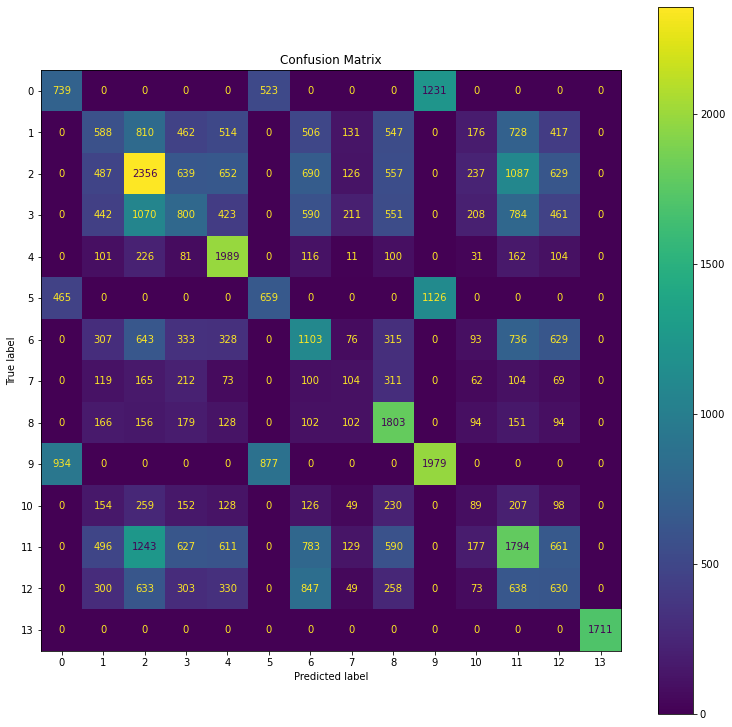

In [37]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

### Classification Report ###

Let's take a look at our classification report test results for each crime:

**0) Aggravated Assault**

For our "Aggravated Assault" results, we have a precision score of .35, a recall score of .30, and an f1 score of .32. This means that:


* Out of all the crimes that the model predicted would be Aggravated Assault crimes, 35% were actually Aggravated Assault crimes.
* Out of all the crimes that were Aggravated Assault crimes, the model correctly predicted 30% of them.
* There is an f1 score of .32, indicating poor performance on predicting probability of the crime being an Aggravated Assault crime.

**1) All Other Larceny**

For our "All Other Larceny" results, we have a precision score of .19, a recall score of .12, and an f1 score of .15. This means that:

* Out of all the crimes that the model predicted would be Larceny crimes, 19% were actually Larceny crimes.
* Out of all the crimes that were Larceny crimes, the model correctly predicted 12% of them.
* There is an f1 score of .15, indicating poor performance on predicting probability of the crime being a Larceny crime.

**2) Burglary/Breaking & Entering**

For our "Burglary/Breaking & Entering" results, we have a precision score of .31, a recall score of .32, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Burglary/Breaking & Entering crimes, 31% were actually Burglary/Breaking & Entering crimes.
* Out of all the crimes that were Burglary/Breaking & Entering crimes, the model correctly predicted 32% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being a Burglary/Breaking & Entering crime.

**3) Destruction/Damage/Vandalism of Property**

For our "Destruction/Damage/Vandalism of Property" results, we have a precision score of .21, a recall score of .14, and an f1 score of .17. This means that:

* Out of all the crimes that the model predicted would be Destruction/Damage/Vandalism of Property crimes, 21% were actually Destruction/Damage/Vandalism of Property crimes.
* Out of all the crimes that were Destruction/Damage/Vandalism of Property crimes, the model correctly predicted 14% of them.
* There is an f1 score of .17, indicating poor performance on predicting probability of the crime being a Destruction/Damage/Vandalism of Property crime.

**4) Identity Theft**

For our "Identity Theft" results, we have a precision score of .38, a recall score of .68, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Identity Theft crimes, 38% were actually Identity Theft crimes.
* Out of all the crimes that were Identity Theft crimes, the model correctly predicted 68% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being an Identity Theft crime.

**5) Intimidation**

For our "Intimidation" results, we have a precision score of .32, a recall score of .29, and an f1 score of .31. This means that:

* Out of all the crimes that the model predicted would be Intimidation crimes, 32% were actually Intimidation crimes.
* Out of all the crimes that were Intimidation crimes, the model correctly predicted 29% of them.
* There is an f1 score of .31, indicating poor performance on predicting probability of the crime being an Intimidation crime.

**6) Motor Vehicle Theft**

For our "Motor Vehicle Theft" results, we have a precision score of .22, a recall score of .24, and an f1 score of .23. This means that:

* Out of all the crimes that the model predicted would be Motor Vehicle Theft crimes, 22% were actually Motor Vehicle Theft crimes.
* Out of all the crimes that were Motor Vehicle Theft crimes, the model correctly predicted 24% of them.
* There is an f1 score of .23, indicating poor performance on predicting probability of the crime being a Motor Vehicle Theft crime.

**7) Robbery**

For our "Robbery" results, we have a precision score of .11, a recall score of .08, and an f1 score of .09. This means that:

* Out of all the crimes that the model predicted would be Robbery crimes, 11% were actually Robbery crimes.
* Out of all the crimes that were Robbery crimes, the model correctly predicted 8% of them.
* There is an f1 score of .09, indicating poor performance on predicting probability of the crime being a Robbery crime.

**8) Shoplifting**

For our "Shoplifting" results, we have a precision score of .34, a recall score of .61, and an f1 score of .44. This means that:

* Out of all the crimes that the model predicted would be Shoplifting crimes, 34% were actually Shoplifting crimes.
* Out of all the crimes that were Shoplifting crimes, the model correctly predicted 61% of them.
* There is an f1 score of .44, indicating poor performance on predicting probability of the crime being a Shoplifting crime.

**9) Simple Assault**

For our "Simple Assault" results, we have a precision score of .46, a recall score of .52, and an f1 score of .49. This means that:

* Out of all the crimes that the model predicted would be Simple Assault crimes, 46% were actually Simple Assault crimes.
* Out of all the crimes that were Simple Assault crimes, the model correctly predicted 52% of them.
* There is an f1 score of .49, indicating poor performance on predicting probability of the crime being a Simple Assault crime.

**10) Theft From Building**

For our "Theft From Building" results, we have a precision score of .07, a recall score of .06, and an f1 score of .07. This means that:

* Out of all the crimes that the model predicted would be Theft From Building crimes, 7% were actually Theft From Building crimes.
* Out of all the crimes that were Theft From Building crimes, the model correctly predicted 6% of them.
* There is an f1 score of .07, indicating extremely poor performance on predicting probability of the crime being a Theft From Building crime.

**11) Theft From Motor Vehicle**

For our "Theft From Motor Vehicle" results, we have a precision score of .28, a recall score of .25, and an f1 score of .27. This means that:

* Out of all the crimes that the model predicted would be Theft From Motor Vehicle crimes, 28% were actually Theft From Motor Vehicle crimes.
* Out of all the crimes that were Theft From Motor Vehicle crimes, the model correctly predicted 25% of them.
* There is an f1 score of .27, indicating poor performance on predicting probability of the crime being a Theft From Motor Vehicle crime.

**12) Theft of Motor Vehicle Parts or Accessories**

For our "Theft of Motor Vehicle Parts or Accessories" results, we have a precision score of .17, a recall score of .16, and an f1 score of .16. This means that:

* Out of all the crimes that the model predicted would be Theft of Motor Vehicle Parts or Accessories crimes, 17% were actually Theft of Motor Vehicle Parts or Accessories crimes.
* Out of all the crimes that were Theft of Motor Vehicle Parts or Accessories crimes, the model correctly predicted 16% of them.
* There is an f1 score of .16, indicating poor performance on predicting probability of the crime being a Theft of Motor Vehicle Parts or Accessories crime.

**13) Trespass of Real Property**

For our "Trespass of Real Property" results, we have a precision score of 1.0, a recall score of 1.0, and an f1 score of 1.0. This means that:

* Out of all the crimes that the model predicted would be Trespass of Real Property crimes, 100% were actually Trespass of Real Property crimes.
* Out of all the crimes that were Trespass of Real Property crimes, the model correctly predicted 100% of them.
* There is an f1 score of 1, indicating perfect performance on predicting probability of the crime being a Trespass of Real Property crime.

### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 739 crimes were correctly predicted as being "Aggravated Assault" crimes
* 1,754 crimes were wrongly predicted as not being "Aggravated Assault" crimes
* 1,399 crimes were wrongly predicted as being "Aggravated Assault" crimes
* 48,673 crimes were correctly predicted as not being "Aggravated Assault" crimes

**1) All Other Larceny**

* 588 crimes were correctly predicted as being "All Other Larceny" crimes
* 4,291 crimes were wrongly predicted as not being "All Other Larceny" crimes
* 2,572 crimes were wrongly predicted as being "All Other Larceny" crimes
* 45,114 crimes were correctly predicted as not being "All Other Larceny" crimes

**2) Burglary/Breaking & Entering**

* 2,356 crimes were correctly predicted as being "Burglary/Breaking & Entering" crimes
* 5,104 crimes were wrongly predicted as not being "Burglary/Breaking & Entering" crimes
* 5,205 crimes were wrongly predicted as being "Burglary/Breaking & Entering" crimes
* 42,440 crimes were correctly predicted as not being "Burglary/Breaking & Entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 800 crimes were correctly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 4,740 crimes were wrongly predicted as not being "Destruction/Damage/Vandalism of Property" crimes
* 2,988 crimes were wrongly predicted as being "Destruction/Damage/Vandalism of Property" crimes
* 46,650 crimes were correctly predicted as not being "Destruction/Damage/Vandalism of Property" crimes

**4) Identity Theft**

* 1,989 crimes were correctly predicted as being "Identity Theft" crimes
* 932 crimes were wrongly predicted as not being "Identity Theft" crimes
* 3,187 crimes were wrongly predicted as being "Identity Theft" crimes
* 48,454 crimes were correctly predicted as not being "Identity Theft" crimes

**5) Intimidation**

* 659 crimes were correctly predicted as being "Intimidation" crimes
* 1,591 crimes were wrongly predicted as not being "Intimidation" crimes
* 1,400 crimes were wrongly predicted as being "Intimidation" crimes
* 49,903 crimes were correctly predicted as not being "Intimidation" crimes

**6) Motor Vehicle Theft**

* 1,103 crimes were correctly predicted as being "Motor Vehicle Theft" crimes
* 3,460 crimes were wrongly predicted as not being "Motor Vehicle Theft" crimes
* 3,860 crimes were wrongly predicted as being "Motor Vehicle Theft" crimes
* 47,655 crimes were correctly predicted as not being "Motor Vehicle Theft" crimes

**7) Robbery**

* 104 crimes were correctly predicted as being "Robbery" crimes
* 1,215 crimes were wrongly predicted as not being "Robbery" crimes
* 884 crimes were wrongly predicted as being "Robbery" crimes
* 51,586 crimes were correctly predicted as not being "Robbery" crimes

**8) Shoplifting*** 

* 1,803 crimes were correctly predicted as being "Shoplifting" crimes
* 1,172 crimes were wrongly predicted as not being "Shoplifting" crimes
* 3,516 crimes were wrongly predicted as being "Shoplifting" crimes
* 47,366 crimes were correctly predicted as not being "Shoplifting" crimes

**9) Simple Assault**

* 1,979 crimes were correctly predicted as being "Simple Assault" crimes
* 1,811 crimes were wrongly predicted as not being "Simple Assault" crimes
* 2,357 crimes were wrongly predicted as being "Simple Assault" crimes
* 50,583 crimes were correctly predicted as not being "Simple Assault" crimes

**10) Theft From Building**

* 89 crimes were correctly predicted as being "Theft From Building" crimes
* 1,403 crimes were wrongly predicted as not being "Theft From Building" crimes
* 1,151 crimes were wrongly predicted as being "Theft From Building" crimes
* 51,918 crimes were correctly predicted as not being "Theft From Building" crimes

**11) Theft From Motor Vehicle**

* 1,794 crimes were correctly predicted as being "Theft From Motor Vehicle" crimes
* 5,317 crimes were wrongly predicted as not being "Theft From Motor Vehicle" crimes
* 4,597 crimes were wrongly predicted as being "Theft From Motor Vehicle" crimes
* 49,469 crimes were correctly predicted as not being "Theft From Motor Vehicle" crimes

**12) Theft of Motor Vehicle Parts or Accessories**

* 630 crimes were correctly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,431 crimes were wrongly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes
* 3,162 crimes were wrongly predicted as being "Theft of Motor Vehicle Parts or Accessories" crimes
* 51,932 crimes were correctly predicted as not being "Theft of Motor Vehicle Parts or Accessories" crimes

**13) Trespass of Real Property**

* 1,711 crimes were correctly predicted as being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as not being "Trespass of Real Property" crimes
* 0 crimes were wrongly predicted as being "Trespass of Real Property" crimes
* 50,851 crimes were correctly predicted as not being "Trespass of Real Property" crimes